In [1]:
import numpy as np
import pandas as pd

In [11]:
MAX_FILE_DIR = './processed_0.2_max/'
MIN_FILE_DIR = './processed_0.2_min/'

NUM_OF_MONTHS = 12

NUM_OF_DAYS = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31,}

LAT = 880

LON = 1760

In [12]:
dates_min = np.ndarray(shape=(365, LAT, LON))
dates_max = np.ndarray(shape=(365, LAT, LON))
i = 0
for month in range(1, NUM_OF_MONTHS+1):
    for day in range(1, NUM_OF_DAYS[month]+1):
        min_filepath = MIN_FILE_DIR + '{:02d}{:02d}.csv'.format(month, day)
        max_filepath = MAX_FILE_DIR + '{:02d}{:02d}.csv'.format(month, day)

        dates_min[i] = pd.read_csv(min_filepath, index_col=0).to_numpy()
        dates_max[i] = pd.read_csv(max_filepath, index_col=0).to_numpy()
        i += 1
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [45]:
%%time
HDDs = np.ndarray((720, LON))
blw_0 = np.ndarray((720, LON))
blw_n20 = np.ndarray((720, LON))
for i in range(720):
    for j in range(LON):
        if not np.isnan(dates_max[0, i, j]):
            print(i,j)
            HDD_num = 0
            blw_0_num = 0
            blw_n20_num = 0
            for k in range(365):
                if (dates_max[k, i, j]) < 291.15:
                    HDD_num += 1
                if (dates_max[k, i, j]) < 273.15:
                    blw_0_num += 1
                if (dates_max[k, i, j]) < 253.15:
                    blw_n20_num += 1
            HDDs[i, j] = HDD_num
            blw_0[i, j] = blw_0_num
            blw_n20[i, j] = blw_n20_num
        else:
            HDDs[i, j] = np.nan
            blw_0[i, j] = np.nan
            blw_n20[i, j] = np.nan

31 1575
31 1580
31 1581
31 1582
31 1583
31 1584
31 1585
31 1586
31 1587
31 1588
31 1589
31 1590
31 1591
31 1592
31 1595
31 1596
31 1597
31 1598
31 1599
31 1600
31 1601
31 1602
31 1603
31 1604
31 1605
31 1606
31 1607
31 1608
31 1609
31 1610
31 1611
31 1612
31 1613
31 1614
31 1615
31 1616
31 1619
31 1620
32 1557
32 1561
32 1562
32 1563
32 1564
32 1568
32 1569
32 1571
32 1572
32 1573
32 1574
32 1575
32 1576
32 1577
32 1578
32 1579
32 1580
32 1581
32 1582
32 1583
32 1584
32 1585
32 1586
32 1587
32 1588
32 1589
32 1590
32 1591
32 1592
32 1593
32 1594
32 1595
32 1596
32 1597
32 1598
32 1599
32 1600
32 1601
32 1602
32 1603
32 1604
32 1605
32 1606
32 1607
32 1608
32 1609
32 1610
32 1611
32 1612
32 1613
32 1614
32 1615
32 1616
32 1617
32 1618
32 1619
32 1620
32 1621
32 1622
32 1623
32 1624
32 1625
32 1626
32 1627
32 1628
32 1629
32 1630
32 1631
32 1632
32 1633
33 1383
33 1384
33 1385
33 1386
33 1387
33 1388
33 1389
33 1390
33 1391
33 1392
33 1393
33 1394
33 1395
33 1396
33 1397
33 1398
33 1399


38 1328
38 1329
38 1330
38 1331
38 1332
38 1341
38 1342
38 1343
38 1344
38 1345
38 1346
38 1347
38 1348
38 1349
38 1350
38 1351
38 1352
38 1353
38 1354
38 1355
38 1356
38 1357
38 1358
38 1359
38 1360
38 1361
38 1362
38 1363
38 1366
38 1367
38 1368
38 1369
38 1370
38 1371
38 1372
38 1373
38 1374
38 1375
38 1376
38 1377
38 1378
38 1379
38 1380
38 1381
38 1382
38 1383
38 1384
38 1385
38 1386
38 1387
38 1388
38 1389
38 1390
38 1391
38 1392
38 1393
38 1394
38 1395
38 1396
38 1397
38 1398
38 1399
38 1400
38 1401
38 1402
38 1403
38 1404
38 1405
38 1406
38 1407
38 1408
38 1409
38 1410
38 1411
38 1412
38 1413
38 1414
38 1415
38 1416
38 1417
38 1418
38 1419
38 1420
38 1421
38 1422
38 1423
38 1424
38 1425
38 1426
38 1427
38 1428
38 1429
38 1430
38 1431
38 1432
38 1433
38 1434
38 1435
38 1436
38 1437
38 1438
38 1439
38 1440
38 1441
38 1442
38 1443
38 1444
38 1445
38 1446
38 1447
38 1448
38 1449
38 1450
38 1451
38 1452
38 1453
38 1454
38 1455
38 1456
38 1457
38 1473
38 1474
38 1475
38 1476
38 1477


41 1578
41 1579
41 1580
41 1581
41 1582
41 1583
41 1584
41 1585
41 1586
41 1587
41 1588
41 1589
41 1590
41 1591
41 1592
41 1593
41 1594
41 1595
41 1596
41 1597
41 1598
41 1599
41 1600
41 1601
41 1602
41 1603
41 1604
41 1605
41 1606
41 1607
41 1608
41 1609
41 1610
41 1611
41 1612
41 1613
41 1614
41 1615
41 1616
41 1617
41 1618
41 1619
41 1620
41 1621
41 1622
41 1623
41 1624
41 1625
41 1626
41 1627
41 1628
41 1629
41 1630
41 1632
41 1633
41 1634
41 1635
41 1636
41 1637
41 1638
41 1639
41 1640
41 1641
41 1642
41 1643
41 1644
41 1645
41 1646
41 1647
41 1648
41 1649
41 1650
41 1651
41 1652
41 1653
41 1654
41 1655
41 1662
41 1663
41 1664
41 1665
41 1668
41 1669
41 1670
41 1671
41 1677
41 1678
41 1679
41 1680
41 1681
41 1682
41 1683
41 1684
41 1685
41 1686
41 1687
41 1688
41 1689
41 1690
41 1691
41 1692
41 1693
41 1694
41 1695
41 1696
41 1697
41 1698
41 1699
41 1700
41 1701
41 1702
41 1703
41 1704
42 272
42 273
42 274
42 275
42 277
42 278
42 279
42 280
42 295
42 296
42 468
42 1299
42 1300
42 

44 1529
44 1530
44 1531
44 1532
44 1533
44 1534
44 1535
44 1536
44 1537
44 1538
44 1539
44 1540
44 1541
44 1542
44 1543
44 1544
44 1545
44 1546
44 1547
44 1548
44 1549
44 1550
44 1551
44 1552
44 1553
44 1554
44 1555
44 1556
44 1557
44 1558
44 1559
44 1560
44 1561
44 1562
44 1563
44 1564
44 1565
44 1566
44 1567
44 1568
44 1569
44 1570
44 1571
44 1572
44 1573
44 1574
44 1575
44 1576
44 1577
44 1578
44 1579
44 1580
44 1581
44 1582
44 1583
44 1584
44 1585
44 1586
44 1587
44 1588
44 1589
44 1590
44 1591
44 1592
44 1593
44 1594
44 1595
44 1596
44 1597
44 1598
44 1599
44 1600
44 1601
44 1602
44 1603
44 1604
44 1605
44 1606
44 1607
44 1608
44 1609
44 1610
44 1611
44 1612
44 1613
44 1614
44 1615
44 1616
44 1617
44 1618
44 1619
44 1620
44 1621
44 1622
44 1623
44 1624
44 1625
44 1626
44 1627
44 1628
44 1629
44 1630
44 1631
44 1632
44 1633
44 1634
44 1635
44 1636
44 1637
44 1638
44 1639
44 1640
44 1641
44 1642
44 1643
44 1644
44 1645
44 1646
44 1649
44 1650
44 1651
44 1652
44 1653
44 1654
44 1655


47 1324
47 1327
47 1328
47 1329
47 1330
47 1331
47 1332
47 1337
47 1338
47 1339
47 1340
47 1341
47 1342
47 1343
47 1344
47 1345
47 1346
47 1347
47 1348
47 1349
47 1350
47 1355
47 1356
47 1357
47 1358
47 1359
47 1360
47 1361
47 1362
47 1363
47 1364
47 1365
47 1366
47 1367
47 1368
47 1369
47 1370
47 1371
47 1372
47 1373
47 1374
47 1375
47 1376
47 1377
47 1378
47 1379
47 1380
47 1381
47 1382
47 1383
47 1384
47 1385
47 1386
47 1387
47 1388
47 1389
47 1390
47 1391
47 1392
47 1393
47 1394
47 1395
47 1396
47 1397
47 1398
47 1399
47 1400
47 1401
47 1402
47 1403
47 1404
47 1405
47 1406
47 1407
47 1408
47 1409
47 1410
47 1411
47 1412
47 1413
47 1414
47 1415
47 1416
47 1417
47 1431
47 1432
47 1433
47 1434
47 1435
47 1436
47 1437
47 1438
47 1439
47 1440
47 1441
47 1442
47 1443
47 1444
47 1445
47 1446
47 1447
47 1448
47 1449
47 1450
47 1451
47 1452
47 1453
47 1454
47 1455
47 1456
47 1457
47 1458
47 1459
47 1460
47 1461
47 1462
47 1463
47 1464
47 1465
47 1466
47 1467
47 1468
47 1469
47 1470
47 1471


50 479
50 480
50 481
50 482
50 483
50 484
50 485
50 486
50 487
50 488
50 489
50 1298
50 1299
50 1300
50 1301
50 1302
50 1303
50 1304
50 1305
50 1306
50 1307
50 1308
50 1309
50 1310
50 1311
50 1312
50 1313
50 1314
50 1315
50 1316
50 1317
50 1318
50 1319
50 1320
50 1321
50 1322
50 1323
50 1324
50 1325
50 1326
50 1327
50 1328
50 1329
50 1330
50 1331
50 1332
50 1333
50 1336
50 1337
50 1338
50 1345
50 1346
50 1347
50 1348
50 1349
50 1350
50 1351
50 1352
50 1353
50 1354
50 1355
50 1356
50 1357
50 1358
50 1359
50 1360
50 1362
50 1368
50 1369
50 1370
50 1371
50 1372
50 1373
50 1374
50 1375
50 1376
50 1377
50 1378
50 1379
50 1380
50 1381
50 1382
50 1383
50 1384
50 1385
50 1386
50 1387
50 1388
50 1389
50 1390
50 1391
50 1392
50 1393
50 1394
50 1395
50 1396
50 1397
50 1398
50 1399
50 1400
50 1401
50 1402
50 1443
50 1444
50 1445
50 1446
50 1447
50 1448
50 1449
50 1450
50 1451
50 1452
50 1453
50 1454
50 1455
50 1456
50 1457
50 1458
50 1459
50 1460
50 1461
50 1462
50 1463
50 1464
50 1465
50 1466
50 

52 1612
52 1613
52 1614
52 1615
52 1616
52 1617
52 1618
52 1619
52 1620
52 1621
52 1622
52 1623
52 1624
52 1625
52 1626
52 1627
52 1628
52 1629
52 1630
52 1631
52 1632
52 1633
52 1634
52 1635
52 1636
52 1637
52 1638
52 1639
52 1640
52 1641
52 1642
52 1643
52 1644
52 1645
52 1646
52 1647
52 1648
52 1649
52 1650
52 1651
52 1652
52 1653
52 1654
52 1655
52 1656
52 1657
52 1658
52 1659
52 1660
52 1661
52 1662
52 1663
52 1664
52 1665
52 1666
52 1667
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
53 69
53 70
53 71
53 72
53 73
53 74
53 75
53 76
53 77
53 78
53 80
53 81
53 82
53 83
53 84
53 85
53 86
53 87
53 88
53 89
53 90
53 91
53 92
53 93
53 94
53 95
53 96
53 97
53 468
53 469
53 470
53 471
53 472
53 473
53 474
53 475
53 476
53 477
53 478
53 479
53 480
53 481
53 482
53 483
53 484
53 485
53 486
53 487
53 488
53 496
53 497
53 498
53 499
53 500
53 501
53 502
53 504
53 505
53 506
53 507
53 508
53 510
53 1249
53 1250
53 1251
53 1252
53 1253
53 1254
53 1255
53 1256
53 1257
53 1258
53 126

55 1611
55 1612
55 1613
55 1614
55 1615
55 1616
55 1617
55 1618
55 1619
55 1620
55 1621
55 1622
55 1623
55 1624
55 1625
55 1626
55 1627
55 1628
55 1629
55 1630
55 1631
55 1632
55 1633
55 1634
55 1635
55 1636
55 1637
55 1638
55 1639
55 1640
55 1641
55 1642
55 1643
55 1644
55 1645
55 1646
55 1647
55 1648
55 1649
55 1650
55 1651
55 1652
55 1653
55 1654
55 1655
55 1656
55 1657
55 1658
55 1670
56 57
56 58
56 62
56 63
56 64
56 65
56 66
56 67
56 68
56 69
56 71
56 72
56 82
56 84
56 85
56 86
56 87
56 88
56 89
56 90
56 91
56 92
56 93
56 102
56 103
56 104
56 105
56 106
56 107
56 108
56 490
56 491
56 492
56 493
56 494
56 495
56 496
56 497
56 498
56 499
56 500
56 501
56 502
56 503
56 504
56 505
56 506
56 507
56 508
56 509
56 510
56 511
56 512
56 513
56 1207
56 1208
56 1209
56 1210
56 1211
56 1212
56 1213
56 1214
56 1215
56 1216
56 1217
56 1218
56 1219
56 1220
56 1221
56 1222
56 1223
56 1224
56 1225
56 1248
56 1249
56 1250
56 1251
56 1252
56 1253
56 1254
56 1255
56 1256
56 1257
56 1258
56 1259
56 12

58 1581
58 1582
58 1583
58 1584
58 1585
58 1586
58 1587
58 1588
58 1589
58 1590
58 1591
58 1592
58 1593
58 1594
58 1595
58 1596
58 1597
58 1598
58 1599
58 1600
58 1601
58 1602
58 1603
58 1604
58 1605
58 1606
58 1607
58 1608
58 1609
58 1610
58 1611
58 1612
58 1613
58 1614
58 1615
58 1616
58 1617
58 1618
58 1619
58 1620
58 1621
58 1622
58 1623
58 1624
58 1625
58 1626
58 1627
58 1628
58 1629
58 1630
58 1631
58 1632
58 1633
58 1634
58 1635
58 1636
58 1637
58 1638
58 1639
58 1640
58 1641
58 1642
58 1643
58 1644
58 1645
58 1646
58 1647
58 1648
58 1649
58 1650
58 1651
58 1652
58 1653
58 1654
58 1662
58 1663
59 68
59 69
59 70
59 71
59 72
59 80
59 81
59 82
59 84
59 85
59 86
59 87
59 88
59 89
59 90
59 105
59 106
59 107
59 108
59 109
59 110
59 111
59 112
59 113
59 114
59 115
59 116
59 117
59 118
59 1201
59 1202
59 1203
59 1204
59 1207
59 1208
59 1209
59 1210
59 1211
59 1212
59 1213
59 1214
59 1215
59 1216
59 1217
59 1218
59 1221
59 1259
59 1260
59 1261
59 1262
59 1263
59 1264
59 1265
59 1266
59 1

61 1624
61 1625
61 1626
61 1627
61 1628
61 1629
61 1630
61 1631
61 1632
61 1633
61 1634
61 1635
61 1636
61 1637
61 1638
61 1639
61 1640
61 1641
61 1642
61 1643
61 1644
61 1645
61 1646
61 1647
61 1648
61 1649
61 1650
61 1651
61 1652
61 1653
61 1654
61 1655
61 1656
61 1657
61 1658
61 1661
62 73
62 74
62 75
62 76
62 77
62 78
62 79
62 80
62 81
62 82
62 83
62 84
62 85
62 497
62 498
62 499
62 500
62 501
62 502
62 503
62 504
62 505
62 506
62 507
62 508
62 509
62 510
62 511
62 512
62 513
62 517
62 1176
62 1177
62 1178
62 1179
62 1180
62 1181
62 1182
62 1183
62 1184
62 1185
62 1186
62 1187
62 1188
62 1189
62 1190
62 1191
62 1246
62 1247
62 1248
62 1249
62 1251
62 1294
62 1315
62 1316
62 1333
62 1334
62 1336
62 1337
62 1338
62 1339
62 1340
62 1341
62 1342
62 1343
62 1344
62 1345
62 1346
62 1347
62 1348
62 1349
62 1350
62 1351
62 1352
62 1353
62 1354
62 1355
62 1356
62 1357
62 1358
62 1359
62 1360
62 1361
62 1362
62 1363
62 1364
62 1365
62 1366
62 1367
62 1368
62 1369
62 1370
62 1371
62 1372
62 1

64 1534
64 1535
64 1536
64 1537
64 1538
64 1539
64 1540
64 1541
64 1542
64 1543
64 1544
64 1545
64 1546
64 1547
64 1548
64 1549
64 1550
64 1551
64 1552
64 1553
64 1554
64 1555
64 1556
64 1557
64 1558
64 1559
64 1560
64 1561
64 1562
64 1563
64 1564
64 1565
64 1566
64 1567
64 1568
64 1569
64 1570
64 1571
64 1572
64 1573
64 1574
64 1575
64 1576
64 1577
64 1578
64 1579
64 1580
64 1581
64 1582
64 1583
64 1584
64 1585
64 1586
64 1587
64 1588
64 1589
64 1590
64 1591
64 1592
64 1593
64 1594
64 1595
64 1596
64 1597
64 1598
64 1599
64 1600
64 1601
64 1602
64 1603
64 1604
64 1605
64 1606
64 1607
64 1608
64 1609
64 1610
64 1611
64 1612
64 1613
64 1614
64 1615
64 1616
64 1617
64 1618
64 1619
64 1620
64 1621
64 1622
64 1623
64 1624
64 1625
64 1626
64 1627
64 1628
64 1629
64 1630
64 1631
64 1632
64 1633
64 1634
64 1635
64 1636
64 1637
64 1638
64 1639
64 1640
64 1641
64 1642
64 1643
64 1644
64 1645
64 1646
64 1647
64 1648
64 1649
64 1650
64 1653
64 1654
64 1655
64 1663
65 323
65 324
65 325
65 326
65 3

67 1571
67 1572
67 1573
67 1574
67 1575
67 1576
67 1577
67 1578
67 1579
67 1580
67 1581
67 1582
67 1583
67 1584
67 1585
67 1586
67 1587
67 1588
67 1589
67 1590
67 1591
67 1592
67 1593
67 1594
67 1595
67 1596
67 1597
67 1598
67 1599
67 1600
67 1601
67 1602
67 1603
67 1604
67 1605
67 1606
67 1607
67 1608
67 1609
67 1610
67 1611
67 1612
67 1613
67 1614
67 1615
67 1616
67 1617
67 1618
67 1619
67 1620
67 1621
67 1622
67 1623
67 1624
67 1625
67 1626
67 1627
67 1628
67 1629
67 1630
67 1631
67 1632
67 1633
67 1634
67 1635
67 1636
67 1637
67 1638
67 1639
67 1640
67 1641
67 1642
67 1643
67 1644
67 1645
67 1646
67 1647
67 1648
67 1649
67 1650
67 1651
67 1652
67 1653
67 1654
67 1655
67 1656
67 1657
67 1658
67 1659
67 1660
67 1661
67 1662
67 1663
67 1669
68 289
68 294
68 295
68 296
68 297
68 298
68 299
68 300
68 301
68 302
68 303
68 304
68 305
68 306
68 307
68 308
68 309
68 310
68 311
68 312
68 313
68 314
68 315
68 316
68 317
68 318
68 319
68 320
68 321
68 322
68 323
68 400
68 403
68 405
68 406
68 

70 1317
70 1318
70 1319
70 1320
70 1321
70 1322
70 1323
70 1324
70 1326
70 1327
70 1328
70 1330
70 1331
70 1333
70 1334
70 1340
70 1341
70 1342
70 1343
70 1344
70 1345
70 1346
70 1347
70 1348
70 1349
70 1350
70 1351
70 1352
70 1353
70 1354
70 1355
70 1356
70 1357
70 1358
70 1359
70 1360
70 1361
70 1362
70 1363
70 1364
70 1365
70 1366
70 1367
70 1368
70 1369
70 1476
70 1477
70 1478
70 1479
70 1480
70 1481
70 1482
70 1483
70 1484
70 1485
70 1486
70 1487
70 1488
70 1489
70 1490
70 1491
70 1492
70 1493
70 1494
70 1495
70 1496
70 1497
70 1498
70 1499
70 1500
70 1501
70 1502
70 1503
70 1504
70 1505
70 1506
70 1507
70 1508
70 1509
70 1510
70 1511
70 1512
70 1513
70 1514
70 1515
70 1516
70 1517
70 1518
70 1519
70 1520
70 1521
70 1522
70 1523
70 1524
70 1525
70 1526
70 1527
70 1528
70 1529
70 1530
70 1531
70 1532
70 1533
70 1534
70 1535
70 1536
70 1537
70 1538
70 1539
70 1540
70 1541
70 1542
70 1543
70 1544
70 1545
70 1546
70 1547
70 1548
70 1549
70 1550
70 1551
70 1552
70 1553
70 1554
70 1555


72 1507
72 1508
72 1509
72 1510
72 1511
72 1512
72 1513
72 1514
72 1515
72 1516
72 1517
72 1518
72 1519
72 1520
72 1521
72 1522
72 1523
72 1524
72 1525
72 1526
72 1527
72 1528
72 1529
72 1530
72 1531
72 1532
72 1533
72 1534
72 1535
72 1536
72 1537
72 1538
72 1539
72 1540
72 1541
72 1542
72 1543
72 1544
72 1545
72 1546
72 1547
72 1548
72 1549
72 1550
72 1551
72 1552
72 1553
72 1554
72 1555
72 1556
72 1557
72 1558
72 1559
72 1560
72 1561
72 1562
72 1563
72 1564
72 1565
72 1566
72 1567
72 1568
72 1569
72 1570
72 1571
72 1572
72 1573
72 1574
72 1575
72 1576
72 1577
72 1578
72 1579
72 1580
72 1581
72 1582
72 1583
72 1584
72 1585
72 1586
72 1587
72 1588
72 1589
72 1590
72 1591
72 1592
72 1593
72 1594
72 1595
72 1596
72 1597
72 1598
72 1599
72 1600
72 1601
72 1602
72 1603
72 1604
72 1605
72 1606
72 1607
72 1608
72 1609
72 1610
72 1611
72 1612
72 1613
72 1614
72 1615
72 1616
72 1617
72 1618
72 1619
72 1620
72 1621
72 1622
72 1623
72 1624
72 1625
72 1626
72 1627
72 1628
72 1629
72 1630
72 1631


75 487
75 488
75 489
75 490
75 491
75 492
75 493
75 494
75 495
75 496
75 497
75 498
75 499
75 500
75 501
75 502
75 503
75 504
75 505
75 506
75 507
75 508
75 509
75 510
75 511
75 512
75 513
75 514
75 515
75 516
75 517
75 518
75 519
75 520
75 521
75 522
75 523
75 524
75 525
75 526
75 527
75 528
75 529
75 530
75 531
75 532
75 533
75 534
75 535
75 536
75 537
75 538
75 539
75 540
75 541
75 548
75 549
75 550
75 551
75 1164
75 1165
75 1166
75 1167
75 1168
75 1203
75 1204
75 1205
75 1206
75 1207
75 1208
75 1209
75 1210
75 1211
75 1212
75 1213
75 1214
75 1283
75 1294
75 1328
75 1329
75 1330
75 1332
75 1333
75 1334
75 1335
75 1336
75 1337
75 1338
75 1340
75 1341
75 1343
75 1344
75 1345
75 1347
75 1348
75 1359
75 1360
75 1361
75 1480
75 1481
75 1482
75 1483
75 1484
75 1486
75 1487
75 1488
75 1489
75 1490
75 1491
75 1492
75 1493
75 1494
75 1495
75 1496
75 1497
75 1498
75 1499
75 1500
75 1501
75 1502
75 1503
75 1504
75 1505
75 1506
75 1507
75 1508
75 1509
75 1510
75 1511
75 1512
75 1513
75 1514
75 

78 540
78 541
78 542
78 543
78 552
78 610
78 666
78 693
78 694
78 1153
78 1154
78 1155
78 1156
78 1157
78 1158
78 1159
78 1160
78 1161
78 1162
78 1163
78 1164
78 1165
78 1166
78 1167
78 1168
78 1169
78 1170
78 1171
78 1172
78 1173
78 1174
78 1175
78 1176
78 1177
78 1178
78 1179
78 1180
78 1181
78 1182
78 1183
78 1184
78 1185
78 1186
78 1187
78 1188
78 1189
78 1190
78 1191
78 1270
78 1271
78 1274
78 1275
78 1276
78 1277
78 1278
78 1279
78 1280
78 1282
78 1295
78 1296
78 1297
78 1298
78 1299
78 1300
78 1301
78 1302
78 1303
78 1304
78 1305
78 1306
78 1307
78 1308
78 1309
78 1310
78 1311
78 1312
78 1313
78 1314
78 1315
78 1316
78 1317
78 1318
78 1319
78 1483
78 1488
78 1489
78 1490
78 1491
78 1492
78 1493
78 1494
78 1495
78 1496
78 1497
78 1498
78 1499
78 1500
78 1501
78 1502
78 1503
78 1504
78 1505
78 1506
78 1507
78 1508
78 1509
78 1510
78 1511
78 1512
78 1513
78 1514
78 1515
78 1516
78 1517
78 1518
78 1519
78 1520
78 1521
78 1522
78 1523
78 1524
78 1525
78 1526
78 1527
78 1528
78 1529
7

80 1532
80 1533
80 1534
80 1535
80 1536
80 1537
80 1538
80 1539
80 1540
80 1541
80 1542
80 1543
80 1544
80 1545
80 1546
80 1547
80 1548
80 1549
80 1550
80 1551
80 1552
80 1553
80 1554
80 1555
80 1556
80 1557
80 1558
80 1559
80 1560
80 1561
80 1562
80 1563
80 1564
80 1565
80 1566
80 1567
80 1568
80 1569
80 1570
80 1571
80 1572
80 1573
80 1574
80 1575
80 1576
80 1577
80 1578
80 1579
80 1580
80 1581
80 1582
80 1583
80 1584
80 1585
80 1586
80 1587
80 1588
80 1589
80 1590
80 1591
80 1592
80 1593
80 1594
80 1595
80 1596
80 1597
80 1598
80 1599
80 1600
80 1601
80 1602
80 1603
80 1604
80 1605
80 1606
80 1607
80 1608
80 1609
80 1610
80 1611
80 1612
80 1613
80 1614
80 1615
80 1616
80 1617
80 1618
80 1619
80 1620
80 1621
80 1622
80 1623
80 1624
80 1625
80 1626
80 1628
80 1629
80 1630
80 1631
80 1632
80 1633
80 1634
80 1635
80 1636
80 1637
80 1638
80 1645
80 1646
80 1647
80 1648
80 1649
80 1650
80 1651
80 1652
80 1653
80 1654
80 1655
80 1656
80 1657
80 1658
80 1659
80 1660
81 267
81 268
81 269
81 

83 434
83 435
83 436
83 437
83 438
83 439
83 440
83 441
83 442
83 443
83 444
83 445
83 446
83 447
83 448
83 449
83 450
83 451
83 452
83 453
83 454
83 455
83 456
83 457
83 458
83 459
83 460
83 461
83 462
83 463
83 464
83 465
83 466
83 467
83 468
83 469
83 470
83 471
83 472
83 473
83 474
83 475
83 476
83 477
83 478
83 479
83 480
83 481
83 482
83 483
83 484
83 485
83 486
83 487
83 488
83 489
83 490
83 491
83 492
83 493
83 494
83 495
83 496
83 497
83 498
83 499
83 500
83 501
83 502
83 503
83 504
83 505
83 506
83 507
83 508
83 509
83 510
83 511
83 512
83 513
83 514
83 515
83 516
83 519
83 520
83 521
83 522
83 523
83 524
83 525
83 526
83 527
83 528
83 529
83 530
83 531
83 532
83 533
83 534
83 535
83 536
83 537
83 538
83 539
83 540
83 541
83 542
83 543
83 544
83 545
83 546
83 547
83 548
83 549
83 550
83 551
83 552
83 553
83 554
83 555
83 556
83 557
83 558
83 559
83 560
83 561
83 562
83 563
83 564
83 565
83 566
83 567
83 568
83 569
83 570
83 571
83 572
83 573
83 574
83 575
83 576
83 577
83 578

84 1634
84 1635
84 1636
84 1637
84 1638
84 1641
84 1642
84 1643
84 1644
84 1645
84 1646
84 1647
84 1648
84 1650
85 258
85 259
85 260
85 261
85 262
85 263
85 264
85 265
85 266
85 267
85 268
85 269
85 270
85 271
85 337
85 338
85 339
85 340
85 341
85 342
85 343
85 344
85 345
85 346
85 347
85 348
85 349
85 350
85 351
85 352
85 353
85 354
85 355
85 367
85 368
85 369
85 378
85 379
85 380
85 381
85 382
85 396
85 397
85 398
85 399
85 400
85 401
85 402
85 403
85 404
85 405
85 406
85 407
85 408
85 409
85 410
85 411
85 412
85 413
85 414
85 415
85 416
85 417
85 418
85 419
85 420
85 421
85 422
85 423
85 424
85 425
85 426
85 427
85 428
85 429
85 430
85 431
85 432
85 433
85 434
85 435
85 436
85 437
85 438
85 439
85 440
85 441
85 442
85 443
85 444
85 445
85 446
85 447
85 448
85 449
85 450
85 451
85 452
85 453
85 454
85 455
85 456
85 457
85 458
85 459
85 460
85 461
85 462
85 463
85 464
85 465
85 466
85 467
85 468
85 469
85 470
85 471
85 472
85 473
85 474
85 475
85 476
85 477
85 478
85 479
85 480
85 481

86 1582
86 1583
86 1584
86 1585
86 1586
86 1587
86 1588
86 1589
86 1590
86 1591
86 1592
86 1593
86 1594
86 1595
86 1596
86 1597
86 1598
86 1599
86 1600
86 1601
86 1602
86 1603
86 1604
86 1605
86 1606
86 1607
86 1608
86 1609
86 1610
86 1611
86 1612
86 1613
86 1614
86 1615
86 1616
86 1617
86 1618
86 1619
86 1620
86 1621
86 1622
86 1623
86 1624
86 1625
86 1626
86 1627
86 1628
86 1629
86 1630
86 1631
86 1632
86 1633
86 1634
86 1635
86 1636
86 1637
86 1638
86 1639
86 1640
86 1641
86 1642
86 1648
86 1649
86 1650
86 1651
87 253
87 254
87 255
87 257
87 258
87 259
87 260
87 261
87 262
87 263
87 264
87 265
87 266
87 267
87 268
87 269
87 270
87 336
87 337
87 338
87 339
87 340
87 341
87 342
87 343
87 344
87 345
87 346
87 347
87 348
87 349
87 350
87 351
87 352
87 353
87 354
87 366
87 367
87 368
87 379
87 382
87 383
87 384
87 385
87 386
87 387
87 388
87 389
87 390
87 391
87 392
87 393
87 394
87 403
87 404
87 405
87 406
87 407
87 408
87 409
87 410
87 411
87 412
87 413
87 414
87 415
87 416
87 417
87 4

88 1545
88 1546
88 1547
88 1548
88 1549
88 1550
88 1551
88 1552
88 1553
88 1554
88 1555
88 1556
88 1557
88 1558
88 1559
88 1560
88 1561
88 1562
88 1563
88 1564
88 1565
88 1566
88 1567
88 1568
88 1569
88 1570
88 1571
88 1572
88 1573
88 1574
88 1575
88 1576
88 1577
88 1578
88 1579
88 1580
88 1581
88 1582
88 1583
88 1584
88 1585
88 1586
88 1587
88 1588
88 1589
88 1590
88 1591
88 1592
88 1593
88 1594
88 1595
88 1596
88 1597
88 1598
88 1599
88 1600
88 1601
88 1602
88 1603
88 1604
88 1605
88 1606
88 1607
88 1608
88 1609
88 1610
88 1611
88 1612
88 1613
88 1614
88 1615
88 1616
88 1617
88 1618
88 1619
88 1620
88 1621
88 1622
88 1623
88 1626
88 1627
88 1628
88 1629
88 1630
88 1631
88 1632
88 1633
88 1634
88 1635
88 1636
88 1637
88 1638
88 1639
88 1640
88 1641
88 1642
88 1643
88 1644
88 1645
88 1646
88 1647
88 1648
89 252
89 253
89 254
89 255
89 256
89 257
89 258
89 259
89 260
89 261
89 262
89 263
89 264
89 265
89 266
89 267
89 268
89 269
89 270
89 271
89 272
89 334
89 335
89 336
89 337
89 338
89

90 673
90 674
90 675
90 676
90 677
90 678
90 679
90 680
90 682
90 683
90 684
90 685
90 686
90 687
90 688
90 689
90 690
90 691
90 692
90 693
90 694
90 695
90 696
90 697
90 698
90 699
90 700
90 701
90 702
90 703
90 704
90 705
90 706
90 707
90 708
90 709
90 710
90 711
90 712
90 713
90 714
90 715
90 716
90 717
90 718
90 719
90 720
90 721
90 722
90 723
90 724
90 725
90 726
90 727
90 728
90 729
90 730
90 731
90 732
90 733
90 734
90 735
90 736
90 879
90 880
90 881
90 882
90 883
90 884
90 885
90 886
90 887
90 888
90 889
90 1156
90 1157
90 1158
90 1159
90 1160
90 1161
90 1162
90 1163
90 1164
90 1166
90 1167
90 1168
90 1182
90 1183
90 1184
90 1185
90 1187
90 1188
90 1189
90 1193
90 1194
90 1195
90 1196
90 1197
90 1198
90 1199
90 1200
90 1201
90 1202
90 1203
90 1204
90 1205
90 1206
90 1207
90 1208
90 1209
90 1210
90 1211
90 1212
90 1213
90 1214
90 1215
90 1216
90 1217
90 1218
90 1219
90 1220
90 1221
90 1222
90 1223
90 1224
90 1225
90 1226
90 1227
90 1228
90 1229
90 1230
90 1231
90 1232
90 1233
90

91 1612
91 1613
91 1614
91 1615
91 1616
91 1617
91 1618
91 1619
91 1620
91 1621
91 1622
91 1623
91 1624
91 1625
91 1626
91 1627
91 1628
91 1629
91 1630
91 1631
91 1632
91 1633
91 1635
91 1640
91 1641
91 1642
91 1643
91 1644
91 1645
91 1646
91 1647
91 1648
91 1649
91 1650
91 1651
91 1652
92 121
92 122
92 124
92 125
92 126
92 128
92 135
92 137
92 259
92 262
92 263
92 264
92 265
92 266
92 267
92 268
92 269
92 270
92 271
92 272
92 273
92 274
92 275
92 276
92 328
92 329
92 330
92 331
92 332
92 333
92 334
92 335
92 336
92 337
92 338
92 339
92 340
92 341
92 342
92 343
92 344
92 345
92 346
92 347
92 348
92 349
92 350
92 351
92 352
92 353
92 354
92 355
92 361
92 362
92 363
92 364
92 365
92 366
92 367
92 368
92 369
92 370
92 371
92 372
92 373
92 374
92 375
92 376
92 377
92 378
92 379
92 380
92 383
92 384
92 385
92 386
92 387
92 388
92 389
92 390
92 391
92 392
92 393
92 394
92 395
92 396
92 397
92 398
92 399
92 400
92 401
92 402
92 408
92 409
92 410
92 411
92 412
92 413
92 414
92 415
92 416
92 41

93 633
93 634
93 635
93 636
93 637
93 638
93 639
93 640
93 644
93 645
93 646
93 647
93 648
93 649
93 650
93 651
93 652
93 653
93 654
93 655
93 656
93 657
93 658
93 659
93 660
93 661
93 662
93 663
93 664
93 665
93 666
93 667
93 668
93 669
93 670
93 671
93 672
93 673
93 674
93 675
93 676
93 677
93 678
93 679
93 680
93 681
93 682
93 683
93 684
93 685
93 686
93 687
93 688
93 689
93 690
93 691
93 692
93 693
93 694
93 695
93 696
93 697
93 698
93 699
93 700
93 701
93 702
93 703
93 704
93 705
93 706
93 707
93 708
93 709
93 710
93 711
93 712
93 713
93 714
93 715
93 716
93 717
93 718
93 719
93 720
93 721
93 722
93 723
93 724
93 725
93 726
93 727
93 728
93 729
93 730
93 731
93 732
93 733
93 734
93 735
93 736
93 737
93 738
93 739
93 740
93 741
93 742
93 743
93 744
93 745
93 749
93 750
93 751
93 752
93 753
93 754
93 755
93 756
93 757
93 758
93 759
93 760
93 761
93 762
93 763
93 764
93 765
93 766
93 767
93 768
93 769
93 770
93 771
93 772
93 773
93 774
93 775
93 776
93 777
93 874
93 981
93 988
93 989

95 121
95 122
95 123
95 126
95 127
95 128
95 129
95 131
95 132
95 133
95 134
95 135
95 136
95 137
95 138
95 139
95 140
95 141
95 142
95 143
95 144
95 145
95 146
95 147
95 148
95 149
95 150
95 151
95 330
95 331
95 332
95 333
95 334
95 335
95 336
95 337
95 338
95 339
95 340
95 341
95 342
95 343
95 344
95 345
95 346
95 347
95 348
95 349
95 350
95 351
95 352
95 353
95 354
95 355
95 363
95 364
95 365
95 366
95 367
95 368
95 369
95 370
95 371
95 372
95 373
95 374
95 375
95 376
95 377
95 378
95 379
95 380
95 381
95 382
95 383
95 384
95 385
95 386
95 387
95 388
95 389
95 390
95 391
95 392
95 393
95 394
95 395
95 396
95 397
95 398
95 399
95 400
95 401
95 402
95 403
95 404
95 405
95 407
95 410
95 411
95 412
95 413
95 414
95 415
95 416
95 417
95 418
95 419
95 420
95 421
95 422
95 423
95 424
95 425
95 426
95 427
95 428
95 429
95 430
95 431
95 432
95 433
95 434
95 435
95 436
95 437
95 438
95 439
95 440
95 441
95 442
95 443
95 444
95 445
95 446
95 447
95 448
95 449
95 450
95 451
95 452
95 453
95 454

96 780
96 781
96 782
96 968
96 969
96 970
96 971
96 972
96 973
96 974
96 975
96 976
96 977
96 978
96 979
96 980
96 981
96 982
96 983
96 984
96 985
96 986
96 987
96 988
96 989
96 990
96 991
96 992
96 993
96 994
96 995
96 996
96 997
96 998
96 999
96 1000
96 1001
96 1002
96 1003
96 1004
96 1005
96 1006
96 1007
96 1008
96 1009
96 1010
96 1011
96 1012
96 1013
96 1014
96 1015
96 1016
96 1017
96 1018
96 1019
96 1020
96 1021
96 1022
96 1023
96 1024
96 1025
96 1026
96 1027
96 1028
96 1029
96 1030
96 1031
96 1032
96 1033
96 1034
96 1035
96 1036
96 1037
96 1126
96 1137
96 1138
96 1193
96 1194
96 1195
96 1196
96 1197
96 1198
96 1199
96 1200
96 1201
96 1202
96 1203
96 1204
96 1205
96 1206
96 1207
96 1208
96 1210
96 1211
96 1212
96 1213
96 1214
96 1215
96 1216
96 1217
96 1218
96 1219
96 1220
96 1221
96 1222
96 1223
96 1224
96 1225
96 1226
96 1227
96 1228
96 1229
96 1230
96 1231
96 1232
96 1233
96 1234
96 1235
96 1236
96 1237
96 1238
96 1239
96 1240
96 1241
96 1242
96 1243
96 1244
96 1245
96 1246
96 

97 1308
97 1309
97 1310
97 1334
97 1335
97 1336
97 1337
97 1341
97 1342
97 1346
97 1347
97 1348
97 1349
97 1350
97 1351
97 1352
97 1353
97 1354
97 1355
97 1356
97 1357
97 1358
97 1359
97 1360
97 1361
97 1367
97 1368
97 1369
97 1370
97 1371
97 1372
97 1373
97 1374
97 1375
97 1381
97 1382
97 1383
97 1384
97 1385
97 1386
97 1387
97 1388
97 1389
97 1390
97 1391
97 1392
97 1393
97 1394
97 1395
97 1396
97 1397
97 1398
97 1399
97 1400
97 1401
97 1402
97 1403
97 1404
97 1405
97 1406
97 1407
97 1408
97 1409
97 1410
97 1411
97 1412
97 1413
97 1414
97 1415
97 1416
97 1417
97 1418
97 1419
97 1420
97 1421
97 1422
97 1423
97 1425
97 1426
97 1427
97 1428
97 1429
97 1430
97 1493
97 1494
97 1495
97 1496
97 1497
97 1498
97 1499
97 1500
97 1501
97 1506
97 1507
97 1508
97 1510
97 1512
97 1515
97 1516
97 1517
97 1518
97 1519
97 1520
97 1521
97 1522
97 1523
97 1524
97 1525
97 1526
97 1527
97 1528
97 1529
97 1530
97 1531
97 1532
97 1533
97 1534
97 1535
97 1536
97 1537
97 1538
97 1539
97 1540
97 1541
97 1542


98 1595
98 1596
98 1597
98 1598
98 1599
98 1600
98 1601
98 1602
98 1603
98 1604
98 1605
98 1606
98 1607
98 1608
98 1609
98 1610
98 1611
98 1612
98 1613
98 1614
98 1615
98 1616
98 1617
98 1618
98 1619
98 1620
98 1621
98 1622
98 1623
98 1624
98 1625
98 1626
98 1627
98 1628
98 1629
98 1630
98 1631
98 1632
98 1633
98 1634
98 1635
98 1636
98 1637
98 1638
98 1639
98 1640
98 1641
98 1642
98 1643
98 1644
98 1645
98 1646
98 1647
98 1648
99 89
99 90
99 91
99 92
99 93
99 94
99 95
99 96
99 98
99 99
99 101
99 102
99 103
99 104
99 105
99 106
99 107
99 108
99 109
99 110
99 111
99 112
99 113
99 114
99 115
99 116
99 117
99 118
99 119
99 120
99 121
99 122
99 123
99 124
99 125
99 126
99 127
99 128
99 129
99 130
99 131
99 132
99 133
99 134
99 135
99 136
99 137
99 138
99 139
99 140
99 141
99 142
99 143
99 144
99 145
99 146
99 147
99 148
99 149
99 150
99 151
99 152
99 153
99 154
99 155
99 156
99 159
99 160
99 161
99 295
99 296
99 297
99 298
99 299
99 300
99 301
99 302
99 303
99 304
99 305
99 306
99 307
99 3

100 84
100 85
100 86
100 87
100 88
100 89
100 91
100 92
100 94
100 95
100 96
100 97
100 98
100 100
100 101
100 102
100 103
100 104
100 105
100 106
100 107
100 108
100 109
100 110
100 111
100 112
100 113
100 114
100 115
100 116
100 117
100 118
100 119
100 120
100 121
100 122
100 123
100 124
100 125
100 126
100 127
100 128
100 129
100 130
100 131
100 132
100 133
100 134
100 135
100 136
100 137
100 138
100 139
100 140
100 141
100 142
100 143
100 144
100 145
100 146
100 147
100 148
100 149
100 150
100 151
100 152
100 153
100 154
100 155
100 156
100 157
100 158
100 159
100 160
100 161
100 163
100 238
100 239
100 240
100 241
100 242
100 296
100 297
100 298
100 299
100 300
100 301
100 302
100 303
100 304
100 305
100 306
100 307
100 308
100 309
100 310
100 311
100 312
100 313
100 314
100 315
100 328
100 334
100 335
100 336
100 337
100 338
100 339
100 340
100 341
100 342
100 343
100 344
100 345
100 346
100 347
100 348
100 349
100 350
100 351
100 352
100 353
100 354
100 362
100 363
100 364
100 3

101 125
101 126
101 127
101 128
101 129
101 130
101 131
101 132
101 133
101 134
101 135
101 136
101 137
101 138
101 139
101 140
101 141
101 142
101 143
101 144
101 145
101 146
101 147
101 148
101 149
101 150
101 151
101 152
101 153
101 154
101 155
101 156
101 157
101 158
101 159
101 160
101 161
101 162
101 163
101 165
101 166
101 167
101 168
101 169
101 170
101 173
101 236
101 237
101 238
101 239
101 240
101 241
101 242
101 243
101 244
101 245
101 297
101 298
101 299
101 300
101 301
101 302
101 303
101 304
101 305
101 306
101 307
101 308
101 309
101 310
101 311
101 312
101 313
101 314
101 315
101 316
101 317
101 318
101 319
101 334
101 335
101 336
101 337
101 338
101 339
101 340
101 341
101 342
101 343
101 344
101 345
101 346
101 347
101 348
101 349
101 350
101 351
101 352
101 353
101 354
101 361
101 362
101 363
101 364
101 365
101 366
101 367
101 368
101 373
101 374
101 375
101 376
101 377
101 378
101 379
101 380
101 381
101 382
101 383
101 384
101 385
101 386
101 387
101 388
101 389


101 1626
101 1627
101 1628
101 1629
101 1630
101 1631
101 1632
101 1633
101 1634
101 1635
101 1636
101 1637
102 74
102 76
102 85
102 86
102 87
102 88
102 89
102 90
102 91
102 92
102 93
102 94
102 95
102 96
102 97
102 98
102 99
102 100
102 101
102 102
102 103
102 104
102 105
102 106
102 107
102 108
102 109
102 110
102 111
102 112
102 113
102 114
102 115
102 116
102 117
102 118
102 119
102 120
102 121
102 122
102 123
102 124
102 125
102 126
102 127
102 128
102 129
102 130
102 131
102 132
102 133
102 134
102 135
102 136
102 137
102 138
102 139
102 140
102 141
102 142
102 143
102 144
102 145
102 146
102 147
102 148
102 149
102 150
102 151
102 152
102 153
102 154
102 155
102 156
102 157
102 158
102 159
102 160
102 161
102 162
102 163
102 164
102 165
102 166
102 167
102 168
102 169
102 170
102 171
102 172
102 173
102 174
102 175
102 176
102 177
102 178
102 179
102 236
102 237
102 238
102 239
102 240
102 241
102 242
102 243
102 299
102 300
102 301
102 302
102 303
102 304
102 305
102 306
102 3

102 1597
102 1598
102 1599
102 1600
102 1601
102 1602
102 1603
102 1604
102 1605
102 1606
102 1607
102 1608
102 1609
102 1610
102 1611
102 1612
102 1613
102 1614
102 1615
102 1616
102 1617
102 1618
102 1619
102 1620
102 1621
102 1622
102 1623
102 1624
102 1625
102 1626
102 1627
102 1628
102 1629
102 1630
102 1631
102 1632
102 1633
102 1634
102 1635
103 71
103 73
103 74
103 76
103 77
103 78
103 79
103 80
103 81
103 83
103 84
103 85
103 86
103 87
103 88
103 89
103 90
103 91
103 92
103 93
103 94
103 95
103 96
103 97
103 98
103 99
103 100
103 101
103 102
103 103
103 104
103 105
103 106
103 107
103 108
103 109
103 110
103 111
103 112
103 113
103 114
103 115
103 116
103 117
103 118
103 119
103 120
103 121
103 122
103 123
103 124
103 125
103 126
103 127
103 128
103 129
103 130
103 131
103 132
103 133
103 134
103 135
103 136
103 137
103 138
103 139
103 140
103 141
103 142
103 143
103 144
103 145
103 146
103 147
103 148
103 149
103 150
103 151
103 152
103 153
103 154
103 155
103 156
103 157
103

103 1528
103 1529
103 1530
103 1531
103 1532
103 1533
103 1534
103 1535
103 1536
103 1537
103 1538
103 1539
103 1540
103 1541
103 1542
103 1543
103 1544
103 1545
103 1546
103 1547
103 1548
103 1549
103 1550
103 1551
103 1552
103 1553
103 1554
103 1555
103 1556
103 1557
103 1558
103 1559
103 1560
103 1561
103 1562
103 1563
103 1564
103 1565
103 1566
103 1567
103 1568
103 1569
103 1570
103 1571
103 1572
103 1573
103 1574
103 1575
103 1576
103 1577
103 1578
103 1579
103 1580
103 1581
103 1582
103 1583
103 1584
103 1585
103 1586
103 1587
103 1588
103 1589
103 1590
103 1591
103 1592
103 1593
103 1594
103 1595
103 1596
103 1597
103 1598
103 1599
103 1600
103 1601
103 1602
103 1603
103 1604
103 1605
103 1606
103 1607
103 1608
103 1609
103 1610
103 1611
103 1612
103 1613
103 1614
103 1615
103 1616
103 1617
103 1618
103 1619
103 1620
103 1621
103 1622
103 1623
103 1624
103 1625
103 1626
103 1627
103 1628
103 1629
103 1630
103 1631
104 75
104 76
104 77
104 78
104 79
104 80
104 81
104 82
104 83
1

104 1315
104 1316
104 1317
104 1321
104 1322
104 1323
104 1324
104 1325
104 1326
104 1327
104 1328
104 1329
104 1330
104 1341
104 1342
104 1343
104 1344
104 1345
104 1346
104 1347
104 1348
104 1349
104 1350
104 1351
104 1352
104 1353
104 1354
104 1355
104 1356
104 1357
104 1358
104 1359
104 1360
104 1361
104 1362
104 1376
104 1392
104 1393
104 1395
104 1397
104 1398
104 1400
104 1401
104 1402
104 1403
104 1404
104 1405
104 1406
104 1407
104 1408
104 1409
104 1410
104 1411
104 1412
104 1413
104 1414
104 1415
104 1416
104 1417
104 1418
104 1419
104 1420
104 1421
104 1422
104 1423
104 1424
104 1426
104 1503
104 1504
104 1505
104 1506
104 1510
104 1511
104 1512
104 1513
104 1514
104 1515
104 1516
104 1517
104 1518
104 1519
104 1520
104 1521
104 1522
104 1523
104 1524
104 1525
104 1526
104 1527
104 1528
104 1529
104 1530
104 1531
104 1532
104 1533
104 1534
104 1535
104 1536
104 1537
104 1538
104 1539
104 1540
104 1541
104 1542
104 1543
104 1544
104 1545
104 1546
104 1547
104 1548
104 1549
1

105 1132
105 1133
105 1134
105 1135
105 1136
105 1137
105 1138
105 1139
105 1140
105 1141
105 1142
105 1143
105 1144
105 1145
105 1146
105 1147
105 1148
105 1149
105 1150
105 1151
105 1152
105 1153
105 1154
105 1155
105 1156
105 1157
105 1158
105 1159
105 1160
105 1161
105 1162
105 1163
105 1164
105 1165
105 1166
105 1167
105 1168
105 1169
105 1170
105 1171
105 1172
105 1173
105 1174
105 1175
105 1176
105 1177
105 1178
105 1179
105 1180
105 1181
105 1182
105 1183
105 1184
105 1185
105 1186
105 1187
105 1188
105 1189
105 1190
105 1191
105 1192
105 1193
105 1194
105 1195
105 1196
105 1197
105 1198
105 1199
105 1200
105 1201
105 1202
105 1215
105 1216
105 1229
105 1230
105 1231
105 1232
105 1233
105 1234
105 1235
105 1236
105 1237
105 1239
105 1241
105 1242
105 1243
105 1244
105 1245
105 1277
105 1278
105 1282
105 1283
105 1284
105 1285
105 1300
105 1301
105 1302
105 1303
105 1304
105 1305
105 1306
105 1307
105 1308
105 1309
105 1310
105 1311
105 1312
105 1313
105 1314
105 1315
105 1316
1

106 1031
106 1032
106 1033
106 1034
106 1035
106 1036
106 1037
106 1038
106 1039
106 1040
106 1041
106 1042
106 1043
106 1044
106 1045
106 1046
106 1047
106 1048
106 1049
106 1050
106 1051
106 1052
106 1053
106 1054
106 1055
106 1056
106 1057
106 1058
106 1059
106 1060
106 1061
106 1062
106 1063
106 1064
106 1065
106 1066
106 1067
106 1068
106 1069
106 1070
106 1071
106 1072
106 1073
106 1074
106 1075
106 1076
106 1077
106 1078
106 1079
106 1080
106 1081
106 1082
106 1083
106 1084
106 1085
106 1086
106 1087
106 1088
106 1089
106 1090
106 1091
106 1092
106 1093
106 1094
106 1095
106 1096
106 1097
106 1098
106 1099
106 1100
106 1101
106 1102
106 1103
106 1104
106 1105
106 1106
106 1107
106 1108
106 1109
106 1110
106 1111
106 1112
106 1113
106 1114
106 1115
106 1116
106 1117
106 1118
106 1119
106 1120
106 1121
106 1122
106 1123
106 1124
106 1125
106 1126
106 1127
106 1128
106 1129
106 1130
106 1131
106 1132
106 1133
106 1134
106 1135
106 1136
106 1137
106 1138
106 1139
106 1140
106 1141
1

107 833
107 834
107 835
107 836
107 837
107 838
107 839
107 840
107 841
107 842
107 843
107 844
107 845
107 846
107 847
107 848
107 849
107 850
107 851
107 852
107 853
107 854
107 855
107 856
107 857
107 858
107 859
107 860
107 861
107 862
107 863
107 864
107 865
107 866
107 867
107 868
107 869
107 870
107 871
107 872
107 873
107 874
107 875
107 876
107 877
107 878
107 879
107 880
107 881
107 882
107 883
107 884
107 885
107 886
107 887
107 888
107 889
107 890
107 891
107 892
107 893
107 894
107 895
107 896
107 897
107 953
107 954
107 955
107 956
107 957
107 958
107 959
107 960
107 961
107 962
107 963
107 964
107 965
107 966
107 967
107 968
107 969
107 970
107 971
107 972
107 973
107 974
107 975
107 976
107 977
107 978
107 979
107 980
107 981
107 982
107 983
107 984
107 985
107 986
107 987
107 988
107 989
107 990
107 991
107 992
107 993
107 994
107 995
107 996
107 997
107 998
107 999
107 1000
107 1001
107 1002
107 1003
107 1004
107 1005
107 1006
107 1007
107 1008
107 1009
107 1010
107 1

108 690
108 691
108 692
108 693
108 694
108 695
108 696
108 697
108 698
108 699
108 700
108 701
108 702
108 703
108 704
108 705
108 706
108 707
108 708
108 709
108 710
108 711
108 712
108 713
108 714
108 715
108 716
108 717
108 718
108 719
108 720
108 721
108 722
108 723
108 724
108 725
108 726
108 727
108 728
108 729
108 730
108 731
108 732
108 733
108 734
108 735
108 736
108 737
108 738
108 739
108 740
108 741
108 742
108 743
108 744
108 745
108 746
108 747
108 748
108 749
108 750
108 751
108 752
108 753
108 754
108 755
108 756
108 757
108 758
108 759
108 760
108 761
108 762
108 763
108 764
108 765
108 766
108 767
108 768
108 769
108 770
108 771
108 772
108 773
108 774
108 775
108 776
108 777
108 778
108 779
108 780
108 781
108 782
108 783
108 784
108 785
108 786
108 787
108 788
108 789
108 790
108 791
108 792
108 793
108 794
108 795
108 796
108 797
108 798
108 799
108 800
108 801
108 802
108 803
108 804
108 805
108 806
108 807
108 808
108 809
108 810
108 811
108 812
108 813
108 814


109 532
109 533
109 534
109 535
109 536
109 537
109 538
109 539
109 540
109 541
109 542
109 543
109 544
109 545
109 546
109 547
109 548
109 549
109 550
109 551
109 552
109 553
109 554
109 555
109 556
109 557
109 558
109 559
109 560
109 561
109 562
109 563
109 564
109 565
109 566
109 567
109 568
109 569
109 570
109 571
109 572
109 573
109 574
109 575
109 576
109 577
109 578
109 579
109 580
109 581
109 582
109 583
109 584
109 585
109 586
109 587
109 588
109 589
109 590
109 591
109 592
109 593
109 594
109 595
109 596
109 597
109 598
109 599
109 600
109 601
109 602
109 603
109 604
109 605
109 606
109 607
109 608
109 609
109 610
109 611
109 612
109 613
109 614
109 615
109 616
109 617
109 618
109 619
109 620
109 621
109 622
109 623
109 624
109 625
109 626
109 627
109 628
109 629
109 630
109 631
109 632
109 633
109 634
109 635
109 636
109 637
109 638
109 639
109 640
109 641
109 642
109 643
109 644
109 645
109 646
109 647
109 648
109 649
109 650
109 651
109 652
109 653
109 654
109 655
109 656


110 258
110 259
110 260
110 261
110 262
110 263
110 264
110 265
110 266
110 267
110 268
110 269
110 270
110 271
110 272
110 273
110 274
110 275
110 276
110 277
110 278
110 279
110 280
110 281
110 282
110 283
110 284
110 285
110 286
110 287
110 288
110 289
110 290
110 291
110 292
110 293
110 294
110 295
110 296
110 297
110 298
110 299
110 300
110 301
110 302
110 303
110 304
110 305
110 306
110 307
110 308
110 309
110 310
110 311
110 312
110 313
110 314
110 315
110 316
110 317
110 318
110 319
110 320
110 321
110 322
110 323
110 324
110 325
110 326
110 327
110 328
110 329
110 330
110 331
110 332
110 333
110 334
110 335
110 336
110 337
110 338
110 339
110 340
110 341
110 342
110 343
110 344
110 345
110 346
110 347
110 348
110 349
110 350
110 351
110 352
110 353
110 354
110 362
110 363
110 364
110 365
110 366
110 367
110 368
110 369
110 370
110 371
110 372
110 373
110 374
110 375
110 376
110 377
110 378
110 379
110 380
110 381
110 382
110 383
110 384
110 385
110 386
110 387
110 388
110 389


110 1584
110 1585
110 1586
110 1587
110 1588
110 1589
110 1590
110 1591
110 1592
110 1593
110 1594
110 1595
110 1597
111 71
111 72
111 73
111 74
111 75
111 76
111 77
111 78
111 79
111 80
111 81
111 82
111 83
111 84
111 85
111 86
111 87
111 88
111 89
111 90
111 91
111 92
111 93
111 94
111 95
111 96
111 97
111 98
111 99
111 100
111 101
111 102
111 103
111 104
111 105
111 106
111 107
111 108
111 109
111 110
111 111
111 112
111 113
111 114
111 115
111 116
111 117
111 118
111 119
111 120
111 121
111 122
111 123
111 124
111 125
111 126
111 127
111 128
111 129
111 130
111 131
111 132
111 133
111 134
111 135
111 136
111 137
111 138
111 139
111 140
111 141
111 142
111 143
111 144
111 145
111 146
111 147
111 148
111 149
111 150
111 151
111 152
111 153
111 154
111 155
111 156
111 157
111 158
111 159
111 160
111 161
111 162
111 163
111 164
111 165
111 166
111 167
111 168
111 169
111 170
111 171
111 172
111 173
111 174
111 175
111 176
111 177
111 178
111 179
111 180
111 181
111 182
111 183
111 184


111 1203
111 1204
111 1205
111 1206
111 1207
111 1208
111 1209
111 1210
111 1211
111 1212
111 1213
111 1214
111 1215
111 1216
111 1217
111 1218
111 1219
111 1220
111 1221
111 1222
111 1223
111 1224
111 1225
111 1226
111 1227
111 1228
111 1229
111 1230
111 1231
111 1232
111 1233
111 1234
111 1235
111 1236
111 1237
111 1238
111 1239
111 1240
111 1241
111 1242
111 1243
111 1244
111 1245
111 1246
111 1247
111 1248
111 1249
111 1250
111 1251
111 1252
111 1253
111 1254
111 1255
111 1256
111 1257
111 1258
111 1259
111 1260
111 1261
111 1262
111 1263
111 1264
111 1265
111 1266
111 1267
111 1268
111 1269
111 1270
111 1271
111 1272
111 1273
111 1274
111 1275
111 1276
111 1277
111 1278
111 1279
111 1280
111 1281
111 1282
111 1283
111 1284
111 1285
111 1286
111 1287
111 1288
111 1289
111 1290
111 1291
111 1292
111 1293
111 1294
111 1295
111 1296
111 1297
111 1298
111 1299
111 1300
111 1301
111 1302
111 1303
111 1304
111 1305
111 1306
111 1307
111 1308
111 1309
111 1310
111 1311
111 1312
111 1313
1

112 898
112 899
112 900
112 901
112 902
112 903
112 904
112 905
112 910
112 911
112 912
112 913
112 914
112 915
112 916
112 917
112 918
112 971
112 972
112 973
112 974
112 975
112 976
112 977
112 978
112 979
112 980
112 981
112 982
112 983
112 984
112 985
112 986
112 987
112 988
112 989
112 990
112 991
112 992
112 993
112 994
112 995
112 996
112 997
112 998
112 999
112 1000
112 1001
112 1002
112 1003
112 1004
112 1005
112 1006
112 1007
112 1008
112 1009
112 1010
112 1011
112 1012
112 1013
112 1014
112 1015
112 1016
112 1017
112 1018
112 1019
112 1020
112 1021
112 1022
112 1023
112 1024
112 1025
112 1026
112 1027
112 1028
112 1029
112 1030
112 1031
112 1032
112 1033
112 1034
112 1035
112 1036
112 1037
112 1038
112 1039
112 1040
112 1041
112 1042
112 1043
112 1044
112 1045
112 1046
112 1047
112 1048
112 1049
112 1050
112 1051
112 1052
112 1053
112 1054
112 1055
112 1056
112 1057
112 1058
112 1059
112 1060
112 1061
112 1062
112 1063
112 1064
112 1065
112 1066
112 1067
112 1068
112 1069
11

113 572
113 573
113 574
113 575
113 576
113 577
113 578
113 579
113 580
113 581
113 582
113 583
113 584
113 585
113 586
113 587
113 588
113 589
113 590
113 591
113 592
113 593
113 594
113 595
113 596
113 597
113 598
113 599
113 600
113 601
113 602
113 603
113 604
113 605
113 606
113 607
113 608
113 609
113 610
113 611
113 612
113 613
113 614
113 615
113 616
113 617
113 618
113 619
113 620
113 621
113 622
113 623
113 624
113 625
113 626
113 627
113 628
113 629
113 630
113 631
113 632
113 633
113 634
113 635
113 636
113 637
113 638
113 639
113 640
113 641
113 642
113 643
113 644
113 645
113 646
113 647
113 648
113 649
113 650
113 651
113 652
113 653
113 654
113 655
113 656
113 657
113 658
113 659
113 660
113 661
113 662
113 663
113 664
113 665
113 666
113 667
113 668
113 669
113 670
113 671
113 672
113 673
113 674
113 675
113 676
113 677
113 678
113 679
113 680
113 681
113 682
113 683
113 684
113 685
113 686
113 687
113 688
113 689
113 690
113 691
113 692
113 693
113 694
113 695
113 696


114 366
114 367
114 368
114 369
114 370
114 371
114 372
114 373
114 374
114 375
114 376
114 377
114 378
114 379
114 380
114 381
114 382
114 383
114 384
114 385
114 386
114 387
114 388
114 389
114 390
114 391
114 392
114 393
114 394
114 395
114 396
114 397
114 398
114 399
114 400
114 401
114 402
114 403
114 404
114 405
114 406
114 407
114 408
114 409
114 410
114 411
114 412
114 413
114 414
114 415
114 416
114 417
114 418
114 419
114 420
114 421
114 422
114 423
114 424
114 425
114 426
114 427
114 428
114 429
114 430
114 431
114 432
114 433
114 434
114 435
114 436
114 437
114 438
114 439
114 440
114 441
114 442
114 443
114 444
114 445
114 446
114 447
114 448
114 449
114 450
114 451
114 452
114 453
114 454
114 455
114 456
114 457
114 458
114 459
114 460
114 461
114 462
114 463
114 464
114 465
114 466
114 467
114 468
114 469
114 470
114 471
114 472
114 473
114 474
114 475
114 476
114 477
114 478
114 479
114 480
114 481
114 482
114 483
114 484
114 485
114 486
114 487
114 488
114 489
114 490


115 149
115 150
115 151
115 152
115 153
115 154
115 155
115 156
115 157
115 158
115 159
115 160
115 161
115 162
115 163
115 164
115 176
115 177
115 178
115 179
115 180
115 181
115 182
115 183
115 184
115 185
115 186
115 187
115 188
115 189
115 190
115 191
115 192
115 193
115 194
115 195
115 196
115 206
115 207
115 208
115 209
115 210
115 211
115 216
115 217
115 218
115 219
115 220
115 221
115 222
115 223
115 224
115 225
115 226
115 227
115 228
115 229
115 230
115 231
115 232
115 233
115 234
115 235
115 236
115 237
115 238
115 239
115 240
115 241
115 242
115 243
115 244
115 245
115 246
115 247
115 248
115 249
115 250
115 251
115 252
115 253
115 254
115 255
115 256
115 257
115 258
115 259
115 260
115 261
115 262
115 263
115 264
115 265
115 266
115 267
115 268
115 269
115 270
115 271
115 272
115 273
115 274
115 275
115 276
115 277
115 278
115 279
115 280
115 281
115 282
115 283
115 284
115 285
115 286
115 287
115 288
115 289
115 290
115 291
115 292
115 293
115 294
115 295
115 296
115 297


115 1436
115 1437
115 1438
115 1439
115 1440
115 1441
115 1442
115 1443
115 1444
115 1446
115 1447
115 1448
115 1449
115 1450
115 1451
115 1452
115 1453
115 1454
115 1455
115 1456
115 1457
115 1458
115 1459
115 1498
115 1499
115 1500
115 1501
115 1502
115 1503
115 1504
115 1505
115 1506
115 1507
115 1508
115 1509
115 1510
115 1511
115 1512
115 1513
115 1514
115 1515
115 1516
115 1517
115 1518
115 1519
115 1520
115 1521
115 1522
115 1523
115 1524
115 1525
115 1526
115 1527
115 1528
115 1529
115 1530
115 1531
115 1532
115 1533
115 1534
115 1535
115 1536
115 1537
115 1538
115 1539
115 1540
115 1541
115 1542
115 1543
115 1544
115 1545
115 1546
115 1547
115 1548
115 1549
115 1550
115 1551
115 1552
115 1553
115 1554
115 1555
115 1556
115 1557
115 1558
115 1559
115 1560
115 1561
115 1562
115 1563
115 1564
115 1565
115 1566
115 1567
115 1568
115 1569
115 1570
115 1571
115 1572
115 1573
115 1576
115 1577
115 1579
115 1580
115 1581
115 1582
115 1583
115 1584
115 1585
115 1586
115 1587
115 1589
1

116 1111
116 1112
116 1113
116 1114
116 1115
116 1116
116 1117
116 1118
116 1119
116 1120
116 1121
116 1122
116 1123
116 1124
116 1125
116 1126
116 1127
116 1128
116 1129
116 1130
116 1131
116 1132
116 1133
116 1134
116 1135
116 1136
116 1137
116 1138
116 1139
116 1140
116 1141
116 1142
116 1143
116 1144
116 1145
116 1146
116 1147
116 1148
116 1149
116 1150
116 1151
116 1152
116 1153
116 1154
116 1155
116 1156
116 1157
116 1158
116 1159
116 1160
116 1161
116 1162
116 1163
116 1164
116 1165
116 1166
116 1167
116 1168
116 1169
116 1170
116 1171
116 1172
116 1173
116 1174
116 1175
116 1176
116 1177
116 1178
116 1179
116 1180
116 1181
116 1182
116 1183
116 1184
116 1185
116 1186
116 1187
116 1188
116 1189
116 1190
116 1191
116 1192
116 1193
116 1194
116 1195
116 1196
116 1197
116 1198
116 1199
116 1200
116 1201
116 1202
116 1203
116 1204
116 1205
116 1206
116 1207
116 1208
116 1209
116 1210
116 1211
116 1212
116 1213
116 1214
116 1215
116 1216
116 1217
116 1218
116 1219
116 1220
116 1221
1

117 887
117 888
117 889
117 890
117 891
117 892
117 893
117 894
117 895
117 896
117 897
117 898
117 899
117 900
117 901
117 902
117 903
117 904
117 905
117 906
117 907
117 908
117 909
117 910
117 911
117 912
117 913
117 914
117 915
117 916
117 917
117 918
117 919
117 920
117 921
117 922
117 923
117 924
117 925
117 926
117 945
117 946
117 947
117 948
117 949
117 950
117 951
117 952
117 953
117 954
117 955
117 956
117 957
117 958
117 959
117 960
117 961
117 962
117 963
117 964
117 965
117 966
117 967
117 968
117 969
117 970
117 971
117 972
117 973
117 974
117 975
117 976
117 977
117 978
117 979
117 980
117 981
117 982
117 983
117 984
117 985
117 986
117 987
117 988
117 989
117 990
117 991
117 992
117 993
117 994
117 995
117 996
117 997
117 998
117 999
117 1000
117 1001
117 1002
117 1003
117 1004
117 1005
117 1006
117 1007
117 1008
117 1009
117 1010
117 1011
117 1012
117 1013
117 1014
117 1015
117 1016
117 1017
117 1018
117 1019
117 1020
117 1021
117 1022
117 1023
117 1024
117 1025
117 10

118 623
118 624
118 625
118 626
118 627
118 628
118 629
118 630
118 631
118 632
118 633
118 634
118 635
118 636
118 637
118 638
118 639
118 640
118 641
118 642
118 643
118 644
118 645
118 646
118 647
118 648
118 649
118 650
118 651
118 652
118 653
118 654
118 655
118 656
118 657
118 658
118 659
118 660
118 661
118 662
118 663
118 664
118 665
118 666
118 667
118 668
118 669
118 670
118 671
118 672
118 673
118 674
118 675
118 676
118 677
118 678
118 679
118 680
118 681
118 682
118 683
118 684
118 685
118 686
118 687
118 688
118 689
118 690
118 691
118 692
118 693
118 694
118 695
118 696
118 697
118 698
118 699
118 700
118 701
118 702
118 703
118 704
118 705
118 706
118 707
118 708
118 709
118 710
118 711
118 712
118 713
118 714
118 715
118 716
118 717
118 718
118 719
118 720
118 721
118 722
118 723
118 724
118 725
118 726
118 727
118 728
118 729
118 730
118 731
118 732
118 733
118 734
118 735
118 736
118 737
118 738
118 739
118 740
118 741
118 742
118 743
118 744
118 745
118 746
118 747


119 352
119 353
119 354
119 355
119 356
119 357
119 358
119 359
119 360
119 361
119 362
119 363
119 364
119 365
119 366
119 367
119 368
119 369
119 370
119 371
119 372
119 373
119 374
119 375
119 376
119 377
119 378
119 379
119 380
119 381
119 382
119 383
119 384
119 385
119 386
119 387
119 388
119 389
119 390
119 391
119 392
119 393
119 394
119 395
119 396
119 397
119 398
119 399
119 400
119 401
119 402
119 403
119 404
119 405
119 406
119 407
119 408
119 409
119 410
119 411
119 412
119 413
119 414
119 415
119 416
119 417
119 418
119 419
119 420
119 421
119 422
119 423
119 424
119 425
119 426
119 427
119 428
119 429
119 430
119 431
119 432
119 433
119 434
119 435
119 436
119 437
119 438
119 439
119 440
119 441
119 442
119 443
119 444
119 445
119 446
119 447
119 448
119 449
119 450
119 451
119 452
119 453
119 454
119 455
119 456
119 457
119 458
119 459
119 460
119 461
119 462
119 463
119 464
119 465
119 466
119 467
119 468
119 469
119 470
119 471
119 472
119 473
119 474
119 475
119 476


120 126
120 127
120 128
120 129
120 130
120 131
120 132
120 133
120 134
120 135
120 136
120 137
120 138
120 139
120 140
120 141
120 142
120 143
120 144
120 145
120 146
120 147
120 148
120 149
120 150
120 151
120 152
120 153
120 154
120 155
120 156
120 157
120 158
120 159
120 160
120 161
120 162
120 163
120 164
120 165
120 166
120 167
120 168
120 195
120 196
120 197
120 198
120 199
120 200
120 201
120 202
120 203
120 204
120 205
120 206
120 207
120 208
120 209
120 210
120 211
120 212
120 213
120 214
120 215
120 216
120 217
120 218
120 219
120 220
120 221
120 222
120 223
120 224
120 225
120 226
120 227
120 228
120 229
120 230
120 231
120 232
120 233
120 234
120 235
120 236
120 237
120 238
120 239
120 240
120 241
120 242
120 243
120 244
120 245
120 246
120 247
120 248
120 249
120 250
120 251
120 252
120 253
120 254
120 255
120 256
120 257
120 258
120 259
120 260
120 261
120 262
120 263
120 264
120 265
120 266
120 267
120 268
120 269
120 270
120 271
120 272
120 273
120 274
120 275
120 276


120 1297
120 1298
120 1299
120 1300
120 1301
120 1302
120 1303
120 1304
120 1305
120 1306
120 1307
120 1308
120 1309
120 1310
120 1311
120 1312
120 1313
120 1314
120 1315
120 1316
120 1317
120 1318
120 1319
120 1320
120 1321
120 1322
120 1323
120 1324
120 1325
120 1326
120 1339
120 1340
120 1341
120 1342
120 1343
120 1344
120 1346
120 1347
120 1348
120 1382
120 1383
120 1384
120 1385
120 1386
120 1387
120 1389
120 1390
120 1393
120 1394
120 1395
120 1396
120 1397
120 1398
120 1399
120 1400
120 1401
120 1402
120 1403
120 1404
120 1405
120 1406
120 1407
120 1408
120 1409
120 1410
120 1411
120 1412
120 1413
120 1414
120 1415
120 1416
120 1417
120 1418
120 1419
120 1420
120 1421
120 1422
120 1423
120 1424
120 1425
120 1426
120 1427
120 1428
120 1429
120 1430
120 1431
120 1443
120 1444
120 1446
120 1447
120 1448
120 1449
120 1450
120 1503
120 1505
120 1506
120 1507
120 1508
120 1509
120 1510
120 1511
120 1512
120 1513
120 1514
120 1515
120 1516
120 1517
120 1518
120 1519
120 1520
120 1521
1

121 1063
121 1064
121 1065
121 1066
121 1067
121 1068
121 1069
121 1070
121 1071
121 1072
121 1073
121 1074
121 1075
121 1076
121 1077
121 1078
121 1079
121 1080
121 1081
121 1082
121 1083
121 1084
121 1085
121 1086
121 1087
121 1088
121 1089
121 1090
121 1091
121 1092
121 1093
121 1094
121 1095
121 1096
121 1097
121 1098
121 1099
121 1100
121 1101
121 1102
121 1103
121 1104
121 1105
121 1106
121 1107
121 1108
121 1109
121 1110
121 1111
121 1112
121 1113
121 1114
121 1115
121 1116
121 1117
121 1118
121 1119
121 1120
121 1121
121 1122
121 1123
121 1124
121 1125
121 1126
121 1127
121 1128
121 1129
121 1130
121 1131
121 1132
121 1133
121 1134
121 1135
121 1136
121 1137
121 1138
121 1139
121 1140
121 1141
121 1142
121 1143
121 1144
121 1145
121 1146
121 1147
121 1148
121 1149
121 1150
121 1151
121 1152
121 1153
121 1154
121 1155
121 1156
121 1157
121 1158
121 1159
121 1160
121 1161
121 1162
121 1163
121 1164
121 1165
121 1166
121 1167
121 1168
121 1169
121 1170
121 1171
121 1172
121 1173
1

122 817
122 818
122 819
122 820
122 821
122 822
122 823
122 824
122 825
122 826
122 827
122 828
122 829
122 830
122 831
122 832
122 833
122 834
122 835
122 836
122 837
122 838
122 839
122 840
122 841
122 842
122 843
122 844
122 845
122 846
122 847
122 848
122 849
122 850
122 851
122 852
122 853
122 854
122 855
122 856
122 857
122 858
122 859
122 860
122 862
122 863
122 864
122 865
122 866
122 868
122 869
122 870
122 871
122 872
122 873
122 874
122 875
122 876
122 877
122 878
122 902
122 903
122 904
122 905
122 906
122 907
122 908
122 909
122 910
122 911
122 912
122 913
122 914
122 915
122 916
122 947
122 948
122 949
122 950
122 951
122 952
122 953
122 954
122 955
122 956
122 957
122 958
122 959
122 960
122 961
122 962
122 963
122 964
122 965
122 966
122 967
122 968
122 969
122 970
122 971
122 973
122 974
122 975
122 976
122 977
122 978
122 979
122 980
122 981
122 982
122 983
122 984
122 985
122 986
122 987
122 988
122 989
122 990
122 991
122 992
122 993
122 994
122 995
122 996
122 997


123 502
123 503
123 504
123 505
123 506
123 507
123 508
123 509
123 510
123 511
123 512
123 513
123 514
123 515
123 516
123 517
123 518
123 519
123 520
123 521
123 522
123 523
123 524
123 525
123 526
123 527
123 528
123 529
123 530
123 531
123 532
123 533
123 534
123 535
123 536
123 537
123 538
123 539
123 540
123 541
123 542
123 543
123 544
123 545
123 546
123 547
123 548
123 549
123 550
123 551
123 552
123 553
123 554
123 555
123 556
123 557
123 558
123 559
123 560
123 561
123 562
123 563
123 564
123 565
123 566
123 567
123 568
123 569
123 570
123 571
123 572
123 573
123 574
123 575
123 576
123 577
123 578
123 579
123 580
123 581
123 582
123 583
123 584
123 585
123 586
123 587
123 588
123 589
123 590
123 591
123 592
123 593
123 594
123 595
123 596
123 597
123 598
123 599
123 600
123 601
123 602
123 603
123 604
123 605
123 606
123 607
123 608
123 609
123 610
123 611
123 612
123 613
123 614
123 615
123 616
123 617
123 618
123 619
123 620
123 621
123 622
123 623
123 624
123 625
123 626


124 254
124 255
124 256
124 257
124 258
124 259
124 260
124 261
124 262
124 263
124 264
124 265
124 266
124 267
124 268
124 269
124 270
124 271
124 272
124 273
124 274
124 275
124 276
124 277
124 278
124 279
124 280
124 281
124 282
124 283
124 284
124 285
124 286
124 287
124 288
124 289
124 290
124 291
124 292
124 293
124 294
124 295
124 296
124 297
124 298
124 299
124 300
124 301
124 302
124 303
124 304
124 305
124 306
124 307
124 308
124 309
124 310
124 311
124 312
124 313
124 314
124 315
124 316
124 317
124 318
124 319
124 320
124 321
124 322
124 323
124 324
124 325
124 326
124 327
124 328
124 329
124 330
124 331
124 332
124 333
124 334
124 335
124 336
124 337
124 338
124 339
124 340
124 341
124 342
124 343
124 344
124 345
124 346
124 347
124 348
124 349
124 350
124 351
124 352
124 353
124 354
124 355
124 356
124 357
124 358
124 359
124 360
124 361
124 362
124 363
124 364
124 365
124 366
124 367
124 368
124 369
124 370
124 371
124 372
124 373
124 374
124 375
124 376
124 377
124 378


125 75
125 76
125 77
125 78
125 79
125 80
125 81
125 82
125 83
125 84
125 85
125 86
125 87
125 88
125 89
125 90
125 91
125 92
125 93
125 94
125 95
125 96
125 97
125 98
125 99
125 100
125 101
125 102
125 103
125 104
125 117
125 118
125 119
125 120
125 121
125 122
125 123
125 124
125 125
125 126
125 127
125 128
125 129
125 130
125 131
125 132
125 133
125 134
125 135
125 136
125 137
125 138
125 139
125 140
125 141
125 142
125 143
125 144
125 145
125 146
125 147
125 148
125 149
125 150
125 151
125 152
125 153
125 154
125 155
125 156
125 157
125 158
125 159
125 160
125 161
125 162
125 163
125 164
125 165
125 166
125 167
125 168
125 169
125 170
125 171
125 172
125 173
125 174
125 175
125 186
125 187
125 188
125 189
125 190
125 191
125 192
125 193
125 194
125 195
125 196
125 197
125 198
125 199
125 200
125 201
125 202
125 203
125 204
125 205
125 206
125 207
125 208
125 209
125 210
125 211
125 212
125 213
125 214
125 215
125 216
125 217
125 218
125 219
125 220
125 221
125 222
125 223
125 224
1

125 1297
125 1298
125 1299
125 1300
125 1301
125 1302
125 1303
125 1304
125 1305
125 1306
125 1307
125 1308
125 1309
125 1310
125 1311
125 1312
125 1313
125 1314
125 1315
125 1316
125 1317
125 1318
125 1319
125 1320
125 1321
125 1322
125 1323
125 1324
125 1325
125 1326
125 1327
125 1328
125 1329
125 1338
125 1339
125 1340
125 1341
125 1342
125 1343
125 1344
125 1345
125 1346
125 1347
125 1348
125 1349
125 1350
125 1351
125 1352
125 1353
125 1354
125 1355
125 1356
125 1357
125 1358
125 1359
125 1360
125 1382
125 1383
125 1384
125 1387
125 1403
125 1404
125 1405
125 1406
125 1407
125 1408
125 1409
125 1410
125 1411
125 1412
125 1413
125 1414
125 1415
125 1416
125 1417
125 1418
125 1419
125 1420
125 1421
125 1422
125 1423
125 1424
125 1425
125 1426
125 1427
125 1428
125 1429
125 1430
125 1431
125 1432
125 1433
125 1434
125 1435
125 1436
125 1437
125 1438
125 1439
125 1440
125 1441
125 1442
125 1506
125 1507
125 1508
125 1510
125 1511
125 1512
125 1513
125 1514
125 1515
125 1516
125 1517
1

126 1105
126 1106
126 1107
126 1108
126 1109
126 1110
126 1111
126 1112
126 1113
126 1114
126 1115
126 1116
126 1117
126 1118
126 1119
126 1120
126 1121
126 1122
126 1123
126 1124
126 1125
126 1126
126 1127
126 1128
126 1129
126 1130
126 1131
126 1132
126 1133
126 1134
126 1135
126 1136
126 1137
126 1138
126 1139
126 1140
126 1141
126 1142
126 1143
126 1144
126 1145
126 1146
126 1147
126 1148
126 1149
126 1150
126 1151
126 1152
126 1153
126 1154
126 1155
126 1156
126 1157
126 1158
126 1159
126 1160
126 1161
126 1162
126 1163
126 1164
126 1165
126 1166
126 1167
126 1168
126 1169
126 1170
126 1171
126 1172
126 1173
126 1174
126 1175
126 1176
126 1177
126 1178
126 1179
126 1180
126 1181
126 1182
126 1183
126 1184
126 1185
126 1186
126 1187
126 1188
126 1189
126 1190
126 1191
126 1192
126 1193
126 1194
126 1195
126 1196
126 1197
126 1198
126 1199
126 1200
126 1201
126 1202
126 1203
126 1204
126 1205
126 1206
126 1207
126 1208
126 1209
126 1210
126 1211
126 1212
126 1213
126 1214
126 1215
1

127 857
127 858
127 859
127 860
127 861
127 862
127 863
127 864
127 865
127 866
127 867
127 868
127 869
127 870
127 871
127 872
127 873
127 974
127 975
127 976
127 977
127 978
127 979
127 980
127 981
127 982
127 983
127 984
127 985
127 986
127 987
127 988
127 989
127 990
127 991
127 992
127 993
127 994
127 995
127 996
127 997
127 998
127 999
127 1000
127 1001
127 1002
127 1003
127 1004
127 1005
127 1006
127 1007
127 1008
127 1009
127 1010
127 1011
127 1012
127 1013
127 1014
127 1015
127 1016
127 1017
127 1018
127 1019
127 1020
127 1021
127 1022
127 1023
127 1024
127 1025
127 1026
127 1027
127 1028
127 1029
127 1030
127 1031
127 1032
127 1033
127 1034
127 1035
127 1036
127 1037
127 1038
127 1039
127 1040
127 1041
127 1042
127 1043
127 1044
127 1045
127 1046
127 1047
127 1048
127 1049
127 1050
127 1051
127 1052
127 1053
127 1054
127 1055
127 1056
127 1057
127 1058
127 1059
127 1060
127 1061
127 1062
127 1063
127 1064
127 1065
127 1066
127 1067
127 1068
127 1069
127 1070
127 1071
127 1072

128 664
128 665
128 666
128 667
128 668
128 669
128 670
128 671
128 672
128 673
128 674
128 675
128 676
128 677
128 678
128 679
128 680
128 681
128 682
128 683
128 684
128 685
128 686
128 687
128 688
128 689
128 690
128 691
128 692
128 693
128 694
128 695
128 696
128 697
128 698
128 699
128 700
128 701
128 702
128 703
128 704
128 705
128 706
128 707
128 708
128 709
128 710
128 711
128 712
128 713
128 714
128 715
128 716
128 717
128 718
128 719
128 720
128 721
128 722
128 723
128 724
128 725
128 726
128 727
128 728
128 729
128 730
128 731
128 732
128 733
128 734
128 735
128 736
128 737
128 738
128 739
128 740
128 741
128 742
128 743
128 744
128 745
128 746
128 747
128 748
128 749
128 750
128 751
128 752
128 753
128 754
128 755
128 756
128 757
128 758
128 759
128 760
128 761
128 762
128 763
128 764
128 765
128 766
128 767
128 768
128 769
128 770
128 771
128 772
128 773
128 774
128 775
128 776
128 777
128 778
128 779
128 780
128 781
128 782
128 783
128 784
128 785
128 786
128 787
128 788


129 515
129 516
129 517
129 518
129 519
129 520
129 521
129 522
129 523
129 524
129 525
129 526
129 527
129 528
129 529
129 530
129 531
129 532
129 533
129 534
129 535
129 536
129 537
129 538
129 539
129 540
129 541
129 542
129 543
129 544
129 545
129 546
129 547
129 548
129 549
129 550
129 551
129 552
129 553
129 554
129 555
129 556
129 557
129 558
129 559
129 560
129 561
129 562
129 563
129 564
129 565
129 566
129 567
129 568
129 569
129 570
129 571
129 572
129 573
129 574
129 575
129 576
129 577
129 578
129 579
129 580
129 581
129 582
129 583
129 584
129 585
129 586
129 587
129 588
129 589
129 590
129 591
129 592
129 593
129 594
129 595
129 596
129 597
129 598
129 599
129 600
129 601
129 602
129 603
129 604
129 605
129 606
129 607
129 608
129 609
129 610
129 611
129 612
129 613
129 614
129 615
129 616
129 617
129 618
129 619
129 620
129 621
129 622
129 623
129 624
129 625
129 626
129 627
129 628
129 629
129 630
129 631
129 632
129 633
129 634
129 635
129 636
129 637
129 638
129 639


130 418
130 419
130 420
130 421
130 422
130 423
130 424
130 425
130 426
130 427
130 428
130 429
130 430
130 431
130 432
130 433
130 434
130 435
130 436
130 437
130 438
130 439
130 440
130 441
130 442
130 443
130 444
130 445
130 446
130 447
130 448
130 449
130 450
130 451
130 452
130 453
130 454
130 455
130 456
130 457
130 458
130 459
130 460
130 461
130 462
130 463
130 464
130 465
130 466
130 467
130 468
130 469
130 470
130 471
130 472
130 473
130 474
130 475
130 476
130 477
130 478
130 479
130 480
130 481
130 482
130 483
130 484
130 485
130 486
130 487
130 488
130 489
130 490
130 491
130 492
130 493
130 494
130 495
130 496
130 497
130 498
130 499
130 500
130 501
130 502
130 503
130 504
130 505
130 506
130 507
130 508
130 509
130 510
130 511
130 512
130 513
130 514
130 515
130 516
130 517
130 518
130 519
130 520
130 521
130 522
130 523
130 524
130 525
130 526
130 527
130 528
130 529
130 530
130 531
130 532
130 533
130 534
130 535
130 536
130 537
130 538
130 539
130 540
130 541
130 542


131 255
131 256
131 257
131 258
131 259
131 260
131 261
131 262
131 263
131 264
131 265
131 266
131 267
131 268
131 269
131 270
131 271
131 272
131 273
131 274
131 275
131 276
131 277
131 278
131 279
131 280
131 281
131 282
131 283
131 284
131 285
131 286
131 287
131 288
131 289
131 290
131 291
131 292
131 293
131 294
131 295
131 296
131 297
131 298
131 299
131 300
131 301
131 302
131 303
131 304
131 305
131 306
131 307
131 308
131 309
131 310
131 311
131 312
131 313
131 314
131 315
131 316
131 317
131 318
131 319
131 320
131 321
131 322
131 323
131 324
131 325
131 326
131 327
131 328
131 329
131 330
131 331
131 332
131 333
131 334
131 335
131 336
131 337
131 338
131 339
131 340
131 341
131 342
131 343
131 344
131 345
131 346
131 347
131 348
131 349
131 350
131 351
131 352
131 353
131 354
131 355
131 356
131 357
131 358
131 359
131 360
131 361
131 362
131 363
131 364
131 365
131 366
131 367
131 368
131 369
131 370
131 371
131 372
131 373
131 374
131 375
131 376
131 377
131 378
131 379


132 141
132 142
132 143
132 144
132 145
132 146
132 147
132 148
132 149
132 150
132 151
132 152
132 153
132 154
132 155
132 156
132 157
132 158
132 159
132 160
132 161
132 162
132 163
132 164
132 165
132 166
132 167
132 168
132 169
132 170
132 171
132 172
132 173
132 174
132 175
132 176
132 177
132 178
132 179
132 180
132 181
132 182
132 183
132 184
132 185
132 186
132 187
132 188
132 189
132 190
132 191
132 192
132 193
132 194
132 195
132 196
132 197
132 198
132 199
132 200
132 201
132 202
132 203
132 204
132 205
132 206
132 207
132 208
132 209
132 210
132 211
132 212
132 213
132 214
132 215
132 216
132 217
132 218
132 219
132 220
132 221
132 222
132 223
132 224
132 225
132 226
132 227
132 228
132 229
132 230
132 231
132 232
132 233
132 234
132 235
132 236
132 237
132 238
132 239
132 240
132 241
132 242
132 243
132 244
132 245
132 246
132 247
132 248
132 249
132 250
132 251
132 252
132 253
132 254
132 255
132 256
132 257
132 258
132 259
132 260
132 261
132 262
132 263
132 264
132 265


132 1535
132 1536
132 1537
132 1538
132 1539
132 1540
132 1541
132 1542
132 1543
132 1544
132 1545
132 1546
132 1547
132 1548
132 1549
132 1550
132 1551
132 1552
132 1554
132 1555
133 31
133 36
133 37
133 38
133 39
133 40
133 41
133 42
133 43
133 44
133 45
133 46
133 47
133 48
133 49
133 50
133 51
133 52
133 53
133 54
133 55
133 56
133 57
133 58
133 59
133 60
133 61
133 62
133 63
133 64
133 65
133 66
133 67
133 68
133 69
133 70
133 71
133 72
133 73
133 74
133 75
133 76
133 77
133 78
133 79
133 80
133 81
133 82
133 83
133 84
133 85
133 86
133 87
133 104
133 105
133 106
133 107
133 108
133 109
133 110
133 111
133 112
133 113
133 114
133 115
133 116
133 117
133 118
133 119
133 120
133 121
133 122
133 123
133 124
133 125
133 126
133 127
133 128
133 129
133 130
133 131
133 132
133 133
133 134
133 135
133 136
133 137
133 138
133 139
133 140
133 141
133 142
133 143
133 144
133 145
133 146
133 147
133 148
133 149
133 150
133 151
133 152
133 153
133 154
133 155
133 156
133 157
133 158
133 159
1

133 1267
133 1268
133 1269
133 1270
133 1271
133 1272
133 1273
133 1274
133 1275
133 1276
133 1277
133 1278
133 1279
133 1280
133 1281
133 1282
133 1283
133 1284
133 1285
133 1286
133 1287
133 1288
133 1289
133 1290
133 1291
133 1292
133 1293
133 1294
133 1295
133 1296
133 1297
133 1298
133 1299
133 1300
133 1301
133 1302
133 1303
133 1304
133 1305
133 1306
133 1307
133 1308
133 1309
133 1310
133 1315
133 1352
133 1353
133 1354
133 1355
133 1356
133 1357
133 1358
133 1397
133 1398
133 1414
133 1415
133 1416
133 1420
133 1421
133 1422
133 1423
133 1424
133 1425
133 1426
133 1427
133 1428
133 1429
133 1430
133 1431
133 1432
133 1433
133 1441
133 1442
133 1515
133 1516
133 1517
133 1518
133 1519
133 1520
133 1521
133 1522
133 1523
133 1524
133 1525
133 1526
133 1527
133 1528
133 1529
133 1530
133 1531
133 1532
133 1533
133 1534
133 1535
133 1536
133 1537
133 1538
133 1539
133 1540
133 1541
133 1542
133 1543
133 1544
133 1545
133 1546
133 1547
133 1548
133 1549
133 1550
134 32
134 34
134 3

134 1140
134 1141
134 1142
134 1143
134 1144
134 1145
134 1146
134 1147
134 1148
134 1149
134 1150
134 1151
134 1152
134 1153
134 1154
134 1155
134 1156
134 1157
134 1158
134 1159
134 1160
134 1161
134 1162
134 1163
134 1164
134 1165
134 1166
134 1167
134 1168
134 1169
134 1170
134 1171
134 1172
134 1173
134 1174
134 1175
134 1176
134 1177
134 1178
134 1179
134 1180
134 1181
134 1182
134 1183
134 1184
134 1185
134 1186
134 1187
134 1188
134 1189
134 1190
134 1191
134 1192
134 1193
134 1194
134 1195
134 1196
134 1197
134 1198
134 1199
134 1200
134 1201
134 1202
134 1203
134 1204
134 1205
134 1206
134 1207
134 1208
134 1209
134 1210
134 1211
134 1212
134 1213
134 1214
134 1215
134 1216
134 1217
134 1218
134 1219
134 1220
134 1221
134 1222
134 1223
134 1224
134 1225
134 1226
134 1227
134 1228
134 1229
134 1230
134 1231
134 1232
134 1233
134 1234
134 1235
134 1236
134 1237
134 1238
134 1239
134 1240
134 1241
134 1242
134 1243
134 1244
134 1245
134 1246
134 1247
134 1248
134 1249
134 1250
1

135 1056
135 1057
135 1058
135 1059
135 1060
135 1061
135 1062
135 1063
135 1064
135 1065
135 1066
135 1067
135 1068
135 1069
135 1070
135 1071
135 1072
135 1073
135 1074
135 1075
135 1076
135 1077
135 1078
135 1079
135 1080
135 1081
135 1082
135 1083
135 1084
135 1085
135 1086
135 1087
135 1088
135 1089
135 1090
135 1091
135 1092
135 1093
135 1094
135 1095
135 1096
135 1097
135 1098
135 1099
135 1100
135 1101
135 1102
135 1103
135 1104
135 1105
135 1106
135 1107
135 1108
135 1109
135 1110
135 1111
135 1112
135 1113
135 1114
135 1115
135 1116
135 1117
135 1118
135 1119
135 1120
135 1121
135 1122
135 1123
135 1124
135 1125
135 1126
135 1127
135 1128
135 1129
135 1130
135 1131
135 1132
135 1133
135 1134
135 1135
135 1136
135 1137
135 1138
135 1139
135 1140
135 1141
135 1142
135 1143
135 1144
135 1145
135 1146
135 1147
135 1148
135 1149
135 1150
135 1151
135 1152
135 1153
135 1154
135 1155
135 1156
135 1157
135 1158
135 1159
135 1160
135 1161
135 1162
135 1163
135 1164
135 1165
135 1166
1

136 825
136 826
136 827
136 828
136 829
136 830
136 831
136 832
136 833
136 834
136 835
136 836
136 837
136 838
136 839
136 840
136 841
136 842
136 843
136 844
136 845
136 846
136 847
136 848
136 849
136 850
136 851
136 852
136 853
136 854
136 855
136 856
136 857
136 950
136 951
136 952
136 953
136 954
136 955
136 956
136 957
136 958
136 959
136 960
136 961
136 962
136 963
136 964
136 965
136 966
136 967
136 968
136 969
136 970
136 971
136 972
136 973
136 974
136 975
136 976
136 977
136 978
136 979
136 980
136 981
136 982
136 983
136 984
136 985
136 986
136 987
136 988
136 989
136 990
136 991
136 992
136 993
136 994
136 995
136 996
136 997
136 998
136 999
136 1000
136 1001
136 1002
136 1003
136 1004
136 1005
136 1006
136 1007
136 1008
136 1009
136 1010
136 1011
136 1012
136 1013
136 1014
136 1015
136 1016
136 1017
136 1018
136 1019
136 1020
136 1021
136 1022
136 1023
136 1024
136 1025
136 1026
136 1027
136 1028
136 1029
136 1030
136 1031
136 1032
136 1033
136 1034
136 1035
136 1036
136

137 780
137 781
137 782
137 785
137 786
137 787
137 788
137 789
137 790
137 791
137 792
137 793
137 794
137 795
137 796
137 797
137 803
137 804
137 805
137 806
137 807
137 808
137 809
137 810
137 811
137 812
137 813
137 814
137 815
137 816
137 817
137 818
137 819
137 820
137 821
137 822
137 823
137 824
137 825
137 826
137 827
137 828
137 829
137 830
137 831
137 832
137 833
137 834
137 835
137 836
137 837
137 838
137 839
137 840
137 841
137 842
137 843
137 844
137 845
137 846
137 847
137 848
137 849
137 850
137 851
137 852
137 853
137 950
137 951
137 952
137 953
137 954
137 955
137 956
137 957
137 958
137 959
137 960
137 961
137 962
137 963
137 964
137 965
137 966
137 967
137 968
137 969
137 970
137 971
137 972
137 973
137 974
137 975
137 976
137 977
137 978
137 979
137 980
137 981
137 982
137 983
137 984
137 985
137 986
137 987
137 988
137 989
137 990
137 991
137 992
137 993
137 994
137 995
137 996
137 997
137 998
137 999
137 1000
137 1001
137 1002
137 1003
137 1004
137 1005
137 1006
1

138 665
138 666
138 667
138 668
138 669
138 670
138 671
138 672
138 673
138 674
138 675
138 676
138 677
138 678
138 679
138 680
138 681
138 682
138 683
138 684
138 685
138 686
138 687
138 688
138 689
138 690
138 691
138 692
138 693
138 694
138 695
138 696
138 697
138 698
138 699
138 700
138 701
138 702
138 703
138 704
138 705
138 706
138 707
138 708
138 709
138 710
138 711
138 712
138 713
138 714
138 715
138 716
138 717
138 718
138 719
138 720
138 721
138 722
138 723
138 724
138 725
138 726
138 727
138 728
138 729
138 730
138 731
138 732
138 733
138 734
138 735
138 736
138 737
138 738
138 739
138 740
138 741
138 742
138 743
138 744
138 745
138 746
138 747
138 748
138 749
138 750
138 751
138 752
138 753
138 754
138 755
138 756
138 757
138 758
138 759
138 760
138 761
138 762
138 763
138 764
138 765
138 766
138 767
138 784
138 785
138 786
138 787
138 788
138 789
138 790
138 791
138 792
138 793
138 795
138 797
138 802
138 803
138 804
138 805
138 806
138 807
138 808
138 809
138 810
138 811


139 616
139 617
139 618
139 619
139 620
139 621
139 622
139 623
139 624
139 625
139 626
139 627
139 628
139 629
139 630
139 631
139 632
139 633
139 634
139 635
139 636
139 637
139 638
139 639
139 640
139 641
139 642
139 643
139 644
139 645
139 646
139 647
139 648
139 649
139 650
139 651
139 652
139 653
139 654
139 655
139 656
139 657
139 658
139 659
139 660
139 661
139 662
139 663
139 664
139 665
139 666
139 667
139 668
139 669
139 670
139 671
139 672
139 673
139 674
139 675
139 676
139 677
139 678
139 679
139 680
139 681
139 682
139 683
139 684
139 685
139 686
139 687
139 688
139 689
139 690
139 691
139 692
139 693
139 694
139 695
139 696
139 697
139 698
139 699
139 700
139 701
139 702
139 703
139 704
139 705
139 706
139 707
139 708
139 709
139 710
139 711
139 712
139 713
139 714
139 715
139 716
139 717
139 718
139 719
139 720
139 721
139 722
139 723
139 724
139 725
139 726
139 727
139 728
139 729
139 730
139 731
139 732
139 733
139 734
139 735
139 736
139 737
139 738
139 739
139 740


140 617
140 618
140 619
140 620
140 621
140 622
140 623
140 624
140 625
140 626
140 627
140 628
140 629
140 630
140 631
140 632
140 633
140 634
140 635
140 636
140 637
140 638
140 639
140 640
140 641
140 642
140 643
140 644
140 645
140 646
140 647
140 648
140 649
140 650
140 651
140 652
140 653
140 654
140 655
140 656
140 657
140 658
140 659
140 660
140 661
140 662
140 663
140 664
140 665
140 666
140 667
140 668
140 669
140 670
140 671
140 672
140 673
140 674
140 675
140 676
140 677
140 678
140 679
140 680
140 681
140 682
140 683
140 684
140 685
140 686
140 687
140 688
140 689
140 690
140 691
140 692
140 693
140 694
140 695
140 696
140 697
140 698
140 699
140 700
140 701
140 702
140 703
140 704
140 705
140 706
140 707
140 708
140 709
140 710
140 711
140 712
140 713
140 714
140 715
140 716
140 717
140 718
140 719
140 720
140 721
140 722
140 723
140 724
140 725
140 726
140 727
140 728
140 729
140 730
140 731
140 732
140 733
140 734
140 735
140 736
140 737
140 738
140 739
140 740
140 741


141 563
141 564
141 565
141 566
141 567
141 568
141 569
141 570
141 571
141 572
141 573
141 574
141 575
141 576
141 577
141 578
141 579
141 580
141 581
141 582
141 583
141 584
141 585
141 586
141 587
141 588
141 589
141 590
141 591
141 592
141 593
141 594
141 595
141 596
141 597
141 598
141 599
141 600
141 601
141 602
141 603
141 604
141 605
141 606
141 607
141 608
141 609
141 610
141 611
141 612
141 613
141 614
141 615
141 616
141 617
141 618
141 619
141 620
141 621
141 622
141 623
141 624
141 625
141 626
141 627
141 628
141 629
141 630
141 631
141 632
141 633
141 634
141 635
141 636
141 637
141 638
141 639
141 640
141 641
141 642
141 643
141 644
141 645
141 646
141 647
141 648
141 649
141 650
141 651
141 652
141 653
141 654
141 655
141 656
141 657
141 658
141 659
141 660
141 661
141 662
141 663
141 664
141 665
141 666
141 667
141 668
141 669
141 670
141 671
141 672
141 673
141 674
141 675
141 676
141 677
141 678
141 679
141 680
141 681
141 682
141 683
141 684
141 685
141 686
141 687


142 569
142 570
142 571
142 572
142 573
142 574
142 575
142 576
142 577
142 578
142 579
142 580
142 581
142 582
142 583
142 584
142 585
142 586
142 587
142 588
142 589
142 590
142 591
142 592
142 593
142 594
142 595
142 596
142 597
142 598
142 599
142 600
142 601
142 602
142 603
142 604
142 605
142 606
142 607
142 608
142 609
142 610
142 611
142 612
142 613
142 614
142 615
142 616
142 617
142 618
142 619
142 620
142 621
142 622
142 623
142 624
142 625
142 626
142 627
142 628
142 629
142 630
142 631
142 632
142 633
142 634
142 635
142 636
142 637
142 638
142 639
142 640
142 641
142 642
142 643
142 644
142 645
142 646
142 647
142 648
142 649
142 650
142 651
142 652
142 653
142 654
142 655
142 656
142 657
142 658
142 659
142 660
142 661
142 662
142 663
142 664
142 665
142 666
142 667
142 668
142 669
142 670
142 671
142 672
142 673
142 674
142 675
142 676
142 677
142 678
142 679
142 680
142 681
142 682
142 683
142 684
142 685
142 686
142 687
142 688
142 689
142 690
142 691
142 692
142 693


143 501
143 502
143 503
143 504
143 505
143 506
143 507
143 508
143 509
143 510
143 511
143 512
143 513
143 514
143 515
143 516
143 517
143 518
143 519
143 520
143 521
143 522
143 523
143 524
143 525
143 526
143 527
143 528
143 529
143 530
143 531
143 532
143 533
143 534
143 535
143 536
143 537
143 538
143 539
143 540
143 541
143 542
143 543
143 544
143 545
143 546
143 547
143 548
143 549
143 550
143 551
143 552
143 553
143 554
143 555
143 556
143 557
143 558
143 559
143 560
143 561
143 562
143 563
143 564
143 565
143 566
143 567
143 568
143 569
143 570
143 571
143 572
143 573
143 574
143 575
143 576
143 577
143 578
143 579
143 580
143 581
143 582
143 583
143 584
143 585
143 586
143 587
143 588
143 589
143 590
143 591
143 592
143 593
143 594
143 595
143 596
143 597
143 598
143 599
143 600
143 601
143 602
143 603
143 604
143 605
143 606
143 607
143 608
143 609
143 610
143 611
143 612
143 613
143 614
143 615
143 616
143 617
143 618
143 619
143 620
143 621
143 622
143 623
143 624
143 625


144 509
144 510
144 511
144 512
144 513
144 514
144 515
144 516
144 517
144 518
144 519
144 520
144 521
144 522
144 523
144 524
144 525
144 526
144 527
144 528
144 529
144 530
144 531
144 532
144 533
144 534
144 535
144 536
144 537
144 538
144 539
144 540
144 541
144 542
144 543
144 544
144 545
144 546
144 547
144 548
144 549
144 550
144 551
144 552
144 553
144 554
144 555
144 556
144 557
144 558
144 559
144 560
144 561
144 562
144 563
144 564
144 565
144 566
144 567
144 568
144 569
144 570
144 571
144 572
144 573
144 574
144 575
144 576
144 577
144 578
144 579
144 580
144 581
144 582
144 583
144 584
144 585
144 586
144 587
144 588
144 589
144 590
144 591
144 592
144 593
144 594
144 595
144 596
144 597
144 598
144 599
144 600
144 601
144 602
144 603
144 604
144 605
144 606
144 607
144 608
144 609
144 610
144 611
144 612
144 613
144 614
144 615
144 616
144 617
144 618
144 619
144 620
144 621
144 622
144 623
144 624
144 625
144 626
144 627
144 628
144 629
144 630
144 631
144 632
144 633


145 526
145 527
145 528
145 529
145 530
145 531
145 532
145 533
145 534
145 535
145 536
145 537
145 538
145 539
145 540
145 541
145 542
145 543
145 544
145 545
145 546
145 547
145 548
145 549
145 550
145 551
145 552
145 553
145 554
145 555
145 556
145 557
145 558
145 559
145 560
145 561
145 562
145 563
145 564
145 565
145 566
145 567
145 568
145 569
145 570
145 571
145 572
145 573
145 574
145 575
145 576
145 577
145 578
145 579
145 580
145 581
145 582
145 583
145 584
145 585
145 586
145 587
145 588
145 589
145 590
145 591
145 592
145 593
145 594
145 595
145 596
145 597
145 598
145 599
145 600
145 601
145 602
145 603
145 604
145 605
145 606
145 607
145 608
145 609
145 610
145 611
145 612
145 613
145 614
145 615
145 616
145 617
145 618
145 619
145 620
145 621
145 622
145 623
145 624
145 625
145 626
145 627
145 628
145 629
145 630
145 631
145 632
145 633
145 634
145 635
145 636
145 637
145 638
145 639
145 640
145 641
145 642
145 643
145 644
145 645
145 646
145 647
145 648
145 649
145 650


146 633
146 634
146 635
146 636
146 637
146 638
146 639
146 640
146 641
146 642
146 643
146 644
146 645
146 646
146 647
146 648
146 649
146 650
146 651
146 652
146 653
146 654
146 655
146 656
146 657
146 658
146 659
146 660
146 661
146 662
146 663
146 664
146 665
146 666
146 667
146 668
146 669
146 670
146 671
146 672
146 673
146 674
146 675
146 676
146 677
146 678
146 679
146 680
146 681
146 682
146 683
146 684
146 685
146 686
146 687
146 688
146 689
146 690
146 691
146 692
146 693
146 694
146 695
146 696
146 697
146 698
146 699
146 700
146 701
146 702
146 703
146 704
146 705
146 706
146 707
146 708
146 709
146 710
146 711
146 712
146 713
146 714
146 715
146 716
146 717
146 718
146 719
146 720
146 721
146 722
146 723
146 724
146 725
146 726
146 727
146 728
146 729
146 730
146 731
146 732
146 733
146 734
146 735
146 736
146 737
146 738
146 739
146 740
146 741
146 742
146 743
146 744
146 745
146 746
146 747
146 748
146 749
146 750
146 751
146 752
146 753
146 754
146 790
146 791
146 792


147 716
147 717
147 718
147 719
147 720
147 721
147 722
147 723
147 724
147 725
147 726
147 727
147 728
147 729
147 730
147 731
147 732
147 733
147 734
147 735
147 736
147 737
147 738
147 739
147 740
147 741
147 742
147 743
147 744
147 745
147 746
147 747
147 748
147 749
147 750
147 751
147 752
147 753
147 789
147 790
147 791
147 792
147 793
147 794
147 795
147 796
147 797
147 798
147 806
147 969
147 970
147 971
147 972
147 973
147 974
147 975
147 976
147 977
147 978
147 979
147 980
147 981
147 982
147 983
147 984
147 985
147 986
147 987
147 988
147 989
147 990
147 991
147 992
147 993
147 994
147 995
147 996
147 997
147 998
147 999
147 1000
147 1001
147 1002
147 1003
147 1004
147 1005
147 1006
147 1007
147 1008
147 1009
147 1010
147 1011
147 1012
147 1018
147 1019
147 1020
147 1021
147 1022
147 1023
147 1024
147 1025
147 1026
147 1027
147 1037
147 1071
147 1072
147 1073
147 1074
147 1075
147 1078
147 1080
147 1081
147 1082
147 1083
147 1084
147 1085
147 1086
147 1087
147 1088
147 1089


148 1089
148 1090
148 1091
148 1092
148 1093
148 1094
148 1095
148 1096
148 1097
148 1098
148 1099
148 1100
148 1101
148 1102
148 1103
148 1104
148 1105
148 1106
148 1107
148 1108
148 1109
148 1110
148 1111
148 1112
148 1113
148 1114
148 1115
148 1116
148 1117
148 1118
148 1119
148 1120
148 1121
148 1122
148 1123
148 1124
148 1125
148 1126
148 1127
148 1128
148 1129
148 1130
148 1131
148 1132
148 1133
148 1134
148 1135
148 1136
148 1137
148 1138
148 1139
148 1140
148 1141
148 1142
148 1143
148 1144
148 1145
148 1146
148 1147
148 1148
148 1149
148 1150
148 1151
148 1152
148 1153
148 1154
148 1155
148 1156
148 1157
148 1158
148 1159
148 1160
148 1161
148 1162
148 1163
148 1164
148 1165
148 1166
148 1167
148 1168
148 1169
148 1170
148 1171
148 1172
148 1173
148 1174
148 1175
148 1176
148 1177
148 1178
148 1179
148 1180
148 1181
148 1182
148 1183
148 1184
148 1185
148 1186
148 1187
148 1188
148 1189
148 1190
148 1191
148 1192
148 1193
148 1194
148 1195
148 1196
148 1197
148 1198
148 1199
1

149 1227
149 1228
149 1229
149 1230
149 1231
149 1232
149 1233
149 1234
149 1235
149 1236
149 1237
149 1238
149 1239
149 1240
149 1241
149 1242
149 1243
149 1244
149 1245
149 1246
149 1247
149 1248
149 1249
149 1250
149 1251
149 1252
149 1253
149 1254
149 1255
149 1256
149 1257
149 1258
149 1259
149 1260
149 1261
149 1262
149 1263
149 1264
149 1265
149 1266
149 1267
149 1268
149 1269
149 1270
149 1271
149 1272
149 1273
149 1274
149 1275
149 1276
149 1277
149 1278
149 1279
149 1280
149 1281
149 1282
149 1283
149 1284
149 1285
149 1286
149 1287
149 1288
149 1289
149 1290
149 1291
149 1292
149 1293
149 1294
149 1295
149 1296
149 1381
149 1382
149 1383
149 1384
149 1385
149 1386
149 1387
149 1388
149 1389
149 1390
149 1391
149 1392
149 1393
149 1394
149 1395
149 1396
149 1397
149 1398
149 1399
149 1400
149 1401
149 1402
149 1403
149 1404
149 1405
149 1406
149 1407
149 1408
149 1409
149 1410
149 1411
149 1412
149 1413
149 1414
149 1415
149 1416
149 1417
149 1418
149 1419
149 1441
149 1442
1

151 67
151 68
151 69
151 70
151 71
151 72
151 73
151 74
151 75
151 76
151 77
151 78
151 79
151 80
151 81
151 82
151 83
151 84
151 85
151 86
151 87
151 110
151 111
151 114
151 116
151 117
151 118
151 119
151 120
151 121
151 122
151 123
151 124
151 125
151 126
151 127
151 128
151 129
151 130
151 131
151 132
151 133
151 134
151 135
151 136
151 137
151 138
151 139
151 140
151 141
151 142
151 143
151 144
151 145
151 146
151 147
151 148
151 149
151 150
151 151
151 152
151 153
151 154
151 155
151 156
151 157
151 158
151 159
151 160
151 161
151 162
151 163
151 164
151 165
151 166
151 167
151 168
151 169
151 170
151 171
151 172
151 173
151 174
151 175
151 176
151 177
151 178
151 179
151 180
151 181
151 182
151 183
151 184
151 185
151 186
151 187
151 188
151 189
151 190
151 191
151 192
151 193
151 194
151 195
151 196
151 197
151 198
151 199
151 200
151 201
151 202
151 203
151 204
151 205
151 206
151 207
151 208
151 209
151 210
151 211
151 212
151 213
151 214
151 215
151 216
151 217
151 218
151 2

152 275
152 276
152 277
152 278
152 279
152 280
152 281
152 282
152 283
152 284
152 285
152 286
152 287
152 288
152 289
152 290
152 291
152 292
152 293
152 294
152 295
152 296
152 297
152 298
152 299
152 300
152 301
152 302
152 303
152 304
152 305
152 306
152 307
152 308
152 309
152 310
152 311
152 312
152 313
152 314
152 315
152 316
152 317
152 318
152 319
152 320
152 321
152 322
152 323
152 324
152 325
152 326
152 327
152 328
152 329
152 330
152 331
152 332
152 333
152 334
152 335
152 336
152 337
152 338
152 339
152 340
152 341
152 342
152 343
152 344
152 345
152 346
152 347
152 348
152 349
152 350
152 351
152 352
152 353
152 354
152 355
152 356
152 357
152 358
152 359
152 360
152 361
152 362
152 363
152 364
152 365
152 366
152 367
152 368
152 369
152 370
152 371
152 372
152 373
152 374
152 375
152 376
152 377
152 378
152 379
152 380
152 381
152 382
152 383
152 384
152 385
152 386
152 387
152 388
152 389
152 390
152 391
152 392
152 393
152 394
152 395
152 396
152 397
152 398
152 399


153 418
153 419
153 420
153 421
153 422
153 423
153 424
153 425
153 426
153 427
153 428
153 429
153 430
153 431
153 432
153 433
153 434
153 435
153 436
153 437
153 438
153 439
153 440
153 441
153 442
153 443
153 444
153 445
153 446
153 447
153 448
153 449
153 450
153 451
153 452
153 453
153 454
153 455
153 456
153 457
153 458
153 459
153 460
153 461
153 462
153 463
153 464
153 465
153 466
153 467
153 468
153 469
153 470
153 471
153 472
153 473
153 474
153 475
153 476
153 477
153 478
153 479
153 480
153 481
153 482
153 483
153 484
153 485
153 486
153 487
153 488
153 489
153 490
153 491
153 492
153 493
153 494
153 495
153 496
153 497
153 498
153 499
153 500
153 501
153 502
153 503
153 504
153 505
153 506
153 507
153 508
153 509
153 510
153 511
153 512
153 513
153 514
153 515
153 516
153 517
153 518
153 519
153 520
153 521
153 522
153 523
153 524
153 525
153 526
153 527
153 528
153 529
153 530
153 531
153 532
153 533
153 534
153 535
153 536
153 537
153 538
153 539
153 540
153 541
153 542


154 630
154 631
154 632
154 633
154 634
154 635
154 636
154 637
154 638
154 639
154 640
154 641
154 642
154 643
154 644
154 645
154 646
154 647
154 648
154 649
154 650
154 651
154 652
154 653
154 654
154 655
154 656
154 657
154 658
154 659
154 660
154 661
154 662
154 663
154 664
154 665
154 666
154 667
154 668
154 669
154 670
154 671
154 672
154 673
154 674
154 675
154 676
154 677
154 678
154 679
154 680
154 681
154 682
154 683
154 684
154 685
154 686
154 687
154 688
154 777
154 778
154 779
154 780
154 781
154 782
154 783
154 784
154 785
154 786
154 787
154 788
154 789
154 790
154 791
154 792
154 990
154 991
154 992
154 993
154 994
154 995
154 996
154 997
154 998
154 999
154 1000
154 1001
154 1002
154 1003
154 1004
154 1005
154 1006
154 1014
154 1091
154 1092
154 1093
154 1094
154 1097
154 1098
154 1099
154 1102
154 1103
154 1104
154 1105
154 1106
154 1107
154 1108
154 1109
154 1110
154 1111
154 1112
154 1113
154 1114
154 1115
154 1116
154 1117
154 1118
154 1119
154 1120
154 1121
154 1

155 1213
155 1214
155 1215
155 1216
155 1217
155 1218
155 1219
155 1220
155 1221
155 1222
155 1223
155 1224
155 1225
155 1226
155 1227
155 1228
155 1229
155 1230
155 1231
155 1232
155 1233
155 1234
155 1235
155 1236
155 1237
155 1238
155 1239
155 1240
155 1241
155 1242
155 1243
155 1244
155 1245
155 1246
155 1247
155 1248
155 1249
155 1250
155 1251
155 1252
155 1253
155 1254
155 1255
155 1256
155 1257
155 1258
155 1259
155 1260
155 1261
155 1262
155 1263
155 1264
155 1265
155 1266
155 1267
155 1268
155 1269
155 1270
155 1271
155 1272
155 1273
155 1274
155 1275
155 1276
155 1277
155 1278
155 1279
155 1280
155 1281
155 1282
155 1283
155 1284
155 1285
155 1286
155 1287
155 1288
155 1289
155 1290
155 1291
155 1292
155 1293
155 1294
155 1295
155 1296
155 1297
155 1298
155 1299
155 1300
155 1301
155 1302
155 1303
155 1304
155 1305
155 1382
155 1383
155 1384
155 1385
155 1386
155 1387
155 1388
155 1389
155 1390
155 1391
155 1392
155 1393
155 1394
155 1395
155 1396
155 1397
155 1398
155 1399
1

156 1447
156 1448
156 1449
156 1450
156 1451
156 1452
156 1453
156 1454
156 1455
156 1726
156 1727
156 1728
156 1735
156 1736
156 1737
156 1738
156 1739
157 58
157 59
157 60
157 61
157 62
157 63
157 64
157 65
157 66
157 67
157 68
157 69
157 70
157 71
157 72
157 73
157 74
157 75
157 76
157 77
157 78
157 79
157 80
157 81
157 91
157 92
157 120
157 121
157 122
157 123
157 124
157 125
157 126
157 127
157 128
157 129
157 130
157 131
157 132
157 133
157 134
157 135
157 136
157 137
157 138
157 139
157 140
157 141
157 142
157 143
157 144
157 145
157 146
157 147
157 148
157 149
157 150
157 151
157 152
157 153
157 154
157 155
157 156
157 157
157 158
157 159
157 160
157 161
157 162
157 163
157 164
157 165
157 166
157 167
157 168
157 169
157 170
157 171
157 172
157 173
157 174
157 175
157 176
157 177
157 178
157 179
157 180
157 181
157 182
157 183
157 184
157 185
157 186
157 187
157 188
157 189
157 190
157 191
157 192
157 193
157 194
157 195
157 196
157 197
157 198
157 199
157 200
157 201
157 202
1

158 156
158 157
158 158
158 159
158 160
158 161
158 162
158 163
158 164
158 165
158 166
158 167
158 168
158 169
158 170
158 171
158 172
158 173
158 174
158 175
158 176
158 177
158 178
158 179
158 180
158 181
158 182
158 183
158 184
158 185
158 186
158 187
158 188
158 189
158 190
158 191
158 192
158 193
158 194
158 195
158 196
158 197
158 198
158 199
158 200
158 201
158 202
158 203
158 204
158 205
158 206
158 207
158 208
158 209
158 210
158 211
158 212
158 213
158 214
158 215
158 216
158 217
158 218
158 219
158 220
158 221
158 222
158 223
158 224
158 225
158 226
158 227
158 228
158 229
158 230
158 231
158 232
158 233
158 234
158 235
158 236
158 237
158 238
158 239
158 240
158 241
158 242
158 243
158 244
158 245
158 246
158 247
158 248
158 249
158 250
158 251
158 252
158 253
158 254
158 255
158 256
158 257
158 258
158 259
158 260
158 261
158 262
158 263
158 264
158 265
158 266
158 267
158 268
158 269
158 270
158 271
158 272
158 273
158 274
158 275
158 276
158 277
158 278
158 279
158 280


159 365
159 366
159 367
159 368
159 369
159 370
159 371
159 372
159 373
159 374
159 375
159 376
159 377
159 378
159 379
159 380
159 381
159 382
159 383
159 384
159 385
159 386
159 387
159 388
159 389
159 390
159 391
159 392
159 393
159 394
159 395
159 396
159 397
159 398
159 399
159 400
159 401
159 402
159 403
159 404
159 405
159 406
159 407
159 408
159 409
159 410
159 411
159 412
159 413
159 414
159 415
159 416
159 417
159 418
159 419
159 420
159 421
159 422
159 423
159 424
159 425
159 426
159 427
159 428
159 429
159 430
159 431
159 432
159 433
159 434
159 435
159 436
159 437
159 438
159 439
159 440
159 441
159 442
159 443
159 444
159 445
159 446
159 447
159 448
159 449
159 450
159 451
159 452
159 453
159 454
159 455
159 456
159 457
159 458
159 459
159 460
159 461
159 462
159 463
159 464
159 465
159 466
159 467
159 468
159 469
159 470
159 471
159 472
159 473
159 474
159 475
159 476
159 477
159 478
159 479
159 480
159 481
159 482
159 483
159 484
159 485
159 486
159 487
159 488
159 489


160 578
160 579
160 580
160 581
160 582
160 583
160 584
160 585
160 586
160 587
160 588
160 589
160 590
160 591
160 592
160 593
160 594
160 595
160 596
160 597
160 598
160 599
160 600
160 601
160 602
160 603
160 604
160 605
160 606
160 607
160 608
160 609
160 610
160 611
160 612
160 613
160 614
160 615
160 616
160 617
160 618
160 619
160 620
160 621
160 622
160 623
160 624
160 625
160 626
160 627
160 628
160 629
160 630
160 631
160 632
160 633
160 634
160 635
160 636
160 637
160 638
160 639
160 640
160 641
160 642
160 643
160 644
160 645
160 646
160 647
160 648
160 649
160 650
160 651
160 652
160 653
160 654
160 655
160 656
160 657
160 658
160 659
160 660
160 661
160 662
160 663
160 664
160 665
160 666
160 667
160 668
160 669
160 670
160 671
160 672
160 673
160 674
160 675
160 676
160 677
160 678
160 679
160 767
160 768
160 769
160 770
160 771
160 772
160 773
160 774
160 775
160 776
160 777
160 778
160 779
160 780
160 781
160 782
160 783
160 784
160 785
160 786
160 787
160 788
160 789


161 1160
161 1161
161 1162
161 1163
161 1164
161 1165
161 1166
161 1167
161 1168
161 1169
161 1170
161 1171
161 1172
161 1173
161 1174
161 1175
161 1176
161 1177
161 1178
161 1179
161 1180
161 1181
161 1182
161 1183
161 1184
161 1185
161 1186
161 1187
161 1188
161 1189
161 1190
161 1191
161 1192
161 1193
161 1194
161 1195
161 1196
161 1197
161 1198
161 1199
161 1200
161 1201
161 1202
161 1203
161 1204
161 1205
161 1206
161 1207
161 1208
161 1209
161 1210
161 1211
161 1212
161 1213
161 1214
161 1215
161 1216
161 1217
161 1218
161 1219
161 1220
161 1221
161 1222
161 1223
161 1224
161 1225
161 1226
161 1227
161 1228
161 1229
161 1230
161 1231
161 1232
161 1233
161 1234
161 1235
161 1236
161 1237
161 1238
161 1239
161 1240
161 1241
161 1242
161 1243
161 1244
161 1245
161 1246
161 1247
161 1248
161 1249
161 1250
161 1251
161 1252
161 1253
161 1254
161 1255
161 1256
161 1257
161 1258
161 1259
161 1260
161 1261
161 1262
161 1263
161 1264
161 1265
161 1266
161 1267
161 1268
161 1269
161 1270
1

162 1389
162 1390
162 1391
162 1392
162 1393
162 1394
162 1395
162 1396
162 1397
162 1398
162 1399
162 1400
162 1401
162 1402
162 1403
162 1404
162 1405
162 1406
162 1407
162 1408
162 1409
162 1410
162 1411
162 1412
162 1413
162 1414
162 1415
162 1416
162 1417
162 1418
162 1419
162 1420
162 1421
162 1422
162 1423
162 1424
162 1425
162 1426
162 1427
162 1428
162 1429
162 1430
162 1431
162 1432
162 1433
162 1434
162 1435
162 1436
162 1437
162 1438
162 1439
162 1440
162 1441
162 1442
162 1443
162 1444
162 1445
162 1446
162 1447
162 1448
162 1449
162 1450
162 1451
162 1452
162 1453
162 1454
162 1455
162 1456
162 1457
162 1458
162 1459
162 1730
162 1731
162 1732
162 1733
162 1734
162 1735
162 1736
162 1737
162 1738
162 1739
162 1740
162 1741
162 1742
162 1743
162 1744
162 1745
162 1746
162 1747
163 40
163 41
163 42
163 43
163 44
163 45
163 46
163 47
163 48
163 49
163 50
163 51
163 52
163 53
163 64
163 65
163 66
163 67
163 68
163 69
163 70
163 71
163 72
163 73
163 74
163 75
163 76
163 77
163

164 156
164 157
164 158
164 159
164 160
164 161
164 162
164 163
164 164
164 165
164 166
164 167
164 168
164 169
164 170
164 171
164 172
164 173
164 174
164 175
164 176
164 177
164 178
164 179
164 180
164 181
164 182
164 183
164 184
164 185
164 186
164 187
164 188
164 189
164 190
164 191
164 192
164 193
164 194
164 195
164 196
164 197
164 198
164 199
164 200
164 201
164 202
164 203
164 204
164 205
164 206
164 207
164 208
164 209
164 210
164 211
164 212
164 213
164 214
164 215
164 216
164 217
164 218
164 219
164 220
164 221
164 222
164 223
164 224
164 225
164 226
164 227
164 228
164 229
164 230
164 231
164 232
164 233
164 234
164 235
164 236
164 237
164 238
164 239
164 240
164 241
164 242
164 243
164 244
164 245
164 246
164 247
164 248
164 249
164 250
164 251
164 252
164 253
164 254
164 255
164 256
164 257
164 258
164 259
164 260
164 261
164 262
164 263
164 264
164 265
164 266
164 267
164 268
164 269
164 270
164 271
164 272
164 273
164 274
164 275
164 276
164 277
164 278
164 279
164 280


165 408
165 409
165 410
165 411
165 412
165 413
165 414
165 415
165 416
165 417
165 418
165 419
165 420
165 421
165 422
165 423
165 424
165 425
165 426
165 427
165 428
165 429
165 430
165 431
165 432
165 433
165 434
165 435
165 436
165 437
165 438
165 439
165 440
165 441
165 442
165 443
165 444
165 445
165 446
165 447
165 448
165 449
165 450
165 451
165 452
165 453
165 454
165 455
165 456
165 457
165 458
165 459
165 460
165 461
165 462
165 463
165 464
165 465
165 466
165 467
165 468
165 469
165 470
165 471
165 472
165 473
165 474
165 475
165 476
165 477
165 478
165 479
165 480
165 481
165 482
165 483
165 484
165 485
165 486
165 487
165 488
165 489
165 490
165 491
165 492
165 493
165 494
165 495
165 496
165 497
165 498
165 499
165 500
165 501
165 502
165 503
165 504
165 505
165 506
165 507
165 508
165 509
165 510
165 511
165 512
165 513
165 514
165 515
165 516
165 517
165 518
165 519
165 520
165 521
165 522
165 523
165 524
165 525
165 526
165 527
165 528
165 529
165 530
165 531
165 532


166 612
166 613
166 614
166 615
166 616
166 617
166 618
166 619
166 620
166 621
166 622
166 623
166 624
166 625
166 626
166 627
166 628
166 629
166 630
166 631
166 632
166 633
166 634
166 635
166 636
166 637
166 638
166 639
166 640
166 641
166 642
166 643
166 644
166 645
166 646
166 647
166 648
166 649
166 650
166 651
166 652
166 653
166 654
166 655
166 656
166 657
166 658
166 659
166 660
166 661
166 662
166 663
166 664
166 665
166 666
166 667
166 668
166 669
166 670
166 761
166 762
166 763
166 764
166 765
166 766
166 767
166 768
166 769
166 770
166 771
166 772
166 773
166 774
166 775
166 776
166 777
166 778
166 779
166 780
166 781
166 782
166 783
166 784
166 785
166 786
166 787
166 788
166 789
166 790
166 791
166 970
166 971
166 972
166 976
166 977
166 978
166 979
166 980
166 981
166 982
166 1104
166 1109
166 1110
166 1111
166 1115
166 1116
166 1117
166 1118
166 1119
166 1120
166 1121
166 1122
166 1123
166 1124
166 1125
166 1126
166 1127
166 1128
166 1129
166 1130
166 1131
166 1132
16

167 1200
167 1201
167 1202
167 1203
167 1204
167 1205
167 1206
167 1207
167 1208
167 1209
167 1210
167 1211
167 1212
167 1213
167 1214
167 1215
167 1216
167 1217
167 1218
167 1219
167 1220
167 1221
167 1222
167 1223
167 1224
167 1225
167 1226
167 1227
167 1228
167 1229
167 1230
167 1231
167 1232
167 1233
167 1234
167 1235
167 1236
167 1237
167 1238
167 1239
167 1240
167 1241
167 1242
167 1243
167 1244
167 1245
167 1246
167 1247
167 1248
167 1249
167 1250
167 1251
167 1252
167 1253
167 1254
167 1255
167 1256
167 1257
167 1258
167 1259
167 1260
167 1261
167 1262
167 1263
167 1264
167 1265
167 1266
167 1267
167 1268
167 1269
167 1270
167 1271
167 1272
167 1273
167 1274
167 1275
167 1276
167 1277
167 1278
167 1279
167 1280
167 1281
167 1282
167 1283
167 1284
167 1285
167 1286
167 1287
167 1288
167 1289
167 1290
167 1291
167 1292
167 1293
167 1294
167 1295
167 1296
167 1297
167 1298
167 1299
167 1300
167 1301
167 1302
167 1303
167 1304
167 1305
167 1306
167 1307
167 1308
167 1309
167 1310
1

168 1466
168 1733
168 1734
168 1735
168 1738
168 1739
168 1740
168 1741
168 1742
168 1743
168 1744
168 1745
168 1746
168 1747
168 1748
168 1749
168 1750
168 1751
168 1752
169 43
169 44
169 45
169 46
169 47
169 49
169 50
169 51
169 52
169 53
169 55
169 56
169 57
169 58
169 59
169 60
169 105
169 106
169 107
169 108
169 109
169 110
169 111
169 112
169 113
169 114
169 115
169 116
169 117
169 118
169 119
169 120
169 121
169 122
169 123
169 124
169 125
169 126
169 127
169 128
169 129
169 130
169 131
169 132
169 133
169 134
169 135
169 136
169 137
169 138
169 139
169 140
169 141
169 142
169 143
169 144
169 145
169 146
169 147
169 148
169 149
169 150
169 151
169 152
169 153
169 154
169 155
169 156
169 157
169 158
169 159
169 160
169 161
169 162
169 163
169 164
169 165
169 166
169 167
169 168
169 169
169 170
169 171
169 172
169 173
169 174
169 175
169 176
169 177
169 178
169 179
169 180
169 181
169 182
169 183
169 184
169 185
169 186
169 187
169 188
169 189
169 190
169 191
169 192
169 193
169 1

170 189
170 190
170 191
170 192
170 193
170 194
170 195
170 196
170 197
170 198
170 199
170 200
170 201
170 202
170 203
170 204
170 205
170 206
170 207
170 208
170 209
170 210
170 211
170 212
170 213
170 214
170 215
170 216
170 217
170 218
170 219
170 220
170 221
170 222
170 223
170 224
170 225
170 226
170 227
170 228
170 229
170 230
170 231
170 232
170 233
170 234
170 235
170 236
170 237
170 238
170 239
170 240
170 241
170 242
170 243
170 244
170 245
170 246
170 247
170 248
170 249
170 250
170 251
170 252
170 253
170 254
170 255
170 256
170 257
170 258
170 259
170 260
170 261
170 262
170 263
170 264
170 265
170 266
170 267
170 268
170 269
170 270
170 271
170 272
170 273
170 274
170 275
170 276
170 277
170 278
170 279
170 280
170 281
170 282
170 283
170 284
170 285
170 286
170 287
170 288
170 289
170 290
170 291
170 292
170 293
170 294
170 295
170 296
170 297
170 298
170 299
170 300
170 301
170 302
170 303
170 304
170 305
170 306
170 307
170 308
170 309
170 310
170 311
170 312
170 313


171 405
171 406
171 407
171 408
171 409
171 410
171 411
171 412
171 413
171 414
171 415
171 416
171 417
171 418
171 419
171 420
171 421
171 422
171 423
171 424
171 425
171 426
171 427
171 428
171 429
171 430
171 431
171 432
171 433
171 434
171 435
171 436
171 437
171 438
171 439
171 440
171 441
171 442
171 443
171 444
171 445
171 446
171 447
171 448
171 449
171 450
171 451
171 452
171 453
171 454
171 455
171 456
171 457
171 458
171 459
171 460
171 461
171 462
171 463
171 464
171 465
171 466
171 467
171 468
171 469
171 470
171 471
171 472
171 473
171 474
171 475
171 476
171 477
171 478
171 479
171 480
171 481
171 482
171 483
171 484
171 485
171 486
171 487
171 488
171 489
171 490
171 491
171 492
171 493
171 494
171 495
171 496
171 497
171 498
171 499
171 500
171 501
171 502
171 503
171 504
171 505
171 506
171 507
171 508
171 509
171 510
171 511
171 512
171 513
171 514
171 515
171 516
171 517
171 518
171 519
171 520
171 521
171 522
171 523
171 524
171 525
171 526
171 527
171 528
171 529


172 558
172 559
172 560
172 561
172 562
172 563
172 564
172 565
172 566
172 567
172 568
172 569
172 570
172 571
172 572
172 573
172 574
172 575
172 576
172 577
172 578
172 579
172 580
172 581
172 582
172 583
172 584
172 585
172 586
172 587
172 588
172 589
172 590
172 591
172 592
172 593
172 594
172 595
172 596
172 597
172 598
172 599
172 600
172 601
172 602
172 603
172 604
172 605
172 606
172 607
172 608
172 609
172 610
172 611
172 612
172 613
172 614
172 615
172 616
172 617
172 618
172 619
172 620
172 621
172 622
172 623
172 624
172 625
172 626
172 627
172 628
172 629
172 630
172 631
172 632
172 633
172 634
172 635
172 636
172 637
172 638
172 639
172 640
172 641
172 642
172 643
172 644
172 645
172 646
172 647
172 648
172 649
172 650
172 651
172 652
172 653
172 654
172 655
172 656
172 657
172 658
172 659
172 660
172 661
172 662
172 673
172 761
172 762
172 763
172 764
172 765
172 766
172 767
172 768
172 769
172 770
172 771
172 772
172 773
172 774
172 775
172 776
172 777
172 778
172 779


173 1200
173 1201
173 1202
173 1203
173 1204
173 1205
173 1206
173 1207
173 1208
173 1209
173 1210
173 1211
173 1212
173 1213
173 1214
173 1215
173 1216
173 1217
173 1218
173 1219
173 1220
173 1221
173 1222
173 1223
173 1224
173 1225
173 1226
173 1227
173 1228
173 1229
173 1230
173 1231
173 1232
173 1233
173 1234
173 1235
173 1236
173 1237
173 1238
173 1239
173 1240
173 1241
173 1242
173 1243
173 1244
173 1245
173 1246
173 1247
173 1248
173 1249
173 1250
173 1251
173 1252
173 1253
173 1254
173 1255
173 1256
173 1257
173 1258
173 1259
173 1260
173 1261
173 1262
173 1263
173 1264
173 1265
173 1266
173 1267
173 1268
173 1269
173 1270
173 1271
173 1272
173 1273
173 1274
173 1275
173 1276
173 1277
173 1278
173 1279
173 1280
173 1281
173 1282
173 1283
173 1284
173 1285
173 1286
173 1287
173 1288
173 1289
173 1290
173 1291
173 1292
173 1293
173 1294
173 1295
173 1296
173 1297
173 1298
173 1299
173 1300
173 1301
173 1302
173 1303
173 1304
173 1305
173 1306
173 1307
173 1308
173 1309
173 1310
1

174 1309
174 1310
174 1311
174 1312
174 1313
174 1314
174 1315
174 1316
174 1317
174 1318
174 1319
174 1320
174 1321
174 1322
174 1323
174 1324
174 1325
174 1326
174 1327
174 1328
174 1329
174 1330
174 1331
174 1332
174 1333
174 1334
174 1335
174 1336
174 1337
174 1338
174 1339
174 1340
174 1341
174 1342
174 1343
174 1344
174 1345
174 1346
174 1347
174 1348
174 1349
174 1350
174 1351
174 1352
174 1353
174 1354
174 1355
174 1356
174 1372
174 1373
174 1374
174 1375
174 1376
174 1377
174 1378
174 1379
174 1380
174 1381
174 1382
174 1383
174 1384
174 1385
174 1386
174 1387
174 1388
174 1389
174 1390
174 1391
174 1392
174 1393
174 1394
174 1395
174 1396
174 1397
174 1398
174 1399
174 1400
174 1401
174 1402
174 1403
174 1404
174 1405
174 1406
174 1407
174 1408
174 1409
174 1410
174 1411
174 1412
174 1413
174 1414
174 1415
174 1416
174 1417
174 1418
174 1419
174 1420
174 1421
174 1422
174 1423
174 1424
174 1425
174 1426
174 1427
174 1428
174 1429
174 1430
174 1431
174 1432
174 1433
174 1434
1

175 1479
175 1712
175 1713
175 1714
175 1715
175 1716
175 1717
175 1718
175 1719
175 1720
175 1721
175 1722
175 1723
175 1724
175 1725
175 1726
175 1727
175 1728
175 1729
175 1730
175 1746
175 1747
175 1748
175 1749
175 1750
175 1751
175 1752
175 1753
175 1754
175 1755
175 1756
175 1757
175 1758
176 46
176 47
176 48
176 49
176 50
176 51
176 52
176 53
176 54
176 55
176 56
176 57
176 58
176 59
176 60
176 61
176 62
176 63
176 64
176 65
176 66
176 67
176 68
176 69
176 71
176 72
176 73
176 74
176 75
176 76
176 77
176 78
176 79
176 80
176 81
176 82
176 83
176 84
176 85
176 86
176 87
176 88
176 89
176 90
176 91
176 92
176 93
176 94
176 95
176 96
176 97
176 98
176 99
176 100
176 101
176 102
176 103
176 104
176 105
176 106
176 107
176 108
176 109
176 110
176 111
176 112
176 113
176 114
176 115
176 116
176 117
176 118
176 119
176 120
176 121
176 122
176 123
176 124
176 125
176 126
176 127
176 128
176 129
176 130
176 131
176 132
176 133
176 134
176 135
176 136
176 137
176 138
176 139
176 140
176 

177 91
177 92
177 93
177 94
177 95
177 96
177 97
177 98
177 99
177 100
177 101
177 102
177 103
177 104
177 105
177 106
177 107
177 108
177 109
177 110
177 111
177 112
177 113
177 114
177 115
177 116
177 117
177 118
177 119
177 120
177 121
177 122
177 123
177 124
177 125
177 126
177 127
177 128
177 129
177 130
177 131
177 132
177 133
177 134
177 135
177 136
177 137
177 138
177 139
177 140
177 141
177 142
177 143
177 144
177 145
177 146
177 147
177 148
177 149
177 150
177 151
177 152
177 153
177 154
177 155
177 156
177 157
177 158
177 159
177 160
177 161
177 162
177 163
177 164
177 165
177 166
177 167
177 168
177 169
177 170
177 171
177 172
177 173
177 174
177 175
177 176
177 177
177 178
177 179
177 180
177 181
177 182
177 183
177 184
177 185
177 186
177 187
177 188
177 189
177 190
177 191
177 192
177 193
177 194
177 195
177 196
177 197
177 198
177 199
177 200
177 201
177 202
177 203
177 204
177 205
177 206
177 207
177 208
177 209
177 210
177 211
177 212
177 213
177 214
177 215
177 216
1

178 154
178 155
178 156
178 157
178 158
178 159
178 160
178 161
178 162
178 163
178 164
178 165
178 166
178 167
178 168
178 169
178 170
178 171
178 172
178 173
178 174
178 175
178 176
178 177
178 178
178 179
178 180
178 181
178 182
178 183
178 184
178 185
178 186
178 187
178 188
178 189
178 190
178 191
178 192
178 193
178 194
178 195
178 196
178 197
178 198
178 199
178 200
178 201
178 202
178 203
178 204
178 205
178 206
178 207
178 208
178 209
178 210
178 211
178 212
178 213
178 214
178 215
178 216
178 217
178 218
178 219
178 220
178 221
178 222
178 223
178 224
178 225
178 226
178 227
178 228
178 229
178 230
178 231
178 232
178 233
178 234
178 235
178 236
178 237
178 238
178 239
178 240
178 241
178 242
178 243
178 244
178 245
178 246
178 247
178 248
178 249
178 250
178 251
178 252
178 253
178 254
178 255
178 256
178 257
178 258
178 259
178 260
178 261
178 262
178 263
178 264
178 265
178 266
178 267
178 268
178 269
178 270
178 271
178 272
178 273
178 274
178 275
178 276
178 277
178 278


179 291
179 292
179 293
179 294
179 295
179 296
179 297
179 298
179 299
179 300
179 301
179 302
179 303
179 304
179 305
179 306
179 307
179 308
179 309
179 310
179 311
179 312
179 313
179 314
179 315
179 316
179 317
179 318
179 319
179 320
179 321
179 322
179 323
179 324
179 325
179 326
179 327
179 328
179 329
179 330
179 331
179 332
179 333
179 334
179 335
179 336
179 337
179 338
179 339
179 340
179 341
179 342
179 343
179 344
179 345
179 346
179 347
179 348
179 349
179 350
179 351
179 352
179 353
179 354
179 355
179 356
179 357
179 358
179 359
179 360
179 361
179 362
179 363
179 364
179 365
179 366
179 367
179 368
179 369
179 370
179 371
179 372
179 373
179 374
179 375
179 376
179 377
179 378
179 379
179 380
179 381
179 382
179 383
179 384
179 385
179 386
179 387
179 388
179 389
179 390
179 391
179 392
179 393
179 394
179 395
179 396
179 397
179 398
179 399
179 400
179 401
179 402
179 403
179 404
179 405
179 406
179 407
179 408
179 409
179 410
179 411
179 412
179 413
179 414
179 415


180 417
180 418
180 419
180 420
180 421
180 422
180 423
180 424
180 425
180 426
180 427
180 428
180 429
180 430
180 431
180 432
180 433
180 434
180 435
180 436
180 437
180 438
180 439
180 440
180 441
180 442
180 443
180 444
180 445
180 446
180 447
180 448
180 449
180 450
180 451
180 452
180 453
180 454
180 455
180 456
180 457
180 458
180 459
180 460
180 461
180 462
180 463
180 464
180 465
180 466
180 467
180 468
180 469
180 470
180 471
180 472
180 473
180 474
180 475
180 476
180 477
180 478
180 479
180 480
180 481
180 482
180 483
180 484
180 485
180 486
180 487
180 488
180 489
180 490
180 491
180 492
180 493
180 494
180 495
180 496
180 497
180 498
180 499
180 500
180 501
180 502
180 503
180 504
180 505
180 506
180 507
180 508
180 509
180 510
180 511
180 512
180 513
180 514
180 515
180 516
180 517
180 518
180 519
180 520
180 521
180 522
180 523
180 524
180 525
180 526
180 527
180 528
180 529
180 530
180 531
180 532
180 533
180 534
180 535
180 536
180 537
180 538
180 539
180 540
180 541


181 458
181 459
181 460
181 461
181 462
181 463
181 464
181 465
181 466
181 467
181 468
181 469
181 470
181 471
181 472
181 473
181 474
181 475
181 476
181 477
181 478
181 479
181 480
181 481
181 482
181 483
181 484
181 485
181 486
181 487
181 488
181 489
181 490
181 491
181 492
181 493
181 494
181 495
181 496
181 497
181 498
181 499
181 500
181 501
181 502
181 503
181 504
181 505
181 506
181 507
181 508
181 509
181 510
181 511
181 512
181 513
181 514
181 515
181 516
181 517
181 518
181 519
181 520
181 521
181 522
181 523
181 524
181 525
181 526
181 527
181 528
181 529
181 530
181 531
181 532
181 533
181 534
181 535
181 536
181 537
181 538
181 539
181 540
181 541
181 542
181 543
181 544
181 545
181 546
181 547
181 548
181 549
181 550
181 551
181 552
181 553
181 554
181 555
181 556
181 557
181 558
181 559
181 560
181 561
181 562
181 563
181 564
181 565
181 566
181 567
181 568
181 569
181 570
181 571
181 572
181 573
181 574
181 575
181 576
181 577
181 578
181 579
181 580
181 581
181 582


182 541
182 542
182 543
182 544
182 545
182 546
182 547
182 548
182 549
182 550
182 551
182 552
182 553
182 554
182 555
182 556
182 557
182 558
182 559
182 560
182 561
182 562
182 563
182 564
182 565
182 566
182 567
182 568
182 569
182 570
182 571
182 572
182 573
182 574
182 575
182 576
182 577
182 578
182 579
182 580
182 581
182 582
182 583
182 584
182 585
182 586
182 587
182 588
182 589
182 590
182 591
182 592
182 593
182 594
182 595
182 596
182 597
182 598
182 599
182 600
182 601
182 602
182 603
182 604
182 605
182 606
182 607
182 608
182 609
182 610
182 611
182 612
182 613
182 614
182 615
182 616
182 617
182 618
182 619
182 620
182 621
182 622
182 623
182 624
182 625
182 626
182 627
182 628
182 629
182 630
182 631
182 632
182 633
182 634
182 635
182 636
182 637
182 638
182 639
182 640
182 641
182 642
182 643
182 644
182 645
182 646
182 647
182 648
182 649
182 650
182 651
182 652
182 653
182 654
182 655
182 656
182 657
182 658
182 659
182 660
182 661
182 662
182 663
182 664
182 665


183 658
183 659
183 660
183 661
183 662
183 663
183 664
183 665
183 666
183 667
183 668
183 669
183 670
183 671
183 672
183 673
183 674
183 675
183 676
183 677
183 678
183 679
183 680
183 681
183 682
183 683
183 684
183 685
183 686
183 687
183 688
183 689
183 693
183 694
183 695
183 696
183 697
183 698
183 699
183 765
183 766
183 767
183 768
183 769
183 770
183 771
183 772
183 773
183 774
183 848
183 849
183 1117
183 1118
183 1131
183 1134
183 1135
183 1136
183 1137
183 1139
183 1140
183 1141
183 1142
183 1143
183 1144
183 1145
183 1146
183 1147
183 1148
183 1149
183 1150
183 1151
183 1152
183 1153
183 1154
183 1155
183 1156
183 1157
183 1158
183 1159
183 1160
183 1161
183 1162
183 1163
183 1164
183 1165
183 1166
183 1167
183 1168
183 1169
183 1170
183 1171
183 1172
183 1173
183 1174
183 1175
183 1176
183 1177
183 1178
183 1179
183 1180
183 1181
183 1182
183 1183
183 1184
183 1185
183 1186
183 1187
183 1188
183 1189
183 1190
183 1191
183 1192
183 1193
183 1194
183 1195
183 1196
183 119

184 1172
184 1173
184 1174
184 1175
184 1176
184 1177
184 1178
184 1179
184 1180
184 1181
184 1182
184 1183
184 1184
184 1185
184 1186
184 1187
184 1188
184 1189
184 1190
184 1191
184 1192
184 1193
184 1194
184 1195
184 1196
184 1197
184 1198
184 1199
184 1200
184 1201
184 1202
184 1203
184 1204
184 1205
184 1206
184 1207
184 1208
184 1209
184 1210
184 1211
184 1212
184 1213
184 1214
184 1215
184 1216
184 1217
184 1218
184 1219
184 1220
184 1221
184 1222
184 1223
184 1224
184 1225
184 1226
184 1227
184 1228
184 1229
184 1230
184 1231
184 1232
184 1233
184 1234
184 1235
184 1236
184 1237
184 1238
184 1239
184 1240
184 1241
184 1242
184 1243
184 1244
184 1245
184 1246
184 1247
184 1248
184 1249
184 1250
184 1251
184 1252
184 1253
184 1254
184 1255
184 1256
184 1257
184 1258
184 1259
184 1260
184 1261
184 1262
184 1263
184 1264
184 1265
184 1266
184 1267
184 1268
184 1269
184 1270
184 1271
184 1272
184 1273
184 1274
184 1275
184 1276
184 1277
184 1278
184 1279
184 1280
184 1281
184 1282
1

185 685
185 686
185 687
185 688
185 689
185 690
185 693
185 694
185 695
185 696
185 697
185 698
185 699
185 765
185 766
185 767
185 768
185 769
185 770
185 771
185 772
185 773
185 868
185 871
185 899
185 904
185 907
185 1134
185 1135
185 1136
185 1137
185 1138
185 1139
185 1140
185 1141
185 1142
185 1143
185 1144
185 1145
185 1146
185 1147
185 1148
185 1149
185 1150
185 1151
185 1152
185 1153
185 1154
185 1155
185 1156
185 1157
185 1158
185 1159
185 1160
185 1161
185 1162
185 1163
185 1164
185 1165
185 1166
185 1167
185 1168
185 1169
185 1170
185 1171
185 1172
185 1173
185 1174
185 1175
185 1176
185 1177
185 1178
185 1179
185 1180
185 1181
185 1182
185 1183
185 1184
185 1185
185 1186
185 1187
185 1188
185 1189
185 1190
185 1191
185 1192
185 1193
185 1194
185 1195
185 1196
185 1197
185 1198
185 1199
185 1200
185 1201
185 1202
185 1203
185 1204
185 1205
185 1206
185 1207
185 1208
185 1209
185 1210
185 1211
185 1212
185 1213
185 1214
185 1215
185 1216
185 1217
185 1218
185 1219
185 1220
1

186 1235
186 1236
186 1237
186 1238
186 1239
186 1240
186 1241
186 1242
186 1243
186 1244
186 1245
186 1246
186 1247
186 1248
186 1249
186 1250
186 1251
186 1252
186 1253
186 1254
186 1255
186 1256
186 1257
186 1258
186 1259
186 1260
186 1261
186 1262
186 1263
186 1264
186 1265
186 1266
186 1267
186 1268
186 1269
186 1270
186 1271
186 1272
186 1273
186 1274
186 1275
186 1276
186 1277
186 1278
186 1279
186 1280
186 1281
186 1282
186 1283
186 1284
186 1285
186 1286
186 1287
186 1288
186 1289
186 1290
186 1291
186 1292
186 1293
186 1294
186 1295
186 1296
186 1297
186 1298
186 1299
186 1300
186 1301
186 1302
186 1303
186 1304
186 1305
186 1306
186 1307
186 1308
186 1309
186 1310
186 1311
186 1312
186 1313
186 1314
186 1315
186 1316
186 1317
186 1318
186 1319
186 1320
186 1321
186 1322
186 1323
186 1324
186 1325
186 1326
186 1327
186 1328
186 1329
186 1330
186 1331
186 1332
186 1333
186 1334
186 1335
186 1336
186 1337
186 1338
186 1339
186 1340
186 1341
186 1342
186 1343
186 1344
186 1345
1

187 1320
187 1321
187 1322
187 1323
187 1324
187 1325
187 1326
187 1327
187 1328
187 1329
187 1330
187 1331
187 1332
187 1333
187 1334
187 1335
187 1336
187 1337
187 1338
187 1339
187 1340
187 1341
187 1342
187 1343
187 1344
187 1345
187 1346
187 1347
187 1348
187 1349
187 1350
187 1351
187 1352
187 1353
187 1354
187 1355
187 1356
187 1357
187 1358
187 1359
187 1360
187 1361
187 1362
187 1363
187 1364
187 1365
187 1366
187 1372
187 1375
187 1376
187 1377
187 1378
187 1379
187 1380
187 1381
187 1382
187 1383
187 1384
187 1385
187 1386
187 1387
187 1388
187 1389
187 1390
187 1391
187 1392
187 1393
187 1394
187 1395
187 1396
187 1397
187 1398
187 1399
187 1400
187 1401
187 1402
187 1403
187 1404
187 1405
187 1406
187 1407
187 1408
187 1409
187 1410
187 1411
187 1412
187 1413
187 1414
187 1415
187 1416
187 1417
187 1418
187 1419
187 1420
187 1421
187 1422
187 1423
187 1424
187 1425
187 1426
187 1427
187 1428
187 1429
187 1430
187 1431
187 1432
187 1433
187 1434
187 1435
187 1436
187 1437
1

188 1451
188 1452
188 1453
188 1454
188 1455
188 1456
188 1457
188 1458
188 1459
188 1460
188 1461
188 1462
188 1463
188 1464
188 1465
188 1466
188 1467
188 1468
188 1469
188 1470
188 1471
188 1472
188 1473
188 1474
188 1475
188 1476
188 1477
188 1484
188 1485
188 1486
188 1487
188 1488
188 1743
188 1744
188 1746
188 1747
188 1748
188 1749
188 1750
188 1751
188 1752
188 1753
188 1754
188 1755
188 1756
188 1757
188 1758
188 1759
189 0
189 1
189 2
189 3
189 4
189 5
189 6
189 15
189 16
189 17
189 18
189 19
189 20
189 21
189 22
189 23
189 24
189 25
189 26
189 27
189 28
189 29
189 30
189 31
189 32
189 33
189 34
189 35
189 36
189 37
189 38
189 39
189 40
189 41
189 42
189 43
189 44
189 45
189 46
189 47
189 48
189 49
189 50
189 51
189 52
189 53
189 54
189 55
189 56
189 57
189 58
189 59
189 60
189 61
189 62
189 63
189 64
189 65
189 66
189 67
189 68
189 69
189 70
189 71
189 72
189 73
189 74
189 75
189 76
189 77
189 78
189 79
189 80
189 81
189 82
189 83
189 84
189 85
189 86
189 87
189 88
189 89
1

190 78
190 79
190 80
190 81
190 82
190 83
190 84
190 85
190 86
190 87
190 88
190 89
190 90
190 91
190 92
190 93
190 94
190 95
190 96
190 97
190 98
190 99
190 100
190 101
190 102
190 103
190 104
190 105
190 106
190 107
190 108
190 109
190 110
190 111
190 112
190 113
190 114
190 115
190 116
190 117
190 118
190 119
190 120
190 121
190 122
190 123
190 124
190 125
190 126
190 127
190 128
190 129
190 130
190 131
190 132
190 133
190 134
190 135
190 136
190 137
190 138
190 139
190 140
190 141
190 142
190 143
190 144
190 145
190 146
190 147
190 148
190 149
190 150
190 151
190 152
190 153
190 154
190 155
190 156
190 157
190 158
190 159
190 160
190 161
190 162
190 163
190 164
190 165
190 166
190 167
190 168
190 169
190 170
190 171
190 172
190 173
190 174
190 175
190 176
190 177
190 178
190 179
190 180
190 181
190 182
190 183
190 184
190 185
190 186
190 187
190 188
190 189
190 190
190 191
190 192
190 193
190 194
190 195
190 196
190 197
190 198
190 199
190 200
190 201
190 202
190 203
190 204
190 20

191 226
191 227
191 228
191 229
191 230
191 231
191 232
191 233
191 234
191 235
191 236
191 237
191 238
191 239
191 240
191 241
191 242
191 243
191 244
191 245
191 246
191 247
191 248
191 249
191 250
191 251
191 252
191 253
191 254
191 255
191 256
191 257
191 258
191 259
191 260
191 261
191 262
191 263
191 264
191 265
191 266
191 267
191 268
191 269
191 270
191 271
191 272
191 273
191 274
191 275
191 276
191 277
191 278
191 279
191 280
191 281
191 282
191 283
191 284
191 285
191 286
191 287
191 288
191 289
191 290
191 291
191 292
191 293
191 294
191 295
191 296
191 297
191 298
191 299
191 300
191 301
191 302
191 303
191 304
191 305
191 306
191 307
191 308
191 309
191 310
191 311
191 312
191 313
191 314
191 315
191 316
191 317
191 318
191 319
191 320
191 321
191 322
191 323
191 324
191 325
191 326
191 327
191 328
191 329
191 330
191 331
191 332
191 333
191 334
191 335
191 336
191 337
191 338
191 339
191 340
191 341
191 342
191 343
191 344
191 345
191 346
191 347
191 348
191 349
191 350


192 177
192 178
192 179
192 180
192 181
192 182
192 183
192 184
192 185
192 186
192 187
192 188
192 189
192 190
192 191
192 192
192 193
192 194
192 195
192 196
192 197
192 198
192 199
192 200
192 201
192 202
192 203
192 204
192 205
192 206
192 207
192 208
192 209
192 210
192 211
192 212
192 213
192 214
192 215
192 216
192 217
192 218
192 219
192 220
192 221
192 222
192 223
192 224
192 225
192 226
192 227
192 228
192 229
192 230
192 231
192 232
192 233
192 234
192 235
192 236
192 237
192 238
192 239
192 240
192 241
192 242
192 243
192 244
192 245
192 246
192 247
192 248
192 249
192 250
192 251
192 252
192 253
192 254
192 255
192 256
192 257
192 258
192 259
192 260
192 261
192 262
192 263
192 264
192 265
192 266
192 267
192 268
192 269
192 270
192 271
192 272
192 273
192 274
192 275
192 276
192 277
192 278
192 279
192 280
192 281
192 282
192 283
192 284
192 285
192 286
192 287
192 288
192 289
192 290
192 291
192 292
192 293
192 294
192 295
192 296
192 297
192 298
192 299
192 300
192 301


193 305
193 306
193 307
193 308
193 309
193 310
193 311
193 312
193 313
193 314
193 315
193 316
193 317
193 318
193 319
193 320
193 321
193 322
193 323
193 324
193 325
193 326
193 327
193 328
193 329
193 330
193 331
193 332
193 333
193 334
193 335
193 336
193 337
193 338
193 339
193 340
193 341
193 342
193 343
193 344
193 345
193 346
193 347
193 348
193 349
193 350
193 351
193 352
193 353
193 354
193 355
193 356
193 357
193 358
193 359
193 360
193 361
193 362
193 363
193 364
193 365
193 366
193 367
193 368
193 369
193 370
193 371
193 372
193 373
193 374
193 375
193 376
193 377
193 378
193 379
193 380
193 381
193 382
193 383
193 384
193 385
193 386
193 387
193 388
193 389
193 390
193 391
193 392
193 393
193 394
193 395
193 396
193 397
193 398
193 399
193 400
193 401
193 402
193 403
193 404
193 405
193 406
193 407
193 408
193 409
193 410
193 411
193 412
193 413
193 414
193 415
193 416
193 417
193 418
193 419
193 420
193 421
193 422
193 423
193 424
193 425
193 426
193 427
193 428
193 429


194 428
194 429
194 430
194 431
194 432
194 433
194 434
194 435
194 436
194 437
194 438
194 439
194 440
194 441
194 442
194 443
194 444
194 445
194 446
194 447
194 448
194 449
194 450
194 451
194 452
194 453
194 454
194 455
194 456
194 457
194 458
194 459
194 460
194 461
194 462
194 463
194 464
194 465
194 466
194 467
194 468
194 469
194 470
194 471
194 472
194 473
194 474
194 475
194 476
194 477
194 478
194 479
194 480
194 481
194 482
194 483
194 484
194 485
194 486
194 487
194 488
194 489
194 490
194 491
194 492
194 493
194 494
194 495
194 496
194 497
194 498
194 499
194 500
194 501
194 502
194 503
194 504
194 505
194 506
194 507
194 508
194 509
194 510
194 511
194 512
194 513
194 514
194 515
194 516
194 517
194 518
194 519
194 520
194 521
194 522
194 523
194 524
194 525
194 526
194 527
194 528
194 529
194 530
194 531
194 532
194 533
194 534
194 535
194 536
194 537
194 538
194 539
194 540
194 541
194 542
194 543
194 544
194 545
194 546
194 547
194 548
194 549
194 550
194 551
194 552


195 591
195 592
195 593
195 594
195 595
195 596
195 597
195 598
195 599
195 600
195 601
195 602
195 603
195 604
195 605
195 606
195 607
195 608
195 609
195 610
195 611
195 612
195 613
195 614
195 615
195 616
195 617
195 618
195 619
195 620
195 621
195 622
195 623
195 624
195 625
195 626
195 627
195 628
195 629
195 630
195 631
195 632
195 633
195 634
195 635
195 636
195 637
195 638
195 639
195 640
195 641
195 642
195 643
195 644
195 645
195 646
195 647
195 648
195 649
195 650
195 651
195 652
195 653
195 654
195 655
195 656
195 657
195 658
195 659
195 660
195 661
195 662
195 663
195 664
195 665
195 666
195 667
195 668
195 669
195 670
195 671
195 672
195 673
195 674
195 675
195 676
195 677
195 678
195 679
195 680
195 681
195 682
195 683
195 684
195 685
195 686
195 695
195 696
195 697
195 698
195 699
195 700
195 701
195 702
195 703
195 1138
195 1139
195 1140
195 1141
195 1142
195 1143
195 1144
195 1145
195 1146
195 1147
195 1151
195 1152
195 1153
195 1154
195 1155
195 1156
195 1157
195 115

196 1215
196 1216
196 1217
196 1218
196 1219
196 1220
196 1221
196 1222
196 1223
196 1224
196 1225
196 1226
196 1227
196 1228
196 1229
196 1230
196 1231
196 1232
196 1233
196 1234
196 1235
196 1236
196 1237
196 1238
196 1239
196 1240
196 1241
196 1242
196 1243
196 1244
196 1245
196 1246
196 1247
196 1248
196 1249
196 1250
196 1251
196 1252
196 1253
196 1254
196 1255
196 1256
196 1257
196 1258
196 1259
196 1260
196 1261
196 1262
196 1263
196 1264
196 1265
196 1266
196 1267
196 1268
196 1269
196 1270
196 1271
196 1272
196 1273
196 1274
196 1275
196 1276
196 1277
196 1278
196 1279
196 1280
196 1281
196 1282
196 1283
196 1284
196 1285
196 1286
196 1287
196 1288
196 1289
196 1290
196 1291
196 1292
196 1293
196 1294
196 1295
196 1296
196 1297
196 1298
196 1299
196 1300
196 1301
196 1302
196 1303
196 1304
196 1305
196 1306
196 1307
196 1308
196 1309
196 1310
196 1311
196 1312
196 1313
196 1314
196 1315
196 1316
196 1317
196 1318
196 1319
196 1320
196 1321
196 1322
196 1323
196 1324
196 1325
1

197 1393
197 1394
197 1395
197 1396
197 1397
197 1398
197 1399
197 1400
197 1401
197 1402
197 1403
197 1404
197 1405
197 1406
197 1407
197 1408
197 1409
197 1410
197 1411
197 1412
197 1413
197 1414
197 1415
197 1416
197 1417
197 1418
197 1419
197 1420
197 1421
197 1422
197 1423
197 1424
197 1425
197 1426
197 1427
197 1428
197 1429
197 1430
197 1431
197 1449
197 1450
197 1451
197 1452
197 1453
197 1454
197 1477
197 1478
197 1479
197 1480
197 1481
197 1482
197 1483
197 1484
197 1485
197 1486
197 1487
197 1492
197 1493
197 1751
197 1752
197 1753
198 1
198 2
198 3
198 4
198 5
198 6
198 7
198 8
198 9
198 10
198 11
198 12
198 13
198 14
198 15
198 16
198 17
198 18
198 19
198 20
198 21
198 22
198 23
198 24
198 25
198 26
198 27
198 28
198 29
198 30
198 31
198 32
198 33
198 34
198 35
198 36
198 37
198 38
198 39
198 40
198 41
198 42
198 43
198 44
198 45
198 46
198 47
198 48
198 49
198 50
198 51
198 52
198 53
198 54
198 55
198 56
198 57
198 58
198 59
198 60
198 61
198 62
198 63
198 64
198 65
198 6

199 163
199 164
199 165
199 166
199 167
199 168
199 169
199 170
199 171
199 172
199 173
199 174
199 175
199 176
199 177
199 178
199 179
199 180
199 181
199 182
199 183
199 184
199 185
199 186
199 187
199 188
199 189
199 190
199 191
199 192
199 193
199 194
199 195
199 196
199 197
199 198
199 199
199 200
199 201
199 202
199 203
199 204
199 205
199 206
199 207
199 208
199 209
199 210
199 211
199 212
199 213
199 214
199 215
199 216
199 217
199 218
199 219
199 220
199 221
199 222
199 223
199 224
199 225
199 226
199 227
199 228
199 229
199 230
199 231
199 232
199 233
199 234
199 235
199 236
199 237
199 238
199 239
199 240
199 241
199 242
199 243
199 244
199 245
199 246
199 247
199 248
199 249
199 250
199 251
199 252
199 253
199 254
199 255
199 256
199 257
199 258
199 259
199 260
199 261
199 262
199 263
199 264
199 265
199 266
199 267
199 268
199 269
199 270
199 271
199 272
199 273
199 274
199 275
199 276
199 277
199 278
199 279
199 280
199 281
199 282
199 283
199 284
199 285
199 286
199 287


200 293
200 294
200 295
200 296
200 297
200 298
200 299
200 300
200 301
200 302
200 303
200 304
200 305
200 306
200 307
200 308
200 309
200 310
200 311
200 312
200 313
200 314
200 315
200 316
200 317
200 318
200 319
200 320
200 321
200 322
200 323
200 324
200 325
200 326
200 327
200 328
200 329
200 330
200 331
200 332
200 333
200 334
200 335
200 336
200 337
200 338
200 339
200 340
200 341
200 342
200 343
200 344
200 345
200 346
200 347
200 348
200 349
200 350
200 351
200 352
200 353
200 354
200 355
200 356
200 357
200 358
200 359
200 360
200 361
200 362
200 363
200 364
200 365
200 366
200 367
200 368
200 369
200 370
200 371
200 372
200 373
200 374
200 375
200 376
200 377
200 378
200 379
200 380
200 381
200 382
200 383
200 384
200 385
200 386
200 387
200 388
200 389
200 390
200 391
200 392
200 393
200 394
200 395
200 396
200 397
200 398
200 399
200 400
200 401
200 402
200 403
200 404
200 405
200 406
200 407
200 408
200 409
200 410
200 411
200 412
200 413
200 414
200 415
200 416
200 417


201 453
201 454
201 455
201 456
201 457
201 458
201 459
201 460
201 461
201 462
201 463
201 464
201 465
201 466
201 467
201 468
201 469
201 470
201 471
201 472
201 473
201 474
201 475
201 476
201 477
201 478
201 479
201 480
201 481
201 482
201 483
201 484
201 485
201 486
201 487
201 488
201 489
201 490
201 491
201 492
201 493
201 494
201 495
201 496
201 497
201 498
201 499
201 500
201 501
201 502
201 503
201 504
201 505
201 506
201 507
201 508
201 509
201 510
201 511
201 512
201 513
201 514
201 515
201 516
201 517
201 518
201 519
201 520
201 521
201 522
201 523
201 524
201 525
201 526
201 527
201 528
201 529
201 530
201 531
201 532
201 533
201 534
201 535
201 536
201 537
201 538
201 539
201 540
201 541
201 542
201 543
201 544
201 545
201 546
201 547
201 548
201 549
201 550
201 551
201 552
201 553
201 554
201 555
201 556
201 557
201 558
201 559
201 560
201 561
201 562
201 563
201 564
201 565
201 566
201 567
201 568
201 569
201 570
201 571
201 572
201 573
201 574
201 575
201 576
201 577


202 639
202 640
202 641
202 642
202 643
202 644
202 645
202 646
202 647
202 648
202 649
202 650
202 651
202 652
202 653
202 654
202 655
202 656
202 657
202 658
202 659
202 660
202 661
202 662
202 663
202 664
202 665
202 666
202 667
202 668
202 669
202 670
202 671
202 672
202 673
202 674
202 675
202 676
202 677
202 678
202 679
202 680
202 681
202 682
202 683
202 684
202 685
202 695
202 696
202 697
202 1152
202 1153
202 1154
202 1155
202 1156
202 1158
202 1162
202 1163
202 1164
202 1165
202 1166
202 1167
202 1168
202 1169
202 1170
202 1171
202 1172
202 1173
202 1174
202 1175
202 1176
202 1177
202 1178
202 1179
202 1180
202 1181
202 1182
202 1183
202 1184
202 1185
202 1186
202 1187
202 1188
202 1189
202 1190
202 1191
202 1192
202 1193
202 1194
202 1195
202 1196
202 1197
202 1198
202 1199
202 1200
202 1201
202 1202
202 1203
202 1204
202 1205
202 1206
202 1207
202 1208
202 1209
202 1210
202 1211
202 1212
202 1213
202 1214
202 1215
202 1216
202 1217
202 1218
202 1219
202 1220
202 1221
202 12

203 1211
203 1212
203 1213
203 1214
203 1215
203 1216
203 1217
203 1218
203 1219
203 1220
203 1221
203 1222
203 1223
203 1224
203 1225
203 1226
203 1227
203 1228
203 1229
203 1230
203 1231
203 1232
203 1233
203 1234
203 1235
203 1236
203 1237
203 1238
203 1239
203 1240
203 1241
203 1242
203 1243
203 1244
203 1245
203 1246
203 1247
203 1248
203 1249
203 1250
203 1251
203 1252
203 1253
203 1254
203 1255
203 1256
203 1257
203 1258
203 1259
203 1260
203 1261
203 1262
203 1263
203 1264
203 1265
203 1266
203 1267
203 1268
203 1269
203 1270
203 1271
203 1272
203 1273
203 1274
203 1275
203 1276
203 1277
203 1278
203 1279
203 1280
203 1281
203 1282
203 1283
203 1284
203 1285
203 1286
203 1287
203 1288
203 1289
203 1290
203 1291
203 1292
203 1293
203 1294
203 1295
203 1296
203 1297
203 1298
203 1299
203 1300
203 1301
203 1302
203 1303
203 1304
203 1305
203 1306
203 1307
203 1308
203 1309
203 1310
203 1311
203 1312
203 1313
203 1314
203 1315
203 1316
203 1317
203 1318
203 1319
203 1320
203 1321
2

204 1333
204 1334
204 1335
204 1336
204 1337
204 1338
204 1339
204 1340
204 1341
204 1342
204 1343
204 1344
204 1345
204 1346
204 1347
204 1348
204 1349
204 1350
204 1351
204 1352
204 1353
204 1354
204 1355
204 1356
204 1357
204 1358
204 1359
204 1360
204 1361
204 1362
204 1363
204 1364
204 1365
204 1366
204 1367
204 1368
204 1369
204 1370
204 1371
204 1372
204 1373
204 1374
204 1375
204 1376
204 1377
204 1378
204 1379
204 1380
204 1381
204 1382
204 1383
204 1384
204 1385
204 1386
204 1387
204 1388
204 1389
204 1390
204 1391
204 1392
204 1393
204 1394
204 1395
204 1396
204 1397
204 1398
204 1399
204 1400
204 1401
204 1402
204 1403
204 1404
204 1405
204 1406
204 1407
204 1408
204 1409
204 1410
204 1411
204 1412
204 1413
204 1414
204 1415
204 1416
204 1417
204 1418
204 1422
204 1423
204 1424
204 1425
204 1426
204 1427
204 1428
204 1429
204 1430
204 1431
204 1432
204 1433
204 1434
204 1435
204 1436
204 1437
204 1439
204 1440
204 1441
204 1442
204 1472
204 1473
204 1474
204 1475
204 1476
2

205 1433
205 1434
205 1435
205 1436
205 1470
205 1471
205 1472
205 1473
205 1474
205 1475
205 1476
205 1477
205 1478
205 1479
205 1480
205 1481
205 1482
205 1483
205 1484
205 1485
205 1486
205 1487
205 1488
205 1489
205 1490
205 1491
205 1492
205 1493
205 1494
205 1495
205 1496
205 1497
205 1500
205 1739
205 1741
205 1742
205 1743
205 1744
205 1745
205 1746
205 1747
205 1748
205 1749
205 1750
205 1751
205 1752
205 1753
205 1754
205 1755
205 1756
205 1757
205 1758
205 1759
206 0
206 1
206 2
206 3
206 4
206 5
206 6
206 7
206 8
206 9
206 10
206 11
206 12
206 13
206 14
206 15
206 16
206 17
206 18
206 19
206 20
206 21
206 22
206 23
206 24
206 25
206 26
206 27
206 28
206 29
206 30
206 31
206 32
206 33
206 34
206 35
206 36
206 37
206 38
206 39
206 40
206 41
206 42
206 43
206 44
206 45
206 46
206 47
206 48
206 49
206 50
206 51
206 52
206 53
206 54
206 55
206 56
206 57
206 58
206 59
206 60
206 61
206 62
206 63
206 64
206 65
206 66
206 67
206 68
206 69
206 70
206 71
206 72
206 73
206 74
206 75
2

207 110
207 111
207 112
207 113
207 114
207 115
207 116
207 117
207 118
207 119
207 120
207 121
207 122
207 123
207 124
207 125
207 126
207 127
207 128
207 129
207 130
207 131
207 132
207 133
207 134
207 135
207 136
207 137
207 138
207 139
207 140
207 141
207 142
207 143
207 144
207 145
207 146
207 147
207 148
207 149
207 150
207 151
207 152
207 153
207 154
207 155
207 156
207 157
207 158
207 159
207 160
207 161
207 162
207 163
207 164
207 165
207 166
207 167
207 168
207 169
207 170
207 171
207 172
207 173
207 174
207 175
207 176
207 177
207 178
207 179
207 180
207 181
207 182
207 183
207 184
207 185
207 186
207 187
207 188
207 189
207 190
207 191
207 192
207 193
207 194
207 195
207 196
207 197
207 198
207 199
207 200
207 201
207 202
207 203
207 204
207 205
207 206
207 207
207 208
207 209
207 210
207 211
207 212
207 213
207 214
207 215
207 216
207 217
207 218
207 219
207 220
207 221
207 222
207 223
207 224
207 225
207 226
207 227
207 228
207 229
207 230
207 231
207 232
207 233
207 234


208 277
208 278
208 279
208 280
208 281
208 282
208 283
208 284
208 285
208 286
208 287
208 288
208 289
208 290
208 291
208 292
208 293
208 294
208 295
208 296
208 297
208 298
208 299
208 300
208 301
208 302
208 303
208 304
208 305
208 306
208 307
208 308
208 309
208 310
208 311
208 312
208 313
208 314
208 315
208 316
208 317
208 318
208 319
208 320
208 321
208 322
208 323
208 324
208 325
208 326
208 327
208 328
208 329
208 330
208 331
208 332
208 333
208 334
208 335
208 336
208 337
208 338
208 339
208 340
208 341
208 342
208 343
208 344
208 345
208 346
208 347
208 348
208 349
208 350
208 351
208 352
208 353
208 354
208 355
208 356
208 357
208 358
208 359
208 360
208 361
208 362
208 363
208 364
208 365
208 366
208 367
208 368
208 369
208 370
208 371
208 372
208 373
208 374
208 375
208 376
208 377
208 378
208 379
208 380
208 381
208 382
208 383
208 384
208 385
208 386
208 387
208 388
208 389
208 390
208 391
208 392
208 393
208 394
208 395
208 396
208 397
208 398
208 399
208 400
208 401


209 452
209 453
209 454
209 455
209 456
209 457
209 458
209 459
209 460
209 461
209 462
209 463
209 464
209 465
209 466
209 467
209 468
209 469
209 470
209 471
209 472
209 473
209 474
209 475
209 476
209 477
209 478
209 479
209 480
209 481
209 482
209 483
209 484
209 485
209 486
209 487
209 488
209 489
209 490
209 491
209 492
209 493
209 494
209 495
209 496
209 497
209 498
209 499
209 500
209 501
209 502
209 503
209 504
209 505
209 506
209 507
209 508
209 509
209 510
209 511
209 512
209 513
209 514
209 515
209 516
209 517
209 518
209 519
209 520
209 521
209 522
209 523
209 524
209 525
209 526
209 527
209 528
209 529
209 530
209 531
209 532
209 533
209 534
209 535
209 536
209 537
209 538
209 539
209 540
209 541
209 542
209 543
209 544
209 545
209 546
209 547
209 548
209 549
209 550
209 551
209 552
209 553
209 554
209 555
209 556
209 557
209 558
209 559
209 560
209 561
209 562
209 563
209 564
209 565
209 566
209 567
209 568
209 569
209 570
209 571
209 572
209 573
209 574
209 575
209 576


210 657
210 658
210 659
210 660
210 661
210 662
210 663
210 664
210 665
210 666
210 667
210 668
210 669
210 670
210 671
210 672
210 673
210 674
210 675
210 676
210 677
210 695
210 696
210 697
210 698
210 699
210 743
210 1154
210 1155
210 1156
210 1157
210 1158
210 1159
210 1160
210 1161
210 1162
210 1163
210 1164
210 1165
210 1166
210 1167
210 1168
210 1169
210 1170
210 1171
210 1172
210 1173
210 1174
210 1175
210 1176
210 1177
210 1178
210 1179
210 1180
210 1181
210 1182
210 1183
210 1184
210 1185
210 1186
210 1187
210 1188
210 1189
210 1190
210 1191
210 1192
210 1193
210 1194
210 1195
210 1196
210 1197
210 1198
210 1199
210 1200
210 1201
210 1202
210 1203
210 1204
210 1205
210 1206
210 1207
210 1208
210 1209
210 1210
210 1211
210 1212
210 1213
210 1214
210 1215
210 1216
210 1217
210 1218
210 1219
210 1220
210 1221
210 1222
210 1223
210 1224
210 1225
210 1226
210 1227
210 1228
210 1229
210 1230
210 1231
210 1232
210 1233
210 1234
210 1235
210 1236
210 1237
210 1238
210 1239
210 1240
2

211 1204
211 1205
211 1206
211 1207
211 1208
211 1209
211 1210
211 1211
211 1212
211 1213
211 1214
211 1215
211 1216
211 1217
211 1218
211 1219
211 1220
211 1221
211 1222
211 1223
211 1224
211 1225
211 1226
211 1227
211 1228
211 1229
211 1230
211 1231
211 1232
211 1233
211 1234
211 1235
211 1236
211 1237
211 1238
211 1239
211 1240
211 1241
211 1242
211 1243
211 1244
211 1245
211 1246
211 1247
211 1248
211 1249
211 1250
211 1251
211 1252
211 1253
211 1254
211 1255
211 1256
211 1257
211 1258
211 1259
211 1260
211 1261
211 1262
211 1263
211 1264
211 1265
211 1266
211 1267
211 1268
211 1269
211 1270
211 1271
211 1272
211 1273
211 1274
211 1275
211 1276
211 1277
211 1278
211 1279
211 1280
211 1281
211 1282
211 1283
211 1284
211 1285
211 1286
211 1287
211 1288
211 1289
211 1290
211 1291
211 1292
211 1293
211 1294
211 1295
211 1296
211 1297
211 1298
211 1299
211 1300
211 1301
211 1302
211 1303
211 1304
211 1305
211 1306
211 1307
211 1308
211 1309
211 1310
211 1311
211 1312
211 1313
211 1314
2

212 1379
212 1380
212 1381
212 1382
212 1383
212 1384
212 1385
212 1386
212 1387
212 1388
212 1389
212 1390
212 1391
212 1392
212 1393
212 1394
212 1395
212 1396
212 1397
212 1398
212 1399
212 1400
212 1401
212 1402
212 1403
212 1404
212 1405
212 1406
212 1407
212 1408
212 1409
212 1410
212 1411
212 1412
212 1413
212 1414
212 1415
212 1416
212 1417
212 1418
212 1419
212 1420
212 1421
212 1422
212 1423
212 1424
212 1425
212 1426
212 1427
212 1428
212 1429
212 1430
212 1431
212 1432
212 1433
212 1434
212 1435
212 1436
212 1437
212 1438
212 1439
212 1440
212 1441
212 1442
212 1443
212 1447
212 1448
212 1449
212 1450
212 1462
212 1463
212 1464
212 1752
212 1753
212 1754
212 1755
212 1756
212 1757
212 1758
212 1759
213 0
213 1
213 2
213 3
213 4
213 5
213 6
213 7
213 8
213 9
213 10
213 11
213 12
213 13
213 14
213 15
213 16
213 17
213 18
213 19
213 20
213 21
213 22
213 23
213 24
213 25
213 26
213 27
213 28
213 29
213 30
213 31
213 32
213 33
213 34
213 35
213 36
213 37
213 38
213 39
213 40
213

214 117
214 118
214 119
214 120
214 121
214 122
214 123
214 124
214 125
214 126
214 127
214 128
214 129
214 130
214 131
214 132
214 133
214 134
214 135
214 136
214 137
214 138
214 139
214 140
214 141
214 142
214 143
214 144
214 145
214 146
214 147
214 148
214 149
214 159
214 165
214 166
214 167
214 168
214 169
214 170
214 187
214 188
214 189
214 190
214 191
214 192
214 193
214 194
214 195
214 196
214 197
214 198
214 199
214 200
214 201
214 202
214 203
214 204
214 205
214 206
214 207
214 208
214 209
214 210
214 211
214 212
214 213
214 214
214 215
214 216
214 217
214 218
214 219
214 220
214 221
214 222
214 223
214 224
214 225
214 226
214 227
214 228
214 229
214 230
214 231
214 232
214 233
214 234
214 235
214 236
214 237
214 238
214 239
214 240
214 241
214 242
214 243
214 244
214 245
214 246
214 247
214 248
214 249
214 250
214 251
214 252
214 253
214 254
214 255
214 256
214 257
214 258
214 259
214 260
214 261
214 262
214 263
214 264
214 265
214 266
214 267
214 268
214 269
214 270
214 271


215 414
215 415
215 416
215 417
215 418
215 419
215 420
215 421
215 422
215 423
215 424
215 425
215 426
215 427
215 428
215 429
215 430
215 431
215 432
215 433
215 434
215 435
215 436
215 437
215 438
215 439
215 440
215 441
215 442
215 443
215 444
215 445
215 446
215 447
215 448
215 449
215 450
215 451
215 452
215 453
215 454
215 455
215 456
215 457
215 458
215 459
215 460
215 461
215 462
215 463
215 464
215 465
215 466
215 467
215 468
215 469
215 470
215 471
215 472
215 473
215 474
215 475
215 476
215 477
215 478
215 479
215 480
215 481
215 482
215 483
215 484
215 485
215 486
215 487
215 488
215 489
215 490
215 491
215 492
215 493
215 494
215 495
215 496
215 497
215 498
215 499
215 500
215 501
215 502
215 503
215 504
215 505
215 506
215 507
215 508
215 509
215 510
215 511
215 512
215 513
215 514
215 515
215 516
215 517
215 518
215 519
215 520
215 521
215 522
215 523
215 524
215 525
215 526
215 527
215 528
215 529
215 530
215 531
215 532
215 533
215 534
215 535
215 536
215 537
215 538


216 599
216 600
216 601
216 602
216 603
216 604
216 605
216 606
216 607
216 608
216 609
216 610
216 611
216 612
216 613
216 614
216 615
216 616
216 617
216 618
216 619
216 620
216 621
216 622
216 623
216 624
216 625
216 626
216 627
216 628
216 629
216 630
216 631
216 632
216 633
216 634
216 635
216 636
216 637
216 638
216 639
216 640
216 641
216 642
216 643
216 644
216 645
216 646
216 647
216 648
216 649
216 650
216 651
216 652
216 653
216 654
216 655
216 656
216 657
216 658
216 659
216 660
216 661
216 662
216 663
216 664
216 665
216 666
216 667
216 668
216 669
216 670
216 671
216 672
216 732
216 1155
216 1156
216 1157
216 1158
216 1159
216 1160
216 1161
216 1162
216 1163
216 1164
216 1165
216 1166
216 1167
216 1168
216 1169
216 1170
216 1171
216 1172
216 1173
216 1174
216 1175
216 1176
216 1177
216 1178
216 1179
216 1180
216 1181
216 1182
216 1183
216 1184
216 1185
216 1186
216 1187
216 1188
216 1189
216 1190
216 1191
216 1192
216 1193
216 1194
216 1195
216 1196
216 1197
216 1198
216 

217 1331
217 1332
217 1333
217 1334
217 1335
217 1336
217 1337
217 1338
217 1339
217 1340
217 1341
217 1342
217 1343
217 1344
217 1345
217 1346
217 1347
217 1348
217 1349
217 1350
217 1351
217 1352
217 1353
217 1354
217 1355
217 1356
217 1357
217 1358
217 1359
217 1360
217 1361
217 1362
217 1363
217 1364
217 1365
217 1366
217 1367
217 1368
217 1369
217 1370
217 1371
217 1372
217 1373
217 1374
217 1375
217 1376
217 1377
217 1378
217 1379
217 1380
217 1381
217 1382
217 1383
217 1384
217 1385
217 1386
217 1387
217 1388
217 1389
217 1390
217 1391
217 1392
217 1393
217 1394
217 1395
217 1396
217 1397
217 1398
217 1399
217 1400
217 1401
217 1402
217 1403
217 1404
217 1405
217 1406
217 1407
217 1408
217 1409
217 1410
217 1411
217 1412
217 1413
217 1414
217 1415
217 1416
217 1417
217 1418
217 1419
217 1420
217 1421
217 1422
217 1423
217 1424
217 1425
217 1426
217 1427
217 1428
217 1429
217 1430
217 1431
217 1432
217 1433
217 1434
217 1435
217 1436
217 1437
217 1438
217 1439
217 1440
217 1441
2

219 45
219 46
219 47
219 48
219 49
219 50
219 51
219 52
219 53
219 54
219 55
219 56
219 57
219 58
219 59
219 60
219 67
219 68
219 69
219 70
219 71
219 73
219 74
219 75
219 76
219 77
219 78
219 79
219 80
219 81
219 82
219 83
219 84
219 85
219 86
219 87
219 88
219 89
219 90
219 91
219 92
219 93
219 94
219 95
219 96
219 97
219 98
219 99
219 100
219 101
219 102
219 103
219 104
219 105
219 106
219 107
219 108
219 109
219 110
219 111
219 112
219 113
219 114
219 115
219 116
219 117
219 118
219 119
219 120
219 121
219 122
219 123
219 124
219 125
219 126
219 127
219 128
219 129
219 130
219 131
219 132
219 133
219 134
219 135
219 136
219 137
219 138
219 139
219 140
219 141
219 142
219 143
219 144
219 145
219 165
219 166
219 167
219 168
219 169
219 170
219 171
219 172
219 173
219 175
219 176
219 177
219 178
219 181
219 182
219 183
219 184
219 185
219 186
219 187
219 188
219 189
219 190
219 191
219 192
219 193
219 194
219 195
219 196
219 197
219 198
219 199
219 200
219 201
219 202
219 203
219 204


220 361
220 362
220 363
220 364
220 365
220 366
220 367
220 368
220 369
220 370
220 371
220 372
220 373
220 374
220 375
220 376
220 377
220 378
220 379
220 380
220 381
220 382
220 383
220 384
220 385
220 386
220 387
220 388
220 389
220 390
220 391
220 392
220 393
220 394
220 395
220 396
220 397
220 398
220 399
220 400
220 401
220 402
220 403
220 404
220 405
220 406
220 407
220 408
220 409
220 410
220 411
220 412
220 413
220 414
220 415
220 416
220 417
220 418
220 419
220 420
220 421
220 422
220 423
220 424
220 425
220 426
220 427
220 428
220 429
220 430
220 431
220 432
220 433
220 434
220 435
220 436
220 437
220 438
220 439
220 440
220 441
220 442
220 443
220 444
220 445
220 446
220 447
220 448
220 449
220 450
220 451
220 452
220 453
220 454
220 455
220 456
220 457
220 458
220 459
220 460
220 461
220 462
220 463
220 464
220 465
220 466
220 467
220 468
220 469
220 470
220 471
220 472
220 473
220 474
220 475
220 476
220 477
220 478
220 479
220 480
220 481
220 482
220 483
220 484
220 485


221 567
221 568
221 569
221 570
221 571
221 572
221 573
221 574
221 575
221 576
221 577
221 578
221 579
221 580
221 581
221 582
221 583
221 584
221 585
221 586
221 587
221 588
221 589
221 590
221 591
221 592
221 593
221 594
221 595
221 596
221 597
221 598
221 599
221 600
221 601
221 602
221 603
221 604
221 605
221 606
221 607
221 608
221 609
221 610
221 611
221 612
221 613
221 614
221 615
221 616
221 617
221 618
221 619
221 620
221 621
221 622
221 623
221 624
221 625
221 626
221 627
221 628
221 629
221 630
221 631
221 632
221 633
221 634
221 635
221 636
221 637
221 638
221 639
221 640
221 641
221 642
221 643
221 644
221 645
221 646
221 647
221 648
221 649
221 650
221 651
221 652
221 653
221 654
221 655
221 656
221 657
221 658
221 659
221 660
221 661
221 662
221 663
221 664
221 665
221 666
221 694
221 695
221 696
221 697
221 698
221 720
221 1154
221 1155
221 1156
221 1157
221 1158
221 1159
221 1160
221 1161
221 1162
221 1163
221 1164
221 1165
221 1166
221 1167
221 1168
221 1169
221 1170

222 1286
222 1287
222 1288
222 1289
222 1290
222 1291
222 1292
222 1293
222 1294
222 1295
222 1296
222 1297
222 1298
222 1299
222 1300
222 1301
222 1302
222 1303
222 1304
222 1305
222 1306
222 1307
222 1308
222 1309
222 1310
222 1311
222 1312
222 1313
222 1314
222 1315
222 1316
222 1317
222 1318
222 1319
222 1320
222 1321
222 1322
222 1323
222 1324
222 1325
222 1326
222 1327
222 1328
222 1329
222 1330
222 1331
222 1332
222 1333
222 1334
222 1335
222 1336
222 1337
222 1338
222 1339
222 1340
222 1341
222 1342
222 1343
222 1344
222 1345
222 1346
222 1347
222 1348
222 1349
222 1350
222 1351
222 1352
222 1353
222 1354
222 1355
222 1356
222 1357
222 1358
222 1359
222 1360
222 1361
222 1362
222 1363
222 1364
222 1365
222 1366
222 1367
222 1368
222 1369
222 1370
222 1371
222 1372
222 1373
222 1374
222 1375
222 1376
222 1377
222 1378
222 1379
222 1380
222 1381
222 1382
222 1383
222 1384
222 1385
222 1386
222 1387
222 1388
222 1389
222 1390
222 1391
222 1392
222 1393
222 1394
222 1395
222 1396
2

224 235
224 236
224 237
224 238
224 239
224 240
224 241
224 242
224 243
224 244
224 245
224 246
224 247
224 248
224 249
224 250
224 251
224 252
224 253
224 254
224 255
224 256
224 257
224 258
224 259
224 260
224 261
224 262
224 263
224 264
224 265
224 266
224 267
224 268
224 269
224 270
224 271
224 272
224 273
224 274
224 275
224 276
224 277
224 278
224 279
224 280
224 281
224 282
224 283
224 284
224 285
224 286
224 287
224 288
224 289
224 290
224 291
224 292
224 293
224 294
224 295
224 296
224 297
224 298
224 299
224 300
224 301
224 302
224 303
224 304
224 305
224 306
224 307
224 308
224 309
224 310
224 311
224 312
224 313
224 314
224 315
224 316
224 317
224 318
224 319
224 320
224 321
224 322
224 323
224 324
224 325
224 326
224 327
224 328
224 329
224 330
224 331
224 332
224 333
224 334
224 335
224 336
224 337
224 338
224 339
224 340
224 341
224 342
224 343
224 344
224 345
224 346
224 347
224 348
224 349
224 350
224 351
224 352
224 353
224 354
224 355
224 356
224 357
224 358
224 359


225 506
225 507
225 508
225 509
225 510
225 511
225 512
225 513
225 514
225 515
225 516
225 517
225 518
225 519
225 520
225 521
225 522
225 523
225 524
225 525
225 526
225 527
225 528
225 529
225 530
225 531
225 532
225 533
225 534
225 535
225 536
225 537
225 538
225 539
225 540
225 541
225 542
225 543
225 544
225 545
225 546
225 547
225 548
225 549
225 550
225 551
225 552
225 553
225 554
225 555
225 556
225 557
225 558
225 559
225 560
225 561
225 562
225 563
225 564
225 565
225 566
225 567
225 568
225 569
225 570
225 571
225 572
225 573
225 574
225 575
225 576
225 577
225 578
225 579
225 580
225 581
225 582
225 583
225 584
225 585
225 586
225 587
225 588
225 589
225 590
225 591
225 592
225 593
225 594
225 595
225 596
225 597
225 598
225 599
225 600
225 601
225 602
225 603
225 604
225 605
225 606
225 607
225 608
225 609
225 610
225 611
225 612
225 613
225 614
225 615
225 616
225 617
225 618
225 619
225 620
225 621
225 622
225 623
225 624
225 625
225 626
225 627
225 628
225 629
225 630


226 654
226 655
226 656
226 657
226 658
226 659
226 660
226 661
226 692
226 693
226 694
226 695
226 696
226 697
226 698
226 699
226 700
226 701
226 702
226 703
226 704
226 705
226 706
226 707
226 708
226 709
226 1153
226 1154
226 1155
226 1156
226 1157
226 1158
226 1159
226 1160
226 1161
226 1162
226 1163
226 1164
226 1165
226 1166
226 1167
226 1168
226 1169
226 1170
226 1171
226 1172
226 1173
226 1174
226 1175
226 1176
226 1177
226 1178
226 1179
226 1180
226 1181
226 1182
226 1183
226 1184
226 1185
226 1186
226 1187
226 1188
226 1189
226 1190
226 1191
226 1192
226 1193
226 1194
226 1195
226 1196
226 1197
226 1198
226 1199
226 1200
226 1201
226 1202
226 1203
226 1204
226 1205
226 1206
226 1207
226 1208
226 1209
226 1210
226 1211
226 1212
226 1213
226 1214
226 1215
226 1216
226 1217
226 1218
226 1219
226 1220
226 1221
226 1222
226 1223
226 1224
226 1225
226 1226
226 1227
226 1228
226 1229
226 1230
226 1231
226 1232
226 1233
226 1234
226 1235
226 1236
226 1237
226 1238
226 1239
226 1240


227 1376
227 1377
227 1378
227 1379
227 1380
227 1381
227 1382
227 1383
227 1384
227 1385
227 1386
227 1387
227 1388
227 1389
227 1390
227 1391
227 1392
227 1393
227 1394
227 1395
227 1396
227 1397
227 1398
227 1399
227 1400
227 1401
227 1402
227 1403
227 1404
227 1405
227 1406
227 1407
227 1408
227 1409
227 1410
227 1411
227 1412
227 1413
227 1414
227 1415
227 1720
227 1721
227 1722
227 1723
227 1724
227 1725
227 1726
227 1727
227 1728
227 1729
227 1730
227 1731
227 1732
227 1733
227 1734
227 1735
227 1736
227 1741
227 1742
227 1753
227 1754
227 1755
227 1756
227 1757
227 1758
227 1759
228 0
228 1
228 2
228 3
228 4
228 5
228 6
228 7
228 8
228 9
228 10
228 11
228 12
228 13
228 14
228 15
228 27
228 28
228 29
228 30
228 31
228 32
228 52
228 53
228 54
228 55
228 56
228 57
228 58
228 59
228 60
228 61
228 62
228 63
228 64
228 65
228 66
228 67
228 84
228 85
228 86
228 87
228 88
228 89
228 90
228 91
228 92
228 93
228 94
228 95
228 96
228 97
228 98
228 99
228 100
228 101
228 102
228 103
228 10

229 375
229 376
229 377
229 378
229 379
229 380
229 381
229 382
229 383
229 384
229 385
229 386
229 387
229 388
229 389
229 390
229 391
229 392
229 393
229 394
229 395
229 396
229 397
229 398
229 399
229 400
229 401
229 402
229 403
229 404
229 405
229 406
229 407
229 408
229 409
229 410
229 411
229 412
229 413
229 414
229 415
229 416
229 417
229 418
229 419
229 420
229 421
229 422
229 423
229 424
229 425
229 426
229 427
229 428
229 429
229 430
229 431
229 432
229 433
229 434
229 435
229 436
229 437
229 438
229 439
229 440
229 441
229 442
229 443
229 444
229 445
229 446
229 447
229 448
229 449
229 450
229 451
229 452
229 453
229 454
229 455
229 456
229 457
229 458
229 459
229 460
229 461
229 462
229 463
229 464
229 465
229 466
229 467
229 468
229 469
229 470
229 471
229 472
229 473
229 474
229 475
229 476
229 477
229 478
229 479
229 480
229 481
229 482
229 483
229 484
229 485
229 486
229 487
229 488
229 489
229 490
229 491
229 492
229 493
229 494
229 495
229 496
229 497
229 498
229 499


230 1192
230 1193
230 1194
230 1195
230 1196
230 1197
230 1198
230 1199
230 1200
230 1201
230 1202
230 1203
230 1204
230 1205
230 1206
230 1207
230 1208
230 1209
230 1210
230 1211
230 1212
230 1213
230 1214
230 1215
230 1216
230 1217
230 1218
230 1219
230 1220
230 1221
230 1222
230 1223
230 1224
230 1225
230 1226
230 1227
230 1228
230 1229
230 1230
230 1231
230 1232
230 1233
230 1234
230 1235
230 1236
230 1237
230 1238
230 1239
230 1240
230 1241
230 1242
230 1243
230 1244
230 1245
230 1246
230 1247
230 1248
230 1249
230 1250
230 1251
230 1252
230 1253
230 1254
230 1255
230 1256
230 1257
230 1258
230 1259
230 1260
230 1261
230 1262
230 1263
230 1264
230 1265
230 1266
230 1267
230 1268
230 1269
230 1270
230 1271
230 1272
230 1273
230 1274
230 1275
230 1276
230 1277
230 1278
230 1279
230 1280
230 1281
230 1282
230 1283
230 1284
230 1285
230 1286
230 1287
230 1288
230 1289
230 1290
230 1291
230 1292
230 1293
230 1294
230 1295
230 1296
230 1297
230 1298
230 1299
230 1300
230 1301
230 1302
2

232 220
232 221
232 222
232 223
232 224
232 225
232 226
232 227
232 228
232 229
232 230
232 231
232 232
232 233
232 234
232 235
232 236
232 237
232 238
232 239
232 240
232 241
232 242
232 243
232 244
232 245
232 246
232 247
232 248
232 249
232 250
232 251
232 252
232 253
232 254
232 255
232 256
232 257
232 258
232 259
232 260
232 261
232 262
232 263
232 264
232 265
232 266
232 267
232 268
232 269
232 270
232 271
232 272
232 273
232 274
232 275
232 276
232 277
232 278
232 279
232 280
232 281
232 282
232 283
232 284
232 285
232 286
232 287
232 288
232 289
232 290
232 291
232 292
232 293
232 294
232 295
232 296
232 297
232 298
232 299
232 300
232 301
232 302
232 303
232 304
232 305
232 306
232 307
232 308
232 309
232 310
232 311
232 312
232 313
232 314
232 315
232 316
232 317
232 318
232 319
232 320
232 321
232 322
232 323
232 324
232 325
232 326
232 327
232 328
232 329
232 330
232 331
232 332
232 333
232 334
232 335
232 336
232 337
232 338
232 339
232 340
232 341
232 342
232 343
232 344


233 534
233 535
233 536
233 537
233 538
233 539
233 540
233 541
233 542
233 543
233 544
233 545
233 546
233 547
233 548
233 549
233 550
233 551
233 552
233 553
233 554
233 555
233 556
233 557
233 558
233 559
233 560
233 561
233 562
233 563
233 564
233 565
233 566
233 567
233 568
233 569
233 570
233 571
233 572
233 573
233 574
233 575
233 576
233 577
233 578
233 579
233 580
233 581
233 582
233 583
233 584
233 585
233 586
233 587
233 588
233 589
233 590
233 591
233 592
233 593
233 594
233 595
233 596
233 597
233 598
233 599
233 600
233 601
233 602
233 603
233 604
233 605
233 606
233 607
233 608
233 609
233 610
233 611
233 612
233 613
233 614
233 615
233 616
233 617
233 618
233 619
233 620
233 621
233 622
233 623
233 624
233 625
233 626
233 627
233 628
233 629
233 630
233 631
233 632
233 633
233 634
233 635
233 636
233 682
233 684
233 685
233 686
233 698
233 699
233 700
233 1152
233 1153
233 1154
233 1155
233 1156
233 1157
233 1158
233 1159
233 1160
233 1161
233 1162
233 1163
233 1164
233

234 1379
234 1380
234 1381
234 1382
234 1383
234 1384
234 1385
234 1386
234 1387
234 1388
234 1389
234 1390
234 1391
234 1392
234 1393
234 1394
234 1395
234 1396
234 1397
234 1398
234 1399
234 1400
234 1401
234 1402
234 1403
234 1404
234 1405
234 1406
234 1407
234 1408
234 1409
234 1410
234 1411
234 1412
234 1413
234 1414
234 1717
234 1718
234 1719
234 1720
234 1721
234 1722
234 1723
234 1724
234 1725
234 1726
234 1727
234 1728
234 1729
234 1730
234 1731
234 1732
234 1733
234 1734
234 1735
234 1736
234 1737
234 1738
234 1739
234 1740
234 1741
234 1742
234 1743
234 1744
234 1745
234 1746
234 1747
234 1748
234 1749
234 1750
234 1751
234 1752
234 1753
234 1754
234 1755
234 1756
234 1757
234 1758
234 1759
235 0
235 1
235 2
235 3
235 4
235 5
235 6
235 7
235 8
235 9
235 10
235 11
235 12
235 13
235 14
235 43
235 44
235 45
235 60
235 61
235 62
235 63
235 64
235 65
235 66
235 67
235 68
235 69
235 70
235 71
235 72
235 73
235 74
235 75
235 76
235 77
235 78
235 79
235 96
235 97
235 98
235 99
235 1

236 398
236 399
236 400
236 401
236 402
236 403
236 404
236 405
236 406
236 407
236 408
236 409
236 410
236 411
236 412
236 413
236 414
236 415
236 416
236 417
236 418
236 419
236 420
236 421
236 422
236 423
236 424
236 425
236 426
236 427
236 428
236 429
236 430
236 431
236 432
236 433
236 434
236 435
236 436
236 437
236 438
236 439
236 440
236 441
236 442
236 443
236 444
236 445
236 446
236 447
236 448
236 449
236 450
236 451
236 452
236 453
236 454
236 455
236 456
236 457
236 458
236 459
236 460
236 461
236 462
236 463
236 464
236 465
236 466
236 467
236 468
236 469
236 470
236 471
236 472
236 473
236 474
236 475
236 476
236 477
236 478
236 479
236 480
236 481
236 482
236 483
236 484
236 485
236 486
236 487
236 488
236 489
236 490
236 491
236 492
236 493
236 494
236 495
236 496
236 497
236 498
236 499
236 500
236 501
236 502
236 503
236 504
236 505
236 506
236 507
236 508
236 509
236 510
236 511
236 512
236 513
236 514
236 515
236 516
236 517
236 518
236 519
236 520
236 521
236 522


237 1194
237 1195
237 1196
237 1197
237 1198
237 1199
237 1200
237 1201
237 1202
237 1203
237 1204
237 1205
237 1206
237 1207
237 1208
237 1209
237 1210
237 1211
237 1212
237 1213
237 1214
237 1215
237 1216
237 1217
237 1218
237 1219
237 1220
237 1221
237 1222
237 1223
237 1224
237 1225
237 1226
237 1227
237 1228
237 1229
237 1230
237 1231
237 1232
237 1233
237 1234
237 1235
237 1236
237 1237
237 1238
237 1239
237 1240
237 1241
237 1242
237 1243
237 1244
237 1245
237 1246
237 1247
237 1248
237 1249
237 1250
237 1251
237 1252
237 1253
237 1254
237 1255
237 1256
237 1257
237 1258
237 1259
237 1260
237 1261
237 1262
237 1263
237 1264
237 1265
237 1266
237 1267
237 1268
237 1269
237 1270
237 1271
237 1272
237 1273
237 1274
237 1275
237 1276
237 1277
237 1278
237 1279
237 1280
237 1281
237 1282
237 1283
237 1284
237 1285
237 1286
237 1287
237 1288
237 1289
237 1290
237 1291
237 1292
237 1293
237 1294
237 1295
237 1296
237 1297
237 1298
237 1299
237 1300
237 1301
237 1302
237 1303
237 1304
2

238 1340
238 1341
238 1342
238 1343
238 1344
238 1345
238 1346
238 1347
238 1348
238 1349
238 1350
238 1351
238 1352
238 1353
238 1354
238 1355
238 1356
238 1357
238 1358
238 1359
238 1360
238 1361
238 1362
238 1363
238 1364
238 1365
238 1366
238 1367
238 1368
238 1369
238 1370
238 1371
238 1372
238 1373
238 1374
238 1375
238 1376
238 1377
238 1378
238 1379
238 1380
238 1381
238 1382
238 1383
238 1384
238 1385
238 1386
238 1387
238 1388
238 1389
238 1390
238 1391
238 1392
238 1393
238 1394
238 1395
238 1396
238 1397
238 1398
238 1399
238 1400
238 1401
238 1402
238 1410
238 1718
238 1719
238 1720
238 1721
238 1722
238 1723
238 1724
238 1725
238 1726
238 1727
238 1728
238 1729
238 1730
238 1731
238 1732
238 1733
238 1734
238 1735
238 1736
238 1737
238 1738
238 1739
238 1740
238 1741
238 1742
238 1743
238 1744
238 1745
238 1746
238 1747
238 1748
238 1749
238 1750
238 1751
238 1752
238 1753
238 1754
238 1755
238 1756
238 1757
238 1758
238 1759
239 0
239 1
239 2
239 3
239 4
239 44
239 45
23

240 340
240 341
240 342
240 343
240 344
240 345
240 346
240 347
240 348
240 349
240 350
240 351
240 352
240 353
240 354
240 355
240 356
240 357
240 358
240 359
240 360
240 361
240 362
240 363
240 364
240 365
240 366
240 367
240 368
240 369
240 370
240 371
240 372
240 373
240 374
240 375
240 376
240 377
240 378
240 379
240 380
240 381
240 382
240 383
240 384
240 385
240 386
240 387
240 388
240 389
240 390
240 391
240 392
240 393
240 394
240 395
240 396
240 397
240 398
240 399
240 400
240 401
240 402
240 403
240 404
240 405
240 406
240 407
240 408
240 409
240 410
240 411
240 412
240 413
240 414
240 415
240 416
240 417
240 418
240 419
240 420
240 421
240 422
240 423
240 424
240 425
240 426
240 427
240 428
240 429
240 430
240 431
240 432
240 433
240 434
240 435
240 436
240 437
240 438
240 439
240 440
240 441
240 442
240 443
240 444
240 445
240 446
240 447
240 448
240 449
240 450
240 451
240 452
240 453
240 454
240 455
240 456
240 457
240 458
240 459
240 460
240 461
240 462
240 463
240 464


241 1249
241 1250
241 1251
241 1252
241 1253
241 1254
241 1255
241 1256
241 1257
241 1258
241 1259
241 1260
241 1261
241 1262
241 1263
241 1264
241 1265
241 1266
241 1267
241 1268
241 1269
241 1270
241 1271
241 1272
241 1273
241 1274
241 1275
241 1276
241 1277
241 1278
241 1279
241 1280
241 1281
241 1282
241 1283
241 1284
241 1285
241 1286
241 1287
241 1288
241 1289
241 1290
241 1291
241 1292
241 1293
241 1294
241 1295
241 1296
241 1297
241 1298
241 1299
241 1300
241 1301
241 1302
241 1303
241 1304
241 1305
241 1306
241 1307
241 1308
241 1309
241 1310
241 1311
241 1312
241 1313
241 1314
241 1315
241 1316
241 1317
241 1318
241 1319
241 1320
241 1321
241 1322
241 1323
241 1324
241 1325
241 1326
241 1327
241 1328
241 1329
241 1330
241 1331
241 1332
241 1333
241 1334
241 1335
241 1336
241 1337
241 1338
241 1339
241 1340
241 1341
241 1342
241 1343
241 1344
241 1345
241 1346
241 1347
241 1348
241 1349
241 1350
241 1351
241 1352
241 1353
241 1354
241 1355
241 1356
241 1357
241 1358
241 1359
2

243 225
243 226
243 227
243 228
243 229
243 230
243 231
243 232
243 233
243 234
243 235
243 236
243 237
243 238
243 239
243 240
243 241
243 242
243 243
243 244
243 245
243 246
243 247
243 248
243 249
243 250
243 251
243 252
243 253
243 254
243 255
243 256
243 257
243 258
243 259
243 260
243 261
243 262
243 263
243 264
243 265
243 266
243 267
243 268
243 269
243 270
243 271
243 272
243 273
243 274
243 275
243 276
243 277
243 278
243 279
243 280
243 281
243 282
243 283
243 284
243 285
243 286
243 287
243 288
243 289
243 290
243 291
243 292
243 293
243 294
243 295
243 296
243 297
243 298
243 299
243 300
243 301
243 302
243 303
243 304
243 305
243 306
243 307
243 308
243 309
243 310
243 311
243 312
243 313
243 314
243 315
243 316
243 317
243 318
243 319
243 320
243 321
243 322
243 323
243 324
243 325
243 326
243 327
243 328
243 329
243 330
243 331
243 332
243 333
243 334
243 335
243 336
243 337
243 338
243 339
243 340
243 341
243 342
243 343
243 344
243 345
243 346
243 347
243 348
243 349


244 619
244 620
244 621
244 622
244 623
244 624
244 625
244 683
244 684
244 685
244 686
244 687
244 688
244 689
244 690
244 691
244 692
244 693
244 694
244 1154
244 1155
244 1156
244 1157
244 1158
244 1159
244 1160
244 1161
244 1162
244 1163
244 1164
244 1165
244 1166
244 1167
244 1168
244 1169
244 1170
244 1171
244 1172
244 1173
244 1174
244 1175
244 1176
244 1177
244 1178
244 1179
244 1180
244 1181
244 1182
244 1183
244 1184
244 1185
244 1186
244 1187
244 1188
244 1189
244 1190
244 1191
244 1192
244 1193
244 1194
244 1195
244 1196
244 1197
244 1198
244 1199
244 1200
244 1201
244 1202
244 1203
244 1204
244 1205
244 1206
244 1207
244 1208
244 1209
244 1210
244 1211
244 1212
244 1213
244 1214
244 1215
244 1216
244 1217
244 1218
244 1219
244 1220
244 1221
244 1222
244 1223
244 1224
244 1225
244 1226
244 1227
244 1228
244 1229
244 1230
244 1231
244 1232
244 1233
244 1234
244 1235
244 1236
244 1237
244 1238
244 1239
244 1240
244 1241
244 1242
244 1243
244 1244
244 1245
244 1246
244 1247
24

245 1324
245 1325
245 1326
245 1327
245 1328
245 1329
245 1330
245 1331
245 1332
245 1333
245 1334
245 1335
245 1336
245 1337
245 1338
245 1339
245 1340
245 1341
245 1342
245 1343
245 1344
245 1345
245 1346
245 1347
245 1348
245 1349
245 1350
245 1351
245 1352
245 1353
245 1354
245 1355
245 1356
245 1357
245 1358
245 1359
245 1360
245 1361
245 1362
245 1363
245 1364
245 1365
245 1366
245 1367
245 1368
245 1369
245 1370
245 1371
245 1372
245 1373
245 1374
245 1375
245 1376
245 1377
245 1378
245 1379
245 1380
245 1381
245 1382
245 1383
245 1384
245 1385
245 1386
245 1387
245 1388
245 1389
245 1390
245 1392
245 1393
245 1394
245 1395
245 1396
245 1397
245 1716
245 1717
245 1718
245 1719
245 1720
245 1721
245 1722
245 1723
245 1724
245 1725
245 1726
245 1727
245 1728
245 1729
245 1730
245 1731
245 1732
245 1733
245 1734
245 1735
245 1736
245 1737
245 1738
245 1739
245 1740
245 1741
245 1742
245 1743
245 1744
245 1745
245 1746
245 1747
245 1748
245 1749
245 1750
245 1751
245 1752
245 1753
2

247 297
247 298
247 299
247 300
247 301
247 302
247 303
247 304
247 305
247 306
247 307
247 308
247 309
247 310
247 311
247 312
247 313
247 314
247 315
247 316
247 317
247 318
247 319
247 320
247 321
247 322
247 323
247 324
247 325
247 326
247 327
247 328
247 329
247 330
247 331
247 332
247 333
247 334
247 335
247 336
247 337
247 338
247 339
247 340
247 341
247 342
247 343
247 344
247 345
247 346
247 347
247 348
247 349
247 350
247 351
247 352
247 353
247 354
247 355
247 356
247 357
247 358
247 359
247 360
247 361
247 362
247 363
247 364
247 365
247 366
247 367
247 368
247 369
247 370
247 371
247 372
247 373
247 374
247 375
247 376
247 377
247 378
247 379
247 380
247 381
247 382
247 383
247 384
247 385
247 386
247 387
247 388
247 389
247 390
247 391
247 392
247 393
247 394
247 395
247 396
247 397
247 398
247 399
247 400
247 401
247 402
247 403
247 404
247 405
247 406
247 407
247 408
247 409
247 410
247 411
247 412
247 413
247 414
247 415
247 416
247 417
247 418
247 419
247 420
247 421


248 1226
248 1227
248 1228
248 1229
248 1230
248 1231
248 1232
248 1233
248 1234
248 1235
248 1236
248 1237
248 1238
248 1239
248 1240
248 1241
248 1242
248 1243
248 1244
248 1245
248 1246
248 1247
248 1248
248 1249
248 1250
248 1251
248 1252
248 1253
248 1254
248 1255
248 1256
248 1257
248 1258
248 1259
248 1260
248 1261
248 1262
248 1263
248 1264
248 1265
248 1266
248 1267
248 1268
248 1269
248 1270
248 1271
248 1272
248 1273
248 1274
248 1275
248 1276
248 1277
248 1278
248 1279
248 1280
248 1281
248 1282
248 1283
248 1284
248 1285
248 1286
248 1287
248 1288
248 1289
248 1290
248 1291
248 1292
248 1293
248 1294
248 1295
248 1296
248 1297
248 1298
248 1299
248 1300
248 1301
248 1302
248 1303
248 1304
248 1305
248 1306
248 1307
248 1308
248 1309
248 1310
248 1311
248 1312
248 1313
248 1314
248 1315
248 1316
248 1317
248 1318
248 1319
248 1320
248 1321
248 1322
248 1323
248 1324
248 1325
248 1326
248 1327
248 1328
248 1329
248 1330
248 1331
248 1332
248 1333
248 1334
248 1335
248 1336
2

250 292
250 293
250 294
250 295
250 296
250 297
250 298
250 299
250 300
250 301
250 302
250 303
250 304
250 305
250 306
250 307
250 308
250 309
250 310
250 311
250 312
250 313
250 314
250 315
250 316
250 317
250 318
250 319
250 320
250 321
250 322
250 323
250 324
250 325
250 326
250 327
250 328
250 329
250 330
250 331
250 332
250 333
250 334
250 335
250 336
250 337
250 338
250 339
250 340
250 341
250 342
250 343
250 344
250 345
250 346
250 347
250 348
250 349
250 350
250 351
250 352
250 353
250 354
250 355
250 356
250 357
250 358
250 359
250 360
250 361
250 362
250 363
250 364
250 365
250 366
250 367
250 368
250 369
250 370
250 371
250 372
250 373
250 374
250 375
250 376
250 377
250 378
250 379
250 380
250 381
250 382
250 383
250 384
250 385
250 386
250 387
250 388
250 389
250 390
250 391
250 392
250 393
250 394
250 395
250 396
250 397
250 398
250 399
250 400
250 401
250 402
250 403
250 404
250 405
250 406
250 407
250 408
250 409
250 410
250 411
250 412
250 413
250 414
250 415
250 416


251 1259
251 1260
251 1261
251 1262
251 1263
251 1264
251 1265
251 1266
251 1267
251 1268
251 1269
251 1270
251 1271
251 1272
251 1273
251 1274
251 1275
251 1276
251 1277
251 1278
251 1279
251 1280
251 1281
251 1282
251 1283
251 1284
251 1285
251 1286
251 1287
251 1288
251 1289
251 1290
251 1291
251 1292
251 1293
251 1294
251 1295
251 1296
251 1297
251 1298
251 1299
251 1300
251 1301
251 1302
251 1303
251 1304
251 1305
251 1306
251 1307
251 1308
251 1309
251 1310
251 1311
251 1312
251 1313
251 1314
251 1315
251 1316
251 1317
251 1318
251 1319
251 1320
251 1321
251 1322
251 1323
251 1324
251 1325
251 1326
251 1327
251 1328
251 1329
251 1330
251 1331
251 1332
251 1333
251 1334
251 1335
251 1336
251 1337
251 1338
251 1339
251 1340
251 1341
251 1342
251 1343
251 1344
251 1345
251 1346
251 1347
251 1348
251 1349
251 1350
251 1351
251 1352
251 1353
251 1354
251 1355
251 1356
251 1357
251 1358
251 1359
251 1360
251 1361
251 1362
251 1363
251 1364
251 1365
251 1366
251 1367
251 1368
251 1369
2

253 347
253 348
253 349
253 350
253 351
253 352
253 353
253 354
253 355
253 356
253 357
253 358
253 359
253 360
253 361
253 362
253 363
253 364
253 365
253 366
253 367
253 368
253 369
253 370
253 371
253 372
253 373
253 374
253 375
253 376
253 377
253 378
253 379
253 380
253 381
253 382
253 383
253 384
253 385
253 386
253 387
253 388
253 389
253 390
253 391
253 392
253 393
253 394
253 395
253 396
253 397
253 398
253 399
253 400
253 401
253 402
253 403
253 404
253 405
253 406
253 407
253 408
253 409
253 410
253 411
253 412
253 413
253 414
253 415
253 416
253 417
253 418
253 419
253 420
253 421
253 422
253 423
253 424
253 425
253 426
253 427
253 428
253 429
253 430
253 431
253 432
253 433
253 434
253 435
253 436
253 437
253 438
253 439
253 440
253 441
253 442
253 443
253 444
253 445
253 446
253 447
253 448
253 449
253 450
253 451
253 452
253 453
253 454
253 455
253 456
253 457
253 458
253 459
253 460
253 461
253 462
253 463
253 464
253 465
253 466
253 467
253 468
253 469
253 470
253 471


254 1296
254 1297
254 1298
254 1299
254 1300
254 1301
254 1302
254 1303
254 1304
254 1305
254 1306
254 1307
254 1308
254 1309
254 1310
254 1311
254 1312
254 1313
254 1314
254 1315
254 1316
254 1317
254 1318
254 1319
254 1320
254 1321
254 1322
254 1323
254 1324
254 1325
254 1326
254 1327
254 1328
254 1329
254 1330
254 1331
254 1332
254 1333
254 1334
254 1335
254 1336
254 1337
254 1338
254 1339
254 1340
254 1341
254 1342
254 1343
254 1344
254 1345
254 1346
254 1347
254 1348
254 1349
254 1350
254 1351
254 1352
254 1353
254 1354
254 1355
254 1356
254 1357
254 1358
254 1359
254 1360
254 1361
254 1362
254 1363
254 1364
254 1365
254 1366
254 1367
254 1368
254 1369
254 1370
254 1371
254 1372
254 1373
254 1374
254 1375
254 1376
254 1377
254 1378
254 1379
254 1380
254 1381
254 1382
254 1383
254 1384
254 1385
254 1386
254 1387
254 1389
254 1390
254 1391
254 1717
254 1718
254 1719
254 1720
254 1721
254 1722
254 1723
254 1724
254 1725
254 1726
254 1727
254 1728
254 1729
254 1730
254 1731
254 1732
2

256 436
256 437
256 438
256 439
256 440
256 441
256 442
256 443
256 444
256 445
256 446
256 447
256 448
256 449
256 450
256 451
256 452
256 453
256 454
256 455
256 456
256 457
256 458
256 459
256 460
256 461
256 462
256 463
256 464
256 465
256 466
256 467
256 468
256 469
256 470
256 471
256 472
256 473
256 474
256 475
256 476
256 477
256 478
256 479
256 480
256 481
256 482
256 483
256 484
256 485
256 486
256 487
256 488
256 489
256 490
256 491
256 492
256 493
256 494
256 495
256 496
256 497
256 498
256 499
256 500
256 501
256 502
256 503
256 504
256 505
256 506
256 507
256 508
256 509
256 510
256 511
256 512
256 513
256 514
256 515
256 516
256 517
256 518
256 519
256 520
256 521
256 522
256 523
256 524
256 525
256 526
256 527
256 528
256 529
256 530
256 531
256 532
256 533
256 534
256 535
256 536
256 537
256 538
256 539
256 540
256 541
256 542
256 543
256 544
256 545
256 546
256 547
256 548
256 549
256 550
256 551
256 552
256 553
256 554
256 555
256 556
256 557
256 558
256 559
256 560


257 1328
257 1329
257 1330
257 1331
257 1332
257 1333
257 1334
257 1335
257 1336
257 1337
257 1338
257 1339
257 1340
257 1341
257 1342
257 1343
257 1344
257 1345
257 1346
257 1347
257 1348
257 1349
257 1350
257 1351
257 1352
257 1353
257 1354
257 1355
257 1356
257 1357
257 1358
257 1359
257 1360
257 1361
257 1362
257 1363
257 1364
257 1365
257 1366
257 1367
257 1368
257 1369
257 1370
257 1371
257 1372
257 1373
257 1374
257 1375
257 1376
257 1377
257 1378
257 1379
257 1380
257 1381
257 1382
257 1383
257 1384
257 1385
257 1386
257 1389
257 1717
257 1718
257 1719
257 1720
257 1721
257 1722
257 1723
257 1724
257 1725
257 1726
257 1727
257 1728
257 1729
257 1730
257 1731
257 1732
257 1733
257 1734
257 1735
257 1736
257 1737
257 1738
257 1739
257 1740
257 1741
257 1742
257 1743
257 1744
257 1745
257 1746
257 1747
257 1748
257 1749
257 1750
257 1751
258 44
258 45
258 46
258 47
258 48
258 49
258 50
258 68
258 69
258 70
258 71
258 72
258 73
258 74
258 106
258 107
258 108
258 109
258 110
258 111

259 402
259 403
259 404
259 405
259 406
259 407
259 408
259 409
259 410
259 411
259 412
259 413
259 414
259 415
259 416
259 417
259 418
259 419
259 420
259 421
259 422
259 423
259 424
259 425
259 426
259 427
259 428
259 429
259 430
259 431
259 432
259 433
259 434
259 435
259 436
259 437
259 438
259 439
259 440
259 441
259 442
259 443
259 444
259 445
259 446
259 447
259 448
259 449
259 450
259 451
259 452
259 453
259 454
259 455
259 456
259 457
259 458
259 459
259 460
259 461
259 462
259 463
259 464
259 465
259 466
259 467
259 468
259 469
259 470
259 471
259 472
259 473
259 474
259 475
259 476
259 477
259 478
259 479
259 480
259 481
259 482
259 483
259 484
259 485
259 486
259 487
259 488
259 489
259 490
259 491
259 492
259 493
259 494
259 495
259 496
259 497
259 498
259 499
259 500
259 501
259 502
259 503
259 504
259 505
259 506
259 507
259 508
259 509
259 510
259 511
259 512
259 513
259 514
259 515
259 516
259 517
259 518
259 519
259 520
259 521
259 522
259 523
259 524
259 525
259 526


261 6
261 7
261 8
261 9
261 10
261 11
261 12
261 13
261 14
261 15
261 16
261 17
261 18
261 19
261 20
261 21
261 22
261 23
261 24
261 25
261 26
261 27
261 28
261 29
261 30
261 31
261 32
261 33
261 34
261 35
261 36
261 37
261 38
261 39
261 40
261 41
261 42
261 43
261 44
261 45
261 46
261 47
261 48
261 49
261 50
261 51
261 52
261 110
261 113
261 143
261 144
261 145
261 146
261 147
261 148
261 149
261 157
261 158
261 159
261 160
261 161
261 162
261 163
261 164
261 165
261 166
261 167
261 177
261 178
261 179
261 180
261 181
261 182
261 183
261 184
261 185
261 186
261 187
261 188
261 189
261 190
261 191
261 192
261 193
261 194
261 195
261 196
261 197
261 198
261 199
261 200
261 201
261 202
261 203
261 204
261 205
261 206
261 207
261 208
261 209
261 210
261 211
261 212
261 213
261 214
261 215
261 216
261 217
261 218
261 219
261 220
261 221
261 222
261 223
261 224
261 225
261 226
261 227
261 228
261 229
261 230
261 231
261 232
261 233
261 234
261 235
261 236
261 237
261 238
261 239
261 240
261

262 535
262 536
262 537
262 538
262 539
262 540
262 541
262 542
262 543
262 544
262 545
262 546
262 547
262 548
262 549
262 550
262 551
262 552
262 553
262 554
262 555
262 556
262 557
262 558
262 559
262 560
262 561
262 562
262 563
262 564
262 565
262 566
262 567
262 568
262 569
262 570
262 571
262 572
262 573
262 574
262 575
262 576
262 577
262 578
262 579
262 580
262 581
262 582
262 583
262 584
262 585
262 586
262 587
262 588
262 589
262 619
262 620
262 621
262 622
262 623
262 624
262 625
262 626
262 627
262 628
262 629
262 630
262 631
262 632
262 652
262 667
262 668
262 669
262 670
262 671
262 672
262 673
262 674
262 675
262 676
262 677
262 678
262 679
262 680
262 681
262 682
262 683
262 684
262 685
262 686
262 687
262 1165
262 1166
262 1167
262 1168
262 1169
262 1170
262 1171
262 1172
262 1173
262 1174
262 1175
262 1176
262 1177
262 1178
262 1179
262 1180
262 1181
262 1182
262 1183
262 1184
262 1185
262 1186
262 1187
262 1188
262 1189
262 1190
262 1191
262 1192
262 1193
262 1194
26

264 266
264 267
264 268
264 269
264 270
264 271
264 272
264 273
264 274
264 275
264 276
264 277
264 278
264 279
264 280
264 281
264 282
264 283
264 284
264 285
264 286
264 287
264 288
264 289
264 290
264 291
264 292
264 293
264 294
264 295
264 296
264 297
264 298
264 299
264 300
264 301
264 302
264 303
264 304
264 305
264 306
264 307
264 308
264 309
264 310
264 311
264 312
264 313
264 314
264 315
264 316
264 317
264 318
264 319
264 320
264 321
264 322
264 323
264 324
264 325
264 326
264 327
264 328
264 329
264 330
264 331
264 332
264 333
264 334
264 335
264 336
264 337
264 338
264 339
264 340
264 341
264 342
264 343
264 344
264 345
264 346
264 347
264 348
264 349
264 350
264 351
264 352
264 353
264 354
264 355
264 356
264 357
264 358
264 359
264 360
264 361
264 362
264 363
264 364
264 365
264 366
264 367
264 368
264 369
264 370
264 371
264 372
264 373
264 374
264 375
264 376
264 377
264 378
264 379
264 380
264 381
264 382
264 383
264 384
264 385
264 386
264 387
264 388
264 389
264 390


265 1190
265 1191
265 1192
265 1193
265 1194
265 1195
265 1196
265 1197
265 1198
265 1199
265 1200
265 1201
265 1202
265 1203
265 1204
265 1205
265 1206
265 1207
265 1208
265 1209
265 1210
265 1211
265 1212
265 1213
265 1214
265 1215
265 1216
265 1217
265 1218
265 1219
265 1220
265 1221
265 1222
265 1223
265 1224
265 1225
265 1226
265 1227
265 1228
265 1229
265 1230
265 1231
265 1232
265 1233
265 1234
265 1235
265 1236
265 1237
265 1238
265 1239
265 1240
265 1241
265 1242
265 1243
265 1244
265 1245
265 1246
265 1247
265 1248
265 1249
265 1250
265 1251
265 1252
265 1253
265 1254
265 1255
265 1256
265 1257
265 1258
265 1259
265 1260
265 1261
265 1262
265 1263
265 1264
265 1265
265 1266
265 1267
265 1268
265 1269
265 1270
265 1271
265 1272
265 1273
265 1274
265 1275
265 1276
265 1277
265 1278
265 1279
265 1280
265 1281
265 1282
265 1283
265 1284
265 1285
265 1286
265 1287
265 1288
265 1289
265 1290
265 1291
265 1292
265 1293
265 1294
265 1295
265 1296
265 1297
265 1298
265 1299
265 1300
2

267 32
267 33
267 34
267 35
267 36
267 37
267 38
267 39
267 40
267 41
267 42
267 43
267 44
267 45
267 46
267 47
267 48
267 49
267 50
267 51
267 52
267 53
267 54
267 116
267 117
267 118
267 119
267 120
267 121
267 122
267 123
267 124
267 125
267 162
267 163
267 164
267 165
267 176
267 177
267 178
267 179
267 180
267 181
267 182
267 183
267 184
267 185
267 186
267 187
267 188
267 189
267 190
267 191
267 192
267 193
267 194
267 195
267 196
267 197
267 198
267 199
267 200
267 201
267 202
267 203
267 204
267 205
267 206
267 207
267 208
267 209
267 210
267 211
267 212
267 213
267 214
267 215
267 216
267 217
267 218
267 219
267 220
267 221
267 222
267 223
267 224
267 225
267 226
267 227
267 228
267 229
267 230
267 231
267 232
267 233
267 234
267 235
267 236
267 237
267 238
267 239
267 240
267 241
267 242
267 243
267 244
267 245
267 246
267 247
267 248
267 249
267 250
267 251
267 252
267 253
267 254
267 255
267 256
267 257
267 258
267 259
267 260
267 261
267 262
267 263
267 264
267 265
267 266

268 539
268 540
268 541
268 542
268 543
268 544
268 545
268 546
268 547
268 548
268 549
268 550
268 551
268 552
268 553
268 554
268 555
268 556
268 557
268 558
268 559
268 560
268 561
268 562
268 563
268 564
268 565
268 566
268 567
268 568
268 569
268 570
268 571
268 572
268 573
268 574
268 575
268 576
268 577
268 578
268 579
268 580
268 581
268 582
268 583
268 617
268 619
268 620
268 621
268 622
268 623
268 624
268 625
268 627
268 631
268 647
268 648
268 649
268 650
268 651
268 652
268 653
268 654
268 655
268 656
268 657
268 658
268 659
268 660
268 661
268 662
268 663
268 664
268 665
268 666
268 667
268 668
268 669
268 670
268 671
268 672
268 673
268 674
268 675
268 676
268 677
268 679
268 684
268 1171
268 1172
268 1173
268 1174
268 1175
268 1176
268 1177
268 1178
268 1179
268 1180
268 1181
268 1182
268 1183
268 1184
268 1185
268 1186
268 1187
268 1188
268 1189
268 1190
268 1191
268 1192
268 1193
268 1194
268 1195
268 1196
268 1197
268 1198
268 1199
268 1200
268 1201
268 1202
268 1203

269 1367
269 1368
269 1369
269 1370
269 1371
269 1372
269 1373
269 1374
269 1375
269 1376
269 1377
269 1378
269 1379
269 1380
269 1381
269 1382
269 1383
269 1384
269 1385
269 1386
269 1730
269 1731
269 1732
269 1733
269 1734
269 1735
269 1736
269 1737
269 1738
269 1739
269 1740
269 1741
269 1742
269 1743
269 1744
269 1745
269 1746
269 1747
269 1748
269 1749
269 1750
269 1751
269 1752
269 1753
269 1754
269 1755
269 1756
269 1757
269 1758
269 1759
270 0
270 1
270 2
270 3
270 4
270 5
270 6
270 7
270 8
270 9
270 10
270 11
270 12
270 13
270 14
270 15
270 16
270 17
270 18
270 19
270 20
270 21
270 22
270 23
270 24
270 25
270 26
270 27
270 28
270 29
270 30
270 31
270 32
270 33
270 34
270 35
270 36
270 37
270 38
270 39
270 40
270 41
270 42
270 43
270 44
270 45
270 46
270 47
270 48
270 49
270 50
270 51
270 52
270 54
270 160
270 161
270 176
270 177
270 178
270 179
270 180
270 181
270 182
270 183
270 184
270 185
270 186
270 187
270 188
270 189
270 190
270 191
270 192
270 193
270 194
270 195
270 19

271 445
271 446
271 447
271 448
271 449
271 450
271 451
271 452
271 453
271 454
271 455
271 456
271 457
271 458
271 459
271 460
271 461
271 462
271 463
271 464
271 465
271 466
271 467
271 468
271 469
271 470
271 471
271 472
271 473
271 474
271 475
271 476
271 477
271 478
271 479
271 480
271 481
271 482
271 483
271 484
271 485
271 486
271 487
271 488
271 489
271 490
271 491
271 492
271 493
271 494
271 495
271 496
271 497
271 498
271 499
271 500
271 501
271 502
271 503
271 504
271 505
271 506
271 507
271 508
271 509
271 510
271 511
271 512
271 513
271 514
271 515
271 516
271 517
271 518
271 519
271 520
271 521
271 522
271 523
271 524
271 525
271 526
271 527
271 528
271 529
271 530
271 531
271 532
271 533
271 534
271 535
271 536
271 537
271 538
271 539
271 540
271 541
271 542
271 543
271 544
271 545
271 546
271 547
271 548
271 549
271 550
271 551
271 552
271 553
271 554
271 555
271 556
271 557
271 558
271 559
271 560
271 561
271 562
271 563
271 564
271 565
271 566
271 567
271 568
271 569


273 233
273 234
273 235
273 236
273 237
273 238
273 239
273 240
273 241
273 242
273 243
273 244
273 245
273 246
273 247
273 248
273 249
273 250
273 251
273 252
273 253
273 254
273 255
273 256
273 257
273 258
273 259
273 260
273 261
273 262
273 263
273 264
273 265
273 266
273 267
273 268
273 269
273 270
273 271
273 272
273 273
273 274
273 275
273 276
273 277
273 278
273 279
273 280
273 281
273 282
273 283
273 284
273 285
273 286
273 287
273 288
273 289
273 290
273 291
273 292
273 293
273 294
273 295
273 296
273 297
273 298
273 299
273 300
273 301
273 302
273 303
273 304
273 305
273 306
273 307
273 308
273 309
273 310
273 311
273 312
273 313
273 314
273 315
273 316
273 317
273 318
273 319
273 320
273 321
273 322
273 323
273 324
273 325
273 326
273 327
273 328
273 329
273 330
273 331
273 332
273 333
273 334
273 335
273 336
273 337
273 338
273 339
273 340
273 341
273 342
273 343
273 344
273 345
273 346
273 347
273 348
273 349
273 350
273 351
273 352
273 353
273 354
273 355
273 356
273 357


274 1251
274 1252
274 1253
274 1254
274 1255
274 1256
274 1257
274 1258
274 1259
274 1260
274 1261
274 1262
274 1263
274 1264
274 1265
274 1266
274 1267
274 1268
274 1269
274 1270
274 1271
274 1272
274 1273
274 1274
274 1275
274 1276
274 1277
274 1278
274 1279
274 1280
274 1281
274 1282
274 1283
274 1284
274 1285
274 1286
274 1287
274 1288
274 1289
274 1290
274 1291
274 1292
274 1293
274 1294
274 1295
274 1296
274 1297
274 1298
274 1299
274 1300
274 1301
274 1302
274 1303
274 1304
274 1305
274 1306
274 1307
274 1308
274 1309
274 1310
274 1311
274 1312
274 1313
274 1314
274 1315
274 1316
274 1317
274 1318
274 1319
274 1320
274 1321
274 1322
274 1323
274 1324
274 1325
274 1326
274 1327
274 1328
274 1329
274 1330
274 1331
274 1332
274 1333
274 1334
274 1335
274 1336
274 1337
274 1338
274 1339
274 1340
274 1341
274 1342
274 1343
274 1344
274 1345
274 1346
274 1347
274 1348
274 1349
274 1350
274 1351
274 1352
274 1353
274 1354
274 1355
274 1356
274 1357
274 1358
274 1359
274 1360
274 1361
2

276 258
276 259
276 260
276 261
276 262
276 263
276 264
276 265
276 266
276 267
276 268
276 269
276 270
276 271
276 272
276 273
276 274
276 275
276 276
276 277
276 278
276 279
276 280
276 281
276 282
276 283
276 284
276 285
276 286
276 287
276 288
276 289
276 290
276 291
276 292
276 293
276 294
276 295
276 296
276 297
276 298
276 299
276 300
276 301
276 302
276 303
276 304
276 305
276 306
276 307
276 308
276 309
276 310
276 311
276 312
276 313
276 314
276 315
276 316
276 317
276 318
276 319
276 320
276 321
276 322
276 323
276 324
276 325
276 326
276 327
276 328
276 329
276 330
276 331
276 332
276 333
276 334
276 335
276 336
276 337
276 338
276 339
276 340
276 341
276 342
276 343
276 344
276 345
276 346
276 347
276 348
276 349
276 350
276 351
276 352
276 353
276 354
276 355
276 356
276 357
276 358
276 359
276 360
276 361
276 362
276 363
276 364
276 365
276 366
276 367
276 368
276 369
276 370
276 371
276 372
276 373
276 374
276 375
276 376
276 377
276 378
276 379
276 380
276 381
276 382


277 1336
277 1337
277 1338
277 1339
277 1340
277 1341
277 1342
277 1343
277 1344
277 1345
277 1346
277 1347
277 1348
277 1349
277 1350
277 1351
277 1352
277 1353
277 1354
277 1355
277 1356
277 1357
277 1358
277 1359
277 1360
277 1361
277 1362
277 1363
277 1364
277 1365
277 1366
277 1367
277 1368
277 1369
277 1370
277 1371
277 1372
277 1719
277 1720
277 1721
277 1722
277 1723
277 1724
277 1725
277 1726
277 1727
277 1728
277 1729
277 1730
277 1731
277 1732
277 1733
277 1734
277 1735
277 1736
277 1737
277 1738
277 1739
277 1740
277 1741
277 1742
277 1743
277 1744
277 1745
277 1746
277 1747
277 1748
277 1749
277 1750
277 1751
277 1752
277 1753
277 1754
277 1755
277 1756
277 1757
277 1758
277 1759
278 0
278 1
278 2
278 3
278 4
278 5
278 6
278 7
278 8
278 9
278 10
278 11
278 12
278 13
278 14
278 15
278 16
278 17
278 18
278 19
278 20
278 21
278 22
278 23
278 24
278 25
278 26
278 27
278 28
278 29
278 30
278 31
278 32
278 33
278 34
278 35
278 36
278 37
278 38
278 39
278 40
278 41
278 42
278 43


279 541
279 542
279 543
279 544
279 545
279 546
279 547
279 548
279 549
279 550
279 551
279 552
279 553
279 554
279 555
279 556
279 557
279 558
279 559
279 560
279 561
279 562
279 563
279 564
279 565
279 566
279 567
279 568
279 569
279 570
279 571
279 572
279 573
279 574
279 575
279 576
279 577
279 578
279 579
279 580
279 581
279 582
279 583
279 584
279 585
279 586
279 587
279 588
279 589
279 590
279 591
279 630
279 635
279 636
279 637
279 639
279 640
279 641
279 642
279 643
279 644
279 645
279 649
279 650
279 1181
279 1187
279 1188
279 1189
279 1190
279 1191
279 1192
279 1193
279 1194
279 1195
279 1196
279 1197
279 1198
279 1199
279 1200
279 1201
279 1202
279 1203
279 1204
279 1205
279 1206
279 1207
279 1208
279 1209
279 1210
279 1211
279 1212
279 1213
279 1214
279 1215
279 1216
279 1217
279 1218
279 1219
279 1220
279 1221
279 1222
279 1223
279 1224
279 1225
279 1226
279 1227
279 1228
279 1229
279 1230
279 1231
279 1232
279 1233
279 1234
279 1235
279 1236
279 1237
279 1238
279 1239
27

281 253
281 254
281 255
281 256
281 257
281 258
281 259
281 260
281 261
281 262
281 263
281 264
281 265
281 266
281 267
281 268
281 269
281 270
281 271
281 272
281 273
281 274
281 275
281 276
281 277
281 278
281 279
281 280
281 281
281 282
281 283
281 284
281 285
281 286
281 287
281 288
281 289
281 290
281 291
281 292
281 293
281 294
281 295
281 296
281 297
281 298
281 299
281 300
281 301
281 302
281 303
281 304
281 305
281 306
281 307
281 308
281 309
281 310
281 311
281 312
281 313
281 314
281 315
281 316
281 317
281 318
281 319
281 320
281 321
281 322
281 323
281 324
281 325
281 326
281 327
281 328
281 329
281 330
281 331
281 332
281 333
281 334
281 335
281 336
281 337
281 338
281 339
281 340
281 341
281 342
281 343
281 344
281 345
281 346
281 347
281 348
281 349
281 350
281 351
281 352
281 353
281 354
281 355
281 356
281 357
281 358
281 359
281 360
281 361
281 362
281 363
281 364
281 365
281 366
281 367
281 368
281 369
281 370
281 371
281 372
281 373
281 374
281 375
281 376
281 377


282 1241
282 1242
282 1243
282 1244
282 1245
282 1246
282 1247
282 1248
282 1249
282 1250
282 1251
282 1252
282 1253
282 1254
282 1255
282 1256
282 1257
282 1258
282 1259
282 1260
282 1261
282 1262
282 1263
282 1264
282 1265
282 1266
282 1267
282 1268
282 1269
282 1270
282 1271
282 1272
282 1273
282 1274
282 1275
282 1276
282 1277
282 1278
282 1279
282 1280
282 1281
282 1282
282 1283
282 1284
282 1285
282 1286
282 1287
282 1288
282 1289
282 1290
282 1291
282 1292
282 1293
282 1294
282 1295
282 1296
282 1297
282 1298
282 1299
282 1300
282 1301
282 1302
282 1303
282 1304
282 1305
282 1306
282 1307
282 1308
282 1309
282 1310
282 1311
282 1312
282 1313
282 1314
282 1315
282 1316
282 1317
282 1318
282 1319
282 1320
282 1321
282 1322
282 1323
282 1324
282 1325
282 1326
282 1327
282 1328
282 1329
282 1330
282 1331
282 1332
282 1333
282 1334
282 1335
282 1336
282 1337
282 1338
282 1339
282 1340
282 1341
282 1342
282 1343
282 1344
282 1345
282 1346
282 1347
282 1348
282 1349
282 1350
282 1351
2

284 363
284 364
284 365
284 366
284 367
284 368
284 369
284 370
284 371
284 372
284 373
284 374
284 375
284 376
284 377
284 378
284 379
284 380
284 381
284 382
284 383
284 384
284 385
284 386
284 387
284 388
284 389
284 390
284 391
284 392
284 393
284 394
284 395
284 396
284 397
284 398
284 399
284 400
284 401
284 402
284 403
284 404
284 405
284 406
284 407
284 408
284 409
284 410
284 411
284 412
284 413
284 414
284 415
284 416
284 417
284 418
284 419
284 420
284 421
284 422
284 423
284 424
284 425
284 426
284 427
284 428
284 429
284 430
284 431
284 432
284 433
284 434
284 435
284 436
284 437
284 438
284 439
284 440
284 441
284 442
284 443
284 444
284 445
284 446
284 447
284 448
284 449
284 450
284 451
284 452
284 453
284 454
284 455
284 456
284 457
284 458
284 459
284 460
284 461
284 462
284 463
284 464
284 465
284 466
284 467
284 468
284 469
284 470
284 471
284 472
284 473
284 474
284 475
284 476
284 477
284 478
284 479
284 480
284 481
284 482
284 483
284 484
284 485
284 486
284 487


286 19
286 20
286 21
286 22
286 23
286 24
286 25
286 26
286 27
286 28
286 29
286 30
286 31
286 32
286 33
286 34
286 35
286 36
286 37
286 38
286 39
286 40
286 41
286 42
286 43
286 44
286 45
286 46
286 47
286 48
286 49
286 50
286 51
286 52
286 53
286 54
286 55
286 56
286 57
286 58
286 59
286 60
286 61
286 62
286 63
286 64
286 65
286 66
286 67
286 68
286 69
286 70
286 71
286 72
286 73
286 74
286 75
286 76
286 77
286 98
286 99
286 100
286 101
286 102
286 103
286 104
286 105
286 106
286 107
286 108
286 109
286 110
286 111
286 112
286 113
286 114
286 115
286 116
286 117
286 118
286 119
286 120
286 121
286 122
286 123
286 124
286 125
286 126
286 127
286 128
286 129
286 130
286 131
286 132
286 149
286 150
286 151
286 152
286 153
286 154
286 155
286 168
286 169
286 170
286 171
286 172
286 173
286 174
286 175
286 176
286 177
286 178
286 179
286 180
286 181
286 182
286 183
286 184
286 185
286 186
286 187
286 188
286 189
286 190
286 191
286 192
286 193
286 194
286 195
286 196
286 197
286 198
286 1

287 550
287 551
287 552
287 553
287 554
287 555
287 556
287 557
287 558
287 559
287 560
287 561
287 562
287 563
287 564
287 565
287 566
287 567
287 568
287 569
287 570
287 571
287 572
287 573
287 574
287 575
287 576
287 577
287 578
287 579
287 580
287 581
287 582
287 583
287 584
287 585
287 586
287 587
287 588
287 589
287 590
287 591
287 592
287 593
287 594
287 595
287 640
287 1192
287 1193
287 1194
287 1195
287 1196
287 1197
287 1198
287 1208
287 1209
287 1210
287 1211
287 1212
287 1213
287 1214
287 1215
287 1216
287 1217
287 1218
287 1219
287 1220
287 1221
287 1222
287 1223
287 1224
287 1225
287 1226
287 1227
287 1228
287 1229
287 1230
287 1231
287 1232
287 1233
287 1234
287 1235
287 1236
287 1237
287 1238
287 1239
287 1240
287 1241
287 1242
287 1243
287 1244
287 1245
287 1246
287 1247
287 1248
287 1249
287 1250
287 1251
287 1252
287 1253
287 1254
287 1255
287 1256
287 1257
287 1258
287 1259
287 1260
287 1261
287 1262
287 1263
287 1264
287 1265
287 1266
287 1267
287 1268
287 1269
287

288 1720
288 1721
288 1722
288 1723
288 1724
288 1725
288 1726
288 1727
288 1728
288 1729
288 1730
288 1731
288 1732
288 1733
288 1734
288 1735
288 1736
288 1737
288 1738
288 1739
288 1740
288 1741
288 1742
288 1743
288 1744
288 1745
288 1746
288 1747
288 1748
288 1749
288 1750
288 1751
288 1752
288 1753
288 1754
288 1755
288 1756
288 1757
288 1758
288 1759
289 0
289 1
289 2
289 3
289 4
289 5
289 6
289 7
289 8
289 9
289 10
289 11
289 12
289 13
289 14
289 15
289 16
289 17
289 18
289 19
289 20
289 21
289 22
289 23
289 24
289 25
289 26
289 27
289 28
289 29
289 30
289 31
289 32
289 33
289 34
289 35
289 36
289 37
289 38
289 39
289 40
289 41
289 42
289 43
289 44
289 45
289 46
289 47
289 48
289 49
289 50
289 51
289 52
289 53
289 54
289 55
289 56
289 57
289 58
289 59
289 60
289 61
289 62
289 63
289 64
289 65
289 66
289 67
289 68
289 69
289 70
289 71
289 72
289 73
289 74
289 75
289 76
289 77
289 78
289 79
289 80
289 81
289 82
289 83
289 84
289 85
289 86
289 87
289 88
289 89
289 98
289 99
289 10

290 377
290 378
290 379
290 380
290 381
290 382
290 383
290 384
290 385
290 386
290 387
290 388
290 389
290 390
290 391
290 392
290 393
290 394
290 395
290 396
290 397
290 398
290 399
290 400
290 401
290 402
290 403
290 404
290 405
290 406
290 407
290 408
290 409
290 410
290 411
290 412
290 413
290 414
290 415
290 416
290 417
290 418
290 419
290 420
290 421
290 422
290 423
290 424
290 425
290 426
290 427
290 428
290 429
290 430
290 431
290 432
290 433
290 434
290 435
290 436
290 437
290 438
290 439
290 440
290 441
290 442
290 443
290 444
290 445
290 446
290 447
290 448
290 449
290 450
290 451
290 452
290 453
290 454
290 455
290 456
290 457
290 458
290 459
290 460
290 461
290 462
290 463
290 464
290 465
290 466
290 467
290 468
290 469
290 470
290 471
290 472
290 473
290 474
290 475
290 476
290 477
290 478
290 479
290 480
290 481
290 482
290 483
290 484
290 485
290 486
290 487
290 488
290 489
290 490
290 491
290 492
290 493
290 494
290 495
290 496
290 497
290 498
290 499
290 500
290 501


291 1756
291 1757
291 1758
291 1759
292 0
292 1
292 2
292 3
292 4
292 5
292 6
292 7
292 8
292 9
292 10
292 11
292 12
292 13
292 14
292 15
292 16
292 17
292 18
292 19
292 20
292 21
292 22
292 23
292 24
292 25
292 26
292 27
292 28
292 29
292 30
292 31
292 32
292 33
292 34
292 35
292 36
292 37
292 38
292 39
292 40
292 41
292 42
292 43
292 44
292 45
292 46
292 47
292 48
292 49
292 50
292 51
292 52
292 53
292 54
292 55
292 56
292 57
292 58
292 59
292 60
292 61
292 62
292 63
292 64
292 65
292 66
292 67
292 68
292 69
292 70
292 71
292 72
292 73
292 74
292 75
292 76
292 77
292 78
292 79
292 80
292 81
292 82
292 83
292 84
292 85
292 86
292 87
292 88
292 89
292 90
292 91
292 92
292 93
292 94
292 95
292 96
292 97
292 98
292 99
292 100
292 101
292 102
292 103
292 104
292 105
292 106
292 107
292 108
292 109
292 110
292 111
292 112
292 113
292 114
292 115
292 116
292 117
292 118
292 119
292 120
292 121
292 122
292 123
292 124
292 125
292 126
292 127
292 128
292 129
292 130
292 131
292 132
292 133
29

293 472
293 473
293 474
293 475
293 476
293 477
293 478
293 479
293 480
293 481
293 482
293 483
293 484
293 485
293 486
293 487
293 488
293 489
293 490
293 491
293 492
293 493
293 494
293 495
293 496
293 497
293 498
293 499
293 500
293 501
293 502
293 503
293 504
293 505
293 506
293 507
293 508
293 509
293 510
293 511
293 512
293 513
293 514
293 515
293 516
293 517
293 518
293 519
293 520
293 521
293 522
293 523
293 524
293 525
293 526
293 527
293 528
293 529
293 530
293 531
293 532
293 533
293 534
293 535
293 536
293 537
293 538
293 539
293 540
293 541
293 542
293 543
293 544
293 545
293 546
293 547
293 548
293 549
293 550
293 551
293 552
293 553
293 554
293 555
293 556
293 557
293 558
293 559
293 560
293 561
293 562
293 563
293 564
293 565
293 566
293 567
293 568
293 569
293 570
293 571
293 572
293 573
293 574
293 575
293 576
293 577
293 578
293 579
293 580
293 581
293 582
293 583
293 584
293 585
293 586
293 587
293 588
293 589
293 590
293 591
293 592
293 593
293 594
293 595
293 598


295 86
295 87
295 88
295 89
295 90
295 91
295 92
295 93
295 94
295 95
295 96
295 97
295 98
295 99
295 100
295 101
295 102
295 103
295 104
295 105
295 106
295 107
295 108
295 109
295 110
295 111
295 112
295 113
295 114
295 115
295 116
295 117
295 118
295 119
295 120
295 121
295 122
295 123
295 124
295 125
295 126
295 127
295 128
295 129
295 130
295 131
295 132
295 133
295 134
295 135
295 136
295 137
295 138
295 139
295 140
295 141
295 142
295 143
295 144
295 145
295 146
295 147
295 148
295 149
295 150
295 151
295 152
295 153
295 154
295 155
295 156
295 157
295 158
295 160
295 161
295 162
295 163
295 164
295 165
295 166
295 167
295 168
295 169
295 170
295 172
295 173
295 174
295 175
295 176
295 177
295 178
295 179
295 180
295 181
295 182
295 183
295 184
295 185
295 186
295 187
295 188
295 189
295 190
295 191
295 192
295 193
295 194
295 195
295 196
295 197
295 198
295 199
295 200
295 201
295 202
295 203
295 204
295 205
295 206
295 207
295 208
295 209
295 210
295 211
295 212
295 213
295 21

296 548
296 549
296 550
296 551
296 552
296 553
296 554
296 555
296 556
296 557
296 558
296 559
296 560
296 561
296 562
296 563
296 564
296 565
296 566
296 567
296 568
296 569
296 570
296 571
296 572
296 573
296 574
296 575
296 576
296 577
296 578
296 579
296 580
296 581
296 582
296 583
296 584
296 585
296 586
296 587
296 588
296 589
296 590
296 591
296 592
296 593
296 594
296 595
296 596
296 1199
296 1200
296 1201
296 1202
296 1203
296 1204
296 1205
296 1211
296 1212
296 1213
296 1214
296 1215
296 1216
296 1217
296 1218
296 1219
296 1220
296 1221
296 1222
296 1223
296 1224
296 1225
296 1226
296 1227
296 1228
296 1229
296 1230
296 1231
296 1232
296 1233
296 1234
296 1235
296 1236
296 1237
296 1238
296 1239
296 1240
296 1241
296 1242
296 1243
296 1244
296 1245
296 1246
296 1247
296 1248
296 1249
296 1250
296 1251
296 1252
296 1253
296 1254
296 1255
296 1256
296 1257
296 1258
296 1259
296 1260
296 1261
296 1262
296 1263
296 1264
296 1265
296 1266
296 1267
296 1268
296 1269
296 1270
296 1

298 308
298 309
298 310
298 311
298 312
298 313
298 314
298 315
298 316
298 317
298 318
298 319
298 320
298 321
298 322
298 323
298 324
298 325
298 326
298 327
298 328
298 329
298 330
298 331
298 332
298 333
298 334
298 335
298 336
298 337
298 338
298 339
298 340
298 341
298 342
298 343
298 344
298 345
298 346
298 347
298 348
298 349
298 350
298 351
298 352
298 353
298 354
298 355
298 356
298 357
298 358
298 359
298 360
298 361
298 362
298 363
298 364
298 365
298 366
298 367
298 368
298 369
298 370
298 371
298 372
298 373
298 374
298 375
298 376
298 377
298 378
298 379
298 380
298 381
298 382
298 383
298 384
298 385
298 386
298 387
298 388
298 389
298 390
298 391
298 392
298 393
298 394
298 395
298 396
298 397
298 398
298 399
298 400
298 401
298 402
298 403
298 404
298 405
298 406
298 407
298 408
298 409
298 410
298 411
298 412
298 413
298 414
298 415
298 416
298 417
298 418
298 419
298 420
298 421
298 422
298 423
298 424
298 425
298 426
298 427
298 428
298 429
298 430
298 431
298 432


300 68
300 69
300 70
300 71
300 72
300 73
300 74
300 75
300 76
300 77
300 78
300 79
300 80
300 81
300 82
300 83
300 84
300 85
300 86
300 87
300 88
300 89
300 90
300 91
300 92
300 93
300 94
300 95
300 96
300 97
300 98
300 99
300 100
300 101
300 102
300 103
300 104
300 105
300 106
300 107
300 108
300 109
300 110
300 111
300 112
300 113
300 114
300 115
300 116
300 117
300 118
300 119
300 120
300 121
300 122
300 123
300 124
300 125
300 126
300 127
300 128
300 129
300 130
300 131
300 132
300 133
300 134
300 135
300 136
300 137
300 138
300 139
300 140
300 141
300 142
300 143
300 144
300 145
300 146
300 147
300 148
300 149
300 150
300 151
300 152
300 153
300 154
300 155
300 156
300 157
300 158
300 159
300 160
300 161
300 163
300 164
300 165
300 166
300 167
300 168
300 171
300 172
300 173
300 174
300 175
300 176
300 177
300 178
300 179
300 180
300 181
300 182
300 183
300 184
300 185
300 186
300 187
300 188
300 189
300 190
300 191
300 192
300 193
300 194
300 195
300 196
300 197
300 198
300 199


301 568
301 569
301 570
301 571
301 572
301 573
301 574
301 575
301 576
301 577
301 578
301 579
301 580
301 581
301 582
301 583
301 584
301 585
301 586
301 587
301 588
301 589
301 590
301 591
301 592
301 593
301 594
301 632
301 633
301 1195
301 1203
301 1204
301 1205
301 1206
301 1207
301 1208
301 1216
301 1217
301 1218
301 1219
301 1220
301 1221
301 1222
301 1223
301 1224
301 1225
301 1226
301 1227
301 1228
301 1229
301 1230
301 1231
301 1232
301 1233
301 1234
301 1235
301 1236
301 1237
301 1238
301 1239
301 1240
301 1241
301 1242
301 1243
301 1244
301 1245
301 1246
301 1247
301 1248
301 1249
301 1250
301 1251
301 1252
301 1253
301 1254
301 1255
301 1256
301 1257
301 1258
301 1259
301 1260
301 1261
301 1262
301 1263
301 1264
301 1265
301 1266
301 1267
301 1268
301 1269
301 1270
301 1271
301 1272
301 1273
301 1274
301 1275
301 1276
301 1277
301 1278
301 1279
301 1280
301 1281
301 1282
301 1283
301 1284
301 1285
301 1286
301 1356
301 1357
301 1358
301 1359
301 1360
301 1361
301 1362
301

303 115
303 116
303 117
303 118
303 119
303 120
303 121
303 122
303 123
303 124
303 125
303 126
303 127
303 128
303 129
303 130
303 131
303 132
303 133
303 134
303 135
303 136
303 137
303 138
303 139
303 140
303 141
303 142
303 143
303 144
303 145
303 146
303 147
303 148
303 149
303 150
303 151
303 152
303 153
303 154
303 155
303 156
303 157
303 158
303 159
303 160
303 161
303 162
303 163
303 164
303 166
303 167
303 173
303 174
303 175
303 176
303 177
303 178
303 179
303 180
303 181
303 182
303 183
303 184
303 185
303 186
303 187
303 188
303 189
303 190
303 191
303 192
303 193
303 194
303 195
303 196
303 197
303 198
303 199
303 200
303 201
303 202
303 203
303 204
303 205
303 206
303 207
303 208
303 209
303 210
303 211
303 212
303 213
303 214
303 215
303 216
303 217
303 218
303 219
303 220
303 221
303 222
303 223
303 224
303 225
303 226
303 227
303 228
303 229
303 230
303 231
303 232
303 233
303 234
303 235
303 236
303 237
303 238
303 252
303 253
303 254
303 255
303 256
303 257
303 258


304 1356
304 1357
304 1358
304 1359
304 1360
304 1361
304 1362
304 1363
304 1364
304 1365
304 1366
304 1672
304 1696
304 1697
304 1698
304 1699
304 1700
304 1701
304 1702
304 1703
304 1704
304 1705
304 1706
304 1707
304 1708
304 1709
304 1710
304 1711
304 1712
304 1713
304 1714
304 1715
304 1716
304 1717
304 1718
304 1719
304 1720
304 1721
304 1722
304 1723
304 1724
304 1725
304 1726
304 1727
304 1728
304 1729
304 1730
304 1731
304 1732
304 1733
304 1734
304 1735
304 1736
304 1737
304 1738
304 1739
304 1740
304 1741
304 1742
304 1743
304 1744
304 1745
304 1746
304 1747
304 1748
304 1749
304 1750
304 1751
304 1752
304 1753
304 1754
304 1755
304 1756
304 1757
304 1758
304 1759
305 0
305 1
305 2
305 3
305 4
305 5
305 6
305 7
305 8
305 9
305 10
305 11
305 12
305 13
305 14
305 15
305 16
305 17
305 18
305 19
305 20
305 21
305 22
305 23
305 24
305 25
305 26
305 27
305 28
305 29
305 30
305 31
305 32
305 33
305 34
305 35
305 36
305 37
305 38
305 39
305 40
305 41
305 42
305 43
305 44
305 45
305 

306 396
306 397
306 398
306 399
306 400
306 401
306 402
306 403
306 404
306 405
306 406
306 407
306 408
306 409
306 410
306 411
306 412
306 413
306 414
306 415
306 416
306 417
306 418
306 419
306 420
306 421
306 422
306 423
306 424
306 425
306 426
306 427
306 428
306 429
306 430
306 431
306 432
306 433
306 434
306 435
306 436
306 437
306 438
306 439
306 440
306 441
306 442
306 443
306 444
306 445
306 446
306 447
306 448
306 449
306 450
306 451
306 452
306 453
306 454
306 455
306 456
306 457
306 458
306 459
306 460
306 461
306 462
306 463
306 464
306 465
306 466
306 467
306 468
306 469
306 470
306 471
306 472
306 473
306 474
306 475
306 476
306 477
306 478
306 479
306 480
306 481
306 482
306 483
306 484
306 485
306 486
306 487
306 488
306 489
306 490
306 491
306 492
306 493
306 494
306 495
306 496
306 497
306 498
306 499
306 500
306 501
306 502
306 503
306 504
306 505
306 506
306 507
306 508
306 509
306 510
306 511
306 512
306 513
306 514
306 515
306 516
306 517
306 518
306 519
306 520


308 195
308 196
308 197
308 198
308 199
308 200
308 201
308 202
308 203
308 204
308 205
308 206
308 207
308 208
308 209
308 210
308 211
308 212
308 213
308 214
308 215
308 216
308 217
308 218
308 219
308 220
308 221
308 222
308 223
308 224
308 225
308 226
308 227
308 228
308 229
308 230
308 231
308 232
308 233
308 234
308 235
308 236
308 237
308 238
308 239
308 240
308 241
308 242
308 243
308 262
308 263
308 264
308 265
308 266
308 267
308 268
308 269
308 270
308 271
308 272
308 273
308 274
308 279
308 280
308 281
308 282
308 283
308 284
308 285
308 286
308 287
308 288
308 289
308 290
308 291
308 292
308 293
308 294
308 295
308 296
308 297
308 298
308 299
308 300
308 301
308 302
308 303
308 304
308 305
308 306
308 307
308 308
308 309
308 310
308 311
308 312
308 313
308 314
308 315
308 316
308 317
308 318
308 319
308 320
308 321
308 322
308 323
308 324
308 325
308 326
308 327
308 328
308 329
308 330
308 331
308 332
308 333
308 334
308 335
308 336
308 337
308 338
308 339
308 340
308 341


309 1756
309 1757
309 1758
309 1759
310 0
310 1
310 2
310 3
310 4
310 5
310 6
310 7
310 8
310 9
310 10
310 11
310 12
310 13
310 14
310 15
310 16
310 17
310 18
310 19
310 20
310 21
310 22
310 23
310 24
310 25
310 26
310 27
310 28
310 29
310 30
310 31
310 32
310 33
310 34
310 35
310 36
310 37
310 38
310 39
310 40
310 41
310 42
310 43
310 44
310 45
310 46
310 47
310 48
310 49
310 50
310 51
310 52
310 53
310 54
310 55
310 56
310 57
310 58
310 59
310 60
310 61
310 62
310 63
310 64
310 65
310 66
310 67
310 68
310 69
310 70
310 71
310 72
310 73
310 74
310 75
310 76
310 77
310 78
310 79
310 80
310 81
310 82
310 83
310 84
310 85
310 86
310 87
310 88
310 89
310 90
310 91
310 92
310 93
310 94
310 95
310 96
310 97
310 98
310 99
310 100
310 101
310 102
310 103
310 104
310 105
310 106
310 107
310 108
310 109
310 110
310 111
310 112
310 113
310 114
310 115
310 116
310 117
310 118
310 119
310 120
310 121
310 122
310 123
310 124
310 125
310 126
310 127
310 128
310 129
310 130
310 131
310 132
310 133
31

311 485
311 486
311 487
311 488
311 489
311 490
311 491
311 492
311 493
311 494
311 495
311 496
311 497
311 498
311 499
311 500
311 501
311 502
311 503
311 504
311 505
311 506
311 507
311 508
311 509
311 510
311 511
311 512
311 513
311 514
311 515
311 516
311 517
311 518
311 519
311 520
311 521
311 522
311 523
311 524
311 525
311 526
311 527
311 528
311 529
311 530
311 531
311 532
311 533
311 534
311 535
311 536
311 537
311 538
311 539
311 540
311 541
311 542
311 543
311 544
311 545
311 546
311 547
311 548
311 549
311 550
311 551
311 552
311 553
311 554
311 555
311 556
311 557
311 558
311 559
311 560
311 561
311 562
311 563
311 564
311 565
311 566
311 567
311 568
311 569
311 570
311 571
311 572
311 573
311 574
311 575
311 576
311 577
311 578
311 579
311 580
311 581
311 582
311 583
311 584
311 585
311 1210
311 1211
311 1212
311 1213
311 1214
311 1215
311 1227
311 1228
311 1229
311 1230
311 1231
311 1232
311 1233
311 1234
311 1235
311 1236
311 1237
311 1238
311 1239
311 1240
311 1241
311

313 337
313 338
313 339
313 340
313 341
313 342
313 343
313 344
313 345
313 346
313 347
313 348
313 349
313 350
313 351
313 352
313 353
313 354
313 355
313 356
313 357
313 358
313 359
313 360
313 361
313 362
313 363
313 364
313 365
313 366
313 367
313 368
313 369
313 370
313 371
313 372
313 373
313 374
313 375
313 376
313 377
313 378
313 379
313 380
313 381
313 382
313 383
313 384
313 385
313 386
313 387
313 388
313 389
313 390
313 391
313 392
313 393
313 394
313 395
313 396
313 397
313 398
313 399
313 400
313 401
313 402
313 403
313 404
313 405
313 406
313 407
313 408
313 409
313 410
313 411
313 412
313 413
313 414
313 415
313 416
313 417
313 418
313 419
313 420
313 421
313 422
313 423
313 424
313 425
313 426
313 427
313 428
313 429
313 430
313 431
313 432
313 433
313 434
313 435
313 436
313 437
313 438
313 439
313 440
313 441
313 442
313 443
313 444
313 445
313 446
313 447
313 448
313 449
313 450
313 451
313 452
313 453
313 454
313 455
313 456
313 457
313 458
313 459
313 460
313 461


315 65
315 66
315 67
315 68
315 69
315 70
315 71
315 72
315 73
315 74
315 75
315 76
315 77
315 78
315 79
315 80
315 81
315 82
315 83
315 84
315 85
315 86
315 87
315 88
315 89
315 90
315 91
315 92
315 93
315 94
315 95
315 96
315 97
315 98
315 99
315 100
315 101
315 102
315 103
315 104
315 105
315 106
315 107
315 108
315 109
315 110
315 111
315 112
315 113
315 114
315 115
315 116
315 117
315 118
315 119
315 120
315 121
315 122
315 123
315 124
315 125
315 126
315 127
315 128
315 129
315 130
315 131
315 132
315 133
315 134
315 135
315 136
315 137
315 138
315 139
315 140
315 141
315 142
315 143
315 144
315 145
315 146
315 147
315 148
315 149
315 150
315 151
315 152
315 153
315 154
315 155
315 156
315 157
315 158
315 159
315 160
315 161
315 162
315 163
315 164
315 165
315 166
315 167
315 168
315 169
315 182
315 183
315 184
315 185
315 186
315 187
315 188
315 189
315 190
315 191
315 192
315 193
315 194
315 195
315 196
315 197
315 198
315 199
315 200
315 201
315 202
315 203
315 204
315 205
315

316 530
316 531
316 532
316 533
316 534
316 535
316 536
316 537
316 538
316 539
316 540
316 541
316 542
316 543
316 544
316 545
316 546
316 547
316 548
316 549
316 550
316 551
316 552
316 553
316 554
316 555
316 556
316 557
316 558
316 559
316 560
316 561
316 562
316 563
316 564
316 565
316 566
316 567
316 568
316 569
316 570
316 571
316 572
316 573
316 574
316 575
316 576
316 577
316 578
316 579
316 580
316 581
316 582
316 583
316 594
316 1212
316 1213
316 1214
316 1215
316 1216
316 1217
316 1230
316 1231
316 1232
316 1233
316 1234
316 1235
316 1236
316 1237
316 1238
316 1239
316 1240
316 1241
316 1242
316 1243
316 1244
316 1245
316 1246
316 1247
316 1248
316 1249
316 1250
316 1251
316 1252
316 1253
316 1254
316 1255
316 1256
316 1257
316 1258
316 1259
316 1260
316 1261
316 1262
316 1263
316 1264
316 1265
316 1266
316 1267
316 1268
316 1269
316 1270
316 1271
316 1272
316 1273
316 1274
316 1275
316 1276
316 1277
316 1278
316 1279
316 1280
316 1281
316 1282
316 1364
316 1365
316 1366
31

318 388
318 389
318 390
318 391
318 392
318 393
318 394
318 395
318 396
318 397
318 398
318 399
318 400
318 401
318 402
318 403
318 404
318 405
318 406
318 407
318 408
318 409
318 410
318 411
318 412
318 413
318 414
318 415
318 416
318 417
318 418
318 419
318 420
318 421
318 422
318 423
318 424
318 425
318 426
318 427
318 428
318 429
318 430
318 431
318 432
318 433
318 434
318 435
318 436
318 437
318 438
318 439
318 440
318 441
318 442
318 443
318 444
318 445
318 446
318 447
318 448
318 449
318 450
318 451
318 452
318 453
318 454
318 455
318 456
318 457
318 458
318 459
318 460
318 461
318 462
318 463
318 464
318 465
318 466
318 467
318 468
318 469
318 470
318 471
318 472
318 473
318 474
318 475
318 476
318 477
318 478
318 479
318 480
318 481
318 482
318 483
318 484
318 485
318 486
318 487
318 488
318 489
318 490
318 491
318 492
318 493
318 494
318 495
318 496
318 497
318 498
318 499
318 500
318 501
318 502
318 503
318 504
318 505
318 506
318 507
318 508
318 509
318 510
318 511
318 512


320 340
320 341
320 342
320 343
320 344
320 345
320 346
320 347
320 348
320 349
320 350
320 351
320 352
320 353
320 354
320 355
320 356
320 357
320 358
320 359
320 360
320 361
320 362
320 363
320 364
320 365
320 366
320 367
320 368
320 369
320 370
320 371
320 372
320 373
320 374
320 375
320 376
320 377
320 378
320 379
320 380
320 381
320 382
320 383
320 384
320 385
320 386
320 387
320 388
320 389
320 390
320 391
320 392
320 393
320 394
320 395
320 396
320 397
320 398
320 399
320 400
320 401
320 402
320 403
320 404
320 405
320 406
320 407
320 408
320 409
320 410
320 411
320 412
320 413
320 414
320 415
320 416
320 417
320 418
320 419
320 420
320 421
320 422
320 423
320 424
320 425
320 426
320 427
320 428
320 429
320 430
320 431
320 432
320 433
320 434
320 435
320 436
320 437
320 438
320 439
320 440
320 441
320 442
320 443
320 444
320 445
320 446
320 447
320 448
320 449
320 450
320 451
320 452
320 453
320 454
320 455
320 456
320 457
320 458
320 459
320 460
320 461
320 462
320 463
320 464


322 188
322 189
322 190
322 191
322 192
322 193
322 194
322 195
322 196
322 197
322 198
322 199
322 200
322 201
322 202
322 203
322 204
322 205
322 206
322 207
322 208
322 209
322 210
322 211
322 212
322 213
322 214
322 215
322 216
322 217
322 218
322 219
322 220
322 221
322 222
322 223
322 224
322 225
322 226
322 227
322 228
322 229
322 230
322 231
322 232
322 233
322 234
322 235
322 236
322 237
322 238
322 239
322 240
322 241
322 242
322 243
322 244
322 245
322 246
322 247
322 248
322 249
322 250
322 251
322 252
322 253
322 256
322 257
322 258
322 259
322 260
322 261
322 262
322 263
322 264
322 265
322 266
322 267
322 268
322 269
322 270
322 271
322 272
322 273
322 274
322 275
322 276
322 277
322 278
322 330
322 331
322 332
322 333
322 334
322 335
322 336
322 337
322 338
322 339
322 340
322 341
322 342
322 343
322 344
322 345
322 346
322 347
322 348
322 349
322 350
322 351
322 352
322 353
322 354
322 355
322 356
322 357
322 358
322 359
322 360
322 361
322 362
322 363
322 364
322 365


324 138
324 139
324 140
324 141
324 142
324 143
324 144
324 145
324 146
324 147
324 148
324 149
324 150
324 151
324 152
324 153
324 154
324 155
324 156
324 157
324 158
324 159
324 160
324 161
324 162
324 163
324 164
324 165
324 166
324 167
324 168
324 169
324 170
324 171
324 172
324 173
324 177
324 189
324 190
324 191
324 192
324 193
324 194
324 195
324 196
324 197
324 198
324 199
324 200
324 201
324 202
324 203
324 204
324 205
324 206
324 207
324 208
324 209
324 210
324 211
324 212
324 213
324 214
324 215
324 216
324 217
324 218
324 219
324 220
324 221
324 222
324 223
324 224
324 225
324 226
324 227
324 228
324 229
324 230
324 231
324 232
324 233
324 234
324 235
324 236
324 237
324 238
324 239
324 240
324 241
324 242
324 243
324 244
324 245
324 246
324 247
324 248
324 249
324 250
324 251
324 252
324 253
324 254
324 255
324 256
324 257
324 258
324 259
324 260
324 261
324 262
324 263
324 264
324 265
324 266
324 267
324 268
324 269
324 270
324 271
324 272
324 273
324 274
324 275
324 276


326 36
326 37
326 38
326 39
326 40
326 41
326 42
326 43
326 44
326 45
326 46
326 47
326 48
326 49
326 50
326 51
326 52
326 53
326 54
326 55
326 56
326 57
326 58
326 59
326 60
326 61
326 62
326 63
326 64
326 65
326 66
326 67
326 68
326 69
326 70
326 71
326 72
326 73
326 74
326 75
326 76
326 77
326 78
326 79
326 80
326 81
326 82
326 83
326 84
326 85
326 86
326 87
326 88
326 89
326 90
326 91
326 92
326 93
326 94
326 95
326 96
326 97
326 98
326 99
326 100
326 101
326 102
326 103
326 104
326 105
326 106
326 107
326 108
326 109
326 110
326 111
326 112
326 113
326 114
326 115
326 116
326 117
326 118
326 119
326 120
326 121
326 122
326 123
326 124
326 125
326 126
326 127
326 128
326 129
326 130
326 131
326 132
326 133
326 134
326 135
326 136
326 137
326 138
326 139
326 140
326 141
326 142
326 143
326 144
326 145
326 146
326 147
326 148
326 149
326 150
326 151
326 152
326 153
326 154
326 155
326 156
326 157
326 158
326 159
326 160
326 161
326 162
326 163
326 164
326 165
326 166
326 167
326 168


327 1357
327 1358
327 1359
327 1360
327 1361
327 1362
327 1363
327 1364
327 1365
327 1366
327 1394
327 1682
327 1683
327 1684
327 1685
327 1686
327 1687
327 1688
327 1689
327 1690
327 1691
327 1692
327 1693
327 1694
327 1695
327 1696
327 1697
327 1698
327 1699
327 1700
327 1701
327 1702
327 1703
327 1704
327 1705
327 1706
327 1707
327 1708
327 1709
327 1710
327 1711
327 1712
327 1713
327 1714
327 1715
327 1716
327 1717
327 1718
327 1719
327 1720
327 1721
327 1722
327 1723
327 1724
327 1725
327 1726
327 1727
327 1728
327 1729
327 1730
327 1731
327 1732
327 1733
327 1734
327 1735
327 1736
327 1737
327 1738
327 1739
327 1740
327 1741
327 1742
327 1743
327 1744
327 1745
327 1746
327 1747
327 1748
327 1749
327 1750
327 1751
327 1752
327 1753
327 1754
327 1755
327 1756
327 1757
327 1758
327 1759
328 0
328 1
328 2
328 3
328 4
328 5
328 6
328 7
328 8
328 9
328 10
328 11
328 12
328 13
328 14
328 15
328 16
328 17
328 18
328 19
328 20
328 21
328 22
328 23
328 24
328 25
328 26
328 27
328 28
328 29

329 1245
329 1246
329 1247
329 1248
329 1249
329 1250
329 1251
329 1252
329 1253
329 1254
329 1255
329 1256
329 1257
329 1258
329 1259
329 1260
329 1261
329 1262
329 1263
329 1264
329 1265
329 1266
329 1267
329 1268
329 1269
329 1270
329 1271
329 1272
329 1273
329 1274
329 1275
329 1276
329 1277
329 1278
329 1279
329 1280
329 1281
329 1349
329 1350
329 1351
329 1352
329 1353
329 1354
329 1361
329 1362
329 1363
329 1364
329 1365
329 1366
329 1367
329 1368
329 1369
329 1370
329 1371
329 1681
329 1682
329 1683
329 1684
329 1685
329 1686
329 1687
329 1688
329 1689
329 1690
329 1691
329 1692
329 1693
329 1694
329 1695
329 1696
329 1697
329 1698
329 1699
329 1700
329 1701
329 1702
329 1703
329 1704
329 1705
329 1706
329 1707
329 1708
329 1709
329 1710
329 1711
329 1712
329 1713
329 1714
329 1715
329 1716
329 1717
329 1718
329 1719
329 1720
329 1721
329 1722
329 1723
329 1724
329 1725
329 1726
329 1727
329 1728
329 1729
329 1730
329 1731
329 1732
329 1733
329 1734
329 1735
329 1736
329 1737
3

331 429
331 430
331 432
331 433
331 434
331 435
331 436
331 437
331 438
331 439
331 440
331 441
331 442
331 444
331 449
331 450
331 451
331 452
331 453
331 454
331 455
331 456
331 457
331 458
331 459
331 460
331 461
331 462
331 463
331 464
331 465
331 466
331 467
331 468
331 469
331 470
331 471
331 472
331 473
331 474
331 475
331 476
331 477
331 478
331 479
331 480
331 481
331 482
331 483
331 484
331 485
331 486
331 487
331 488
331 489
331 490
331 491
331 492
331 493
331 494
331 495
331 496
331 497
331 498
331 499
331 500
331 501
331 502
331 503
331 504
331 505
331 506
331 507
331 508
331 509
331 510
331 511
331 512
331 513
331 514
331 515
331 516
331 517
331 518
331 519
331 520
331 521
331 522
331 523
331 524
331 525
331 526
331 527
331 528
331 529
331 530
331 531
331 532
331 533
331 534
331 535
331 536
331 537
331 538
331 539
331 540
331 541
331 542
331 543
331 544
331 545
331 546
331 547
331 548
331 549
331 550
331 551
331 552
331 554
331 555
331 558
331 591
331 980
331 981
331 1244

333 422
333 423
333 424
333 425
333 426
333 427
333 428
333 429
333 431
333 432
333 433
333 434
333 435
333 437
333 438
333 449
333 450
333 451
333 452
333 453
333 454
333 455
333 456
333 457
333 458
333 459
333 460
333 461
333 462
333 463
333 464
333 465
333 466
333 467
333 468
333 469
333 470
333 471
333 472
333 473
333 474
333 475
333 476
333 477
333 478
333 479
333 480
333 481
333 482
333 483
333 484
333 485
333 486
333 487
333 488
333 489
333 490
333 491
333 492
333 493
333 494
333 495
333 496
333 497
333 498
333 499
333 500
333 501
333 502
333 503
333 504
333 505
333 506
333 507
333 508
333 509
333 510
333 511
333 512
333 513
333 514
333 515
333 516
333 517
333 518
333 519
333 520
333 521
333 522
333 523
333 524
333 525
333 526
333 527
333 528
333 529
333 530
333 531
333 532
333 533
333 534
333 535
333 536
333 537
333 538
333 539
333 540
333 541
333 542
333 543
333 544
333 545
333 546
333 547
333 549
333 1245
333 1246
333 1247
333 1248
333 1249
333 1250
333 1251
333 1252
333 1253

335 413
335 414
335 415
335 416
335 417
335 418
335 419
335 420
335 421
335 422
335 423
335 424
335 425
335 450
335 451
335 452
335 453
335 454
335 455
335 456
335 457
335 458
335 459
335 460
335 461
335 462
335 463
335 464
335 465
335 466
335 467
335 468
335 469
335 470
335 471
335 472
335 473
335 474
335 475
335 476
335 477
335 478
335 479
335 480
335 481
335 482
335 483
335 484
335 485
335 486
335 487
335 488
335 489
335 490
335 491
335 492
335 493
335 494
335 495
335 496
335 497
335 498
335 499
335 500
335 501
335 502
335 503
335 504
335 505
335 506
335 507
335 508
335 509
335 510
335 511
335 512
335 513
335 514
335 515
335 516
335 517
335 518
335 519
335 520
335 521
335 522
335 523
335 524
335 525
335 526
335 538
335 539
335 540
335 541
335 987
335 988
335 1246
335 1247
335 1248
335 1249
335 1250
335 1251
335 1252
335 1253
335 1254
335 1255
335 1256
335 1257
335 1258
335 1259
335 1260
335 1261
335 1262
335 1263
335 1264
335 1265
335 1266
335 1267
335 1268
335 1269
335 1270
335 127

337 201
337 202
337 203
337 204
337 205
337 206
337 207
337 208
337 209
337 210
337 211
337 212
337 213
337 214
337 215
337 216
337 217
337 218
337 219
337 220
337 221
337 222
337 223
337 224
337 225
337 226
337 227
337 228
337 229
337 230
337 231
337 232
337 233
337 234
337 235
337 236
337 237
337 238
337 239
337 240
337 241
337 242
337 243
337 244
337 245
337 246
337 247
337 248
337 249
337 250
337 251
337 252
337 253
337 254
337 255
337 256
337 257
337 258
337 259
337 260
337 261
337 262
337 263
337 264
337 265
337 266
337 267
337 268
337 269
337 270
337 271
337 272
337 273
337 274
337 275
337 276
337 277
337 278
337 279
337 280
337 281
337 282
337 283
337 284
337 285
337 286
337 287
337 344
337 345
337 346
337 347
337 348
337 349
337 356
337 357
337 358
337 359
337 360
337 361
337 362
337 363
337 364
337 365
337 366
337 367
337 368
337 369
337 370
337 371
337 372
337 373
337 374
337 375
337 376
337 377
337 378
337 379
337 380
337 381
337 382
337 383
337 384
337 385
337 386
337 387


339 285
339 286
339 288
339 357
339 358
339 359
339 360
339 361
339 362
339 363
339 364
339 365
339 366
339 367
339 368
339 369
339 370
339 371
339 372
339 373
339 374
339 375
339 376
339 377
339 378
339 379
339 380
339 381
339 382
339 383
339 384
339 385
339 386
339 387
339 388
339 389
339 390
339 391
339 392
339 393
339 394
339 395
339 396
339 397
339 398
339 399
339 400
339 401
339 402
339 403
339 404
339 405
339 406
339 407
339 408
339 409
339 410
339 411
339 412
339 413
339 414
339 415
339 416
339 417
339 418
339 419
339 420
339 421
339 422
339 423
339 424
339 453
339 454
339 455
339 456
339 457
339 458
339 459
339 460
339 461
339 462
339 463
339 464
339 465
339 466
339 467
339 468
339 469
339 470
339 471
339 472
339 473
339 474
339 475
339 476
339 477
339 478
339 479
339 480
339 481
339 482
339 483
339 484
339 485
339 486
339 487
339 488
339 489
339 490
339 491
339 492
339 493
339 494
339 495
339 496
339 497
339 498
339 499
339 500
339 501
339 502
339 503
339 504
339 505
339 506


341 406
341 407
341 408
341 409
341 410
341 411
341 412
341 413
341 414
341 415
341 416
341 417
341 418
341 419
341 420
341 421
341 422
341 454
341 455
341 456
341 457
341 458
341 459
341 460
341 461
341 462
341 463
341 464
341 465
341 466
341 467
341 468
341 469
341 470
341 471
341 472
341 473
341 474
341 475
341 476
341 477
341 478
341 479
341 480
341 481
341 482
341 483
341 484
341 485
341 486
341 487
341 488
341 489
341 490
341 491
341 492
341 493
341 494
341 495
341 496
341 497
341 498
341 499
341 500
341 501
341 502
341 503
341 504
341 505
341 506
341 507
341 508
341 509
341 510
341 511
341 512
341 513
341 514
341 515
341 516
341 517
341 518
341 519
341 998
341 999
341 1244
341 1245
341 1246
341 1247
341 1248
341 1249
341 1250
341 1251
341 1252
341 1253
341 1254
341 1255
341 1256
341 1257
341 1258
341 1259
341 1260
341 1261
341 1262
341 1263
341 1264
341 1265
341 1266
341 1267
341 1268
341 1269
341 1270
341 1271
341 1272
341 1273
341 1274
341 1275
341 1276
341 1277
341 1278
341 1

343 1263
343 1264
343 1265
343 1266
343 1267
343 1268
343 1269
343 1270
343 1271
343 1272
343 1273
343 1274
343 1275
343 1276
343 1277
343 1278
343 1279
343 1280
343 1281
343 1282
343 1283
343 1284
343 1285
343 1286
343 1287
343 1288
343 1317
343 1318
343 1319
343 1320
343 1321
343 1322
343 1323
343 1324
343 1325
343 1326
343 1327
343 1328
343 1329
343 1330
343 1331
343 1370
343 1401
343 1402
343 1403
343 1404
343 1405
343 1406
343 1407
343 1410
343 1411
343 1412
343 1413
343 1414
343 1415
343 1681
343 1682
343 1683
343 1684
343 1685
343 1686
343 1687
343 1688
343 1689
343 1690
343 1691
343 1692
343 1693
343 1694
343 1695
343 1696
343 1697
343 1698
343 1699
343 1700
343 1701
343 1702
343 1703
343 1704
343 1705
343 1706
343 1707
343 1708
343 1709
343 1710
343 1711
343 1712
343 1713
343 1714
343 1715
343 1716
343 1717
343 1718
343 1719
343 1720
343 1721
343 1722
343 1723
343 1724
343 1725
343 1726
343 1727
343 1728
343 1729
343 1730
343 1731
343 1732
343 1733
343 1734
343 1735
343 1736
3

345 1738
345 1739
345 1740
345 1741
345 1742
345 1743
345 1744
345 1745
345 1746
345 1747
345 1748
345 1749
345 1750
345 1751
345 1752
345 1753
345 1754
345 1755
345 1756
345 1757
345 1758
345 1759
346 0
346 1
346 2
346 3
346 4
346 5
346 6
346 7
346 8
346 9
346 10
346 11
346 12
346 13
346 14
346 15
346 16
346 17
346 18
346 19
346 20
346 21
346 22
346 23
346 24
346 25
346 26
346 27
346 28
346 29
346 30
346 31
346 32
346 33
346 34
346 35
346 36
346 37
346 38
346 39
346 40
346 41
346 42
346 43
346 44
346 45
346 46
346 47
346 48
346 49
346 50
346 51
346 52
346 53
346 54
346 55
346 56
346 57
346 58
346 59
346 60
346 61
346 62
346 63
346 64
346 65
346 66
346 67
346 68
346 69
346 70
346 71
346 72
346 73
346 74
346 75
346 76
346 77
346 78
346 79
346 80
346 81
346 82
346 83
346 84
346 85
346 86
346 87
346 88
346 89
346 90
346 91
346 92
346 93
346 94
346 95
346 96
346 97
346 98
346 99
346 100
346 101
346 102
346 103
346 104
346 105
346 106
346 107
346 108
346 109
346 110
346 111
346 112
346 113


348 86
348 87
348 88
348 89
348 90
348 91
348 92
348 93
348 94
348 95
348 96
348 97
348 98
348 99
348 100
348 101
348 102
348 103
348 104
348 105
348 106
348 107
348 108
348 109
348 110
348 111
348 112
348 113
348 114
348 115
348 116
348 117
348 118
348 119
348 120
348 121
348 122
348 123
348 124
348 125
348 126
348 127
348 128
348 129
348 130
348 131
348 132
348 133
348 134
348 135
348 136
348 137
348 138
348 139
348 140
348 141
348 142
348 143
348 144
348 145
348 146
348 147
348 148
348 149
348 150
348 151
348 152
348 153
348 154
348 155
348 156
348 157
348 158
348 159
348 160
348 161
348 162
348 163
348 164
348 165
348 166
348 167
348 168
348 169
348 170
348 171
348 172
348 173
348 174
348 175
348 176
348 177
348 178
348 179
348 180
348 181
348 182
348 183
348 184
348 199
348 202
348 203
348 204
348 205
348 206
348 207
348 208
348 209
348 210
348 211
348 212
348 213
348 214
348 215
348 216
348 217
348 218
348 219
348 220
348 221
348 222
348 223
348 224
348 225
348 226
348 227
348 22

350 12
350 13
350 14
350 15
350 16
350 17
350 18
350 19
350 20
350 21
350 22
350 23
350 24
350 25
350 26
350 27
350 28
350 29
350 30
350 31
350 32
350 33
350 34
350 35
350 36
350 37
350 38
350 39
350 40
350 41
350 42
350 43
350 44
350 45
350 46
350 47
350 48
350 49
350 50
350 51
350 52
350 53
350 54
350 55
350 56
350 57
350 58
350 59
350 60
350 61
350 62
350 63
350 64
350 65
350 66
350 67
350 68
350 69
350 70
350 71
350 72
350 73
350 74
350 75
350 76
350 77
350 78
350 79
350 80
350 81
350 82
350 83
350 84
350 85
350 86
350 87
350 88
350 89
350 90
350 91
350 92
350 93
350 94
350 95
350 96
350 97
350 98
350 99
350 100
350 101
350 102
350 103
350 104
350 105
350 106
350 107
350 108
350 109
350 110
350 111
350 112
350 113
350 114
350 115
350 116
350 117
350 118
350 119
350 120
350 121
350 122
350 123
350 124
350 125
350 126
350 127
350 128
350 129
350 130
350 131
350 132
350 133
350 134
350 135
350 136
350 137
350 138
350 139
350 140
350 141
350 142
350 143
350 144
350 145
350 146
350 147


352 108
352 109
352 110
352 111
352 112
352 113
352 114
352 115
352 116
352 117
352 118
352 119
352 120
352 121
352 122
352 123
352 124
352 125
352 126
352 127
352 128
352 129
352 130
352 131
352 132
352 133
352 134
352 135
352 136
352 137
352 138
352 139
352 140
352 141
352 142
352 143
352 144
352 145
352 146
352 147
352 148
352 149
352 150
352 151
352 152
352 153
352 154
352 155
352 156
352 157
352 158
352 159
352 160
352 161
352 162
352 163
352 164
352 165
352 166
352 167
352 168
352 169
352 170
352 171
352 172
352 173
352 174
352 175
352 176
352 177
352 178
352 179
352 180
352 181
352 182
352 183
352 184
352 185
352 186
352 187
352 188
352 205
352 206
352 207
352 208
352 209
352 210
352 211
352 212
352 213
352 214
352 215
352 216
352 217
352 218
352 219
352 220
352 221
352 222
352 223
352 224
352 225
352 226
352 227
352 228
352 229
352 230
352 231
352 232
352 233
352 234
352 235
352 236
352 237
352 238
352 239
352 240
352 241
352 242
352 243
352 244
352 245
352 246
352 247
352 248


354 471
354 472
354 473
354 474
354 475
354 476
354 477
354 478
354 479
354 480
354 481
354 482
354 483
354 484
354 485
354 486
354 487
354 488
354 489
354 490
354 491
354 492
354 493
354 494
354 495
354 496
354 497
354 498
354 499
354 500
354 501
354 502
354 503
354 504
354 505
354 506
354 507
354 508
354 509
354 510
354 511
354 512
354 513
354 514
354 515
354 516
354 517
354 518
354 519
354 520
354 521
354 589
354 590
354 591
354 592
354 593
354 594
354 595
354 596
354 597
354 1265
354 1266
354 1267
354 1268
354 1269
354 1270
354 1271
354 1272
354 1273
354 1274
354 1275
354 1276
354 1277
354 1278
354 1279
354 1280
354 1281
354 1282
354 1283
354 1284
354 1285
354 1286
354 1287
354 1288
354 1289
354 1290
354 1291
354 1292
354 1293
354 1294
354 1295
354 1296
354 1297
354 1298
354 1299
354 1300
354 1301
354 1302
354 1303
354 1304
354 1305
354 1306
354 1307
354 1308
354 1309
354 1310
354 1311
354 1312
354 1313
354 1314
354 1315
354 1316
354 1317
354 1318
354 1319
354 1320
354 1321
354 132

357 17
357 18
357 19
357 20
357 21
357 22
357 23
357 24
357 25
357 26
357 27
357 28
357 29
357 30
357 31
357 32
357 33
357 34
357 35
357 36
357 37
357 38
357 39
357 40
357 41
357 42
357 43
357 44
357 45
357 46
357 47
357 48
357 49
357 50
357 51
357 52
357 53
357 54
357 55
357 56
357 57
357 58
357 59
357 60
357 61
357 62
357 63
357 64
357 65
357 66
357 67
357 68
357 69
357 70
357 71
357 72
357 73
357 74
357 75
357 76
357 77
357 78
357 79
357 80
357 81
357 82
357 83
357 84
357 85
357 86
357 87
357 88
357 89
357 90
357 91
357 92
357 93
357 94
357 95
357 96
357 97
357 98
357 99
357 100
357 101
357 102
357 103
357 104
357 105
357 106
357 107
357 108
357 109
357 110
357 111
357 112
357 113
357 114
357 115
357 116
357 117
357 118
357 119
357 120
357 121
357 122
357 123
357 124
357 125
357 126
357 127
357 128
357 129
357 130
357 131
357 132
357 133
357 134
357 135
357 136
357 137
357 138
357 139
357 140
357 141
357 142
357 143
357 144
357 145
357 146
357 147
357 148
357 149
357 150
357 151
357

359 381
359 382
359 383
359 384
359 385
359 386
359 387
359 388
359 389
359 390
359 391
359 392
359 393
359 394
359 395
359 396
359 397
359 398
359 399
359 400
359 401
359 461
359 462
359 464
359 465
359 466
359 467
359 468
359 469
359 470
359 477
359 478
359 479
359 480
359 481
359 482
359 483
359 484
359 485
359 486
359 487
359 488
359 489
359 490
359 491
359 492
359 493
359 494
359 495
359 496
359 497
359 498
359 499
359 500
359 501
359 502
359 503
359 504
359 505
359 506
359 507
359 508
359 509
359 510
359 511
359 512
359 513
359 514
359 515
359 516
359 517
359 518
359 519
359 520
359 521
359 522
359 523
359 524
359 525
359 526
359 527
359 589
359 590
359 591
359 592
359 593
359 594
359 595
359 596
359 597
359 1278
359 1279
359 1280
359 1281
359 1282
359 1283
359 1284
359 1285
359 1286
359 1287
359 1288
359 1289
359 1290
359 1291
359 1292
359 1293
359 1294
359 1295
359 1296
359 1297
359 1298
359 1299
359 1300
359 1301
359 1302
359 1303
359 1304
359 1305
359 1306
359 1307
359 1308
3

362 36
362 37
362 38
362 39
362 40
362 41
362 42
362 43
362 44
362 45
362 46
362 47
362 48
362 49
362 50
362 51
362 52
362 53
362 54
362 55
362 56
362 57
362 58
362 59
362 60
362 61
362 62
362 63
362 64
362 65
362 66
362 67
362 68
362 69
362 70
362 71
362 72
362 73
362 74
362 75
362 76
362 77
362 78
362 79
362 80
362 81
362 82
362 83
362 84
362 85
362 86
362 87
362 88
362 89
362 90
362 91
362 92
362 93
362 94
362 95
362 96
362 97
362 98
362 99
362 100
362 101
362 102
362 103
362 104
362 105
362 106
362 107
362 108
362 109
362 110
362 111
362 112
362 113
362 114
362 115
362 116
362 117
362 118
362 119
362 120
362 121
362 122
362 123
362 124
362 125
362 126
362 127
362 128
362 129
362 130
362 131
362 132
362 133
362 134
362 135
362 136
362 137
362 138
362 139
362 140
362 141
362 142
362 143
362 144
362 145
362 146
362 147
362 148
362 149
362 150
362 151
362 152
362 153
362 154
362 155
362 156
362 157
362 158
362 159
362 160
362 161
362 162
362 163
362 164
362 165
362 166
362 167
362 168


364 165
364 166
364 167
364 168
364 169
364 170
364 171
364 172
364 173
364 174
364 175
364 176
364 177
364 178
364 179
364 180
364 181
364 182
364 183
364 184
364 185
364 186
364 187
364 188
364 189
364 190
364 191
364 192
364 193
364 195
364 210
364 211
364 212
364 213
364 214
364 215
364 216
364 217
364 218
364 219
364 220
364 221
364 222
364 223
364 224
364 225
364 226
364 227
364 228
364 229
364 230
364 231
364 232
364 233
364 234
364 235
364 236
364 237
364 238
364 239
364 240
364 241
364 242
364 243
364 244
364 245
364 246
364 247
364 248
364 249
364 250
364 251
364 252
364 253
364 362
364 363
364 364
364 365
364 366
364 367
364 368
364 369
364 370
364 371
364 372
364 373
364 374
364 375
364 376
364 377
364 378
364 379
364 380
364 381
364 382
364 383
364 384
364 385
364 386
364 387
364 388
364 389
364 390
364 391
364 392
364 479
364 480
364 481
364 482
364 483
364 484
364 485
364 486
364 487
364 488
364 489
364 490
364 491
364 492
364 493
364 494
364 495
364 496
364 497
364 498


366 1726
366 1727
366 1728
366 1729
366 1730
366 1731
366 1732
366 1733
366 1734
366 1735
366 1736
366 1737
366 1738
366 1739
366 1740
366 1741
366 1742
366 1743
366 1744
366 1745
366 1746
366 1747
366 1748
366 1749
366 1750
366 1751
366 1752
366 1753
366 1754
366 1755
366 1756
366 1757
366 1758
366 1759
367 0
367 1
367 2
367 3
367 4
367 5
367 6
367 7
367 8
367 9
367 10
367 11
367 12
367 13
367 14
367 15
367 16
367 17
367 18
367 19
367 20
367 21
367 22
367 23
367 24
367 25
367 26
367 27
367 28
367 29
367 30
367 31
367 32
367 33
367 34
367 35
367 36
367 37
367 38
367 39
367 40
367 41
367 42
367 43
367 44
367 45
367 46
367 47
367 48
367 49
367 50
367 51
367 52
367 53
367 54
367 55
367 56
367 57
367 58
367 59
367 60
367 61
367 62
367 63
367 64
367 65
367 66
367 67
367 68
367 69
367 70
367 71
367 72
367 73
367 74
367 75
367 76
367 77
367 78
367 79
367 80
367 81
367 82
367 83
367 84
367 85
367 86
367 87
367 88
367 89
367 90
367 91
367 92
367 93
367 94
367 95
367 96
367 97
367 98
367 99
367 

369 104
369 105
369 106
369 107
369 108
369 109
369 110
369 111
369 112
369 113
369 114
369 115
369 116
369 117
369 118
369 119
369 120
369 121
369 122
369 123
369 124
369 125
369 126
369 127
369 128
369 129
369 130
369 131
369 132
369 133
369 134
369 135
369 136
369 137
369 138
369 139
369 140
369 141
369 142
369 143
369 144
369 145
369 146
369 147
369 148
369 149
369 150
369 151
369 152
369 153
369 154
369 155
369 156
369 157
369 158
369 159
369 160
369 161
369 162
369 163
369 164
369 165
369 166
369 167
369 168
369 169
369 170
369 171
369 172
369 173
369 174
369 175
369 176
369 177
369 178
369 179
369 180
369 181
369 182
369 183
369 184
369 185
369 186
369 187
369 188
369 189
369 190
369 191
369 192
369 193
369 194
369 195
369 196
369 197
369 198
369 199
369 200
369 201
369 202
369 211
369 212
369 213
369 214
369 215
369 216
369 217
369 218
369 219
369 220
369 221
369 222
369 223
369 224
369 225
369 226
369 227
369 228
369 229
369 230
369 231
369 232
369 233
369 234
369 235
369 236


371 1728
371 1729
371 1730
371 1731
371 1732
371 1733
371 1734
371 1735
371 1736
371 1737
371 1738
371 1739
371 1740
371 1741
371 1742
371 1743
371 1744
371 1745
371 1746
371 1747
371 1748
371 1749
371 1750
371 1751
371 1752
371 1753
371 1754
371 1755
371 1756
371 1757
371 1758
371 1759
372 0
372 1
372 2
372 3
372 4
372 5
372 6
372 7
372 8
372 9
372 10
372 11
372 12
372 13
372 14
372 15
372 16
372 17
372 18
372 19
372 20
372 21
372 22
372 23
372 24
372 25
372 26
372 27
372 28
372 29
372 30
372 31
372 32
372 33
372 34
372 35
372 36
372 37
372 38
372 39
372 40
372 41
372 42
372 43
372 44
372 45
372 46
372 47
372 48
372 49
372 50
372 51
372 52
372 53
372 54
372 55
372 56
372 57
372 58
372 59
372 60
372 61
372 62
372 63
372 64
372 65
372 66
372 67
372 68
372 69
372 70
372 71
372 72
372 73
372 74
372 75
372 76
372 77
372 78
372 79
372 80
372 81
372 82
372 83
372 84
372 85
372 86
372 87
372 88
372 89
372 90
372 91
372 92
372 93
372 94
372 95
372 96
372 97
372 98
372 99
372 100
372 101
372 10

374 1702
374 1703
374 1704
374 1705
374 1706
374 1707
374 1708
374 1709
374 1710
374 1711
374 1712
374 1713
374 1714
374 1715
374 1716
374 1717
374 1718
374 1719
374 1720
374 1721
374 1722
374 1723
374 1724
374 1725
374 1726
374 1727
374 1728
374 1729
374 1730
374 1731
374 1732
374 1733
374 1734
374 1735
374 1736
374 1737
374 1738
374 1739
374 1740
374 1741
374 1742
374 1743
374 1744
374 1745
374 1746
374 1747
374 1748
374 1749
374 1750
374 1751
374 1752
374 1753
374 1754
374 1755
374 1756
374 1757
374 1758
374 1759
375 0
375 1
375 2
375 3
375 4
375 5
375 6
375 7
375 8
375 9
375 10
375 11
375 12
375 13
375 14
375 15
375 16
375 17
375 18
375 19
375 20
375 21
375 22
375 23
375 24
375 25
375 26
375 27
375 28
375 29
375 30
375 31
375 32
375 33
375 34
375 35
375 36
375 37
375 38
375 39
375 40
375 41
375 42
375 43
375 44
375 45
375 46
375 47
375 48
375 49
375 50
375 51
375 52
375 53
375 54
375 55
375 56
375 57
375 58
375 59
375 60
375 61
375 62
375 63
375 64
375 65
375 66
375 67
375 68
375 6

377 1349
377 1350
377 1351
377 1678
377 1679
377 1680
377 1681
377 1682
377 1683
377 1684
377 1685
377 1686
377 1687
377 1688
377 1689
377 1690
377 1691
377 1692
377 1693
377 1694
377 1695
377 1696
377 1697
377 1698
377 1699
377 1700
377 1701
377 1702
377 1703
377 1704
377 1705
377 1706
377 1707
377 1708
377 1709
377 1710
377 1711
377 1712
377 1713
377 1714
377 1715
377 1716
377 1717
377 1718
377 1719
377 1720
377 1721
377 1722
377 1723
377 1724
377 1725
377 1726
377 1727
377 1728
377 1729
377 1730
377 1731
377 1732
377 1733
377 1734
377 1735
377 1736
377 1737
377 1738
377 1739
377 1740
377 1741
377 1742
377 1743
377 1744
377 1745
377 1746
377 1747
377 1748
377 1749
377 1750
377 1751
377 1752
377 1753
377 1754
377 1755
377 1756
377 1757
377 1758
377 1759
378 0
378 1
378 2
378 3
378 4
378 5
378 6
378 7
378 8
378 9
378 10
378 11
378 12
378 13
378 14
378 15
378 16
378 17
378 18
378 19
378 20
378 21
378 22
378 23
378 24
378 25
378 26
378 27
378 28
378 29
378 30
378 31
378 32
378 33
378 34


380 1691
380 1692
380 1693
380 1694
380 1695
380 1696
380 1697
380 1698
380 1699
380 1700
380 1701
380 1702
380 1703
380 1704
380 1705
380 1706
380 1707
380 1708
380 1709
380 1710
380 1711
380 1712
380 1713
380 1714
380 1715
380 1716
380 1717
380 1718
380 1719
380 1720
380 1721
380 1722
380 1723
380 1724
380 1725
380 1726
380 1727
380 1728
380 1729
380 1730
380 1731
380 1732
380 1733
380 1734
380 1735
380 1736
380 1737
380 1738
380 1739
380 1740
380 1741
380 1742
380 1743
380 1744
380 1745
380 1746
380 1747
380 1748
380 1749
380 1750
380 1751
380 1752
380 1753
380 1754
380 1755
380 1756
380 1757
380 1758
380 1759
381 0
381 1
381 2
381 3
381 4
381 5
381 6
381 7
381 8
381 9
381 10
381 11
381 12
381 13
381 14
381 15
381 16
381 17
381 18
381 19
381 20
381 21
381 22
381 23
381 24
381 25
381 26
381 27
381 28
381 29
381 30
381 31
381 32
381 33
381 34
381 35
381 36
381 37
381 38
381 39
381 40
381 41
381 42
381 43
381 44
381 45
381 46
381 47
381 48
381 49
381 50
381 51
381 52
381 53
381 54
381 

384 46
384 47
384 48
384 49
384 50
384 51
384 52
384 53
384 54
384 55
384 56
384 57
384 58
384 59
384 60
384 61
384 62
384 63
384 64
384 65
384 66
384 67
384 68
384 69
384 70
384 71
384 72
384 73
384 74
384 75
384 76
384 77
384 78
384 79
384 80
384 81
384 82
384 83
384 84
384 85
384 86
384 87
384 88
384 89
384 90
384 91
384 92
384 93
384 94
384 95
384 96
384 97
384 98
384 99
384 100
384 101
384 102
384 103
384 104
384 105
384 106
384 107
384 108
384 109
384 110
384 111
384 112
384 113
384 114
384 115
384 116
384 117
384 118
384 119
384 120
384 121
384 122
384 123
384 124
384 125
384 126
384 127
384 128
384 129
384 130
384 131
384 132
384 133
384 134
384 135
384 136
384 137
384 138
384 139
384 140
384 141
384 142
384 143
384 144
384 145
384 146
384 147
384 148
384 149
384 150
384 151
384 152
384 153
384 154
384 155
384 156
384 157
384 158
384 159
384 160
384 161
384 162
384 163
384 164
384 165
384 166
384 167
384 168
384 169
384 170
384 171
384 172
384 173
384 174
384 175
384 176
384 17

387 40
387 41
387 42
387 43
387 44
387 45
387 46
387 47
387 48
387 49
387 50
387 51
387 52
387 53
387 54
387 55
387 56
387 57
387 58
387 59
387 60
387 61
387 62
387 63
387 64
387 65
387 66
387 67
387 68
387 69
387 70
387 71
387 72
387 73
387 74
387 75
387 76
387 77
387 78
387 79
387 80
387 81
387 82
387 83
387 84
387 85
387 86
387 87
387 88
387 89
387 90
387 91
387 92
387 93
387 94
387 95
387 96
387 97
387 98
387 99
387 100
387 101
387 102
387 103
387 104
387 105
387 106
387 107
387 108
387 109
387 110
387 111
387 112
387 113
387 114
387 115
387 116
387 117
387 118
387 119
387 120
387 121
387 122
387 123
387 124
387 125
387 126
387 127
387 128
387 129
387 130
387 131
387 132
387 133
387 134
387 135
387 136
387 137
387 138
387 139
387 140
387 141
387 142
387 143
387 144
387 145
387 146
387 147
387 148
387 149
387 150
387 151
387 152
387 153
387 154
387 155
387 156
387 157
387 158
387 159
387 160
387 161
387 162
387 163
387 164
387 165
387 166
387 167
387 168
387 169
387 170
387 171
387 

389 1740
389 1741
389 1742
389 1743
389 1744
389 1745
389 1746
389 1747
389 1748
389 1749
389 1750
389 1751
389 1752
389 1753
389 1754
389 1755
389 1756
389 1757
389 1758
389 1759
390 0
390 1
390 2
390 3
390 4
390 5
390 6
390 7
390 8
390 9
390 10
390 11
390 12
390 13
390 14
390 15
390 16
390 17
390 18
390 19
390 20
390 21
390 22
390 23
390 24
390 25
390 26
390 27
390 28
390 29
390 30
390 31
390 32
390 33
390 34
390 35
390 36
390 37
390 38
390 39
390 40
390 41
390 42
390 43
390 44
390 45
390 46
390 47
390 48
390 49
390 50
390 51
390 52
390 53
390 54
390 55
390 56
390 57
390 58
390 59
390 60
390 61
390 62
390 63
390 64
390 65
390 66
390 67
390 68
390 69
390 70
390 71
390 72
390 73
390 74
390 75
390 76
390 77
390 78
390 79
390 80
390 81
390 82
390 83
390 84
390 85
390 86
390 87
390 88
390 89
390 90
390 91
390 92
390 93
390 94
390 95
390 96
390 97
390 98
390 99
390 100
390 101
390 102
390 103
390 104
390 105
390 106
390 107
390 108
390 109
390 110
390 111
390 112
390 113
390 114
390 115
39

392 1413
392 1414
392 1415
392 1416
392 1417
392 1418
392 1419
392 1420
392 1421
392 1422
392 1423
392 1424
392 1425
392 1426
392 1427
392 1428
392 1429
392 1430
392 1431
392 1432
392 1433
392 1434
392 1435
392 1436
392 1437
392 1438
392 1439
392 1440
392 1441
392 1442
392 1443
392 1444
392 1445
392 1446
392 1447
392 1448
392 1449
392 1450
392 1451
392 1452
392 1453
392 1454
392 1455
392 1456
392 1457
392 1458
392 1459
392 1460
392 1694
392 1695
392 1696
392 1697
392 1698
392 1699
392 1700
392 1701
392 1702
392 1703
392 1704
392 1705
392 1706
392 1707
392 1708
392 1709
392 1710
392 1711
392 1712
392 1713
392 1714
392 1715
392 1716
392 1717
392 1718
392 1719
392 1720
392 1721
392 1722
392 1723
392 1724
392 1725
392 1726
392 1727
392 1728
392 1729
392 1730
392 1731
392 1732
392 1733
392 1734
392 1735
392 1736
392 1737
392 1738
392 1739
392 1740
392 1741
392 1742
392 1743
392 1744
392 1745
392 1746
392 1747
392 1748
392 1749
392 1750
392 1751
392 1752
392 1753
392 1754
392 1755
392 1756
3

395 234
395 235
395 236
395 237
395 238
395 239
395 240
395 241
395 242
395 243
395 244
395 245
395 246
395 247
395 374
395 375
395 376
395 377
395 378
395 379
395 380
395 381
395 382
395 383
395 390
395 392
395 393
395 394
395 395
395 481
395 482
395 483
395 484
395 485
395 486
395 487
395 488
395 513
395 514
395 515
395 576
395 577
395 601
395 602
395 610
395 614
395 615
395 616
395 1351
395 1352
395 1353
395 1354
395 1355
395 1356
395 1357
395 1367
395 1368
395 1369
395 1370
395 1371
395 1372
395 1373
395 1374
395 1375
395 1376
395 1377
395 1378
395 1379
395 1388
395 1389
395 1390
395 1391
395 1392
395 1393
395 1394
395 1395
395 1396
395 1397
395 1398
395 1399
395 1400
395 1401
395 1402
395 1403
395 1404
395 1405
395 1406
395 1407
395 1408
395 1409
395 1412
395 1413
395 1414
395 1415
395 1416
395 1417
395 1418
395 1419
395 1420
395 1421
395 1422
395 1423
395 1424
395 1425
395 1426
395 1427
395 1428
395 1429
395 1430
395 1431
395 1432
395 1433
395 1434
395 1435
395 1436
395 1437
395 

398 112
398 113
398 114
398 115
398 116
398 117
398 118
398 119
398 120
398 121
398 122
398 123
398 124
398 125
398 126
398 127
398 128
398 129
398 130
398 131
398 132
398 133
398 134
398 135
398 136
398 137
398 138
398 139
398 140
398 141
398 142
398 143
398 144
398 145
398 146
398 147
398 148
398 149
398 150
398 151
398 152
398 153
398 154
398 155
398 156
398 157
398 158
398 159
398 160
398 161
398 162
398 163
398 164
398 165
398 166
398 167
398 168
398 169
398 170
398 171
398 172
398 173
398 174
398 175
398 176
398 177
398 178
398 179
398 180
398 181
398 182
398 183
398 184
398 185
398 186
398 187
398 188
398 189
398 190
398 191
398 192
398 193
398 194
398 195
398 196
398 197
398 198
398 199
398 200
398 201
398 202
398 203
398 204
398 205
398 206
398 207
398 208
398 209
398 210
398 211
398 212
398 213
398 214
398 215
398 216
398 217
398 218
398 219
398 220
398 221
398 222
398 223
398 224
398 225
398 226
398 227
398 228
398 229
398 230
398 231
398 232
398 233
398 234
398 235
398 236


400 1699
400 1700
400 1701
400 1702
400 1703
400 1704
400 1705
400 1706
400 1707
400 1708
400 1709
400 1710
400 1711
400 1712
400 1713
400 1714
400 1715
400 1716
400 1717
400 1718
400 1719
400 1720
400 1721
400 1722
400 1723
400 1724
400 1725
400 1726
400 1727
400 1728
400 1729
400 1730
400 1731
400 1732
400 1733
400 1734
400 1735
400 1736
400 1737
400 1738
400 1739
400 1740
400 1741
400 1742
400 1743
400 1744
400 1745
400 1746
400 1747
400 1748
400 1749
400 1750
400 1751
400 1752
400 1753
400 1754
400 1755
400 1756
400 1757
400 1758
400 1759
401 0
401 1
401 2
401 3
401 4
401 5
401 6
401 7
401 8
401 9
401 10
401 11
401 12
401 13
401 14
401 15
401 16
401 17
401 18
401 19
401 20
401 21
401 22
401 23
401 24
401 25
401 26
401 27
401 28
401 29
401 30
401 31
401 32
401 33
401 34
401 35
401 36
401 37
401 38
401 39
401 40
401 41
401 42
401 43
401 44
401 45
401 46
401 47
401 48
401 49
401 50
401 51
401 52
401 53
401 54
401 55
401 56
401 57
401 58
401 59
401 60
401 61
401 62
401 63
401 64
401 65

403 615
403 616
403 617
403 618
403 658
403 824
403 1360
403 1365
403 1366
403 1367
403 1368
403 1379
403 1380
403 1381
403 1382
403 1383
403 1384
403 1385
403 1386
403 1387
403 1388
403 1389
403 1390
403 1391
403 1392
403 1393
403 1394
403 1395
403 1396
403 1397
403 1398
403 1399
403 1400
403 1401
403 1402
403 1403
403 1404
403 1405
403 1406
403 1407
403 1408
403 1409
403 1410
403 1411
403 1412
403 1413
403 1414
403 1415
403 1416
403 1417
403 1418
403 1419
403 1420
403 1421
403 1422
403 1423
403 1424
403 1425
403 1426
403 1427
403 1428
403 1429
403 1430
403 1431
403 1432
403 1433
403 1434
403 1435
403 1436
403 1437
403 1438
403 1439
403 1440
403 1441
403 1442
403 1443
403 1444
403 1445
403 1446
403 1447
403 1448
403 1449
403 1450
403 1451
403 1452
403 1453
403 1454
403 1455
403 1456
403 1457
403 1458
403 1459
403 1460
403 1461
403 1462
403 1463
403 1464
403 1465
403 1466
403 1467
403 1468
403 1469
403 1470
403 1471
403 1472
403 1473
403 1700
403 1701
403 1702
403 1703
403 1704
403 170

406 128
406 129
406 130
406 131
406 132
406 133
406 134
406 135
406 136
406 137
406 138
406 139
406 140
406 141
406 142
406 143
406 144
406 145
406 146
406 147
406 148
406 149
406 150
406 151
406 152
406 153
406 154
406 155
406 156
406 157
406 158
406 159
406 160
406 161
406 162
406 163
406 164
406 165
406 166
406 167
406 168
406 169
406 170
406 171
406 172
406 173
406 174
406 175
406 176
406 177
406 178
406 179
406 180
406 181
406 182
406 183
406 184
406 185
406 186
406 187
406 188
406 189
406 190
406 191
406 192
406 193
406 194
406 195
406 196
406 197
406 198
406 199
406 200
406 201
406 202
406 203
406 204
406 205
406 206
406 207
406 208
406 209
406 210
406 211
406 212
406 213
406 214
406 215
406 216
406 217
406 218
406 219
406 220
406 221
406 222
406 223
406 224
406 225
406 226
406 227
406 228
406 229
406 230
406 231
406 232
406 233
406 234
406 235
406 236
406 237
406 238
406 239
406 240
406 391
406 392
406 393
406 394
406 395
406 396
406 397
406 398
406 399
406 400
406 459
406 488


408 1420
408 1421
408 1422
408 1423
408 1424
408 1425
408 1426
408 1427
408 1428
408 1429
408 1430
408 1431
408 1432
408 1433
408 1434
408 1435
408 1436
408 1437
408 1438
408 1439
408 1440
408 1441
408 1442
408 1443
408 1444
408 1445
408 1446
408 1447
408 1448
408 1449
408 1450
408 1451
408 1452
408 1453
408 1454
408 1455
408 1456
408 1457
408 1458
408 1459
408 1460
408 1461
408 1462
408 1463
408 1464
408 1465
408 1466
408 1467
408 1468
408 1469
408 1470
408 1471
408 1472
408 1473
408 1474
408 1475
408 1476
408 1477
408 1478
408 1708
408 1709
408 1710
408 1711
408 1712
408 1713
408 1714
408 1715
408 1716
408 1717
408 1718
408 1719
408 1720
408 1721
408 1722
408 1723
408 1724
408 1725
408 1726
408 1727
408 1728
408 1729
408 1730
408 1731
408 1732
408 1733
408 1734
408 1735
408 1736
408 1737
408 1738
408 1739
408 1740
408 1741
408 1742
408 1743
408 1744
408 1745
408 1746
408 1747
408 1748
408 1749
408 1750
408 1751
408 1752
408 1753
408 1754
408 1755
408 1756
408 1757
408 1758
408 1759
4

411 1432
411 1433
411 1434
411 1435
411 1436
411 1437
411 1438
411 1439
411 1440
411 1441
411 1442
411 1443
411 1444
411 1445
411 1446
411 1447
411 1448
411 1449
411 1450
411 1451
411 1452
411 1453
411 1454
411 1455
411 1456
411 1457
411 1458
411 1459
411 1460
411 1461
411 1462
411 1463
411 1464
411 1465
411 1466
411 1467
411 1468
411 1469
411 1470
411 1471
411 1472
411 1473
411 1474
411 1475
411 1476
411 1477
411 1478
411 1479
411 1480
411 1481
411 1482
411 1483
411 1484
411 1485
411 1487
411 1488
411 1489
411 1490
411 1491
411 1492
411 1493
411 1494
411 1495
411 1712
411 1713
411 1714
411 1715
411 1716
411 1717
411 1718
411 1719
411 1720
411 1721
411 1722
411 1723
411 1724
411 1725
411 1726
411 1727
411 1728
411 1729
411 1730
411 1731
411 1732
411 1733
411 1734
411 1735
411 1736
411 1737
411 1738
411 1739
411 1740
411 1741
411 1742
411 1743
411 1744
411 1745
411 1746
411 1747
411 1748
411 1749
411 1750
411 1751
411 1752
411 1753
411 1754
411 1755
411 1756
411 1757
411 1758
411 1759
4

414 1462
414 1463
414 1464
414 1465
414 1466
414 1467
414 1468
414 1469
414 1470
414 1471
414 1472
414 1473
414 1474
414 1475
414 1476
414 1477
414 1478
414 1479
414 1480
414 1481
414 1482
414 1483
414 1484
414 1485
414 1486
414 1487
414 1488
414 1489
414 1490
414 1491
414 1492
414 1493
414 1494
414 1495
414 1496
414 1497
414 1498
414 1499
414 1500
414 1501
414 1502
414 1715
414 1716
414 1717
414 1718
414 1719
414 1720
414 1721
414 1722
414 1723
414 1724
414 1725
414 1726
414 1727
414 1728
414 1729
414 1730
414 1731
414 1732
414 1733
414 1734
414 1735
414 1736
414 1737
414 1738
414 1739
414 1742
414 1743
414 1744
414 1745
414 1746
414 1747
414 1748
414 1749
414 1750
414 1751
414 1752
414 1753
414 1754
414 1755
414 1756
415 27
415 28
415 29
415 30
415 31
415 32
415 33
415 34
415 35
415 36
415 37
415 38
415 39
415 40
415 41
415 42
415 43
415 44
415 45
415 46
415 47
415 48
415 49
415 50
415 51
415 52
415 53
415 54
415 55
415 56
415 57
415 58
415 59
415 60
415 61
415 62
415 63
415 64
415 6

417 1459
417 1460
417 1461
417 1462
417 1463
417 1464
417 1465
417 1466
417 1467
417 1468
417 1469
417 1470
417 1471
417 1472
417 1473
417 1474
417 1475
417 1476
417 1477
417 1478
417 1479
417 1480
417 1481
417 1482
417 1483
417 1484
417 1485
417 1486
417 1487
417 1488
417 1489
417 1490
417 1491
417 1492
417 1493
417 1494
417 1495
417 1496
417 1497
417 1498
417 1499
417 1500
417 1501
417 1502
417 1503
417 1504
417 1505
417 1720
417 1721
417 1722
417 1723
417 1724
417 1725
418 29
418 30
418 31
418 32
418 33
418 34
418 35
418 44
418 45
418 46
418 47
418 48
418 49
418 50
418 51
418 52
418 53
418 54
418 55
418 56
418 57
418 58
418 59
418 60
418 61
418 62
418 63
418 64
418 65
418 66
418 67
418 68
418 69
418 70
418 71
418 72
418 73
418 74
418 75
418 76
418 77
418 78
418 79
418 80
418 81
418 82
418 83
418 84
418 85
418 86
418 87
418 88
418 89
418 90
418 91
418 92
418 93
418 94
418 95
418 96
418 97
418 98
418 99
418 100
418 101
418 102
418 103
418 104
418 105
418 106
418 107
418 108
418 109
41

421 128
421 129
421 130
421 131
421 132
421 133
421 134
421 135
421 136
421 137
421 138
421 139
421 140
421 141
421 142
421 143
421 144
421 145
421 146
421 147
421 148
421 149
421 150
421 151
421 152
421 153
421 154
421 155
421 156
421 157
421 158
421 159
421 160
421 161
421 162
421 163
421 164
421 165
421 166
421 167
421 168
421 169
421 170
421 171
421 172
421 173
421 174
421 175
421 176
421 177
421 178
421 179
421 180
421 181
421 182
421 183
421 184
421 185
421 186
421 187
421 188
421 189
421 190
421 191
421 192
421 193
421 194
421 195
421 196
421 197
421 198
421 199
421 200
421 201
421 202
421 203
421 204
421 205
421 206
421 207
421 208
421 209
421 210
421 211
421 212
421 213
421 214
421 215
421 216
421 217
421 218
421 219
421 220
421 221
421 222
421 223
421 224
421 225
421 226
421 227
421 228
421 229
421 230
421 231
421 472
421 473
421 474
421 475
421 476
421 477
421 478
421 479
421 480
421 481
421 482
421 494
421 495
421 496
421 497
421 498
421 499
421 500
421 501
421 502
421 503


424 98
424 99
424 100
424 101
424 102
424 103
424 104
424 105
424 106
424 107
424 108
424 109
424 110
424 111
424 112
424 113
424 114
424 115
424 116
424 117
424 118
424 119
424 120
424 121
424 122
424 123
424 124
424 125
424 126
424 127
424 128
424 129
424 130
424 131
424 132
424 133
424 134
424 135
424 136
424 137
424 138
424 139
424 140
424 141
424 142
424 143
424 144
424 145
424 146
424 147
424 148
424 149
424 150
424 151
424 152
424 153
424 154
424 155
424 156
424 157
424 158
424 159
424 160
424 161
424 162
424 163
424 164
424 165
424 166
424 167
424 168
424 169
424 170
424 171
424 172
424 173
424 174
424 175
424 176
424 177
424 178
424 179
424 180
424 181
424 182
424 183
424 184
424 185
424 186
424 187
424 188
424 189
424 190
424 191
424 192
424 193
424 194
424 195
424 196
424 197
424 198
424 199
424 200
424 201
424 202
424 203
424 204
424 205
424 206
424 207
424 208
424 209
424 210
424 211
424 212
424 213
424 214
424 215
424 216
424 217
424 218
424 219
424 220
424 221
424 222
42

427 489
427 490
427 498
427 499
427 500
427 501
427 502
427 503
427 504
427 505
427 506
427 507
427 545
427 546
427 547
427 548
427 549
427 550
427 551
427 552
427 553
427 554
427 555
427 556
427 557
427 558
427 559
427 560
427 561
427 562
427 563
427 564
427 565
427 566
427 567
427 568
427 569
427 570
427 571
427 572
427 573
427 574
427 575
427 576
427 628
427 1377
427 1378
427 1379
427 1380
427 1381
427 1382
427 1383
427 1384
427 1385
427 1386
427 1387
427 1388
427 1389
427 1390
427 1391
427 1392
427 1393
427 1394
427 1395
427 1396
427 1397
427 1398
427 1399
427 1400
427 1401
427 1402
427 1403
427 1404
427 1405
427 1406
427 1407
427 1408
427 1409
427 1410
427 1411
427 1412
427 1413
427 1414
427 1415
427 1416
427 1417
427 1418
427 1419
427 1420
427 1421
427 1422
427 1423
427 1424
427 1425
427 1426
427 1427
427 1428
427 1429
427 1430
427 1431
427 1432
427 1433
427 1434
427 1435
427 1436
427 1437
427 1438
427 1439
427 1440
427 1441
427 1442
427 1443
427 1444
427 1445
427 1446
427 1447
4

430 1445
430 1446
430 1447
430 1448
430 1449
430 1450
430 1451
430 1452
430 1453
430 1454
430 1455
430 1456
430 1457
430 1458
430 1459
430 1460
430 1461
430 1462
430 1463
430 1464
430 1465
430 1466
430 1467
430 1468
430 1469
430 1470
430 1471
430 1472
430 1473
430 1474
430 1475
430 1476
430 1477
430 1478
430 1479
430 1480
430 1481
430 1482
430 1483
430 1484
430 1485
430 1486
430 1487
430 1488
430 1489
430 1490
430 1491
430 1492
430 1493
430 1494
430 1495
430 1496
430 1497
430 1498
430 1499
430 1500
430 1501
430 1502
430 1503
430 1504
430 1505
430 1506
430 1507
430 1508
430 1509
430 1510
430 1511
430 1512
430 1514
431 48
431 49
431 50
431 51
431 52
431 53
431 54
431 55
431 56
431 57
431 58
431 59
431 60
431 61
431 62
431 63
431 64
431 65
431 66
431 67
431 68
431 69
431 70
431 71
431 72
431 73
431 74
431 75
431 76
431 77
431 78
431 79
431 80
431 81
431 82
431 83
431 84
431 85
431 86
431 87
431 88
431 89
431 90
431 91
431 92
431 93
431 94
431 95
431 96
431 97
431 98
431 99
431 100
431 101

433 476
433 477
433 484
433 485
433 486
433 487
433 488
433 489
433 490
433 491
433 492
433 493
433 494
433 495
433 496
433 497
433 498
433 499
433 500
433 501
433 506
433 507
433 508
433 534
433 535
433 536
433 537
433 538
433 539
433 540
433 541
433 542
433 543
433 544
433 545
433 546
433 547
433 548
433 549
433 550
433 551
433 552
433 553
433 554
433 555
433 556
433 557
433 558
433 559
433 560
433 561
433 562
433 563
433 564
433 565
433 566
433 567
433 568
433 569
433 570
433 571
433 572
433 573
433 574
433 575
433 576
433 577
433 578
433 579
433 591
433 609
433 610
433 611
433 624
433 625
433 627
433 628
433 629
433 1375
433 1376
433 1377
433 1378
433 1379
433 1380
433 1381
433 1382
433 1383
433 1384
433 1385
433 1386
433 1387
433 1388
433 1389
433 1390
433 1391
433 1392
433 1393
433 1394
433 1395
433 1396
433 1397
433 1398
433 1399
433 1400
433 1401
433 1402
433 1403
433 1404
433 1405
433 1406
433 1407
433 1408
433 1409
433 1410
433 1411
433 1412
433 1413
433 1414
433 1415
433 141

436 502
436 503
436 504
436 507
436 533
436 534
436 535
436 536
436 537
436 538
436 539
436 540
436 541
436 542
436 543
436 544
436 545
436 546
436 547
436 548
436 549
436 550
436 551
436 552
436 553
436 554
436 555
436 556
436 557
436 558
436 559
436 560
436 561
436 562
436 563
436 564
436 565
436 566
436 567
436 568
436 569
436 570
436 571
436 572
436 573
436 574
436 575
436 587
436 588
436 589
436 590
436 591
436 592
436 593
436 594
436 595
436 596
436 597
436 598
436 599
436 600
436 601
436 602
436 603
436 604
436 605
436 606
436 607
436 608
436 609
436 623
436 624
436 625
436 626
436 627
436 1369
436 1370
436 1371
436 1372
436 1373
436 1374
436 1375
436 1376
436 1377
436 1378
436 1379
436 1380
436 1381
436 1382
436 1383
436 1384
436 1385
436 1386
436 1387
436 1388
436 1389
436 1390
436 1391
436 1392
436 1393
436 1394
436 1395
436 1396
436 1397
436 1398
436 1399
436 1400
436 1401
436 1402
436 1403
436 1404
436 1405
436 1406
436 1407
436 1408
436 1409
436 1410
436 1411
436 1412
436 

439 554
439 555
439 556
439 557
439 558
439 559
439 560
439 561
439 562
439 563
439 564
439 565
439 566
439 567
439 568
439 569
439 570
439 571
439 572
439 573
439 574
439 586
439 587
439 625
439 1313
439 1369
439 1370
439 1371
439 1372
439 1373
439 1374
439 1375
439 1376
439 1377
439 1378
439 1379
439 1380
439 1381
439 1382
439 1383
439 1384
439 1385
439 1386
439 1387
439 1388
439 1389
439 1390
439 1391
439 1392
439 1393
439 1394
439 1395
439 1396
439 1397
439 1398
439 1399
439 1400
439 1401
439 1402
439 1403
439 1404
439 1405
439 1406
439 1407
439 1408
439 1409
439 1410
439 1411
439 1412
439 1413
439 1414
439 1415
439 1416
439 1417
439 1418
439 1419
439 1420
439 1421
439 1422
439 1423
439 1424
439 1425
439 1426
439 1427
439 1428
439 1429
439 1430
439 1431
439 1432
439 1433
439 1434
439 1435
439 1436
439 1437
439 1438
439 1439
439 1440
439 1441
439 1442
439 1443
439 1444
439 1445
439 1446
439 1447
439 1448
439 1449
439 1450
439 1451
439 1452
439 1453
439 1454
439 1455
439 1456
439 145

442 121
442 122
442 123
442 124
442 125
442 126
442 127
442 128
442 129
442 130
442 131
442 132
442 133
442 134
442 135
442 136
442 137
442 138
442 139
442 140
442 141
442 142
442 143
442 144
442 145
442 146
442 147
442 148
442 149
442 150
442 151
442 152
442 153
442 154
442 155
442 156
442 157
442 158
442 159
442 160
442 161
442 162
442 163
442 164
442 165
442 166
442 167
442 168
442 169
442 170
442 171
442 172
442 173
442 174
442 175
442 176
442 177
442 178
442 179
442 180
442 181
442 182
442 183
442 184
442 185
442 186
442 187
442 188
442 189
442 190
442 191
442 192
442 193
442 194
442 195
442 196
442 197
442 198
442 199
442 200
442 201
442 202
442 203
442 204
442 205
442 206
442 207
442 481
442 490
442 491
442 492
442 493
442 494
442 495
442 496
442 497
442 498
442 499
442 500
442 501
442 502
442 503
442 504
442 505
442 506
442 510
442 511
442 534
442 535
442 536
442 537
442 538
442 539
442 540
442 541
442 542
442 543
442 544
442 545
442 546
442 547
442 548
442 549
442 550
442 551


444 1530
444 1531
444 1532
444 1534
445 44
445 45
445 46
445 47
445 48
445 49
445 50
445 51
445 52
445 53
445 54
445 55
445 56
445 57
445 58
445 59
445 60
445 61
445 62
445 63
445 64
445 65
445 66
445 67
445 68
445 69
445 70
445 71
445 72
445 73
445 74
445 75
445 76
445 77
445 78
445 79
445 80
445 81
445 82
445 83
445 84
445 85
445 86
445 87
445 88
445 89
445 90
445 91
445 92
445 93
445 94
445 95
445 96
445 97
445 98
445 99
445 100
445 101
445 102
445 103
445 104
445 105
445 106
445 107
445 108
445 109
445 110
445 111
445 112
445 113
445 114
445 115
445 116
445 117
445 118
445 119
445 120
445 121
445 122
445 123
445 124
445 125
445 126
445 127
445 128
445 129
445 130
445 131
445 132
445 133
445 134
445 135
445 136
445 137
445 138
445 139
445 140
445 141
445 142
445 143
445 144
445 145
445 146
445 147
445 148
445 149
445 150
445 151
445 152
445 153
445 154
445 155
445 156
445 157
445 158
445 159
445 160
445 161
445 162
445 163
445 164
445 165
445 166
445 167
445 168
445 169
445 170
445 

448 64
448 65
448 66
448 67
448 68
448 69
448 70
448 71
448 72
448 73
448 74
448 75
448 76
448 77
448 78
448 79
448 80
448 81
448 82
448 83
448 84
448 85
448 86
448 87
448 88
448 89
448 90
448 91
448 92
448 93
448 94
448 95
448 96
448 97
448 98
448 99
448 100
448 101
448 102
448 103
448 104
448 105
448 106
448 107
448 108
448 109
448 110
448 111
448 112
448 113
448 114
448 115
448 116
448 117
448 118
448 119
448 120
448 121
448 122
448 123
448 124
448 125
448 126
448 127
448 128
448 129
448 130
448 131
448 132
448 133
448 134
448 135
448 136
448 137
448 138
448 139
448 140
448 141
448 142
448 143
448 144
448 145
448 146
448 147
448 148
448 149
448 150
448 151
448 152
448 153
448 154
448 155
448 156
448 157
448 158
448 159
448 160
448 161
448 162
448 163
448 164
448 165
448 166
448 167
448 168
448 169
448 170
448 171
448 172
448 173
448 174
448 175
448 176
448 177
448 178
448 179
448 180
448 181
448 182
448 183
448 184
448 185
448 186
448 187
448 188
448 189
448 190
448 191
448 192
448 

451 56
451 57
451 58
451 59
451 60
451 61
451 62
451 63
451 64
451 65
451 66
451 67
451 68
451 69
451 70
451 71
451 72
451 73
451 74
451 75
451 76
451 77
451 78
451 79
451 80
451 81
451 82
451 83
451 84
451 85
451 86
451 87
451 88
451 89
451 90
451 91
451 92
451 93
451 94
451 95
451 96
451 97
451 98
451 99
451 100
451 101
451 102
451 103
451 104
451 105
451 106
451 107
451 108
451 109
451 110
451 111
451 112
451 113
451 114
451 115
451 116
451 117
451 118
451 119
451 120
451 121
451 122
451 123
451 124
451 125
451 126
451 127
451 128
451 129
451 130
451 131
451 132
451 133
451 134
451 135
451 136
451 137
451 138
451 139
451 140
451 141
451 142
451 143
451 144
451 145
451 146
451 147
451 148
451 149
451 150
451 151
451 152
451 153
451 154
451 155
451 156
451 157
451 158
451 159
451 160
451 161
451 162
451 163
451 164
451 165
451 166
451 167
451 168
451 169
451 170
451 171
451 172
451 173
451 174
451 175
451 176
451 177
451 178
451 179
451 180
451 181
451 182
451 183
451 184
451 185
451 

453 1404
453 1405
453 1406
453 1407
453 1408
453 1409
453 1410
453 1411
453 1412
453 1413
453 1414
453 1415
453 1416
453 1417
453 1418
453 1419
453 1420
453 1421
453 1422
453 1423
453 1424
453 1425
453 1426
453 1427
453 1428
453 1429
453 1430
453 1431
453 1432
453 1433
453 1434
453 1435
453 1436
453 1437
453 1438
453 1439
453 1440
453 1441
453 1442
453 1443
453 1444
453 1445
453 1446
453 1447
453 1448
453 1449
453 1450
453 1451
453 1452
453 1453
453 1454
453 1455
453 1456
453 1457
453 1458
453 1459
453 1460
453 1461
453 1462
453 1463
453 1464
453 1465
453 1466
453 1467
453 1468
453 1469
453 1470
453 1471
453 1472
453 1473
453 1474
453 1475
453 1476
453 1477
453 1478
453 1479
453 1480
453 1481
453 1482
453 1483
453 1484
453 1485
453 1486
453 1487
453 1488
453 1489
453 1490
453 1491
453 1492
453 1493
453 1494
453 1495
453 1496
453 1497
453 1498
453 1499
453 1500
453 1501
453 1502
453 1503
453 1504
453 1505
453 1506
453 1507
453 1508
453 1509
453 1510
453 1511
453 1512
453 1513
453 1514
4

455 1548
455 1549
455 1550
455 1551
455 1552
455 1553
455 1554
455 1555
455 1556
455 1557
455 1558
455 1559
455 1560
455 1561
455 1562
455 1563
455 1564
455 1565
455 1566
455 1567
456 53
456 54
456 55
456 56
456 57
456 58
456 59
456 60
456 61
456 62
456 63
456 64
456 65
456 66
456 67
456 68
456 69
456 70
456 71
456 72
456 73
456 74
456 75
456 76
456 77
456 78
456 79
456 80
456 81
456 82
456 83
456 84
456 85
456 86
456 87
456 88
456 89
456 90
456 91
456 92
456 93
456 94
456 95
456 96
456 97
456 98
456 99
456 100
456 101
456 102
456 103
456 104
456 105
456 106
456 107
456 108
456 109
456 110
456 111
456 112
456 113
456 114
456 115
456 116
456 117
456 118
456 119
456 120
456 121
456 122
456 123
456 124
456 125
456 126
456 127
456 128
456 129
456 130
456 131
456 132
456 133
456 134
456 135
456 136
456 137
456 138
456 139
456 140
456 141
456 142
456 143
456 144
456 145
456 146
456 147
456 148
456 149
456 150
456 151
456 152
456 153
456 154
456 155
456 156
456 157
456 158
456 159
456 160
456

458 157
458 158
458 159
458 160
458 161
458 162
458 163
458 164
458 165
458 166
458 167
458 168
458 169
458 170
458 171
458 172
458 173
458 174
458 175
458 176
458 177
458 178
458 179
458 180
458 181
458 182
458 183
458 184
458 185
458 186
458 187
458 188
458 189
458 190
458 191
458 192
458 193
458 194
458 500
458 501
458 502
458 503
458 504
458 505
458 506
458 507
458 508
458 509
458 510
458 511
458 512
458 513
458 514
458 515
458 516
458 517
458 561
458 562
458 563
458 564
458 568
458 585
458 586
458 587
458 588
458 593
458 594
458 595
458 596
458 597
458 598
458 619
458 620
458 639
458 650
458 651
458 652
458 655
458 656
458 657
458 658
458 659
458 660
458 661
458 662
458 663
458 664
458 665
458 666
458 667
458 668
458 669
458 670
458 671
458 672
458 673
458 674
458 675
458 676
458 677
458 678
458 679
458 680
458 681
458 682
458 683
458 684
458 685
458 686
458 687
458 688
458 689
458 690
458 691
458 692
458 693
458 694
458 695
458 696
458 697
458 698
458 699
458 700
458 701
458 702


460 1370
460 1371
460 1372
460 1373
460 1374
460 1375
460 1376
460 1377
460 1378
460 1379
460 1380
460 1381
460 1382
460 1383
460 1384
460 1385
460 1386
460 1387
460 1388
460 1389
460 1390
460 1391
460 1392
460 1393
460 1394
460 1395
460 1396
460 1397
460 1398
460 1399
460 1400
460 1401
460 1402
460 1403
460 1404
460 1405
460 1406
460 1407
460 1408
460 1409
460 1410
460 1411
460 1412
460 1413
460 1414
460 1415
460 1416
460 1417
460 1418
460 1419
460 1420
460 1421
460 1422
460 1423
460 1424
460 1425
460 1426
460 1427
460 1428
460 1429
460 1430
460 1431
460 1432
460 1433
460 1434
460 1435
460 1436
460 1437
460 1438
460 1439
460 1440
460 1441
460 1442
460 1443
460 1444
460 1445
460 1446
460 1447
460 1448
460 1449
460 1450
460 1451
460 1452
460 1453
460 1454
460 1455
460 1456
460 1457
460 1458
460 1459
460 1460
460 1461
460 1462
460 1463
460 1464
460 1465
460 1466
460 1467
460 1468
460 1469
460 1470
460 1471
460 1472
460 1473
460 1474
460 1475
460 1476
460 1477
460 1478
460 1479
460 1480
4

462 1488
462 1489
462 1490
462 1491
462 1492
462 1493
462 1494
462 1495
462 1496
462 1497
462 1498
462 1499
462 1500
462 1501
462 1502
462 1503
462 1504
462 1505
462 1506
462 1507
462 1508
462 1509
462 1510
462 1511
462 1512
462 1513
462 1514
462 1515
462 1516
462 1517
462 1518
462 1519
462 1520
462 1521
462 1522
462 1523
462 1524
462 1525
462 1526
462 1527
462 1528
462 1529
462 1530
462 1531
462 1532
462 1533
462 1534
462 1535
462 1536
462 1537
462 1538
462 1539
462 1540
462 1541
462 1542
462 1543
462 1544
462 1545
462 1546
462 1547
462 1548
462 1549
462 1550
462 1551
462 1552
462 1553
462 1554
462 1555
462 1556
462 1557
462 1558
462 1559
462 1560
462 1561
462 1562
462 1563
462 1564
462 1565
462 1566
462 1567
462 1568
462 1569
462 1570
462 1571
462 1572
462 1573
462 1574
462 1575
462 1576
463 58
463 59
463 60
463 61
463 62
463 63
463 64
463 65
463 66
463 67
463 68
463 69
463 70
463 71
463 72
463 73
463 74
463 75
463 76
463 77
463 78
463 79
463 80
463 81
463 82
463 83
463 84
463 85
463

465 1450
465 1451
465 1452
465 1453
465 1454
465 1455
465 1456
465 1457
465 1458
465 1459
465 1460
465 1461
465 1462
465 1463
465 1464
465 1465
465 1466
465 1467
465 1468
465 1469
465 1470
465 1471
465 1472
465 1473
465 1474
465 1475
465 1476
465 1477
465 1478
465 1479
465 1480
465 1481
465 1482
465 1483
465 1484
465 1485
465 1486
465 1487
465 1488
465 1489
465 1490
465 1491
465 1492
465 1493
465 1494
465 1495
465 1496
465 1497
465 1498
465 1499
465 1500
465 1501
465 1502
465 1503
465 1504
465 1505
465 1506
465 1507
465 1508
465 1509
465 1510
465 1511
465 1512
465 1513
465 1514
465 1515
465 1516
465 1517
465 1518
465 1519
465 1520
465 1521
465 1522
465 1523
465 1524
465 1525
465 1526
465 1527
465 1528
465 1529
465 1530
465 1531
465 1532
465 1533
465 1534
465 1535
465 1536
465 1537
465 1538
465 1539
465 1540
465 1541
465 1542
465 1543
465 1544
465 1545
465 1546
465 1547
465 1548
465 1549
465 1550
465 1551
465 1552
465 1553
465 1554
465 1555
465 1556
465 1557
465 1558
465 1559
465 1560
4

468 1417
468 1418
468 1419
468 1420
468 1421
468 1422
468 1423
468 1424
468 1425
468 1426
468 1427
468 1428
468 1429
468 1430
468 1431
468 1432
468 1433
468 1434
468 1435
468 1436
468 1437
468 1438
468 1439
468 1440
468 1441
468 1442
468 1443
468 1444
468 1445
468 1446
468 1447
468 1448
468 1449
468 1450
468 1451
468 1452
468 1453
468 1454
468 1455
468 1456
468 1457
468 1458
468 1459
468 1460
468 1461
468 1462
468 1463
468 1464
468 1465
468 1466
468 1467
468 1468
468 1469
468 1470
468 1471
468 1472
468 1473
468 1474
468 1475
468 1476
468 1477
468 1478
468 1479
468 1480
468 1481
468 1482
468 1483
468 1484
468 1485
468 1486
468 1487
468 1488
468 1489
468 1490
468 1491
468 1492
468 1493
468 1494
468 1495
468 1496
468 1497
468 1498
468 1499
468 1500
468 1501
468 1502
468 1503
468 1504
468 1505
468 1506
468 1507
468 1508
468 1509
468 1510
468 1511
468 1512
468 1513
468 1514
468 1515
468 1516
468 1517
468 1518
468 1519
468 1520
468 1521
468 1522
468 1523
468 1524
468 1525
468 1526
468 1527
4

471 709
471 710
471 711
471 712
471 713
471 714
471 715
471 716
471 717
471 718
471 719
471 720
471 721
471 722
471 759
471 760
471 761
471 1367
471 1368
471 1369
471 1370
471 1371
471 1372
471 1373
471 1374
471 1375
471 1376
471 1377
471 1378
471 1379
471 1380
471 1381
471 1382
471 1383
471 1384
471 1385
471 1386
471 1387
471 1388
471 1389
471 1390
471 1391
471 1392
471 1393
471 1394
471 1395
471 1396
471 1397
471 1398
471 1399
471 1400
471 1401
471 1402
471 1403
471 1404
471 1405
471 1406
471 1407
471 1408
471 1409
471 1410
471 1411
471 1412
471 1413
471 1414
471 1415
471 1416
471 1417
471 1418
471 1419
471 1420
471 1421
471 1422
471 1423
471 1424
471 1425
471 1426
471 1427
471 1428
471 1429
471 1430
471 1431
471 1432
471 1433
471 1434
471 1435
471 1436
471 1437
471 1438
471 1439
471 1440
471 1441
471 1442
471 1443
471 1444
471 1445
471 1446
471 1447
471 1448
471 1449
471 1450
471 1451
471 1452
471 1453
471 1454
471 1455
471 1456
471 1457
471 1458
471 1459
471 1460
471 1461
471 1462


473 1534
473 1535
473 1536
473 1537
473 1538
473 1539
473 1540
473 1541
473 1542
473 1543
473 1544
473 1545
473 1546
473 1547
473 1548
473 1549
473 1550
473 1551
473 1552
473 1553
473 1554
473 1555
473 1556
473 1557
473 1558
473 1559
473 1560
473 1561
473 1562
473 1563
473 1564
473 1565
473 1566
473 1567
473 1568
473 1569
473 1570
473 1571
473 1572
473 1573
473 1574
473 1575
473 1576
473 1577
473 1578
473 1579
473 1580
473 1581
473 1582
473 1583
473 1584
473 1585
473 1586
473 1587
473 1588
473 1589
474 63
474 64
474 65
474 66
474 67
474 68
474 69
474 70
474 71
474 72
474 73
474 74
474 75
474 76
474 77
474 78
474 79
474 80
474 81
474 82
474 83
474 84
474 85
474 86
474 87
474 88
474 89
474 90
474 91
474 92
474 93
474 94
474 95
474 96
474 97
474 98
474 99
474 100
474 101
474 102
474 103
474 104
474 105
474 106
474 107
474 108
474 109
474 110
474 111
474 112
474 113
474 114
474 115
474 116
474 117
474 118
474 119
474 120
474 121
474 122
474 123
474 124
474 125
474 126
474 127
474 128
474 1

476 1436
476 1437
476 1438
476 1439
476 1440
476 1441
476 1442
476 1443
476 1444
476 1445
476 1446
476 1447
476 1448
476 1449
476 1450
476 1451
476 1452
476 1453
476 1454
476 1455
476 1456
476 1457
476 1458
476 1459
476 1460
476 1461
476 1462
476 1463
476 1464
476 1465
476 1466
476 1467
476 1468
476 1469
476 1470
476 1471
476 1472
476 1473
476 1474
476 1475
476 1476
476 1477
476 1478
476 1479
476 1480
476 1481
476 1482
476 1483
476 1484
476 1485
476 1486
476 1487
476 1488
476 1489
476 1490
476 1491
476 1492
476 1493
476 1494
476 1495
476 1496
476 1497
476 1498
476 1499
476 1500
476 1501
476 1502
476 1503
476 1504
476 1505
476 1506
476 1507
476 1508
476 1509
476 1510
476 1511
476 1512
476 1513
476 1514
476 1515
476 1516
476 1517
476 1518
476 1519
476 1520
476 1521
476 1522
476 1523
476 1524
476 1525
476 1526
476 1527
476 1528
476 1529
476 1530
476 1531
476 1532
476 1533
476 1534
476 1535
476 1536
476 1537
476 1538
476 1539
476 1540
476 1541
476 1542
476 1543
476 1544
476 1545
476 1546
4

478 1572
478 1573
478 1574
478 1575
478 1576
478 1577
478 1578
478 1579
478 1580
478 1581
478 1582
478 1583
478 1584
478 1585
478 1586
478 1587
478 1588
478 1589
479 65
479 66
479 67
479 68
479 69
479 70
479 71
479 72
479 73
479 74
479 75
479 76
479 77
479 78
479 79
479 80
479 81
479 82
479 83
479 84
479 85
479 86
479 87
479 88
479 89
479 90
479 91
479 92
479 93
479 94
479 95
479 96
479 97
479 98
479 99
479 100
479 101
479 102
479 103
479 104
479 105
479 106
479 107
479 108
479 109
479 110
479 111
479 112
479 113
479 114
479 115
479 116
479 117
479 118
479 119
479 120
479 121
479 122
479 123
479 124
479 125
479 126
479 127
479 128
479 129
479 130
479 131
479 132
479 133
479 134
479 135
479 136
479 137
479 138
479 139
479 140
479 141
479 142
479 143
479 144
479 145
479 146
479 147
479 148
479 149
479 150
479 151
479 152
479 153
479 154
479 155
479 156
479 157
479 158
479 159
479 160
479 161
479 162
479 163
479 164
479 165
479 166
479 167
479 168
479 169
479 170
479 171
479 172
479 173
4

481 601
481 603
481 604
481 607
481 618
481 619
481 620
481 621
481 622
481 687
481 688
481 689
481 690
481 691
481 692
481 693
481 694
481 695
481 696
481 697
481 698
481 699
481 700
481 701
481 716
481 717
481 718
481 719
481 720
481 721
481 722
481 723
481 724
481 738
481 769
481 771
481 780
481 781
481 786
481 1375
481 1376
481 1377
481 1378
481 1379
481 1380
481 1381
481 1382
481 1383
481 1384
481 1385
481 1386
481 1387
481 1388
481 1389
481 1390
481 1391
481 1392
481 1393
481 1394
481 1395
481 1396
481 1397
481 1398
481 1399
481 1400
481 1401
481 1402
481 1403
481 1404
481 1405
481 1406
481 1407
481 1408
481 1409
481 1410
481 1411
481 1412
481 1413
481 1414
481 1415
481 1416
481 1417
481 1418
481 1419
481 1420
481 1421
481 1422
481 1423
481 1424
481 1425
481 1426
481 1427
481 1428
481 1429
481 1430
481 1431
481 1432
481 1433
481 1434
481 1435
481 1436
481 1437
481 1438
481 1439
481 1440
481 1441
481 1442
481 1443
481 1444
481 1445
481 1446
481 1447
481 1448
481 1449
481 1450
481 

484 138
484 139
484 140
484 141
484 142
484 143
484 144
484 145
484 146
484 147
484 148
484 149
484 150
484 151
484 152
484 153
484 154
484 155
484 156
484 157
484 158
484 159
484 160
484 161
484 162
484 163
484 164
484 165
484 166
484 167
484 168
484 169
484 170
484 171
484 172
484 173
484 174
484 175
484 176
484 177
484 178
484 179
484 180
484 181
484 182
484 183
484 184
484 185
484 186
484 187
484 188
484 189
484 190
484 191
484 192
484 193
484 572
484 610
484 611
484 612
484 613
484 614
484 615
484 616
484 689
484 690
484 691
484 692
484 693
484 694
484 695
484 696
484 697
484 698
484 699
484 700
484 718
484 719
484 720
484 721
484 722
484 723
484 724
484 725
484 726
484 728
484 729
484 747
484 778
484 787
484 788
484 1376
484 1377
484 1378
484 1379
484 1380
484 1381
484 1382
484 1383
484 1384
484 1385
484 1386
484 1387
484 1388
484 1389
484 1390
484 1391
484 1392
484 1393
484 1394
484 1395
484 1396
484 1397
484 1398
484 1399
484 1400
484 1401
484 1402
484 1403
484 1404
484 1405
48

486 1537
486 1538
486 1539
486 1540
486 1541
486 1542
486 1543
486 1544
486 1545
486 1546
486 1547
486 1548
486 1549
486 1550
486 1551
486 1552
486 1553
486 1554
486 1555
486 1556
486 1557
486 1558
486 1559
486 1560
486 1561
486 1562
486 1563
486 1564
486 1565
486 1566
486 1567
486 1568
486 1569
486 1570
486 1571
486 1572
486 1573
486 1574
486 1575
486 1576
486 1577
486 1578
486 1579
486 1580
486 1581
486 1582
486 1583
486 1584
486 1585
486 1586
487 65
487 66
487 67
487 68
487 69
487 70
487 71
487 72
487 73
487 74
487 75
487 76
487 77
487 78
487 79
487 80
487 81
487 82
487 83
487 84
487 85
487 86
487 87
487 88
487 89
487 90
487 91
487 92
487 93
487 94
487 95
487 96
487 97
487 98
487 99
487 100
487 101
487 102
487 103
487 104
487 105
487 106
487 107
487 108
487 109
487 110
487 111
487 112
487 113
487 114
487 115
487 116
487 117
487 118
487 119
487 120
487 121
487 122
487 123
487 124
487 125
487 126
487 127
487 128
487 129
487 130
487 131
487 132
487 133
487 134
487 135
487 136
487 137
4

490 132
490 133
490 134
490 135
490 136
490 137
490 138
490 139
490 140
490 141
490 142
490 143
490 144
490 145
490 146
490 147
490 148
490 149
490 150
490 151
490 152
490 153
490 154
490 155
490 156
490 157
490 158
490 159
490 160
490 161
490 162
490 163
490 164
490 165
490 166
490 167
490 168
490 169
490 170
490 171
490 172
490 173
490 174
490 175
490 176
490 177
490 178
490 179
490 180
490 181
490 182
490 183
490 184
490 185
490 186
490 187
490 188
490 189
490 190
490 191
490 192
490 193
490 194
490 195
490 196
490 197
490 604
490 605
490 731
490 732
490 733
490 734
490 735
490 736
490 789
490 790
490 1379
490 1380
490 1381
490 1382
490 1383
490 1384
490 1385
490 1386
490 1387
490 1388
490 1389
490 1390
490 1391
490 1392
490 1393
490 1394
490 1395
490 1396
490 1397
490 1398
490 1399
490 1400
490 1401
490 1402
490 1403
490 1404
490 1405
490 1406
490 1407
490 1408
490 1409
490 1410
490 1411
490 1412
490 1413
490 1414
490 1415
490 1416
490 1417
490 1418
490 1419
490 1420
490 1421
490 1

493 1487
493 1488
493 1489
493 1490
493 1491
493 1492
493 1493
493 1494
493 1495
493 1496
493 1497
493 1498
493 1499
493 1500
493 1501
493 1502
493 1503
493 1504
493 1505
493 1506
493 1507
493 1508
493 1509
493 1510
493 1511
493 1512
493 1513
493 1514
493 1515
493 1516
493 1517
493 1518
493 1519
493 1520
493 1521
493 1522
493 1523
493 1524
493 1525
493 1526
493 1527
493 1528
493 1529
493 1530
493 1531
493 1532
493 1533
493 1534
493 1535
493 1536
493 1537
493 1538
493 1539
493 1540
493 1541
493 1542
493 1543
493 1544
493 1545
493 1546
493 1547
493 1548
493 1549
493 1550
493 1551
493 1552
493 1553
493 1554
493 1555
493 1556
493 1557
493 1558
493 1559
493 1560
493 1561
493 1562
493 1563
493 1564
493 1565
493 1566
493 1567
493 1568
493 1569
493 1570
493 1571
493 1572
493 1573
493 1574
493 1575
493 1576
493 1577
493 1578
494 68
494 69
494 70
494 71
494 72
494 73
494 74
494 75
494 76
494 77
494 78
494 79
494 80
494 81
494 82
494 83
494 84
494 85
494 86
494 87
494 88
494 89
494 90
494 91
494 

497 98
497 99
497 100
497 101
497 102
497 103
497 104
497 105
497 106
497 107
497 108
497 109
497 110
497 111
497 112
497 113
497 114
497 115
497 116
497 117
497 118
497 119
497 120
497 121
497 122
497 123
497 124
497 125
497 126
497 127
497 128
497 129
497 130
497 131
497 132
497 133
497 134
497 135
497 136
497 137
497 138
497 139
497 140
497 141
497 142
497 143
497 144
497 145
497 146
497 147
497 148
497 149
497 150
497 151
497 152
497 153
497 154
497 155
497 156
497 157
497 158
497 159
497 160
497 161
497 162
497 163
497 164
497 165
497 166
497 167
497 168
497 169
497 170
497 171
497 172
497 173
497 174
497 175
497 176
497 177
497 178
497 179
497 180
497 181
497 182
497 183
497 184
497 185
497 186
497 187
497 188
497 189
497 190
497 191
497 192
497 193
497 194
497 195
497 196
497 197
497 212
497 636
497 637
497 638
497 639
497 640
497 641
497 649
497 650
497 651
497 654
497 695
497 696
497 697
497 698
497 784
497 1383
497 1384
497 1385
497 1386
497 1387
497 1388
497 1389
497 1390
49

500 146
500 147
500 148
500 149
500 150
500 151
500 152
500 153
500 154
500 155
500 156
500 157
500 158
500 159
500 160
500 161
500 162
500 163
500 164
500 165
500 166
500 167
500 168
500 169
500 170
500 171
500 172
500 173
500 174
500 175
500 176
500 177
500 178
500 179
500 180
500 181
500 182
500 183
500 184
500 185
500 186
500 187
500 188
500 189
500 190
500 191
500 192
500 193
500 194
500 195
500 196
500 197
500 198
500 240
500 241
500 242
500 640
500 641
500 642
500 643
500 644
500 645
500 646
500 647
500 648
500 649
500 650
500 651
500 652
500 653
500 654
500 655
500 656
500 657
500 658
500 659
500 660
500 661
500 662
500 663
500 664
500 667
500 668
500 669
500 693
500 694
500 695
500 696
500 697
500 698
500 699
500 700
500 1385
500 1386
500 1387
500 1388
500 1389
500 1390
500 1391
500 1392
500 1393
500 1394
500 1395
500 1396
500 1397
500 1398
500 1399
500 1400
500 1401
500 1402
500 1403
500 1404
500 1405
500 1406
500 1407
500 1408
500 1409
500 1410
500 1411
500 1412
500 1413
500

503 1413
503 1414
503 1415
503 1416
503 1417
503 1418
503 1419
503 1420
503 1421
503 1422
503 1423
503 1424
503 1425
503 1426
503 1427
503 1428
503 1429
503 1430
503 1431
503 1432
503 1433
503 1434
503 1435
503 1436
503 1437
503 1438
503 1439
503 1440
503 1441
503 1442
503 1443
503 1444
503 1445
503 1446
503 1447
503 1448
503 1449
503 1450
503 1451
503 1452
503 1453
503 1454
503 1455
503 1456
503 1457
503 1458
503 1459
503 1460
503 1461
503 1462
503 1463
503 1464
503 1465
503 1466
503 1467
503 1468
503 1469
503 1470
503 1471
503 1472
503 1473
503 1474
503 1475
503 1476
503 1477
503 1478
503 1479
503 1480
503 1481
503 1482
503 1483
503 1484
503 1485
503 1486
503 1487
503 1488
503 1489
503 1490
503 1491
503 1492
503 1493
503 1494
503 1495
503 1496
503 1497
503 1498
503 1499
503 1500
503 1501
503 1502
503 1503
503 1504
503 1505
503 1506
503 1507
503 1508
503 1509
503 1510
503 1511
503 1512
503 1513
503 1514
503 1515
503 1516
503 1517
503 1518
503 1519
503 1520
503 1521
503 1522
503 1523
5

506 1509
506 1510
506 1511
506 1512
506 1513
506 1514
506 1515
506 1516
506 1517
506 1518
506 1519
506 1520
506 1521
506 1522
506 1523
506 1524
506 1525
506 1526
506 1527
506 1528
506 1529
506 1530
506 1531
506 1532
506 1533
506 1534
506 1535
506 1536
506 1537
506 1538
506 1539
506 1540
506 1541
506 1542
506 1543
506 1544
506 1545
506 1546
506 1547
506 1548
506 1549
506 1550
506 1551
506 1552
506 1553
506 1554
506 1555
506 1556
506 1557
506 1558
506 1559
506 1560
506 1561
506 1562
506 1563
506 1564
506 1565
506 1566
506 1567
506 1568
506 1569
507 62
507 63
507 64
507 65
507 66
507 67
507 68
507 69
507 70
507 71
507 72
507 73
507 74
507 75
507 76
507 77
507 78
507 79
507 80
507 81
507 82
507 83
507 84
507 85
507 86
507 87
507 88
507 89
507 90
507 91
507 92
507 93
507 94
507 95
507 96
507 97
507 98
507 99
507 100
507 101
507 102
507 103
507 104
507 105
507 106
507 107
507 108
507 109
507 110
507 111
507 112
507 113
507 114
507 115
507 116
507 117
507 118
507 119
507 120
507 121
507 122
5

509 1565
509 1566
509 1567
509 1568
509 1569
510 61
510 62
510 63
510 64
510 65
510 66
510 67
510 68
510 69
510 70
510 71
510 72
510 73
510 74
510 75
510 76
510 77
510 78
510 79
510 80
510 81
510 82
510 83
510 84
510 85
510 86
510 87
510 88
510 89
510 90
510 91
510 92
510 93
510 94
510 95
510 96
510 97
510 98
510 99
510 100
510 101
510 102
510 103
510 104
510 105
510 106
510 107
510 108
510 109
510 110
510 111
510 112
510 113
510 114
510 115
510 116
510 117
510 118
510 119
510 120
510 121
510 122
510 123
510 124
510 125
510 126
510 127
510 128
510 129
510 130
510 131
510 132
510 133
510 134
510 135
510 136
510 137
510 138
510 139
510 140
510 141
510 142
510 143
510 144
510 145
510 146
510 147
510 148
510 149
510 150
510 151
510 152
510 153
510 154
510 155
510 156
510 157
510 158
510 159
510 160
510 161
510 162
510 163
510 164
510 165
510 166
510 167
510 168
510 169
510 170
510 171
510 172
510 173
510 174
510 175
510 176
510 177
510 178
510 179
510 180
510 181
510 182
510 183
510 184
51

513 73
513 74
513 75
513 76
513 77
513 78
513 79
513 80
513 81
513 82
513 83
513 84
513 85
513 86
513 87
513 88
513 89
513 90
513 91
513 92
513 93
513 94
513 95
513 96
513 97
513 98
513 99
513 100
513 101
513 102
513 103
513 104
513 105
513 106
513 107
513 108
513 109
513 110
513 111
513 112
513 113
513 114
513 115
513 116
513 117
513 118
513 119
513 120
513 121
513 122
513 123
513 124
513 125
513 126
513 127
513 128
513 129
513 130
513 131
513 132
513 133
513 134
513 135
513 136
513 137
513 138
513 139
513 140
513 141
513 142
513 143
513 144
513 145
513 146
513 147
513 148
513 149
513 150
513 151
513 152
513 153
513 154
513 155
513 156
513 157
513 158
513 159
513 160
513 161
513 162
513 163
513 164
513 165
513 166
513 167
513 168
513 169
513 170
513 171
513 172
513 173
513 174
513 175
513 176
513 177
513 178
513 179
513 180
513 181
513 182
513 183
513 184
513 185
513 186
513 187
513 188
513 189
513 190
513 191
513 192
513 193
513 194
513 195
513 196
513 197
513 198
513 231
513 233
513

516 103
516 104
516 105
516 106
516 107
516 108
516 109
516 110
516 111
516 112
516 113
516 114
516 115
516 116
516 117
516 118
516 119
516 120
516 121
516 122
516 123
516 124
516 125
516 126
516 127
516 128
516 129
516 130
516 131
516 132
516 133
516 134
516 135
516 136
516 137
516 138
516 139
516 140
516 141
516 142
516 143
516 144
516 145
516 146
516 147
516 148
516 149
516 150
516 151
516 152
516 153
516 154
516 155
516 156
516 157
516 158
516 159
516 160
516 161
516 162
516 163
516 164
516 165
516 166
516 167
516 168
516 169
516 170
516 171
516 172
516 173
516 174
516 175
516 176
516 177
516 178
516 179
516 180
516 181
516 182
516 183
516 184
516 185
516 186
516 187
516 188
516 189
516 190
516 191
516 192
516 193
516 194
516 195
516 196
516 197
516 227
516 228
516 229
516 230
516 231
516 232
516 233
516 234
516 235
516 236
516 237
516 238
516 239
516 240
516 241
516 242
516 245
516 246
516 609
516 610
516 611
516 612
516 613
516 614
516 615
516 616
516 617
516 618
516 619
516 620


518 667
518 668
518 669
518 670
518 671
518 692
518 693
518 694
518 695
518 696
518 697
518 698
518 699
518 700
518 701
518 702
518 703
518 704
518 705
518 706
518 707
518 708
518 709
518 710
518 711
518 818
518 1048
518 1399
518 1400
518 1401
518 1402
518 1403
518 1404
518 1405
518 1406
518 1407
518 1408
518 1409
518 1410
518 1411
518 1412
518 1413
518 1414
518 1415
518 1416
518 1417
518 1418
518 1419
518 1420
518 1421
518 1422
518 1423
518 1424
518 1425
518 1426
518 1427
518 1428
518 1429
518 1430
518 1431
518 1432
518 1433
518 1434
518 1435
518 1436
518 1437
518 1438
518 1439
518 1440
518 1441
518 1442
518 1443
518 1444
518 1445
518 1446
518 1447
518 1448
518 1449
518 1450
518 1451
518 1452
518 1453
518 1454
518 1455
518 1456
518 1457
518 1458
518 1459
518 1460
518 1461
518 1462
518 1463
518 1464
518 1465
518 1466
518 1467
518 1468
518 1469
518 1470
518 1471
518 1472
518 1473
518 1474
518 1475
518 1476
518 1477
518 1478
518 1479
518 1480
518 1481
518 1482
518 1483
518 1484
518 1485


521 233
521 234
521 235
521 236
521 237
521 238
521 239
521 240
521 241
521 242
521 243
521 601
521 604
521 605
521 606
521 607
521 608
521 609
521 610
521 611
521 612
521 613
521 614
521 615
521 616
521 617
521 618
521 619
521 620
521 621
521 622
521 623
521 624
521 625
521 626
521 627
521 628
521 629
521 630
521 631
521 632
521 633
521 634
521 635
521 636
521 637
521 638
521 639
521 640
521 641
521 642
521 643
521 644
521 645
521 646
521 647
521 648
521 649
521 650
521 651
521 652
521 653
521 654
521 655
521 656
521 657
521 658
521 659
521 660
521 661
521 662
521 663
521 664
521 665
521 666
521 667
521 668
521 669
521 670
521 671
521 672
521 673
521 674
521 675
521 681
521 691
521 692
521 693
521 694
521 695
521 696
521 697
521 698
521 699
521 700
521 701
521 702
521 703
521 704
521 705
521 706
521 707
521 708
521 709
521 710
521 711
521 822
521 873
521 874
521 875
521 876
521 877
521 879
521 1406
521 1407
521 1408
521 1409
521 1410
521 1411
521 1412
521 1413
521 1414
521 1415
521 14

524 112
524 113
524 114
524 115
524 116
524 117
524 118
524 119
524 120
524 121
524 122
524 123
524 124
524 125
524 126
524 127
524 128
524 129
524 130
524 131
524 132
524 133
524 134
524 135
524 136
524 137
524 138
524 139
524 140
524 141
524 142
524 143
524 144
524 145
524 146
524 147
524 148
524 149
524 150
524 151
524 152
524 153
524 154
524 155
524 156
524 157
524 158
524 159
524 160
524 161
524 162
524 163
524 164
524 165
524 166
524 167
524 168
524 169
524 170
524 171
524 172
524 173
524 174
524 175
524 176
524 177
524 178
524 179
524 180
524 181
524 182
524 183
524 184
524 185
524 186
524 216
524 217
524 218
524 219
524 220
524 221
524 222
524 223
524 224
524 225
524 226
524 227
524 228
524 229
524 230
524 231
524 232
524 233
524 234
524 235
524 236
524 237
524 238
524 239
524 240
524 241
524 598
524 599
524 600
524 601
524 602
524 603
524 604
524 605
524 606
524 607
524 608
524 609
524 610
524 611
524 612
524 613
524 614
524 615
524 616
524 617
524 618
524 619
524 620
524 621


527 63
527 64
527 65
527 66
527 67
527 68
527 69
527 70
527 71
527 72
527 73
527 74
527 75
527 76
527 77
527 78
527 79
527 80
527 81
527 82
527 83
527 84
527 85
527 86
527 87
527 88
527 89
527 90
527 91
527 92
527 93
527 94
527 95
527 96
527 97
527 98
527 99
527 100
527 101
527 102
527 103
527 104
527 105
527 106
527 107
527 108
527 109
527 110
527 111
527 112
527 113
527 114
527 115
527 116
527 117
527 118
527 119
527 120
527 121
527 122
527 123
527 124
527 125
527 126
527 127
527 128
527 129
527 130
527 131
527 132
527 133
527 134
527 135
527 136
527 137
527 138
527 139
527 140
527 141
527 142
527 143
527 144
527 145
527 146
527 147
527 148
527 149
527 150
527 151
527 152
527 153
527 154
527 155
527 156
527 157
527 158
527 159
527 160
527 161
527 162
527 163
527 164
527 165
527 166
527 167
527 168
527 169
527 170
527 171
527 172
527 173
527 174
527 175
527 176
527 177
527 178
527 179
527 180
527 181
527 216
527 217
527 218
527 219
527 220
527 221
527 222
527 223
527 224
527 225
527 2

529 1452
529 1453
529 1454
529 1455
529 1456
529 1457
529 1458
529 1459
529 1460
529 1461
529 1462
529 1463
529 1464
529 1465
529 1466
529 1467
529 1468
529 1469
529 1470
529 1471
529 1472
529 1473
529 1474
529 1475
529 1476
529 1477
529 1478
529 1479
529 1480
529 1481
529 1482
529 1483
529 1484
529 1485
529 1486
529 1487
529 1488
529 1489
529 1490
529 1491
529 1492
529 1493
529 1494
529 1495
529 1496
529 1497
529 1498
529 1499
529 1500
529 1501
529 1502
529 1503
529 1504
529 1505
529 1506
529 1507
529 1508
529 1509
529 1510
529 1511
529 1512
529 1513
529 1514
529 1515
529 1516
529 1517
529 1518
529 1519
529 1520
529 1521
529 1522
529 1523
529 1524
529 1525
529 1526
529 1527
529 1528
529 1529
529 1530
529 1531
529 1532
529 1533
529 1534
529 1535
529 1536
529 1537
529 1538
529 1539
529 1540
529 1541
529 1542
529 1543
529 1544
529 1545
529 1546
529 1547
529 1548
529 1549
529 1550
529 1551
529 1552
529 1553
529 1554
529 1555
529 1556
529 1557
529 1558
529 1559
529 1560
529 1561
529 1562
5

532 142
532 143
532 144
532 145
532 146
532 147
532 148
532 149
532 150
532 151
532 152
532 153
532 154
532 155
532 156
532 157
532 158
532 159
532 160
532 161
532 162
532 163
532 164
532 165
532 166
532 167
532 168
532 169
532 170
532 171
532 172
532 173
532 174
532 175
532 176
532 217
532 218
532 219
532 220
532 221
532 222
532 223
532 224
532 225
532 226
532 227
532 228
532 229
532 230
532 231
532 232
532 233
532 234
532 235
532 236
532 237
532 238
532 239
532 240
532 595
532 596
532 597
532 598
532 599
532 600
532 601
532 602
532 603
532 604
532 605
532 606
532 607
532 608
532 609
532 610
532 611
532 612
532 613
532 614
532 615
532 616
532 617
532 618
532 619
532 620
532 621
532 622
532 623
532 624
532 625
532 626
532 627
532 628
532 629
532 630
532 631
532 632
532 633
532 634
532 635
532 636
532 637
532 638
532 639
532 640
532 641
532 642
532 643
532 644
532 645
532 646
532 647
532 648
532 649
532 650
532 651
532 652
532 653
532 654
532 655
532 656
532 657
532 658
532 659
532 660


535 128
535 129
535 130
535 131
535 132
535 133
535 134
535 135
535 136
535 137
535 138
535 139
535 140
535 141
535 142
535 143
535 144
535 145
535 146
535 147
535 148
535 149
535 150
535 151
535 152
535 153
535 154
535 155
535 156
535 157
535 158
535 159
535 160
535 161
535 162
535 163
535 164
535 165
535 166
535 167
535 168
535 169
535 170
535 171
535 172
535 218
535 219
535 220
535 221
535 222
535 223
535 224
535 225
535 226
535 227
535 228
535 229
535 230
535 231
535 232
535 233
535 234
535 235
535 236
535 237
535 238
535 239
535 593
535 594
535 595
535 596
535 597
535 598
535 599
535 600
535 601
535 602
535 603
535 604
535 605
535 606
535 607
535 608
535 609
535 610
535 611
535 612
535 613
535 614
535 615
535 616
535 617
535 618
535 619
535 620
535 621
535 622
535 623
535 624
535 625
535 626
535 627
535 628
535 629
535 630
535 631
535 632
535 633
535 634
535 635
535 636
535 637
535 638
535 639
535 640
535 641
535 642
535 643
535 644
535 645
535 646
535 647
535 648
535 649
535 650


537 705
537 706
537 707
537 708
537 709
537 710
537 711
537 712
537 713
537 714
537 715
537 716
537 717
537 718
537 719
537 720
537 721
537 722
537 723
537 724
537 1418
537 1419
537 1420
537 1421
537 1422
537 1423
537 1424
537 1425
537 1426
537 1427
537 1428
537 1429
537 1430
537 1431
537 1432
537 1433
537 1434
537 1435
537 1436
537 1437
537 1438
537 1439
537 1440
537 1441
537 1442
537 1443
537 1444
537 1445
537 1446
537 1447
537 1448
537 1449
537 1450
537 1451
537 1452
537 1453
537 1454
537 1455
537 1456
537 1457
537 1458
537 1459
537 1460
537 1461
537 1462
537 1463
537 1464
537 1465
537 1466
537 1467
537 1468
537 1469
537 1470
537 1471
537 1472
537 1473
537 1474
537 1475
537 1476
537 1477
537 1478
537 1479
537 1480
537 1481
537 1482
537 1483
537 1484
537 1485
537 1486
537 1487
537 1488
537 1489
537 1490
537 1491
537 1492
537 1493
537 1494
537 1495
537 1496
537 1497
537 1498
537 1499
537 1500
537 1501
537 1502
537 1503
537 1504
537 1505
537 1506
537 1507
537 1508
537 1509
537 1510
537

540 578
540 579
540 580
540 581
540 582
540 583
540 584
540 585
540 586
540 587
540 588
540 589
540 590
540 591
540 592
540 593
540 594
540 595
540 596
540 597
540 598
540 599
540 600
540 601
540 602
540 603
540 604
540 605
540 606
540 607
540 608
540 609
540 610
540 611
540 612
540 613
540 614
540 615
540 616
540 617
540 618
540 619
540 620
540 621
540 622
540 623
540 624
540 625
540 626
540 627
540 628
540 629
540 630
540 631
540 632
540 633
540 634
540 635
540 636
540 637
540 638
540 639
540 640
540 641
540 642
540 643
540 644
540 645
540 646
540 647
540 648
540 649
540 650
540 651
540 652
540 653
540 654
540 655
540 656
540 657
540 658
540 659
540 660
540 661
540 662
540 663
540 664
540 665
540 666
540 667
540 668
540 669
540 670
540 671
540 672
540 673
540 674
540 675
540 676
540 677
540 678
540 679
540 680
540 681
540 682
540 683
540 684
540 685
540 686
540 687
540 688
540 689
540 690
540 691
540 692
540 693
540 694
540 695
540 696
540 697
540 698
540 699
540 700
540 701
540 702


543 118
543 119
543 120
543 121
543 122
543 123
543 124
543 125
543 126
543 127
543 128
543 129
543 130
543 131
543 132
543 133
543 134
543 135
543 136
543 137
543 138
543 139
543 140
543 141
543 142
543 143
543 144
543 145
543 146
543 147
543 148
543 149
543 150
543 151
543 152
543 153
543 154
543 155
543 156
543 157
543 158
543 159
543 160
543 161
543 162
543 163
543 164
543 165
543 166
543 167
543 168
543 169
543 170
543 171
543 215
543 216
543 217
543 218
543 219
543 220
543 221
543 222
543 223
543 224
543 225
543 226
543 227
543 228
543 229
543 230
543 231
543 232
543 233
543 234
543 235
543 236
543 271
543 272
543 273
543 567
543 568
543 569
543 570
543 571
543 572
543 573
543 574
543 575
543 576
543 577
543 578
543 579
543 580
543 581
543 582
543 583
543 584
543 585
543 586
543 587
543 588
543 589
543 590
543 591
543 592
543 593
543 594
543 595
543 596
543 597
543 598
543 599
543 600
543 601
543 602
543 603
543 604
543 605
543 606
543 607
543 608
543 609
543 610
543 611
543 612


545 1490
545 1491
545 1492
545 1493
545 1494
545 1495
545 1496
545 1497
545 1498
545 1499
545 1500
545 1501
545 1502
545 1503
545 1504
545 1505
545 1506
545 1507
545 1508
545 1509
545 1510
545 1511
545 1512
545 1513
545 1514
545 1515
545 1516
545 1517
545 1518
545 1519
545 1520
545 1521
545 1522
545 1523
545 1524
545 1525
545 1526
545 1527
545 1528
545 1529
545 1530
545 1531
545 1532
545 1533
545 1534
545 1535
545 1536
545 1537
545 1538
545 1539
545 1540
545 1541
545 1542
545 1543
545 1544
545 1545
545 1546
545 1547
545 1548
545 1549
545 1550
545 1551
545 1552
545 1553
545 1554
545 1555
545 1556
545 1557
545 1558
545 1559
546 69
546 70
546 71
546 72
546 73
546 74
546 75
546 76
546 77
546 78
546 79
546 80
546 81
546 82
546 83
546 84
546 85
546 86
546 87
546 88
546 89
546 90
546 91
546 92
546 93
546 94
546 95
546 96
546 97
546 98
546 99
546 100
546 101
546 102
546 103
546 104
546 105
546 106
546 107
546 108
546 109
546 110
546 111
546 112
546 113
546 114
546 115
546 116
546 117
546 118
5

548 109
548 110
548 111
548 112
548 113
548 114
548 115
548 116
548 117
548 118
548 119
548 120
548 121
548 122
548 123
548 124
548 125
548 126
548 127
548 128
548 129
548 130
548 131
548 132
548 133
548 134
548 135
548 136
548 137
548 138
548 139
548 140
548 141
548 142
548 143
548 144
548 145
548 146
548 147
548 148
548 149
548 150
548 151
548 152
548 153
548 154
548 155
548 156
548 157
548 158
548 159
548 160
548 161
548 162
548 163
548 164
548 165
548 166
548 167
548 168
548 169
548 170
548 171
548 172
548 212
548 213
548 214
548 215
548 216
548 217
548 218
548 219
548 220
548 221
548 222
548 223
548 224
548 225
548 226
548 227
548 228
548 229
548 230
548 231
548 232
548 233
548 234
548 557
548 560
548 561
548 562
548 563
548 564
548 565
548 566
548 567
548 568
548 569
548 570
548 571
548 572
548 573
548 574
548 575
548 576
548 577
548 578
548 579
548 580
548 581
548 582
548 583
548 584
548 585
548 586
548 587
548 588
548 589
548 590
548 591
548 592
548 593
548 594
548 595
548 596


550 1498
550 1499
550 1500
550 1501
550 1502
550 1503
550 1504
550 1505
550 1506
550 1507
550 1508
550 1509
550 1510
550 1511
550 1512
550 1513
550 1514
550 1515
550 1516
550 1517
550 1518
550 1519
550 1520
550 1521
550 1522
550 1523
550 1524
550 1525
550 1526
550 1527
550 1528
550 1529
550 1530
550 1531
550 1532
550 1533
550 1534
550 1535
550 1536
550 1537
550 1538
550 1539
550 1540
550 1541
550 1542
550 1543
550 1544
550 1545
550 1546
550 1547
550 1548
550 1549
550 1550
550 1551
550 1552
550 1553
550 1554
551 72
551 73
551 74
551 75
551 76
551 77
551 78
551 79
551 80
551 81
551 82
551 83
551 84
551 85
551 86
551 87
551 88
551 89
551 90
551 91
551 92
551 93
551 94
551 95
551 96
551 97
551 98
551 99
551 100
551 101
551 102
551 103
551 104
551 105
551 106
551 107
551 108
551 109
551 110
551 111
551 112
551 113
551 114
551 115
551 116
551 117
551 118
551 119
551 120
551 121
551 122
551 123
551 124
551 125
551 126
551 127
551 128
551 129
551 130
551 131
551 132
551 133
551 134
551 135
551

553 1457
553 1458
553 1459
553 1460
553 1461
553 1462
553 1463
553 1464
553 1465
553 1466
553 1467
553 1468
553 1469
553 1470
553 1471
553 1472
553 1473
553 1474
553 1475
553 1476
553 1477
553 1478
553 1479
553 1480
553 1481
553 1482
553 1483
553 1484
553 1485
553 1486
553 1487
553 1488
553 1489
553 1490
553 1491
553 1492
553 1493
553 1494
553 1495
553 1496
553 1497
553 1498
553 1499
553 1500
553 1501
553 1502
553 1503
553 1504
553 1505
553 1506
553 1507
553 1508
553 1509
553 1510
553 1511
553 1512
553 1513
553 1514
553 1515
553 1516
553 1517
553 1518
553 1519
553 1520
553 1521
553 1522
553 1523
553 1524
553 1525
553 1526
553 1527
553 1528
553 1529
553 1530
553 1531
553 1532
553 1533
553 1534
553 1535
553 1536
553 1537
553 1538
553 1539
553 1540
553 1541
554 71
554 72
554 73
554 74
554 75
554 76
554 77
554 78
554 79
554 80
554 81
554 82
554 83
554 84
554 85
554 86
554 87
554 88
554 89
554 90
554 91
554 92
554 93
554 94
554 95
554 96
554 97
554 98
554 99
554 100
554 101
554 102
554 103


556 724
556 725
556 726
556 727
556 728
556 729
556 730
556 731
556 732
556 733
556 734
556 735
556 736
556 737
556 738
556 739
556 740
556 1416
556 1417
556 1418
556 1419
556 1420
556 1421
556 1422
556 1423
556 1424
556 1425
556 1426
556 1427
556 1428
556 1429
556 1430
556 1431
556 1432
556 1433
556 1434
556 1435
556 1436
556 1437
556 1438
556 1439
556 1440
556 1441
556 1442
556 1443
556 1444
556 1445
556 1446
556 1447
556 1448
556 1449
556 1450
556 1451
556 1452
556 1453
556 1454
556 1455
556 1456
556 1457
556 1458
556 1459
556 1460
556 1461
556 1462
556 1463
556 1464
556 1465
556 1466
556 1467
556 1468
556 1469
556 1470
556 1471
556 1472
556 1473
556 1474
556 1475
556 1476
556 1477
556 1478
556 1479
556 1480
556 1481
556 1482
556 1483
556 1484
556 1485
556 1486
556 1487
556 1488
556 1489
556 1490
556 1491
556 1492
556 1493
556 1494
556 1495
556 1496
556 1497
556 1498
556 1499
556 1500
556 1501
556 1502
556 1503
556 1504
556 1505
556 1506
556 1507
556 1508
556 1509
556 1510
556 1511


559 621
559 622
559 623
559 624
559 625
559 626
559 627
559 628
559 629
559 630
559 631
559 632
559 633
559 634
559 635
559 636
559 637
559 638
559 639
559 640
559 641
559 642
559 643
559 644
559 645
559 646
559 647
559 648
559 649
559 650
559 651
559 652
559 653
559 654
559 655
559 656
559 657
559 658
559 659
559 660
559 661
559 662
559 663
559 664
559 665
559 666
559 667
559 668
559 669
559 670
559 671
559 672
559 673
559 674
559 675
559 676
559 677
559 678
559 679
559 680
559 681
559 682
559 683
559 684
559 685
559 686
559 687
559 688
559 689
559 690
559 691
559 692
559 693
559 694
559 695
559 696
559 697
559 698
559 699
559 700
559 701
559 702
559 703
559 704
559 705
559 706
559 707
559 708
559 709
559 710
559 711
559 712
559 713
559 714
559 715
559 716
559 717
559 718
559 719
559 720
559 721
559 722
559 723
559 724
559 725
559 726
559 727
559 728
559 729
559 730
559 731
559 732
559 733
559 734
559 735
559 736
559 737
559 738
559 739
559 740
559 741
559 742
559 743
559 1416
559 141

562 623
562 624
562 625
562 626
562 627
562 628
562 629
562 630
562 631
562 632
562 633
562 634
562 635
562 636
562 637
562 638
562 639
562 640
562 641
562 642
562 643
562 644
562 645
562 646
562 647
562 648
562 649
562 650
562 651
562 652
562 653
562 654
562 655
562 656
562 657
562 658
562 659
562 660
562 661
562 662
562 663
562 664
562 665
562 666
562 667
562 668
562 669
562 670
562 671
562 672
562 673
562 674
562 675
562 676
562 677
562 678
562 679
562 680
562 681
562 682
562 683
562 684
562 685
562 686
562 687
562 688
562 689
562 690
562 691
562 692
562 693
562 694
562 695
562 696
562 697
562 698
562 699
562 700
562 701
562 702
562 703
562 704
562 705
562 706
562 707
562 708
562 709
562 710
562 711
562 712
562 713
562 714
562 715
562 716
562 717
562 718
562 719
562 720
562 721
562 722
562 723
562 724
562 725
562 726
562 727
562 728
562 729
562 730
562 731
562 732
562 733
562 734
562 735
562 736
562 737
562 738
562 739
562 740
562 741
562 742
562 743
562 744
562 745
562 749
562 1416

565 664
565 665
565 666
565 667
565 668
565 669
565 670
565 671
565 672
565 673
565 674
565 675
565 676
565 677
565 678
565 679
565 680
565 681
565 682
565 683
565 684
565 685
565 686
565 687
565 688
565 689
565 690
565 691
565 692
565 693
565 694
565 695
565 696
565 697
565 698
565 699
565 700
565 701
565 702
565 703
565 704
565 705
565 706
565 707
565 708
565 709
565 710
565 711
565 712
565 713
565 714
565 715
565 716
565 717
565 718
565 719
565 720
565 721
565 722
565 723
565 724
565 725
565 726
565 727
565 728
565 729
565 730
565 731
565 732
565 733
565 734
565 735
565 736
565 737
565 738
565 739
565 740
565 741
565 742
565 743
565 744
565 745
565 746
565 747
565 748
565 1415
565 1416
565 1417
565 1418
565 1419
565 1420
565 1421
565 1422
565 1423
565 1424
565 1425
565 1426
565 1427
565 1428
565 1429
565 1430
565 1431
565 1432
565 1433
565 1434
565 1435
565 1436
565 1437
565 1438
565 1439
565 1440
565 1441
565 1442
565 1443
565 1444
565 1445
565 1446
565 1447
565 1448
565 1449
565 1

568 129
568 130
568 131
568 132
568 133
568 134
568 135
568 136
568 137
568 138
568 139
568 140
568 141
568 142
568 143
568 144
568 145
568 146
568 147
568 148
568 149
568 150
568 151
568 152
568 153
568 154
568 155
568 156
568 157
568 158
568 159
568 160
568 161
568 557
568 559
568 560
568 561
568 562
568 563
568 564
568 565
568 566
568 567
568 568
568 569
568 570
568 571
568 572
568 573
568 574
568 575
568 576
568 577
568 578
568 579
568 580
568 581
568 582
568 583
568 584
568 585
568 586
568 587
568 588
568 589
568 590
568 591
568 592
568 593
568 594
568 595
568 596
568 597
568 598
568 599
568 600
568 601
568 602
568 603
568 604
568 605
568 606
568 607
568 608
568 609
568 610
568 611
568 612
568 613
568 614
568 615
568 616
568 617
568 618
568 619
568 620
568 621
568 622
568 623
568 624
568 625
568 626
568 627
568 628
568 629
568 630
568 631
568 632
568 633
568 634
568 635
568 636
568 637
568 638
568 639
568 640
568 641
568 642
568 643
568 644
568 645
568 646
568 647
568 648
568 649


570 1444
570 1445
570 1446
570 1447
570 1448
570 1449
570 1450
570 1451
570 1452
570 1453
570 1454
570 1455
570 1456
570 1457
570 1458
570 1459
570 1460
570 1461
570 1462
570 1463
570 1464
570 1465
570 1466
570 1467
570 1468
570 1469
570 1470
570 1471
570 1472
570 1473
570 1474
570 1475
570 1476
570 1477
570 1478
570 1479
570 1480
570 1481
570 1482
570 1483
570 1484
570 1485
570 1486
570 1487
570 1488
570 1489
570 1490
570 1491
570 1492
570 1493
570 1494
570 1495
570 1496
570 1497
570 1498
570 1499
570 1500
570 1501
570 1502
570 1503
570 1504
570 1505
570 1506
570 1507
570 1508
570 1509
570 1510
570 1511
570 1512
570 1513
570 1514
570 1515
570 1516
570 1517
570 1518
570 1519
570 1520
570 1521
571 75
571 76
571 77
571 78
571 79
571 80
571 81
571 82
571 83
571 84
571 85
571 86
571 87
571 88
571 89
571 90
571 91
571 92
571 93
571 94
571 95
571 96
571 97
571 98
571 99
571 100
571 101
571 102
571 103
571 104
571 105
571 106
571 107
571 108
571 109
571 110
571 111
571 112
571 113
571 114
571

573 1456
573 1457
573 1458
573 1459
573 1460
573 1461
573 1462
573 1463
573 1464
573 1465
573 1466
573 1467
573 1468
573 1469
573 1470
573 1471
573 1472
573 1473
573 1474
573 1475
573 1476
573 1477
573 1478
573 1479
573 1480
573 1481
573 1482
573 1483
573 1484
573 1485
573 1486
573 1487
573 1488
573 1489
573 1490
573 1491
573 1492
573 1493
573 1494
573 1495
573 1496
573 1497
573 1498
573 1499
573 1500
573 1501
573 1502
573 1503
573 1504
573 1505
573 1506
573 1507
573 1508
573 1509
573 1510
573 1511
573 1512
573 1513
573 1514
573 1515
573 1516
573 1517
573 1518
573 1519
573 1520
573 1521
573 1522
574 76
574 77
574 78
574 79
574 80
574 81
574 82
574 83
574 84
574 85
574 86
574 87
574 88
574 89
574 90
574 91
574 92
574 93
574 94
574 95
574 96
574 97
574 98
574 99
574 100
574 101
574 102
574 103
574 104
574 105
574 106
574 107
574 108
574 109
574 110
574 111
574 112
574 113
574 114
574 115
574 116
574 117
574 118
574 119
574 120
574 121
574 122
574 123
574 124
574 125
574 126
574 127
574 1

576 1510
576 1511
576 1512
576 1513
576 1514
576 1515
576 1516
576 1517
576 1518
576 1519
576 1520
576 1521
576 1522
577 78
577 79
577 80
577 81
577 82
577 83
577 84
577 85
577 86
577 87
577 88
577 89
577 90
577 91
577 92
577 93
577 94
577 95
577 96
577 97
577 98
577 99
577 100
577 101
577 102
577 103
577 104
577 105
577 106
577 107
577 108
577 109
577 110
577 111
577 112
577 113
577 114
577 115
577 116
577 117
577 118
577 119
577 120
577 121
577 122
577 123
577 124
577 125
577 126
577 127
577 128
577 129
577 130
577 131
577 132
577 133
577 134
577 135
577 136
577 137
577 138
577 139
577 140
577 141
577 142
577 143
577 144
577 145
577 146
577 147
577 148
577 149
577 150
577 151
577 152
577 153
577 154
577 155
577 156
577 157
577 158
577 159
577 559
577 560
577 561
577 562
577 563
577 564
577 565
577 566
577 567
577 568
577 569
577 570
577 571
577 572
577 573
577 574
577 575
577 576
577 577
577 578
577 579
577 580
577 581
577 582
577 583
577 584
577 585
577 586
577 587
577 588
577 589
5

580 148
580 149
580 150
580 151
580 152
580 153
580 154
580 155
580 156
580 157
580 561
580 562
580 563
580 564
580 565
580 566
580 567
580 568
580 569
580 570
580 571
580 572
580 573
580 574
580 575
580 576
580 577
580 578
580 579
580 580
580 581
580 582
580 583
580 584
580 585
580 586
580 587
580 588
580 589
580 590
580 591
580 592
580 593
580 594
580 595
580 596
580 597
580 598
580 599
580 600
580 601
580 602
580 603
580 604
580 605
580 606
580 607
580 608
580 609
580 610
580 611
580 612
580 613
580 614
580 615
580 616
580 617
580 618
580 619
580 620
580 621
580 622
580 623
580 624
580 625
580 626
580 627
580 628
580 629
580 630
580 631
580 632
580 633
580 634
580 635
580 636
580 637
580 638
580 639
580 640
580 641
580 642
580 643
580 644
580 645
580 646
580 647
580 648
580 649
580 650
580 651
580 652
580 653
580 654
580 655
580 656
580 657
580 658
580 659
580 660
580 661
580 662
580 663
580 664
580 665
580 666
580 667
580 668
580 669
580 670
580 671
580 672
580 673
580 674
580 675


583 619
583 620
583 621
583 622
583 623
583 624
583 625
583 626
583 627
583 628
583 629
583 630
583 631
583 632
583 633
583 634
583 635
583 636
583 637
583 638
583 639
583 640
583 641
583 642
583 643
583 644
583 645
583 646
583 647
583 648
583 649
583 650
583 651
583 652
583 653
583 654
583 655
583 656
583 657
583 658
583 659
583 660
583 661
583 662
583 663
583 664
583 665
583 666
583 667
583 668
583 669
583 670
583 671
583 672
583 673
583 674
583 675
583 676
583 677
583 678
583 679
583 680
583 681
583 682
583 683
583 684
583 685
583 686
583 687
583 688
583 689
583 690
583 691
583 692
583 693
583 694
583 695
583 696
583 697
583 698
583 699
583 700
583 701
583 702
583 703
583 704
583 705
583 706
583 707
583 708
583 709
583 710
583 711
583 712
583 713
583 714
583 715
583 716
583 717
583 718
583 719
583 720
583 721
583 722
583 723
583 724
583 725
583 726
583 727
583 728
583 729
583 730
583 731
583 732
583 733
583 734
583 735
583 736
583 737
583 738
583 739
583 740
583 741
583 742
583 743


586 1419
586 1420
586 1421
586 1422
586 1423
586 1424
586 1425
586 1426
586 1427
586 1428
586 1429
586 1430
586 1431
586 1432
586 1433
586 1434
586 1435
586 1436
586 1437
586 1438
586 1439
586 1440
586 1441
586 1442
586 1443
586 1444
586 1445
586 1446
586 1447
586 1448
586 1449
586 1450
586 1451
586 1452
586 1453
586 1454
586 1455
586 1456
586 1457
586 1458
586 1459
586 1460
586 1461
586 1462
586 1463
586 1464
586 1465
586 1466
586 1467
586 1468
586 1469
586 1470
586 1471
586 1472
586 1473
586 1474
586 1475
586 1476
586 1477
586 1478
586 1479
586 1480
586 1481
586 1482
586 1483
586 1484
586 1485
586 1486
586 1487
586 1488
586 1489
586 1490
586 1491
586 1492
586 1493
586 1494
586 1495
586 1496
586 1497
586 1498
586 1499
586 1500
586 1501
586 1502
586 1503
586 1504
586 1505
586 1506
586 1507
586 1508
586 1509
586 1510
586 1511
586 1512
586 1513
586 1514
586 1515
587 85
587 86
587 87
587 88
587 89
587 90
587 91
587 92
587 93
587 94
587 95
587 96
587 97
587 98
587 99
587 100
587 101
587 10

589 685
589 686
589 687
589 688
589 689
589 690
589 691
589 692
589 693
589 694
589 695
589 696
589 697
589 698
589 699
589 700
589 701
589 702
589 703
589 704
589 705
589 706
589 707
589 708
589 709
589 710
589 711
589 712
589 713
589 714
589 715
589 716
589 717
589 718
589 719
589 720
589 721
589 722
589 723
589 724
589 725
589 726
589 727
589 728
589 729
589 730
589 731
589 732
589 733
589 734
589 735
589 736
589 737
589 738
589 739
589 740
589 741
589 742
589 743
589 744
589 745
589 746
589 747
589 748
589 1410
589 1411
589 1412
589 1413
589 1414
589 1415
589 1416
589 1417
589 1418
589 1419
589 1420
589 1421
589 1422
589 1423
589 1424
589 1425
589 1426
589 1427
589 1428
589 1429
589 1430
589 1431
589 1432
589 1433
589 1434
589 1435
589 1436
589 1437
589 1438
589 1439
589 1440
589 1441
589 1442
589 1443
589 1444
589 1445
589 1446
589 1447
589 1448
589 1449
589 1450
589 1451
589 1452
589 1453
589 1454
589 1455
589 1456
589 1457
589 1458
589 1459
589 1460
589 1461
589 1462
589 1463
58

593 93
593 94
593 95
593 96
593 97
593 98
593 99
593 100
593 101
593 102
593 103
593 104
593 105
593 106
593 107
593 108
593 109
593 110
593 111
593 112
593 113
593 114
593 115
593 116
593 117
593 118
593 119
593 120
593 121
593 122
593 123
593 124
593 125
593 126
593 127
593 128
593 129
593 130
593 131
593 132
593 133
593 134
593 135
593 136
593 137
593 138
593 139
593 140
593 141
593 142
593 143
593 144
593 145
593 146
593 565
593 566
593 567
593 568
593 569
593 570
593 571
593 572
593 573
593 574
593 575
593 576
593 577
593 578
593 579
593 580
593 581
593 582
593 583
593 584
593 585
593 586
593 587
593 588
593 589
593 590
593 591
593 592
593 593
593 594
593 595
593 596
593 597
593 598
593 599
593 600
593 601
593 602
593 603
593 604
593 605
593 606
593 607
593 608
593 609
593 610
593 611
593 612
593 613
593 614
593 615
593 616
593 617
593 618
593 619
593 620
593 621
593 622
593 623
593 624
593 625
593 626
593 627
593 628
593 629
593 630
593 631
593 632
593 633
593 634
593 635
593 636

596 665
596 666
596 667
596 668
596 669
596 670
596 671
596 672
596 673
596 674
596 675
596 676
596 677
596 678
596 679
596 680
596 681
596 682
596 683
596 684
596 685
596 686
596 687
596 688
596 689
596 690
596 691
596 692
596 693
596 694
596 695
596 696
596 697
596 698
596 699
596 700
596 701
596 702
596 703
596 704
596 705
596 706
596 707
596 708
596 709
596 710
596 711
596 712
596 713
596 714
596 715
596 716
596 717
596 718
596 719
596 720
596 721
596 722
596 723
596 724
596 725
596 726
596 727
596 728
596 729
596 730
596 731
596 732
596 733
596 734
596 735
596 736
596 737
596 738
596 739
596 740
596 741
596 742
596 743
596 744
596 745
596 1411
596 1412
596 1413
596 1414
596 1415
596 1416
596 1417
596 1418
596 1419
596 1420
596 1421
596 1422
596 1423
596 1424
596 1425
596 1426
596 1427
596 1428
596 1429
596 1430
596 1431
596 1432
596 1433
596 1434
596 1435
596 1436
596 1437
596 1438
596 1439
596 1440
596 1441
596 1442
596 1443
596 1444
596 1445
596 1446
596 1447
596 1448
596 1449
5

600 659
600 660
600 661
600 662
600 663
600 664
600 665
600 666
600 667
600 668
600 669
600 670
600 671
600 672
600 673
600 675
600 676
600 677
600 678
600 679
600 680
600 681
600 682
600 683
600 684
600 685
600 686
600 687
600 688
600 689
600 690
600 691
600 692
600 693
600 694
600 695
600 696
600 697
600 698
600 699
600 700
600 701
600 702
600 703
600 704
600 705
600 706
600 707
600 708
600 709
600 710
600 711
600 712
600 713
600 714
600 715
600 716
600 717
600 718
600 719
600 720
600 721
600 722
600 723
600 724
600 725
600 726
600 727
600 728
600 729
600 730
600 731
600 732
600 733
600 734
600 735
600 736
600 737
600 738
600 739
600 740
600 741
600 742
600 1411
600 1412
600 1413
600 1414
600 1415
600 1416
600 1417
600 1418
600 1419
600 1420
600 1421
600 1422
600 1423
600 1424
600 1425
600 1426
600 1427
600 1428
600 1429
600 1430
600 1431
600 1432
600 1433
600 1434
600 1435
600 1436
600 1437
600 1438
600 1439
600 1440
600 1441
600 1442
600 1443
600 1444
600 1445
600 1446
600 1447
600

604 580
604 581
604 582
604 583
604 584
604 585
604 586
604 587
604 588
604 589
604 590
604 591
604 592
604 593
604 594
604 595
604 596
604 597
604 598
604 599
604 600
604 601
604 602
604 603
604 604
604 605
604 660
604 661
604 662
604 663
604 664
604 665
604 666
604 667
604 668
604 669
604 670
604 674
604 675
604 676
604 677
604 678
604 679
604 680
604 681
604 682
604 683
604 684
604 685
604 686
604 687
604 688
604 689
604 690
604 691
604 692
604 693
604 694
604 695
604 696
604 697
604 698
604 699
604 700
604 701
604 702
604 703
604 704
604 705
604 706
604 707
604 708
604 709
604 710
604 711
604 712
604 713
604 714
604 715
604 716
604 717
604 718
604 719
604 720
604 721
604 722
604 723
604 724
604 725
604 726
604 727
604 728
604 729
604 730
604 731
604 732
604 733
604 734
604 735
604 736
604 737
604 738
604 739
604 1374
604 1410
604 1411
604 1412
604 1413
604 1414
604 1415
604 1416
604 1417
604 1418
604 1419
604 1420
604 1421
604 1422
604 1423
604 1424
604 1425
604 1426
604 1427
604 1

609 1488
609 1489
609 1490
609 1491
609 1492
609 1493
609 1494
609 1495
610 568
610 569
610 570
610 571
610 572
610 573
610 574
610 575
610 576
610 577
610 578
610 663
610 664
610 672
610 673
610 677
610 678
610 679
610 680
610 681
610 682
610 683
610 684
610 685
610 686
610 687
610 688
610 689
610 690
610 691
610 692
610 693
610 694
610 695
610 696
610 697
610 698
610 699
610 700
610 701
610 702
610 703
610 704
610 705
610 706
610 707
610 708
610 709
610 710
610 711
610 712
610 713
610 714
610 715
610 716
610 717
610 718
610 719
610 720
610 721
610 722
610 723
610 724
610 725
610 726
610 727
610 728
610 729
610 730
610 731
610 732
610 733
610 734
610 735
610 736
610 737
610 846
610 848
610 1408
610 1409
610 1410
610 1411
610 1412
610 1413
610 1414
610 1415
610 1416
610 1417
610 1418
610 1419
610 1420
610 1421
610 1422
610 1423
610 1424
610 1425
610 1426
610 1427
610 1428
610 1429
610 1430
610 1431
610 1432
610 1433
610 1434
610 1435
610 1436
610 1437
610 1438
610 1439
610 1440
610 144

618 729
618 730
618 731
618 732
618 733
618 852
618 853
618 854
618 1404
618 1405
618 1406
618 1407
618 1408
618 1409
618 1410
618 1411
618 1412
618 1413
618 1414
618 1415
618 1416
618 1417
618 1418
618 1419
618 1420
618 1421
618 1422
618 1423
618 1424
618 1425
618 1426
618 1427
618 1428
618 1429
618 1430
618 1431
618 1432
618 1433
618 1434
618 1435
618 1436
618 1437
618 1438
618 1439
618 1440
618 1441
618 1442
618 1443
618 1444
618 1445
618 1446
618 1447
618 1448
618 1449
618 1450
618 1451
618 1452
618 1453
618 1454
618 1455
618 1456
618 1457
618 1458
618 1459
618 1460
618 1461
618 1462
618 1463
618 1464
618 1465
618 1466
618 1467
618 1468
618 1469
618 1470
618 1471
618 1472
618 1473
618 1474
618 1475
618 1476
618 1477
618 1478
618 1479
618 1480
618 1481
618 1482
619 684
619 685
619 686
619 687
619 688
619 689
619 690
619 691
619 692
619 693
619 694
619 695
619 696
619 697
619 698
619 699
619 700
619 701
619 702
619 703
619 704
619 705
619 706
619 707
619 708
619 709
619 710
619 711
6

626 1476
626 1477
626 1478
627 692
627 695
627 696
627 697
627 698
627 699
627 700
627 701
627 702
627 703
627 704
627 705
627 709
627 711
627 712
627 713
627 714
627 715
627 716
627 717
627 718
627 719
627 855
627 856
627 857
627 858
627 859
627 860
627 861
627 862
627 863
627 864
627 865
627 866
627 867
627 868
627 869
627 870
627 871
627 1401
627 1402
627 1403
627 1404
627 1405
627 1406
627 1407
627 1408
627 1409
627 1410
627 1411
627 1412
627 1413
627 1414
627 1415
627 1416
627 1417
627 1418
627 1419
627 1420
627 1421
627 1422
627 1423
627 1424
627 1425
627 1426
627 1427
627 1428
627 1429
627 1430
627 1431
627 1432
627 1433
627 1434
627 1435
627 1436
627 1437
627 1438
627 1439
627 1440
627 1441
627 1442
627 1443
627 1444
627 1445
627 1446
627 1447
627 1448
627 1449
627 1450
627 1451
627 1452
627 1453
627 1454
627 1455
627 1456
627 1457
627 1458
627 1459
627 1460
627 1461
627 1462
627 1463
627 1464
627 1465
627 1466
627 1467
627 1468
627 1469
627 1470
627 1471
627 1472
627 1473
627 

641 719
641 720
641 721
641 722
641 723
641 724
641 842
641 843
641 844
641 845
641 846
641 848
641 849
641 852
641 855
641 856
641 857
641 858
641 859
641 860
641 1399
641 1400
641 1401
641 1402
641 1403
641 1404
641 1405
641 1406
641 1407
641 1408
641 1409
641 1410
641 1411
641 1412
641 1413
641 1414
641 1415
641 1416
641 1417
641 1418
641 1419
641 1420
641 1421
641 1422
641 1423
641 1424
641 1425
641 1426
641 1427
641 1428
641 1429
641 1430
641 1431
641 1432
641 1433
641 1434
641 1435
641 1436
641 1437
641 1438
641 1439
641 1440
641 1441
642 708
642 709
642 710
642 711
642 712
642 713
642 714
642 715
642 716
642 717
642 718
642 719
642 720
642 721
642 722
642 723
642 724
642 842
642 843
642 844
642 845
642 846
642 847
642 848
642 849
642 850
642 855
642 857
642 858
642 859
642 1399
642 1400
642 1401
642 1402
642 1403
642 1404
642 1405
642 1406
642 1407
642 1408
642 1409
642 1410
642 1411
642 1412
642 1413
642 1414
642 1415
642 1416
642 1417
642 1418
642 1419
642 1420
642 1421
642 14

658 826
658 827
658 828
658 829
658 830
658 831
658 832
658 833
658 834
658 835
658 836
658 1395
658 1396
658 1397
658 1398
658 1400
658 1401
658 1402
658 1403
658 1404
658 1405
658 1406
658 1407
658 1408
658 1409
658 1410
658 1411
658 1412
658 1413
658 1414
658 1415
658 1416
658 1417
658 1418
658 1419
658 1420
658 1421
658 1422
658 1423
658 1424
658 1425
658 1426
658 1427
658 1428
658 1429
658 1430
658 1431
658 1432
658 1433
658 1434
658 1435
658 1436
658 1437
658 1438
658 1439
659 818
659 819
659 820
659 821
659 822
659 823
659 824
659 825
659 826
659 827
659 828
659 829
659 830
659 831
659 832
659 833
659 834
659 835
659 836
659 1399
659 1400
659 1402
659 1404
659 1405
659 1406
659 1407
659 1408
659 1409
659 1410
659 1411
659 1412
659 1413
659 1414
659 1415
659 1416
659 1417
659 1418
659 1419
659 1420
659 1421
659 1422
659 1423
659 1424
659 1425
659 1426
659 1427
659 1428
659 1429
659 1430
659 1431
659 1432
659 1433
659 1434
659 1435
659 1436
659 1437
659 1438
660 818
660 819
660 82

680 1403
680 1404
680 1405
680 1406
680 1407
680 1408
680 1409
680 1410
680 1411
680 1412
680 1413
680 1414
680 1415
680 1416
680 1417
680 1418
680 1419
680 1420
680 1421
680 1422
680 1423
680 1424
680 1425
680 1426
680 1427
680 1428
680 1429
681 337
681 338
681 339
681 340
681 341
681 1391
681 1392
681 1393
681 1394
681 1395
681 1396
681 1397
681 1398
681 1399
681 1400
681 1401
681 1402
681 1403
681 1404
681 1405
681 1406
681 1407
681 1408
681 1409
681 1410
681 1411
681 1412
681 1413
681 1414
681 1415
681 1416
681 1417
681 1418
681 1419
681 1420
681 1421
681 1422
681 1423
681 1424
681 1425
681 1426
681 1427
681 1428
681 1429
682 337
682 338
682 340
682 343
682 1392
682 1393
682 1394
682 1395
682 1396
682 1398
682 1399
682 1400
682 1401
682 1402
682 1403
682 1404
682 1405
682 1406
682 1407
682 1408
682 1409
682 1410
682 1411
682 1412
682 1413
682 1414
682 1415
682 1416
682 1417
682 1418
682 1419
682 1420
682 1421
682 1422
682 1423
682 1424
682 1425
682 1426
682 1427
682 1428
682 1429
6

IndexError: index 720 is out of bounds for axis 0 with size 720

In [47]:
pd.DataFrame(HDDs).to_csv('./HDDs.csv')
pd.DataFrame(blw_0).to_csv('./blw_0.csv')
pd.DataFrame(blw_n20).to_csv('./blw_n20.csv')

In [16]:
import matplotlib.pyplot as plt

In [18]:
lon = pd.read_csv('./processed_0.2_max/lon.csv', index_col=0)
lat = pd.read_csv('./processed_0.2_max/lat.csv', index_col=0).head(720)

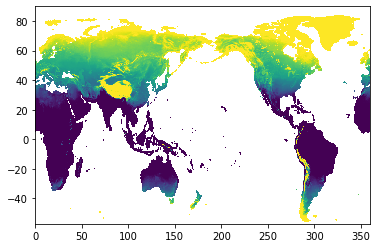

In [37]:
plt.pcolormesh(lon.to_numpy().reshape(-1), lat.to_numpy().reshape(-1), HDDs)